In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import boto3
import pickle
import sagemaker
from sagemaker import get_execution_role
import matplotlib.pyplot as plt
from fastai.vision import *

In [2]:
bucket = 'planesnet-sagemaker'
#bucket = 'sagemaker-planesnet'
sess = sagemaker.Session()
default_bucket = sess.default_bucket()
role = get_execution_role()
region = boto3.Session().region_name

In [3]:
role

'arn:aws:iam::431615879134:role/sagemaker-test-role'

In [4]:
region

'us-east-2'

In [5]:

# customize to your bucket where you have stored the data
bucket_path = 'https://s3-{}.amazonaws.com/{}'.format(region,bucket)  # note this is from https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-prepare.html
#bucket_path = 'https://{}.s3.{}.amazonaws.com/'.format(bucket,region)

In [6]:
bucket_path
compressed_path = bucket_path + 'planesnet.7z'

In [7]:
!wget {compressed_path}

--2019-12-31 22:17:07--  https://s3-us-east-2.amazonaws.com/planesnet-sagemakerplanesnet.7z
Resolving s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)... 52.219.97.33
Connecting to s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)|52.219.97.33|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-12-31 22:17:07 ERROR 404: Not Found.



In [8]:
!wget {bucket_path}

--2019-12-31 22:17:10--  https://s3-us-east-2.amazonaws.com/planesnet-sagemaker
Resolving s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)... 52.219.97.33
Connecting to s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)|52.219.97.33|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-12-31 22:17:10 ERROR 403: Forbidden.



In [9]:
# copy data from s3 bucket
!mkdir /tmp/temp_images/

In [10]:
!rm /tmp/temp_

rm: cannot remove ‘/tmp/temp_’: No such file or directory


In [11]:
!ls /tmp/temp_images/

In [12]:
!aws s3 cp s3://planesnet-sagemaker/data/raw/ /tmp/temp_images/ --recursive

download: s3://planesnet-sagemaker/data/raw/0__20140723_181317_0905__-122.073653222_37.7090043618.png to ../../../tmp/temp_images/0__20140723_181317_0905__-122.073653222_37.7090043618.png
download: s3://planesnet-sagemaker/data/raw/0__20140723_181317_0905__-122.105473207_37.6723685004.png to ../../../tmp/temp_images/0__20140723_181317_0905__-122.105473207_37.6723685004.png
download: s3://planesnet-sagemaker/data/raw/0__20140723_181317_0905__-122.14328662_37.697282118.png to ../../../tmp/temp_images/0__20140723_181317_0905__-122.14328662_37.697282118.png
download: s3://planesnet-sagemaker/data/raw/0__20140723_181317_0905__-122.166243758_37.6649723192.png to ../../../tmp/temp_images/0__20140723_181317_0905__-122.166243758_37.6649723192.png
download: s3://planesnet-sagemaker/data/raw/0__20140723_181318_0905__-122.1457248_37.8108639141.png to ../../../tmp/temp_images/0__20140723_181318_0905__-122.1457248_37.8108639141.png
download: s3://planesnet-sagemaker/data/raw/0__20140922_155952_080b_

download: s3://planesnet-sagemaker/data/raw/0__20140930_180622_0908__-118.27753426312367_33.89442842383052.png to ../../../tmp/temp_images/0__20140930_180622_0908__-118.27753426312367_33.89442842383052.png
download: s3://planesnet-sagemaker/data/raw/0__20140930_180622_0908__-118.30373130650837_33.91038666242189.png to ../../../tmp/temp_images/0__20140930_180622_0908__-118.30373130650837_33.91038666242189.png
download: s3://planesnet-sagemaker/data/raw/0__20140930_180622_0908__-118.332452579_33.9398390071.png to ../../../tmp/temp_images/0__20140930_180622_0908__-118.332452579_33.9398390071.png
download: s3://planesnet-sagemaker/data/raw/0__20140930_180622_0908__-118.301000746_33.912201135.png to ../../../tmp/temp_images/0__20140930_180622_0908__-118.301000746_33.912201135.png
download: s3://planesnet-sagemaker/data/raw/0__20140930_180622_0908__-118.34194264099388_33.86398369549914.png to ../../../tmp/temp_images/0__20140930_180622_0908__-118.34194264099388_33.86398369549914.png
download

download: s3://planesnet-sagemaker/data/raw/0__20141115_180859_090b__-118.38785471255422_33.85736090773512.png to ../../../tmp/temp_images/0__20141115_180859_090b__-118.38785471255422_33.85736090773512.png
download: s3://planesnet-sagemaker/data/raw/0__20141115_180859_090b__-118.361581935_33.8937445231.png to ../../../tmp/temp_images/0__20141115_180859_090b__-118.361581935_33.8937445231.png
download: s3://planesnet-sagemaker/data/raw/0__20141115_180859_090b__-118.412492774_33.8903846883.png to ../../../tmp/temp_images/0__20141115_180859_090b__-118.412492774_33.8903846883.png
download: s3://planesnet-sagemaker/data/raw/0__20141115_180859_090b__-118.38895060719192_33.92498408526291.png to ../../../tmp/temp_images/0__20141115_180859_090b__-118.38895060719192_33.92498408526291.png
download: s3://planesnet-sagemaker/data/raw/0__20141115_180859_090b__-118.413764414_33.8848781153.png to ../../../tmp/temp_images/0__20141115_180859_090b__-118.413764414_33.8848781153.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20141223_181026_0907__-117.86308698679372_33.692968318157085.png to ../../../tmp/temp_images/0__20141223_181026_0907__-117.86308698679372_33.692968318157085.png
download: s3://planesnet-sagemaker/data/raw/0__20141223_181026_0907__-117.89626839670247_33.77119638004389.png to ../../../tmp/temp_images/0__20141223_181026_0907__-117.89626839670247_33.77119638004389.png
download: s3://planesnet-sagemaker/data/raw/0__20141223_181026_0907__-117.8990560311974_33.72788557992381.png to ../../../tmp/temp_images/0__20141223_181026_0907__-117.8990560311974_33.72788557992381.png
download: s3://planesnet-sagemaker/data/raw/0__20141223_181026_0907__-117.89899961246476_33.72247465436586.png to ../../../tmp/temp_images/0__20141223_181026_0907__-117.89899961246476_33.72247465436586.png
download: s3://planesnet-sagemaker/data/raw/0__20141223_181026_0907__-117.908412971_33.7277629881.png to ../../../tmp/temp_images/0__20141223_181026_0907__-117.908412971_33.727

download: s3://planesnet-sagemaker/data/raw/0__20150122_180731_090b__-118.3734313099373_33.94479944820247.png to ../../../tmp/temp_images/0__20150122_180731_090b__-118.3734313099373_33.94479944820247.png
download: s3://planesnet-sagemaker/data/raw/0__20150127_181622_0907__-119.049568565_34.1126844049.png to ../../../tmp/temp_images/0__20150127_181622_0907__-119.049568565_34.1126844049.png
download: s3://planesnet-sagemaker/data/raw/0__20150122_180731_090b__-118.436775951_33.9359061194.png to ../../../tmp/temp_images/0__20150122_180731_090b__-118.436775951_33.9359061194.png
download: s3://planesnet-sagemaker/data/raw/0__20150122_180731_090b__-118.41038259739618_34.0201320770928.png to ../../../tmp/temp_images/0__20150122_180731_090b__-118.41038259739618_34.0201320770928.png
download: s3://planesnet-sagemaker/data/raw/0__20150122_180731_090b__-118.422511163_33.9408062046.png to ../../../tmp/temp_images/0__20150122_180731_090b__-118.422511163_33.9408062046.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20150318_183154_0905__-121.8958063232329_37.32553827483367.png to ../../../tmp/temp_images/0__20150318_183154_0905__-121.8958063232329_37.32553827483367.png
download: s3://planesnet-sagemaker/data/raw/0__20150318_183154_0905__-121.853137916_37.341437668.png to ../../../tmp/temp_images/0__20150318_183154_0905__-121.853137916_37.341437668.png
download: s3://planesnet-sagemaker/data/raw/0__20150318_183154_0905__-121.833184697_37.3746100911.png to ../../../tmp/temp_images/0__20150318_183154_0905__-121.833184697_37.3746100911.png
download: s3://planesnet-sagemaker/data/raw/0__20150318_183154_0905__-121.82086054739129_37.35455929409234.png to ../../../tmp/temp_images/0__20150318_183154_0905__-121.82086054739129_37.35455929409234.png
download: s3://planesnet-sagemaker/data/raw/0__20150318_183154_0905__-121.928460733_37.3675078526.png to ../../../tmp/temp_images/0__20150318_183154_0905__-121.928460733_37.3675078526.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20150410_183139_0909__-122.14067483503885_37.64640193800531.png to ../../../tmp/temp_images/0__20150410_183139_0909__-122.14067483503885_37.64640193800531.png
download: s3://planesnet-sagemaker/data/raw/0__20150408_182301_0905__-118.38260930202885_33.90811956980538.png to ../../../tmp/temp_images/0__20150408_182301_0905__-118.38260930202885_33.90811956980538.png
download: s3://planesnet-sagemaker/data/raw/0__20150410_183139_0909__-122.153039519_37.692485493.png to ../../../tmp/temp_images/0__20150410_183139_0909__-122.153039519_37.692485493.png
download: s3://planesnet-sagemaker/data/raw/0__20150410_183140_0909__-122.16784242615438_37.74107231640077.png to ../../../tmp/temp_images/0__20150410_183140_0909__-122.16784242615438_37.74107231640077.png
download: s3://planesnet-sagemaker/data/raw/0__20150410_183140_0909__-122.216714522_37.759388305.png to ../../../tmp/temp_images/0__20150410_183140_0909__-122.216714522_37.759388305.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20150412_001740_1_0823__-118.453254558_33.965877543.png to ../../../tmp/temp_images/0__20150412_001740_1_0823__-118.453254558_33.965877543.png
download: s3://planesnet-sagemaker/data/raw/0__20150412_001440_0817__-118.125358006_33.811445648.png to ../../../tmp/temp_images/0__20150412_001440_0817__-118.125358006_33.811445648.png
download: s3://planesnet-sagemaker/data/raw/0__20150412_001740_1_0823__-118.44508526387666_33.9839102970296.png to ../../../tmp/temp_images/0__20150412_001740_1_0823__-118.44508526387666_33.9839102970296.png
download: s3://planesnet-sagemaker/data/raw/0__20150412_001740_1_0823__-118.482109876_34.0139589371.png to ../../../tmp/temp_images/0__20150412_001740_1_0823__-118.482109876_34.0139589371.png
download: s3://planesnet-sagemaker/data/raw/0__20150414_233833_0815__-121.920784394_37.3475904156.png to ../../../tmp/temp_images/0__20150414_233833_0815__-121.920784394_37.3475904156.png
download: s3://planesnet-sagemaker/d

download: s3://planesnet-sagemaker/data/raw/0__20150502_155757_0822__-117.55072644658337_34.06151070851877.png to ../../../tmp/temp_images/0__20150502_155757_0822__-117.55072644658337_34.06151070851877.png
download: s3://planesnet-sagemaker/data/raw/0__20150502_155756_0822__-117.572941241_34.0390338265.png to ../../../tmp/temp_images/0__20150502_155756_0822__-117.572941241_34.0390338265.png
download: s3://planesnet-sagemaker/data/raw/0__20150502_155757_0822__-117.527190051_34.0667545627.png to ../../../tmp/temp_images/0__20150502_155757_0822__-117.527190051_34.0667545627.png
download: s3://planesnet-sagemaker/data/raw/0__20150502_155757_0822__-117.575913416_34.0652372209.png to ../../../tmp/temp_images/0__20150502_155757_0822__-117.575913416_34.0652372209.png
download: s3://planesnet-sagemaker/data/raw/0__20150503_183603_090c__-122.40586210080963_37.62424040926141.png to ../../../tmp/temp_images/0__20150503_183603_090c__-122.40586210080963_37.62424040926141.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20150605_183648_0906__-121.5658184285007_38.720652246564356.png to ../../../tmp/temp_images/0__20150605_183648_0906__-121.5658184285007_38.720652246564356.png
download: s3://planesnet-sagemaker/data/raw/0__20150605_183648_0906__-121.624060622_38.6597963663.png to ../../../tmp/temp_images/0__20150605_183648_0906__-121.624060622_38.6597963663.png
download: s3://planesnet-sagemaker/data/raw/0__20150608_182654_090c__-118.29427764009921_34.00826070197394.png to ../../../tmp/temp_images/0__20150608_182654_090c__-118.29427764009921_34.00826070197394.png
download: s3://planesnet-sagemaker/data/raw/0__20150608_182654_090c__-118.27158134131544_34.0112028789818.png to ../../../tmp/temp_images/0__20150608_182654_090c__-118.27158134131544_34.0112028789818.png
download: s3://planesnet-sagemaker/data/raw/0__20150605_183648_0906__-121.67710857_38.6662207535.png to ../../../tmp/temp_images/0__20150605_183648_0906__-121.67710857_38.6662207535.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20150618_184038_090b__-122.311968183_37.6422525875.png to ../../../tmp/temp_images/0__20150618_184038_090b__-122.311968183_37.6422525875.png
download: s3://planesnet-sagemaker/data/raw/0__20150618_184040_090b__-122.253080975_37.6991103104.png to ../../../tmp/temp_images/0__20150618_184040_090b__-122.253080975_37.6991103104.png
download: s3://planesnet-sagemaker/data/raw/0__20150618_184040_090b__-122.263826052_37.7481192111.png to ../../../tmp/temp_images/0__20150618_184040_090b__-122.263826052_37.7481192111.png
download: s3://planesnet-sagemaker/data/raw/0__20150618_184040_090b__-122.278383588_37.7007550504.png to ../../../tmp/temp_images/0__20150618_184040_090b__-122.278383588_37.7007550504.png
download: s3://planesnet-sagemaker/data/raw/0__20150625_184111_0908__-122.152182265_37.6840971247.png to ../../../tmp/temp_images/0__20150625_184111_0908__-122.152182265_37.6840971247.png
download: s3://planesnet-sagemaker/data/raw/0__20150625_1841

download: s3://planesnet-sagemaker/data/raw/0__20150716_184245_090c__-122.065637214_37.4139911274.png to ../../../tmp/temp_images/0__20150716_184245_090c__-122.065637214_37.4139911274.png
download: s3://planesnet-sagemaker/data/raw/0__20150716_184245_090c__-121.958718772_37.3770259504.png to ../../../tmp/temp_images/0__20150716_184245_090c__-121.958718772_37.3770259504.png
download: s3://planesnet-sagemaker/data/raw/0__20150716_184245_090c__-122.08018449594562_37.366513791564245.png to ../../../tmp/temp_images/0__20150716_184245_090c__-122.08018449594562_37.366513791564245.png
download: s3://planesnet-sagemaker/data/raw/0__20150716_184245_090c__-122.01215000202936_37.38759749668987.png to ../../../tmp/temp_images/0__20150716_184245_090c__-122.01215000202936_37.38759749668987.png
download: s3://planesnet-sagemaker/data/raw/0__20150716_184250_090c__-122.04708922281053_37.715660575213434.png to ../../../tmp/temp_images/0__20150716_184250_090c__-122.04708922281053_37.715660575213434.png
do

download: s3://planesnet-sagemaker/data/raw/0__20150730_183117_090c__-118.098665045_33.7618495628.png to ../../../tmp/temp_images/0__20150730_183117_090c__-118.098665045_33.7618495628.png
download: s3://planesnet-sagemaker/data/raw/0__20150730_183117_090c__-118.206840442_33.7605686478.png to ../../../tmp/temp_images/0__20150730_183117_090c__-118.206840442_33.7605686478.png
download: s3://planesnet-sagemaker/data/raw/0__20150730_183117_090c__-118.158431021_33.7618712392.png to ../../../tmp/temp_images/0__20150730_183117_090c__-118.158431021_33.7618712392.png
download: s3://planesnet-sagemaker/data/raw/0__20150730_183119_090c__-118.166882593_33.8881131908.png to ../../../tmp/temp_images/0__20150730_183119_090c__-118.166882593_33.8881131908.png
download: s3://planesnet-sagemaker/data/raw/0__20150730_183119_090c__-118.18232253915936_33.81737894972222.png to ../../../tmp/temp_images/0__20150730_183119_090c__-118.18232253915936_33.81737894972222.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20150813_225644_0b09__-118.416592552_34.0106189939.png to ../../../tmp/temp_images/0__20150813_225644_0b09__-118.416592552_34.0106189939.png
download: s3://planesnet-sagemaker/data/raw/0__20150813_225643_0b09__-118.473301397_33.9704276295.png to ../../../tmp/temp_images/0__20150813_225643_0b09__-118.473301397_33.9704276295.png
download: s3://planesnet-sagemaker/data/raw/0__20150813_225643_0b09__-118.538526466_33.9808023153.png to ../../../tmp/temp_images/0__20150813_225643_0b09__-118.538526466_33.9808023153.png
download: s3://planesnet-sagemaker/data/raw/0__20150813_225644_0b09__-118.415977924_33.9853309108.png to ../../../tmp/temp_images/0__20150813_225644_0b09__-118.415977924_33.9853309108.png
download: s3://planesnet-sagemaker/data/raw/0__20150813_225644_0b09__-118.420767639_33.9745624216.png to ../../../tmp/temp_images/0__20150813_225644_0b09__-118.420767639_33.9745624216.png
download: s3://planesnet-sagemaker/data/raw/0__20150813_2256

download: s3://planesnet-sagemaker/data/raw/0__20150824_191014_0b0a__-121.970410965_37.3892424156.png to ../../../tmp/temp_images/0__20150824_191014_0b0a__-121.970410965_37.3892424156.png
download: s3://planesnet-sagemaker/data/raw/0__20150819_184513_0906__-122.184499383_37.7993768135.png to ../../../tmp/temp_images/0__20150819_184513_0906__-122.184499383_37.7993768135.png
download: s3://planesnet-sagemaker/data/raw/0__20150824_191014_0b0a__-122.01440359093702_37.39924368664264.png to ../../../tmp/temp_images/0__20150824_191014_0b0a__-122.01440359093702_37.39924368664264.png
download: s3://planesnet-sagemaker/data/raw/0__20150824_191014_0b0a__-121.97395714568046_37.382675389676464.png to ../../../tmp/temp_images/0__20150824_191014_0b0a__-121.97395714568046_37.382675389676464.png
download: s3://planesnet-sagemaker/data/raw/0__20150824_191014_0b0a__-122.015178023_37.3763198337.png to ../../../tmp/temp_images/0__20150824_191014_0b0a__-122.015178023_37.3763198337.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20150827_012505_0b0f__-118.418087187_33.9402350091.png to ../../../tmp/temp_images/0__20150827_012505_0b0f__-118.418087187_33.9402350091.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012505_0b0f__-118.402270884_33.9397127923.png to ../../../tmp/temp_images/0__20150827_012505_0b0f__-118.402270884_33.9397127923.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012505_0b0f__-118.410593609_33.9405104836.png to ../../../tmp/temp_images/0__20150827_012505_0b0f__-118.410593609_33.9405104836.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012505_0b0f__-118.42075677189787_33.975861125724784.png to ../../../tmp/temp_images/0__20150827_012505_0b0f__-118.42075677189787_33.975861125724784.png
download: s3://planesnet-sagemaker/data/raw/0__20150825_181119_0b0e__-118.22066921659818_33.8014756348356.png to ../../../tmp/temp_images/0__20150825_181119_0b0e__-118.22066921659818_33.8014756348356.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_0b0a__-118.421721255976_34.006474718269615.png to ../../../tmp/temp_images/0__20150827_012518_0b0a__-118.421721255976_34.006474718269615.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_0b0a__-118.43425789044656_33.97927556455403.png to ../../../tmp/temp_images/0__20150827_012518_0b0a__-118.43425789044656_33.97927556455403.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_0b0a__-118.44441012181572_34.00350498855558.png to ../../../tmp/temp_images/0__20150827_012518_0b0a__-118.44441012181572_34.00350498855558.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_0b0a__-118.45039982211607_33.973675610710345.png to ../../../tmp/temp_images/0__20150827_012518_0b0a__-118.45039982211607_33.973675610710345.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_0b0a__-118.45707750589905_33.98441812995464.png to ../../../tmp/temp_images/0__20150827_012518_0b0a__-118.4570775

download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_1_0b0a__-118.407851546_33.9415428695.png to ../../../tmp/temp_images/0__20150827_012518_1_0b0a__-118.407851546_33.9415428695.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_1_0b0a__-118.3986578_33.9410795411.png to ../../../tmp/temp_images/0__20150827_012518_1_0b0a__-118.3986578_33.9410795411.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_1_0b0a__-118.40761576475859_33.909459539217394.png to ../../../tmp/temp_images/0__20150827_012518_1_0b0a__-118.40761576475859_33.909459539217394.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_1_0b0a__-118.408820181_33.9392592583.png to ../../../tmp/temp_images/0__20150827_012518_1_0b0a__-118.408820181_33.9392592583.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012518_1_0b0a__-118.41094909029505_33.914832199942346.png to ../../../tmp/temp_images/0__20150827_012518_1_0b0a__-118.41094909029505_33.914832199942346.png
down

download: s3://planesnet-sagemaker/data/raw/0__20150827_012519_0b0a__-118.384238182_33.902501059.png to ../../../tmp/temp_images/0__20150827_012519_0b0a__-118.384238182_33.902501059.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012519_0b0a__-118.39089621618636_33.90491503221911.png to ../../../tmp/temp_images/0__20150827_012519_0b0a__-118.39089621618636_33.90491503221911.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012519_0b0a__-118.35867039244395_33.91880187767563.png to ../../../tmp/temp_images/0__20150827_012519_0b0a__-118.35867039244395_33.91880187767563.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012519_0b0a__-118.37428546529159_33.88075266279948.png to ../../../tmp/temp_images/0__20150827_012519_0b0a__-118.37428546529159_33.88075266279948.png
download: s3://planesnet-sagemaker/data/raw/0__20150827_012519_0b0a__-118.39094015633732_33.90761994979361.png to ../../../tmp/temp_images/0__20150827_012519_0b0a__-118.39094015633732_33.907619949

download: s3://planesnet-sagemaker/data/raw/0__20150830_000652_0b07__-122.193583273_37.6940135488.png to ../../../tmp/temp_images/0__20150830_000652_0b07__-122.193583273_37.6940135488.png
download: s3://planesnet-sagemaker/data/raw/0__20150828_170119_0b0d__-118.218634797_33.8522512626.png to ../../../tmp/temp_images/0__20150828_170119_0b0d__-118.218634797_33.8522512626.png
download: s3://planesnet-sagemaker/data/raw/0__20150830_000652_0b07__-122.19135273927577_37.72079428140517.png to ../../../tmp/temp_images/0__20150830_000652_0b07__-122.19135273927577_37.72079428140517.png
download: s3://planesnet-sagemaker/data/raw/0__20150828_170119_0b0d__-118.189398516_33.853186172.png to ../../../tmp/temp_images/0__20150828_170119_0b0d__-118.189398516_33.853186172.png
download: s3://planesnet-sagemaker/data/raw/0__20150830_000652_0b07__-122.230699226_37.7112963914.png to ../../../tmp/temp_images/0__20150830_000652_0b07__-122.230699226_37.7112963914.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20150901_230312_1_0b0a__-117.84953852_33.6351330102.png to ../../../tmp/temp_images/0__20150901_230312_1_0b0a__-117.84953852_33.6351330102.png
download: s3://planesnet-sagemaker/data/raw/0__20150901_230312_1_0b0a__-117.885240596_33.672194212.png to ../../../tmp/temp_images/0__20150901_230312_1_0b0a__-117.885240596_33.672194212.png
download: s3://planesnet-sagemaker/data/raw/0__20150901_230308_1_0b0a__-118.166060326_33.8419647813.png to ../../../tmp/temp_images/0__20150901_230308_1_0b0a__-118.166060326_33.8419647813.png
download: s3://planesnet-sagemaker/data/raw/0__20150901_230312_1_0b0a__-117.8843687294815_33.68185977776579.png to ../../../tmp/temp_images/0__20150901_230312_1_0b0a__-117.8843687294815_33.68185977776579.png
download: s3://planesnet-sagemaker/data/raw/0__20150901_230312_1_0b0a__-117.924187197_33.6192833383.png to ../../../tmp/temp_images/0__20150901_230312_1_0b0a__-117.924187197_33.6192833383.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20150904_214555_0b0e__-122.023569678_37.3693588795.png to ../../../tmp/temp_images/0__20150904_214555_0b0e__-122.023569678_37.3693588795.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_214710_0b0e__-117.511614758_34.0879511334.png to ../../../tmp/temp_images/0__20150904_214710_0b0e__-117.511614758_34.0879511334.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_214710_0b0e__-117.543323379_34.0730965713.png to ../../../tmp/temp_images/0__20150904_214710_0b0e__-117.543323379_34.0730965713.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_214710_0b0e__-117.551887082_34.0600174214.png to ../../../tmp/temp_images/0__20150904_214710_0b0e__-117.551887082_34.0600174214.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_214556_0b0e__-121.97650374211211_37.32242412452596.png to ../../../tmp/temp_images/0__20150904_214556_0b0e__-121.97650374211211_37.32242412452596.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20150904_215129_0b0a__-118.13566764_33.7871093272.png to ../../../tmp/temp_images/0__20150904_215129_0b0a__-118.13566764_33.7871093272.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_215128_1_0b0a__-118.21558425_33.7948161349.png to ../../../tmp/temp_images/0__20150904_215128_1_0b0a__-118.21558425_33.7948161349.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_215129_0b0a__-118.11843684044493_33.80014523924525.png to ../../../tmp/temp_images/0__20150904_215129_0b0a__-118.11843684044493_33.80014523924525.png
download: s3://planesnet-sagemaker/data/raw/0__20150904_215129_0b0a__-118.19918121687782_33.780447921015394.png to ../../../tmp/temp_images/0__20150904_215129_0b0a__-118.19918121687782_33.780447921015394.png
download: s3://planesnet-sagemaker/data/raw/0__20150907_203407_1_0b0f__-122.367183013_37.6352338601.png to ../../../tmp/temp_images/0__20150907_203407_1_0b0f__-122.367183013_37.6352338601.png
download: s3://pla

download: s3://planesnet-sagemaker/data/raw/0__20150917_164234_0c03__-118.3737230231388_33.9104104010529.png to ../../../tmp/temp_images/0__20150917_164234_0c03__-118.3737230231388_33.9104104010529.png
download: s3://planesnet-sagemaker/data/raw/0__20150917_164234_0c03__-118.40305402951097_33.918195945798765.png to ../../../tmp/temp_images/0__20150917_164234_0c03__-118.40305402951097_33.918195945798765.png
download: s3://planesnet-sagemaker/data/raw/0__20150917_164234_0c03__-118.38937378203364_33.87506436571166.png to ../../../tmp/temp_images/0__20150917_164234_0c03__-118.38937378203364_33.87506436571166.png
download: s3://planesnet-sagemaker/data/raw/0__20150917_164237_0c03__-118.08689176448077_33.773533731890865.png to ../../../tmp/temp_images/0__20150917_164237_0c03__-118.08689176448077_33.773533731890865.png
download: s3://planesnet-sagemaker/data/raw/0__20150917_164237_0c03__-118.1077929696923_33.886981262603484.png to ../../../tmp/temp_images/0__20150917_164237_0c03__-118.1077929

download: s3://planesnet-sagemaker/data/raw/0__20150918_184622_0906__-122.188078008_37.6871077545.png to ../../../tmp/temp_images/0__20150918_184622_0906__-122.188078008_37.6871077545.png
download: s3://planesnet-sagemaker/data/raw/0__20150917_164237_0c03__-118.190102396418_33.740114809495445.png to ../../../tmp/temp_images/0__20150917_164237_0c03__-118.190102396418_33.740114809495445.png
download: s3://planesnet-sagemaker/data/raw/0__20151015_213908_0b0e__-117.56007554273653_34.07429299552376.png to ../../../tmp/temp_images/0__20151015_213908_0b0e__-117.56007554273653_34.07429299552376.png
download: s3://planesnet-sagemaker/data/raw/0__20151015_213908_0b0e__-117.5602715612107_34.10405357317574.png to ../../../tmp/temp_images/0__20151015_213908_0b0e__-117.5602715612107_34.10405357317574.png
download: s3://planesnet-sagemaker/data/raw/0__20151015_213908_0b0e__-117.55044427177518_34.093275659258936.png to ../../../tmp/temp_images/0__20151015_213908_0b0e__-117.55044427177518_34.0932756592

download: s3://planesnet-sagemaker/data/raw/0__20151021_191837_0b09__-117.86402437_33.6572465336.png to ../../../tmp/temp_images/0__20151021_191837_0b09__-117.86402437_33.6572465336.png
download: s3://planesnet-sagemaker/data/raw/0__20151022_193007_0b07__-121.82033736079697_37.3685067739279.png to ../../../tmp/temp_images/0__20151022_193007_0b07__-121.82033736079697_37.3685067739279.png
download: s3://planesnet-sagemaker/data/raw/0__20151022_193007_0b07__-121.85821340577476_37.32831812924336.png to ../../../tmp/temp_images/0__20151022_193007_0b07__-121.85821340577476_37.32831812924336.png
download: s3://planesnet-sagemaker/data/raw/0__20151022_193007_0b07__-121.852942844_37.3920820154.png to ../../../tmp/temp_images/0__20151022_193007_0b07__-121.852942844_37.3920820154.png
download: s3://planesnet-sagemaker/data/raw/0__20151022_193007_0b07__-121.85094783498866_37.360696101537734.png to ../../../tmp/temp_images/0__20151022_193007_0b07__-121.85094783498866_37.360696101537734.png
download

download: s3://planesnet-sagemaker/data/raw/0__20151029_161054_0b0a__-118.388167285_33.9027003253.png to ../../../tmp/temp_images/0__20151029_161054_0b0a__-118.388167285_33.9027003253.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161054_0b0a__-118.395913099_33.9697878436.png to ../../../tmp/temp_images/0__20151029_161054_0b0a__-118.395913099_33.9697878436.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161054_0b0a__-118.39679592767524_33.900600765776076.png to ../../../tmp/temp_images/0__20151029_161054_0b0a__-118.39679592767524_33.900600765776076.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161054_0b0a__-118.403255577_33.9403779201.png to ../../../tmp/temp_images/0__20151029_161054_0b0a__-118.403255577_33.9403779201.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161054_0b0a__-118.403331442_33.9469782139.png to ../../../tmp/temp_images/0__20151029_161054_0b0a__-118.403331442_33.9469782139.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20151029_161545_0b09__-119.16636662749185_34.16301874631953.png to ../../../tmp/temp_images/0__20151029_161545_0b09__-119.16636662749185_34.16301874631953.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161545_0b09__-119.180568069_34.1116718831.png to ../../../tmp/temp_images/0__20151029_161545_0b09__-119.180568069_34.1116718831.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161545_0b09__-119.216871318_34.1307942898.png to ../../../tmp/temp_images/0__20151029_161545_0b09__-119.216871318_34.1307942898.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161545_0b09__-119.169337261_34.1112216674.png to ../../../tmp/temp_images/0__20151029_161545_0b09__-119.169337261_34.1112216674.png
download: s3://planesnet-sagemaker/data/raw/0__20151029_161545_0b09__-119.18892438730516_34.15450373161854.png to ../../../tmp/temp_images/0__20151029_161545_0b09__-119.18892438730516_34.15450373161854.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20151101_223245_0c07__-121.8546764296797_37.387285687880784.png to ../../../tmp/temp_images/0__20151101_223245_0c07__-121.8546764296797_37.387285687880784.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223245_0c07__-121.86145300041588_37.3873511338865.png to ../../../tmp/temp_images/0__20151101_223245_0c07__-121.86145300041588_37.3873511338865.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223245_0c07__-121.8481893687322_37.36829459704888.png to ../../../tmp/temp_images/0__20151101_223245_0c07__-121.8481893687322_37.36829459704888.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223245_0c07__-121.85843357955412_37.36298588890753.png to ../../../tmp/temp_images/0__20151101_223245_0c07__-121.85843357955412_37.36298588890753.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223245_0c07__-121.859011545_37.3986303491.png to ../../../tmp/temp_images/0__20151101_223245_0c07__-121.859011545_37.3986303

download: s3://planesnet-sagemaker/data/raw/0__20151101_223401_0c07__-117.574343083_34.0878633128.png to ../../../tmp/temp_images/0__20151101_223401_0c07__-117.574343083_34.0878633128.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223401_0c07__-117.58643801528991_34.2146967810264.png to ../../../tmp/temp_images/0__20151101_223401_0c07__-117.58643801528991_34.2146967810264.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223401_0c07__-117.5923649909088_34.13079637039764.png to ../../../tmp/temp_images/0__20151101_223401_0c07__-117.5923649909088_34.13079637039764.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223401_0c07__-117.61171004246913_34.106351428795804.png to ../../../tmp/temp_images/0__20151101_223401_0c07__-117.61171004246913_34.106351428795804.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223401_0c07__-117.61805761174098_34.08467505407045.png to ../../../tmp/temp_images/0__20151101_223401_0c07__-117.61805761174098_34.084675054

download: s3://planesnet-sagemaker/data/raw/0__20151101_223403_0c07__-117.47577376045372_34.11609806656993.png to ../../../tmp/temp_images/0__20151101_223403_0c07__-117.47577376045372_34.11609806656993.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223403_0c07__-117.48838139232765_34.045702887846275.png to ../../../tmp/temp_images/0__20151101_223403_0c07__-117.48838139232765_34.045702887846275.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223403_0c07__-117.51088955984929_34.00502704714536.png to ../../../tmp/temp_images/0__20151101_223403_0c07__-117.51088955984929_34.00502704714536.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223403_0c07__-117.49789494596699_34.00508033081128.png to ../../../tmp/temp_images/0__20151101_223403_0c07__-117.49789494596699_34.00508033081128.png
download: s3://planesnet-sagemaker/data/raw/0__20151101_223403_0c07__-117.52098269034883_34.06180271773163.png to ../../../tmp/temp_images/0__20151101_223403_0c07__-117.52098

download: s3://planesnet-sagemaker/data/raw/0__20151106_205127_0c66__-119.12972937861316_34.148864354105754.png to ../../../tmp/temp_images/0__20151106_205127_0c66__-119.12972937861316_34.148864354105754.png
download: s3://planesnet-sagemaker/data/raw/0__20151105_184838_090c__-122.41273891767028_37.64030957221876.png to ../../../tmp/temp_images/0__20151105_184838_090c__-122.41273891767028_37.64030957221876.png
download: s3://planesnet-sagemaker/data/raw/0__20151106_205127_0c66__-119.172766981729_34.177863532701416.png to ../../../tmp/temp_images/0__20151106_205127_0c66__-119.172766981729_34.177863532701416.png
download: s3://planesnet-sagemaker/data/raw/0__20151105_184838_090c__-122.300392144_37.6909100817.png to ../../../tmp/temp_images/0__20151105_184838_090c__-122.300392144_37.6909100817.png
download: s3://planesnet-sagemaker/data/raw/0__20151106_205127_0c66__-119.1753954568507_34.15347304783643.png to ../../../tmp/temp_images/0__20151106_205127_0c66__-119.1753954568507_34.153473047

download: s3://planesnet-sagemaker/data/raw/0__20151109_194032_0c18__-119.112802203_34.1511045163.png to ../../../tmp/temp_images/0__20151109_194032_0c18__-119.112802203_34.1511045163.png
download: s3://planesnet-sagemaker/data/raw/0__20151107_200808_0b0a__-122.00196225773193_37.35595568512866.png to ../../../tmp/temp_images/0__20151107_200808_0b0a__-122.00196225773193_37.35595568512866.png
download: s3://planesnet-sagemaker/data/raw/0__20151107_200808_0b0a__-121.968714085_37.3993136688.png to ../../../tmp/temp_images/0__20151107_200808_0b0a__-121.968714085_37.3993136688.png
download: s3://planesnet-sagemaker/data/raw/0__20151109_194032_0c18__-119.10154067012226_34.09968762746279.png to ../../../tmp/temp_images/0__20151109_194032_0c18__-119.10154067012226_34.09968762746279.png
download: s3://planesnet-sagemaker/data/raw/0__20151109_194032_0c18__-119.11920853793397_34.156187487409674.png to ../../../tmp/temp_images/0__20151109_194032_0c18__-119.11920853793397_34.156187487409674.png
down

download: s3://planesnet-sagemaker/data/raw/0__20151111_183105_0c03__-122.012843027_37.2829287969.png to ../../../tmp/temp_images/0__20151111_183105_0c03__-122.012843027_37.2829287969.png
download: s3://planesnet-sagemaker/data/raw/0__20151111_183105_0c03__-121.98092936204644_37.320650600348145.png to ../../../tmp/temp_images/0__20151111_183105_0c03__-121.98092936204644_37.320650600348145.png
download: s3://planesnet-sagemaker/data/raw/0__20151111_183221_0c03__-117.5064327200191_34.16240314597678.png to ../../../tmp/temp_images/0__20151111_183221_0c03__-117.5064327200191_34.16240314597678.png
download: s3://planesnet-sagemaker/data/raw/0__20151111_183105_0c03__-121.9632217536086_37.377281838241956.png to ../../../tmp/temp_images/0__20151111_183105_0c03__-121.9632217536086_37.377281838241956.png
download: s3://planesnet-sagemaker/data/raw/0__20151111_183221_0c03__-117.49292711998476_34.07858497651937.png to ../../../tmp/temp_images/0__20151111_183221_0c03__-117.49292711998476_34.0785849

download: s3://planesnet-sagemaker/data/raw/0__20151112_182716_0c18__-118.41239575218793_33.97885214056708.png to ../../../tmp/temp_images/0__20151112_182716_0c18__-118.41239575218793_33.97885214056708.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182716_0c18__-118.49116777125015_34.02661855016785.png to ../../../tmp/temp_images/0__20151112_182716_0c18__-118.49116777125015_34.02661855016785.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182716_0c18__-118.4284034452789_33.96514048208571.png to ../../../tmp/temp_images/0__20151112_182716_0c18__-118.4284034452789_33.96514048208571.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182716_0c18__-118.46220951168449_34.043198332924156.png to ../../../tmp/temp_images/0__20151112_182716_0c18__-118.46220951168449_34.043198332924156.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182716_0c18__-118.454511409419_33.97295073499843.png to ../../../tmp/temp_images/0__20151112_182716_0c18__-118.454511409

download: s3://planesnet-sagemaker/data/raw/0__20151112_182718_0c18__-118.409634722_33.9414142469.png to ../../../tmp/temp_images/0__20151112_182718_0c18__-118.409634722_33.9414142469.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182718_0c18__-118.411174913_33.9442643131.png to ../../../tmp/temp_images/0__20151112_182718_0c18__-118.411174913_33.9442643131.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182718_0c18__-118.417352525_33.9448696822.png to ../../../tmp/temp_images/0__20151112_182718_0c18__-118.417352525_33.9448696822.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182718_0c18__-118.416322928_33.9454226107.png to ../../../tmp/temp_images/0__20151112_182718_0c18__-118.416322928_33.9454226107.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182718_0c18__-118.40963046_33.9450936265.png to ../../../tmp/temp_images/0__20151112_182718_0c18__-118.40963046_33.9450936265.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182718

download: s3://planesnet-sagemaker/data/raw/0__20151112_182725_0c18__-117.896256446_33.595407992.png to ../../../tmp/temp_images/0__20151112_182725_0c18__-117.896256446_33.595407992.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182725_0c18__-117.93154822403382_33.64514870511429.png to ../../../tmp/temp_images/0__20151112_182725_0c18__-117.93154822403382_33.64514870511429.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182725_0c18__-117.98690933751988_33.67718720619565.png to ../../../tmp/temp_images/0__20151112_182725_0c18__-117.98690933751988_33.67718720619565.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182725_0c18__-118.032037295_33.5916983129.png to ../../../tmp/temp_images/0__20151112_182725_0c18__-118.032037295_33.5916983129.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182722_0c18__-118.15413966382353_33.777630781673366.png to ../../../tmp/temp_images/0__20151112_182722_0c18__-118.15413966382353_33.777630781673366.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.39554558695045_33.96716778783743.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.39554558695045_33.96716778783743.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.37948839443573_33.9781704093931.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.37948839443573_33.9781704093931.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.38031969415943_34.0295632669523.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.38031969415943_34.0295632669523.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.39967894194407_34.02122831389753.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.39967894194407_34.02122831389753.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.39932386370454_33.99958941914848.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.39932386370

download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.460537255_34.0347505373.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.460537255_34.0347505373.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.47425078013777_34.012240836319314.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.47425078013777_34.012240836319314.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.45388725955829_33.96108157821811.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.45388725955829_33.96108157821811.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.4707229830759_33.99605105207999.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.4707229830759_33.99605105207999.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182742_0c47__-118.467243118694_33.982565884527155.png to ../../../tmp/temp_images/0__20151112_182742_0c47__-118.467243118694_33.9825658845

download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.29869006617959_33.93313862046026.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.29869006617959_33.93313862046026.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.29901879052198_33.954778647344014.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.29901879052198_33.954778647344014.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.29984213779127_34.008878368809675.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.29984213779127_34.008878368809675.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.30066768443696_34.06297759602297.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.30066768443696_34.06297759602297.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.300718764_33.9235399368.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.300718764_33

download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.399210842_33.941154418.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.399210842_33.941154418.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.4008771_33.9497386175.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.4008771_33.9497386175.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.399361602_33.9404493013.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.399361602_33.9404493013.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.39008144438753_33.96460540751981.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.39008144438753_33.96460540751981.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.384356346_33.933882507.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.384356346_33.933882507.png
download: s3://planesnet-sagemaker/data/raw/0__201

download: s3://planesnet-sagemaker/data/raw/0__20151112_182744_0c47__-118.418020487_33.940127562.png to ../../../tmp/temp_images/0__20151112_182744_0c47__-118.418020487_33.940127562.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.04895136370081_33.853000406488576.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.04895136370081_33.853000406488576.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.06887811740435_33.89070695919851.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.06887811740435_33.89070695919851.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.0680694553738_33.825780562837686.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.0680694553738_33.825780562837686.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.06499578178025_33.839335001091406.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.06499578178025_33.839335

download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.15842619300706_33.79520379170731.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.15842619300706_33.79520379170731.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.1628016205035_33.879034191820146.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.1628016205035_33.879034191820146.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.16615536475783_33.887119037269954.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.16615536475783_33.887119037269954.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.13898510888696_33.79538482196846.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.13898510888696_33.79538482196846.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182747_0c47__-118.16844082236652_33.816753705706795.png to ../../../tmp/temp_images/0__20151112_182747_0c47__-118.1684

download: s3://planesnet-sagemaker/data/raw/0__20151112_182751_0c47__-117.9137597732493_33.67309597157119.png to ../../../tmp/temp_images/0__20151112_182751_0c47__-117.9137597732493_33.67309597157119.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182751_0c47__-117.91018204758993_33.64065404333106.png to ../../../tmp/temp_images/0__20151112_182751_0c47__-117.91018204758993_33.64065404333106.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182751_0c47__-117.89417674615578_33.65700504211555.png to ../../../tmp/temp_images/0__20151112_182751_0c47__-117.89417674615578_33.65700504211555.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182751_0c47__-117.91006820475172_33.629832067676794.png to ../../../tmp/temp_images/0__20151112_182751_0c47__-117.91006820475172_33.629832067676794.png
download: s3://planesnet-sagemaker/data/raw/0__20151112_182751_0c47__-117.92280312645732_33.61079774886232.png to ../../../tmp/temp_images/0__20151112_182751_0c47__-117.9228031

download: s3://planesnet-sagemaker/data/raw/0__20151115_171048_0c47__-122.26177015661135_37.77338803663217.png to ../../../tmp/temp_images/0__20151115_171048_0c47__-122.26177015661135_37.77338803663217.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171048_0c47__-122.26961872083032_37.66798317615685.png to ../../../tmp/temp_images/0__20151115_171048_0c47__-122.26961872083032_37.66798317615685.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171048_0c47__-122.25157876381377_37.770619829914686.png to ../../../tmp/temp_images/0__20151115_171048_0c47__-122.25157876381377_37.770619829914686.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171048_0c47__-122.23119829797001_37.76508079286666.png to ../../../tmp/temp_images/0__20151115_171048_0c47__-122.23119829797001_37.76508079286666.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171048_0c47__-122.292271619879_37.78979869213506.png to ../../../tmp/temp_images/0__20151115_171048_0c47__-122.2922716

download: s3://planesnet-sagemaker/data/raw/0__20151115_171055_0c47__-121.87637908309028_37.309049976121514.png to ../../../tmp/temp_images/0__20151115_171055_0c47__-121.87637908309028_37.309049976121514.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171055_0c47__-121.86969046132496_37.303578177974956.png to ../../../tmp/temp_images/0__20151115_171055_0c47__-121.86969046132496_37.303578177974956.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171049_0c47__-122.313827167_37.6101940672.png to ../../../tmp/temp_images/0__20151115_171049_0c47__-122.313827167_37.6101940672.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171055_0c47__-121.873424483_37.3708901794.png to ../../../tmp/temp_images/0__20151115_171055_0c47__-121.873424483_37.3708901794.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171049_0c47__-122.19246394390665_37.72191050978424.png to ../../../tmp/temp_images/0__20151115_171049_0c47__-122.19246394390665_37.72191050978424.png
do

download: s3://planesnet-sagemaker/data/raw/0__20151115_171129_0c18__-122.45837537382712_37.649207760305366.png to ../../../tmp/temp_images/0__20151115_171129_0c18__-122.45837537382712_37.649207760305366.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171129_0c18__-122.446070071_37.6942261157.png to ../../../tmp/temp_images/0__20151115_171129_0c18__-122.446070071_37.6942261157.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171129_0c18__-122.45786392869954_37.71950900666863.png to ../../../tmp/temp_images/0__20151115_171129_0c18__-122.45786392869954_37.71950900666863.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171129_0c18__-122.49607510491433_37.6061105945289.png to ../../../tmp/temp_images/0__20151115_171129_0c18__-122.49607510491433_37.6061105945289.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171129_0c18__-122.47509317624059_37.689843228589986.png to ../../../tmp/temp_images/0__20151115_171129_0c18__-122.47509317624059_37.689843

download: s3://planesnet-sagemaker/data/raw/0__20151115_171253_0c18__-117.590377702_34.1584838068.png to ../../../tmp/temp_images/0__20151115_171253_0c18__-117.590377702_34.1584838068.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171253_0c18__-117.54715108539972_34.09699702518282.png to ../../../tmp/temp_images/0__20151115_171253_0c18__-117.54715108539972_34.09699702518282.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171253_0c18__-117.591964425_34.1480056683.png to ../../../tmp/temp_images/0__20151115_171253_0c18__-117.591964425_34.1480056683.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171253_0c18__-117.604921716_34.2035414025.png to ../../../tmp/temp_images/0__20151115_171253_0c18__-117.604921716_34.2035414025.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171137_0c18__-122.05848481233613_37.34076253496233.png to ../../../tmp/temp_images/0__20151115_171137_0c18__-122.05848481233613_37.34076253496233.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20151115_171255_0c18__-117.5527758982198_34.10176073047186.png to ../../../tmp/temp_images/0__20151115_171255_0c18__-117.5527758982198_34.10176073047186.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171255_0c18__-117.57853672347352_34.063763878795335.png to ../../../tmp/temp_images/0__20151115_171255_0c18__-117.57853672347352_34.063763878795335.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171901_0c68__-117.15560224601583_32.80875005976307.png to ../../../tmp/temp_images/0__20151115_171901_0c68__-117.15560224601583_32.80875005976307.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171255_0c18__-117.558428027_33.9965682581.png to ../../../tmp/temp_images/0__20151115_171255_0c18__-117.558428027_33.9965682581.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171255_0c18__-117.61104512106124_34.06360655958922.png to ../../../tmp/temp_images/0__20151115_171255_0c18__-117.61104512106124_34.0636065

download: s3://planesnet-sagemaker/data/raw/0__20151115_171908_0c64__-119.065547499_34.2053046471.png to ../../../tmp/temp_images/0__20151115_171908_0c64__-119.065547499_34.2053046471.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_171908_0c64__-119.12949883067157_34.100774821651925.png to ../../../tmp/temp_images/0__20151115_171908_0c64__-119.12949883067157_34.100774821651925.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_172002_0c72__-119.14557373016497_34.169443115304574.png to ../../../tmp/temp_images/0__20151115_172002_0c72__-119.14557373016497_34.169443115304574.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_172002_0c72__-119.164134823_34.0409855968.png to ../../../tmp/temp_images/0__20151115_172002_0c72__-119.164134823_34.0409855968.png
download: s3://planesnet-sagemaker/data/raw/0__20151115_172002_0c72__-119.15519452306104_34.1638646894595.png to ../../../tmp/temp_images/0__20151115_172002_0c72__-119.15519452306104_34.1638646894595.png
down

download: s3://planesnet-sagemaker/data/raw/0__20151117_160002_0b07__-121.4773959997364_38.70993713338042.png to ../../../tmp/temp_images/0__20151117_160002_0b07__-121.4773959997364_38.70993713338042.png
download: s3://planesnet-sagemaker/data/raw/0__20151117_160002_0b07__-121.4987134320366_38.680476057116906.png to ../../../tmp/temp_images/0__20151117_160002_0b07__-121.4987134320366_38.680476057116906.png
download: s3://planesnet-sagemaker/data/raw/0__20151117_161515_0b0e__-118.06751323874933_33.848836817152204.png to ../../../tmp/temp_images/0__20151117_161515_0b0e__-118.06751323874933_33.848836817152204.png
download: s3://planesnet-sagemaker/data/raw/0__20151117_160002_0b07__-121.51623200643742_38.667182879716506.png to ../../../tmp/temp_images/0__20151117_160002_0b07__-121.51623200643742_38.667182879716506.png
download: s3://planesnet-sagemaker/data/raw/0__20151117_160002_0b07__-121.565595047_38.6869386321.png to ../../../tmp/temp_images/0__20151117_160002_0b07__-121.565595047_38.6

download: s3://planesnet-sagemaker/data/raw/0__20151118_160415_0c53__-118.36427546678192_34.06047532517106.png to ../../../tmp/temp_images/0__20151118_160415_0c53__-118.36427546678192_34.06047532517106.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160415_0c53__-118.36925449671845_33.9657316910084.png to ../../../tmp/temp_images/0__20151118_160415_0c53__-118.36925449671845_33.9657316910084.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160415_0c53__-118.3557112737031_33.93071129164517.png to ../../../tmp/temp_images/0__20151118_160415_0c53__-118.3557112737031_33.93071129164517.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160415_0c53__-118.397961715_33.9501234656.png to ../../../tmp/temp_images/0__20151118_160415_0c53__-118.397961715_33.9501234656.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160415_0c53__-118.355624512_33.9293324832.png to ../../../tmp/temp_images/0__20151118_160415_0c53__-118.355624512_33.9293324832.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c53__-118.23916782789819_33.80553884832765.png to ../../../tmp/temp_images/0__20151118_160418_0c53__-118.23916782789819_33.80553884832765.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c53__-118.271142653_33.8331342229.png to ../../../tmp/temp_images/0__20151118_160418_0c53__-118.271142653_33.8331342229.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c53__-118.34605772704856_33.801713153525.png to ../../../tmp/temp_images/0__20151118_160418_0c53__-118.34605772704856_33.801713153525.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c53__-118.276071259_33.8004549887.png to ../../../tmp/temp_images/0__20151118_160418_0c53__-118.276071259_33.8004549887.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c53__-118.30130923624351_33.84277567790821.png to ../../../tmp/temp_images/0__20151118_160418_0c53__-118.30130923624351_33.84277567790821.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c68__-118.39841066374912_34.124018672614135.png to ../../../tmp/temp_images/0__20151118_160418_0c68__-118.39841066374912_34.124018672614135.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c68__-118.43913414815964_34.03156717396136.png to ../../../tmp/temp_images/0__20151118_160418_0c68__-118.43913414815964_34.03156717396136.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c68__-118.43502055965784_33.98021354860276.png to ../../../tmp/temp_images/0__20151118_160418_0c68__-118.43502055965784_33.98021354860276.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c68__-118.46085604881844_33.97179342705995.png to ../../../tmp/temp_images/0__20151118_160418_0c68__-118.46085604881844_33.97179342705995.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160418_0c68__-118.449073434_34.019871574.png to ../../../tmp/temp_images/0__20151118_160418_0c68__-118.449073434_34.01

download: s3://planesnet-sagemaker/data/raw/0__20151118_160419_0c68__-118.35213051889995_33.878671119325936.png to ../../../tmp/temp_images/0__20151118_160419_0c68__-118.35213051889995_33.878671119325936.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160419_0c68__-118.36609513484953_33.94074180804892.png to ../../../tmp/temp_images/0__20151118_160419_0c68__-118.36609513484953_33.94074180804892.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160419_0c68__-118.36531824930391_33.89205285477645.png to ../../../tmp/temp_images/0__20151118_160419_0c68__-118.36531824930391_33.89205285477645.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160419_0c68__-118.37289000483456_33.95960403883614.png to ../../../tmp/temp_images/0__20151118_160419_0c68__-118.37289000483456_33.95960403883614.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160419_0c68__-118.36115627978221_34.03819063299077.png to ../../../tmp/temp_images/0__20151118_160419_0c68__-118.36115

download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.12821690607117_33.915501488275844.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.12821690607117_33.915501488275844.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.13434803043454_33.888389994050065.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.13434803043454_33.888389994050065.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.16744874942698_33.936779788200646.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.16744874942698_33.936779788200646.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.18307787734327_33.893342684184475.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.18307787734327_33.893342684184475.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.145805791_33.8305749848.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.14580579

download: s3://planesnet-sagemaker/data/raw/0__20151118_160422_0c68__-118.27297978953646_33.83022038923507.png to ../../../tmp/temp_images/0__20151118_160422_0c68__-118.27297978953646_33.83022038923507.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160423_0c53__-117.98181425900148_33.673088125182865.png to ../../../tmp/temp_images/0__20151118_160423_0c53__-117.98181425900148_33.673088125182865.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160423_0c53__-117.99152153891427_33.673010623344815.png to ../../../tmp/temp_images/0__20151118_160423_0c53__-117.99152153891427_33.673010623344815.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160423_0c53__-117.9556886403148_33.65164749615177.png to ../../../tmp/temp_images/0__20151118_160423_0c53__-117.9556886403148_33.65164749615177.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160423_0c53__-118.027707433_33.5918966946.png to ../../../tmp/temp_images/0__20151118_160423_0c53__-118.027707433_33.5

download: s3://planesnet-sagemaker/data/raw/0__20151118_160427_0c68__-117.82132690358235_33.695877517083744.png to ../../../tmp/temp_images/0__20151118_160427_0c68__-117.82132690358235_33.695877517083744.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160424_0c68__-118.11245247837255_33.84105330101276.png to ../../../tmp/temp_images/0__20151118_160424_0c68__-118.11245247837255_33.84105330101276.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160424_0c68__-118.125540679_33.7213482442.png to ../../../tmp/temp_images/0__20151118_160424_0c68__-118.125540679_33.7213482442.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160427_0c68__-117.8725407918916_33.638706722256565.png to ../../../tmp/temp_images/0__20151118_160427_0c68__-117.8725407918916_33.638706722256565.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160427_0c68__-117.87599460849147_33.66032795796134.png to ../../../tmp/temp_images/0__20151118_160427_0c68__-117.87599460849147_33.66032

download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.25987862463114_34.06564801458603.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.25987862463114_34.06564801458603.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.26906513170319_34.02767780686511.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.26906513170319_34.02767780686511.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.27657651768995_34.095234966302144.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.27657651768995_34.095234966302144.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.28944354_33.9871821635.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.28944354_33.9871821635.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.28884447213925_34.04640987735476.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.28884447213925_34.0464098

download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.35417811843828_34.06735041355192.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.35417811843828_34.06735041355192.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.35211881581708_33.93751434493163.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.35211881581708_33.93751434493163.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.34605407527317_33.96463495114433.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.34605407527317_33.96463495114433.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.3457558981917_33.94570032222764.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.3457558981917_33.94570032222764.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160622_0c72__-118.35383398511735_34.04571126708985.png to ../../../tmp/temp_images/0__20151118_160622_0c72__-118.353833985

download: s3://planesnet-sagemaker/data/raw/0__20151118_160625_0c72__-118.09695376843544_33.91959871682334.png to ../../../tmp/temp_images/0__20151118_160625_0c72__-118.09695376843544_33.91959871682334.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160625_0c72__-118.10288618986_33.87625724827644.png to ../../../tmp/temp_images/0__20151118_160625_0c72__-118.10288618986_33.87625724827644.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160625_0c72__-118.11237038000732_33.857233215144156.png to ../../../tmp/temp_images/0__20151118_160625_0c72__-118.11237038000732_33.857233215144156.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160625_0c72__-118.127289594_33.9066899982.png to ../../../tmp/temp_images/0__20151118_160625_0c72__-118.127289594_33.9066899982.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160625_0c72__-118.12231042136703_33.87337632704951.png to ../../../tmp/temp_images/0__20151118_160625_0c72__-118.12231042136703_33.87337632704

download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-117.96212007347401_33.83955847018565.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-117.96212007347401_33.83955847018565.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-117.99098613936272_33.81227384895553.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-117.99098613936272_33.81227384895553.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-117.9623324082132_33.858495988522385.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-117.9623324082132_33.858495988522385.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.00058310644518_33.8013739543323.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.00058310644518_33.8013739543323.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.01709143_33.8598960752.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.01709143_33.8598960

download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.086979717_33.8880594794.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.086979717_33.8880594794.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.08487053794859_33.8033670383137.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.08487053794859_33.8033670383137.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.09569682462912_33.889849081105915.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.09569682462912_33.889849081105915.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.11058518297123_33.786904767937486.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.11058518297123_33.786904767937486.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160627_0c72__-118.09703933081356_33.74103094940306.png to ../../../tmp/temp_images/0__20151118_160627_0c72__-118.09703933081356_33.74103

download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.85798249138911_33.726500267234236.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.85798249138911_33.726500267234236.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.86424135537612_33.70481116730395.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.86424135537612_33.70481116730395.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.84850853730751_33.75091681426406.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.84850853730751_33.75091681426406.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.839368143_33.7635606716.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.839368143_33.7635606716.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.868680118_33.7662258498.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.868680118_33.7662258498.png
down

download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.95520719634355_33.733903444335915.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.95520719634355_33.733903444335915.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.95508730093765_33.723081771110756.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.95508730093765_33.723081771110756.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.94225487377862_33.73400296477317.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.94225487377862_33.73400296477317.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.95745469650205_33.644599052891685.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.95745469650205_33.644599052891685.png
download: s3://planesnet-sagemaker/data/raw/0__20151118_160630_0c72__-117.9742382160596_33.69858130866399.png to ../../../tmp/temp_images/0__20151118_160630_0c72__-117.97

download: s3://planesnet-sagemaker/data/raw/0__20151118_160631_0c72__-117.90080434392945_33.61301625371187.png to ../../../tmp/temp_images/0__20151118_160631_0c72__-117.90080434392945_33.61301625371187.png
download: s3://planesnet-sagemaker/data/raw/0__20151202_183817_0905__-118.398741888_33.9402669668.png to ../../../tmp/temp_images/0__20151202_183817_0905__-118.398741888_33.9402669668.png
download: s3://planesnet-sagemaker/data/raw/0__20151202_183817_0905__-118.411830708_33.9446626014.png to ../../../tmp/temp_images/0__20151202_183817_0905__-118.411830708_33.9446626014.png
download: s3://planesnet-sagemaker/data/raw/0__20151202_183817_0905__-118.406163486_33.9395601733.png to ../../../tmp/temp_images/0__20151202_183817_0905__-118.406163486_33.9395601733.png
download: s3://planesnet-sagemaker/data/raw/0__20151202_183817_0905__-118.387284852_33.9343365145.png to ../../../tmp/temp_images/0__20151202_183817_0905__-118.387284852_33.9343365145.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20151214_214919_1_0c73__-118.411426067_33.9437474096.png to ../../../tmp/temp_images/0__20151214_214919_1_0c73__-118.411426067_33.9437474096.png
download: s3://planesnet-sagemaker/data/raw/0__20151214_214919_1_0c73__-118.409219064_33.9417977608.png to ../../../tmp/temp_images/0__20151214_214919_1_0c73__-118.409219064_33.9417977608.png
download: s3://planesnet-sagemaker/data/raw/0__20151214_214919_1_0c73__-118.4280280063217_34.000936827924924.png to ../../../tmp/temp_images/0__20151214_214919_1_0c73__-118.4280280063217_34.000936827924924.png
download: s3://planesnet-sagemaker/data/raw/0__20151214_214919_1_0c73__-118.411076393_33.9402614652.png to ../../../tmp/temp_images/0__20151214_214919_1_0c73__-118.411076393_33.9402614652.png
download: s3://planesnet-sagemaker/data/raw/0__20151214_214919_1_0c73__-118.410646589_33.9417543562.png to ../../../tmp/temp_images/0__20151214_214919_1_0c73__-118.410646589_33.9417543562.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20151220_192555_0c72__-118.04129587401091_33.77790414222291.png to ../../../tmp/temp_images/0__20151220_192555_0c72__-118.04129587401091_33.77790414222291.png
download: s3://planesnet-sagemaker/data/raw/0__20151220_192555_0c72__-118.0315769277116_33.777985775103076.png to ../../../tmp/temp_images/0__20151220_192555_0c72__-118.0315769277116_33.777985775103076.png
download: s3://planesnet-sagemaker/data/raw/0__20151220_192555_0c72__-118.033500255_33.8086241043.png to ../../../tmp/temp_images/0__20151220_192555_0c72__-118.033500255_33.8086241043.png
download: s3://planesnet-sagemaker/data/raw/0__20151220_192555_0c72__-118.0319339480496_33.80774437343569.png to ../../../tmp/temp_images/0__20151220_192555_0c72__-118.0319339480496_33.80774437343569.png
download: s3://planesnet-sagemaker/data/raw/0__20151217_204040_1_0c74__-119.049617451_34.0688627898.png to ../../../tmp/temp_images/0__20151217_204040_1_0c74__-119.049617451_34.0688627898.png
down

download: s3://planesnet-sagemaker/data/raw/0__20151221_184533_0b09__-117.59020355216173_34.016252106523226.png to ../../../tmp/temp_images/0__20151221_184533_0b09__-117.59020355216173_34.016252106523226.png
download: s3://planesnet-sagemaker/data/raw/0__20151221_184533_0b09__-117.567890091_34.0467411852.png to ../../../tmp/temp_images/0__20151221_184533_0b09__-117.567890091_34.0467411852.png
download: s3://planesnet-sagemaker/data/raw/0__20151221_184533_0b09__-117.588178076_34.0523275548.png to ../../../tmp/temp_images/0__20151221_184533_0b09__-117.588178076_34.0523275548.png
download: s3://planesnet-sagemaker/data/raw/0__20151221_184533_0b09__-117.56428282288259_34.02719623246077.png to ../../../tmp/temp_images/0__20151221_184533_0b09__-117.56428282288259_34.02719623246077.png
download: s3://planesnet-sagemaker/data/raw/0__20151221_184533_0b09__-117.59063486002586_34.078478862006804.png to ../../../tmp/temp_images/0__20151221_184533_0b09__-117.59063486002586_34.078478862006804.png
do

download: s3://planesnet-sagemaker/data/raw/0__20151223_185617_0c47__-121.54803592062275_38.65636309004598.png to ../../../tmp/temp_images/0__20151223_185617_0c47__-121.54803592062275_38.65636309004598.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185617_0c47__-121.57753332633061_38.559403079486316.png to ../../../tmp/temp_images/0__20151223_185617_0c47__-121.57753332633061_38.559403079486316.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185617_0c47__-121.54240151427874_38.59411512722144.png to ../../../tmp/temp_images/0__20151223_185617_0c47__-121.54240151427874_38.59411512722144.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185617_0c47__-121.55736633521309_38.53482543018781.png to ../../../tmp/temp_images/0__20151223_185617_0c47__-121.55736633521309_38.53482543018781.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185617_0c47__-121.53791531716946_38.645423511409305.png to ../../../tmp/temp_images/0__20151223_185617_0c47__-121.5379

download: s3://planesnet-sagemaker/data/raw/0__20151223_185618_0c47__-121.43714414525041_38.574508796018655.png to ../../../tmp/temp_images/0__20151223_185618_0c47__-121.43714414525041_38.574508796018655.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185618_0c47__-121.4426278816875_38.639462689816426.png to ../../../tmp/temp_images/0__20151223_185618_0c47__-121.4426278816875_38.639462689816426.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185618_0c47__-121.43503057842464_38.67180140352888.png to ../../../tmp/temp_images/0__20151223_185618_0c47__-121.43503057842464_38.67180140352888.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185618_0c47__-121.43761244284858_38.5528879830495.png to ../../../tmp/temp_images/0__20151223_185618_0c47__-121.43761244284858_38.5528879830495.png
download: s3://planesnet-sagemaker/data/raw/0__20151223_185618_0c47__-121.47404183571344_38.62095318714076.png to ../../../tmp/temp_images/0__20151223_185618_0c47__-121.4740418

download: s3://planesnet-sagemaker/data/raw/0__20151225_172819_0c64__-117.58095893254688_34.223055882031545.png to ../../../tmp/temp_images/0__20151225_172819_0c64__-117.58095893254688_34.223055882031545.png
download: s3://planesnet-sagemaker/data/raw/0__20151225_172819_0c64__-117.57025985991045_34.085122632618265.png to ../../../tmp/temp_images/0__20151225_172819_0c64__-117.57025985991045_34.085122632618265.png
download: s3://planesnet-sagemaker/data/raw/0__20151225_172819_0c64__-117.60379618487575_34.228356612874286.png to ../../../tmp/temp_images/0__20151225_172819_0c64__-117.60379618487575_34.228356612874286.png
download: s3://planesnet-sagemaker/data/raw/0__20151225_172819_0c64__-117.58696663180056_34.149977667089786.png to ../../../tmp/temp_images/0__20151225_172819_0c64__-117.58696663180056_34.149977667089786.png
download: s3://planesnet-sagemaker/data/raw/0__20151225_172819_0c64__-117.583382137_34.2249382466.png to ../../../tmp/temp_images/0__20151225_172819_0c64__-117.58338213

download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.84906280535148_37.31108586923775.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.84906280535148_37.31108586923775.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.85298147276504_37.275971280557506.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.85298147276504_37.275971280557506.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.85174819444231_37.357080487643806.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.85174819444231_37.357080487643806.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.85277626931892_37.289489561548265.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.85277626931892_37.289489561548265.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.8625615141222_37.31392044220387.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.86

download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.904956722566_37.425185557688295.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.904956722566_37.425185557688295.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.90538958333427_37.39544544983639.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.90538958333427_37.39544544983639.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.90255257656776_37.357562801791985.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.90255257656776_37.357562801791985.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.90846452107887_37.41710598311783.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.90846452107887_37.41710598311783.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.90664520474554_37.30892789567508.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.9066452

download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.98322158440556_37.40425250010244.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.98322158440556_37.40425250010244.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.96690648528198_37.358142415490214.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.96690648528198_37.358142415490214.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.98416992513901_37.333955428852754.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.98416992513901_37.333955428852754.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.98733812796429_37.35020694911026.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.98733812796429_37.35020694911026.png
download: s3://planesnet-sagemaker/data/raw/0__20151227_171358_0c53__-121.98347723096285_37.38532644996136.png to ../../../tmp/temp_images/0__20151227_171358_0c53__-121.983

download: s3://planesnet-sagemaker/data/raw/0__20151231_223738_0c70__-122.219282427_37.7062190532.png to ../../../tmp/temp_images/0__20151231_223738_0c70__-122.219282427_37.7062190532.png
download: s3://planesnet-sagemaker/data/raw/0__20151231_223738_0c70__-122.19161700705563_37.74345498646366.png to ../../../tmp/temp_images/0__20151231_223738_0c70__-122.19161700705563_37.74345498646366.png
download: s3://planesnet-sagemaker/data/raw/0__20151231_223738_0c70__-122.19848491168031_37.73809404584923.png to ../../../tmp/temp_images/0__20151231_223738_0c70__-122.19848491168031_37.73809404584923.png
download: s3://planesnet-sagemaker/data/raw/0__20151231_223739_0c70__-122.102489206_37.7562213432.png to ../../../tmp/temp_images/0__20151231_223739_0c70__-122.102489206_37.7562213432.png
download: s3://planesnet-sagemaker/data/raw/0__20151231_223739_0c70__-122.13016134613336_37.74591064542465.png to ../../../tmp/temp_images/0__20151231_223739_0c70__-122.13016134613336_37.74591064542465.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20160103_213220_0c68__-118.23540878000773_33.77173041209956.png to ../../../tmp/temp_images/0__20160103_213220_0c68__-118.23540878000773_33.77173041209956.png
download: s3://planesnet-sagemaker/data/raw/0__20160103_213220_0c68__-118.23232454446766_33.78258338392627.png to ../../../tmp/temp_images/0__20160103_213220_0c68__-118.23232454446766_33.78258338392627.png
download: s3://planesnet-sagemaker/data/raw/0__20160103_213220_0c68__-118.20297880140404_33.76934527288926.png to ../../../tmp/temp_images/0__20160103_213220_0c68__-118.20297880140404_33.76934527288926.png
download: s3://planesnet-sagemaker/data/raw/0__20160103_213220_0c68__-118.25863711185596_33.809372918822994.png to ../../../tmp/temp_images/0__20160103_213220_0c68__-118.25863711185596_33.809372918822994.png
download: s3://planesnet-sagemaker/data/raw/0__20160103_213220_0c68__-118.19985280091957_33.777492348064406.png to ../../../tmp/temp_images/0__20160103_213220_0c68__-118.1998

download: s3://planesnet-sagemaker/data/raw/0__20160124_184009_0905__-118.130985704_33.7982180947.png to ../../../tmp/temp_images/0__20160124_184009_0905__-118.130985704_33.7982180947.png
download: s3://planesnet-sagemaker/data/raw/0__20160124_184009_0905__-118.23546644644432_33.80281634853504.png to ../../../tmp/temp_images/0__20160124_184009_0905__-118.23546644644432_33.80281634853504.png
download: s3://planesnet-sagemaker/data/raw/0__20160124_184009_0905__-118.2081356_33.7674551242.png to ../../../tmp/temp_images/0__20160124_184009_0905__-118.2081356_33.7674551242.png
download: s3://planesnet-sagemaker/data/raw/0__20160125_185358_0905__-122.262434104_37.606801492.png to ../../../tmp/temp_images/0__20160125_185358_0905__-122.262434104_37.606801492.png
download: s3://planesnet-sagemaker/data/raw/0__20160125_185358_0905__-122.308558341_37.5441042601.png to ../../../tmp/temp_images/0__20160125_185358_0905__-122.308558341_37.5441042601.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20160209_222541_0b0f__-118.409613765_33.9401429529.png to ../../../tmp/temp_images/0__20160209_222541_0b0f__-118.409613765_33.9401429529.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222541_0b0f__-118.410285024_33.9395130245.png to ../../../tmp/temp_images/0__20160209_222541_0b0f__-118.410285024_33.9395130245.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222541_0b0f__-118.411071483_33.9399639285.png to ../../../tmp/temp_images/0__20160209_222541_0b0f__-118.411071483_33.9399639285.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222541_0b0f__-118.409796991_33.9414123886.png to ../../../tmp/temp_images/0__20160209_222541_0b0f__-118.409796991_33.9414123886.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222541_0b0f__-118.407619026_33.9412208815.png to ../../../tmp/temp_images/0__20160209_222541_0b0f__-118.407619026_33.9412208815.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_2225

download: s3://planesnet-sagemaker/data/raw/0__20160209_222542_1_0b0f__-118.410094646_33.9456834954.png to ../../../tmp/temp_images/0__20160209_222542_1_0b0f__-118.410094646_33.9456834954.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222542_1_0b0f__-118.406265738_33.9398565985.png to ../../../tmp/temp_images/0__20160209_222542_1_0b0f__-118.406265738_33.9398565985.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222542_1_0b0f__-118.410570972_33.941105929.png to ../../../tmp/temp_images/0__20160209_222542_1_0b0f__-118.410570972_33.941105929.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222542_1_0b0f__-118.411292815_33.9455074403.png to ../../../tmp/temp_images/0__20160209_222542_1_0b0f__-118.411292815_33.9455074403.png
download: s3://planesnet-sagemaker/data/raw/0__20160209_222542_1_0b0f__-118.409539496_33.9395756711.png to ../../../tmp/temp_images/0__20160209_222542_1_0b0f__-118.409539496_33.9395756711.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20160210_222525_0c18__-117.97787965609716_33.782751991511354.png to ../../../tmp/temp_images/0__20160210_222525_0c18__-117.97787965609716_33.782751991511354.png
download: s3://planesnet-sagemaker/data/raw/0__20160210_222525_0c18__-118.01015129035747_33.771669560842035.png to ../../../tmp/temp_images/0__20160210_222525_0c18__-118.01015129035747_33.771669560842035.png
download: s3://planesnet-sagemaker/data/raw/0__20160210_222525_0c18__-118.01739831039353_33.836544389918295.png to ../../../tmp/temp_images/0__20160210_222525_0c18__-118.01739831039353_33.836544389918295.png
download: s3://planesnet-sagemaker/data/raw/0__20160210_222525_0c18__-118.02962021306618_33.77421426873025.png to ../../../tmp/temp_images/0__20160210_222525_0c18__-118.02962021306618_33.77421426873025.png
download: s3://planesnet-sagemaker/data/raw/0__20160210_222525_0c18__-118.01986958881497_33.77158962845157.png to ../../../tmp/temp_images/0__20160210_222525_0c18__-118.0

download: s3://planesnet-sagemaker/data/raw/0__20160214_204130_0c74__-117.24687166380616_32.798617545000546.png to ../../../tmp/temp_images/0__20160214_204130_0c74__-117.24687166380616_32.798617545000546.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_202738_0c73__-118.1070696568901_33.8234074175335.png to ../../../tmp/temp_images/0__20160215_202738_0c73__-118.1070696568901_33.8234074175335.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_202738_0c73__-118.12309921537754_33.80973467942758.png to ../../../tmp/temp_images/0__20160215_202738_0c73__-118.12309921537754_33.80973467942758.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_202738_0c73__-118.13275014920232_33.80423530454522.png to ../../../tmp/temp_images/0__20160215_202738_0c73__-118.13275014920232_33.80423530454522.png
download: s3://planesnet-sagemaker/data/raw/0__20160214_204130_0c74__-117.24990185130174_32.736368854488056.png to ../../../tmp/temp_images/0__20160214_204130_0c74__-117.24990185

download: s3://planesnet-sagemaker/data/raw/0__20160215_210551_0c68__-122.390724607_37.6170246422.png to ../../../tmp/temp_images/0__20160215_210551_0c68__-122.390724607_37.6170246422.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210551_0c68__-122.389736374_37.6214811451.png to ../../../tmp/temp_images/0__20160215_210551_0c68__-122.389736374_37.6214811451.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210551_0c68__-122.383911922_37.614609744.png to ../../../tmp/temp_images/0__20160215_210551_0c68__-122.383911922_37.614609744.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210551_0c68__-122.389675239_37.6206425873.png to ../../../tmp/temp_images/0__20160215_210551_0c68__-122.389675239_37.6206425873.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210551_0c68__-122.390699426_37.6117787365.png to ../../../tmp/temp_images/0__20160215_210551_0c68__-122.390699426_37.6117787365.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210551

download: s3://planesnet-sagemaker/data/raw/0__20160215_210553_0c68__-122.40145133285505_37.75438749462055.png to ../../../tmp/temp_images/0__20160215_210553_0c68__-122.40145133285505_37.75438749462055.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210553_0c68__-122.41171050363764_37.74903125408753.png to ../../../tmp/temp_images/0__20160215_210553_0c68__-122.41171050363764_37.74903125408753.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210553_0c68__-122.38805220464582_37.72727918031761.png to ../../../tmp/temp_images/0__20160215_210553_0c68__-122.38805220464582_37.72727918031761.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210553_0c68__-122.40160374171873_37.73546061743755.png to ../../../tmp/temp_images/0__20160215_210553_0c68__-122.40160374171873_37.73546061743755.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210553_0c68__-122.29222095663789_37.78082138345019.png to ../../../tmp/temp_images/0__20160215_210553_0c68__-122.2922209

download: s3://planesnet-sagemaker/data/raw/0__20160216_184314_0905__-119.057800006_34.1611278823.png to ../../../tmp/temp_images/0__20160216_184314_0905__-119.057800006_34.1611278823.png
download: s3://planesnet-sagemaker/data/raw/0__20160215_210554_0c68__-122.29146029082483_37.85330843690486.png to ../../../tmp/temp_images/0__20160215_210554_0c68__-122.29146029082483_37.85330843690486.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195849_0c47__-117.862436441_33.6796878982.png to ../../../tmp/temp_images/0__20160216_195849_0c47__-117.862436441_33.6796878982.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195849_0c47__-117.8366361344534_33.59203747743703.png to ../../../tmp/temp_images/0__20160216_195849_0c47__-117.8366361344534_33.59203747743703.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195849_0c47__-117.86247203402333_33.589154348728414.png to ../../../tmp/temp_images/0__20160216_195849_0c47__-117.86247203402333_33.589154348728414.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20160216_195851_0c47__-117.70603207444692_33.65708641338687.png to ../../../tmp/temp_images/0__20160216_195851_0c47__-117.70603207444692_33.65708641338687.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195851_0c47__-117.71274833824447_33.6868110001434.png to ../../../tmp/temp_images/0__20160216_195851_0c47__-117.71274833824447_33.6868110001434.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195851_0c47__-117.780075932_33.7518281814.png to ../../../tmp/temp_images/0__20160216_195851_0c47__-117.780075932_33.7518281814.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195851_0c47__-117.78068982099266_33.68369469875641.png to ../../../tmp/temp_images/0__20160216_195851_0c47__-117.78068982099266_33.68369469875641.png
download: s3://planesnet-sagemaker/data/raw/0__20160216_195851_0c47__-117.77424139390516_33.68644098967554.png to ../../../tmp/temp_images/0__20160216_195851_0c47__-117.77424139390516_33.686440989

download: s3://planesnet-sagemaker/data/raw/0__20160218_195027_0c66__-121.90621719722134_37.25197626395605.png to ../../../tmp/temp_images/0__20160218_195027_0c66__-121.90621719722134_37.25197626395605.png
download: s3://planesnet-sagemaker/data/raw/0__20160218_195027_0c66__-121.88910737656758_37.26533732684672.png to ../../../tmp/temp_images/0__20160218_195027_0c66__-121.88910737656758_37.26533732684672.png
download: s3://planesnet-sagemaker/data/raw/0__20160218_195027_0c66__-121.90181369862641_37.322241169536674.png to ../../../tmp/temp_images/0__20160218_195027_0c66__-121.90181369862641_37.322241169536674.png
download: s3://planesnet-sagemaker/data/raw/0__20160218_195027_0c66__-121.86538699751537_37.26781641650839.png to ../../../tmp/temp_images/0__20160218_195027_0c66__-121.86538699751537_37.26781641650839.png
download: s3://planesnet-sagemaker/data/raw/0__20160218_195027_0c66__-121.89968855620452_37.23569127250738.png to ../../../tmp/temp_images/0__20160218_195027_0c66__-121.89968

download: s3://planesnet-sagemaker/data/raw/0__20160221_175529_0c68__-117.16136809415225_32.71868004654264.png to ../../../tmp/temp_images/0__20160221_175529_0c68__-117.16136809415225_32.71868004654264.png
download: s3://planesnet-sagemaker/data/raw/0__20160220_181852_0c73__-117.20459245429338_32.8195584689853.png to ../../../tmp/temp_images/0__20160220_181852_0c73__-117.20459245429338_32.8195584689853.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_175529_0c68__-117.17744435214267_32.75383921802622.png to ../../../tmp/temp_images/0__20160221_175529_0c68__-117.17744435214267_32.75383921802622.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_175529_0c68__-117.199240912_32.7336180774.png to ../../../tmp/temp_images/0__20160221_175529_0c68__-117.199240912_32.7336180774.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_175529_0c68__-117.19828066_32.7337549109.png to ../../../tmp/temp_images/0__20160221_175529_0c68__-117.19828066_32.7337549109.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20160221_180211_0c53__-117.91965743296278_33.67080650604047.png to ../../../tmp/temp_images/0__20160221_180211_0c53__-117.91965743296278_33.67080650604047.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_180211_0c53__-117.93219190433824_33.63283293998859.png to ../../../tmp/temp_images/0__20160221_180211_0c53__-117.93219190433824_33.63283293998859.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_180211_0c53__-117.921594768_33.6764740102.png to ../../../tmp/temp_images/0__20160221_180211_0c53__-117.921594768_33.6764740102.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_180211_0c53__-117.92575223036786_33.635587017680855.png to ../../../tmp/temp_images/0__20160221_180211_0c53__-117.92575223036786_33.635587017680855.png
download: s3://planesnet-sagemaker/data/raw/0__20160221_180211_0c53__-117.954635345_33.6558764986.png to ../../../tmp/temp_images/0__20160221_180211_0c53__-117.954635345_33.6558764986.png
down

download: s3://planesnet-sagemaker/data/raw/0__20160222_170515_0b0a__-117.204909283_32.7340960604.png to ../../../tmp/temp_images/0__20160222_170515_0b0a__-117.204909283_32.7340960604.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_170515_0b0a__-117.199144676_32.7335370436.png to ../../../tmp/temp_images/0__20160222_170515_0b0a__-117.199144676_32.7335370436.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_170515_0b0a__-117.224162957_32.7510581502.png to ../../../tmp/temp_images/0__20160222_170515_0b0a__-117.224162957_32.7510581502.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_170515_0b0a__-117.208555944_32.718854003.png to ../../../tmp/temp_images/0__20160222_170515_0b0a__-117.208555944_32.718854003.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173711_0c18__-117.85104326258504_33.590775753940044.png to ../../../tmp/temp_images/0__20160222_173711_0c18__-117.85104326258504_33.590775753940044.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.73780111413132_33.68693452186966.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.73780111413132_33.68693452186966.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.74041182748432_33.61386387605965.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.74041182748432_33.61386387605965.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.687193075_33.6519975316.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.687193075_33.6519975316.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.73103049190375_33.6518001979718.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.73103049190375_33.6518001979718.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173711_0c18__-117.93903189489056_33.655076081545324.png to ../../../tmp/temp_images/0__20160222_173711_0c18__-117.93903189489056_33.65507608

download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.88996838594045_33.6913435939548.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.88996838594045_33.6913435939548.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.86761174583306_33.72126514569933.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.86761174583306_33.72126514569933.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_173713_0c18__-117.88023118028705_33.68870766063247.png to ../../../tmp/temp_images/0__20160222_173713_0c18__-117.88023118028705_33.68870766063247.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_174547_0c73__-119.164409258_34.1577246674.png to ../../../tmp/temp_images/0__20160222_174547_0c73__-119.164409258_34.1577246674.png
download: s3://planesnet-sagemaker/data/raw/0__20160222_174547_0c73__-119.15094717245091_34.15934090812821.png to ../../../tmp/temp_images/0__20160222_174547_0c73__-119.15094717245091_34.159340908

download: s3://planesnet-sagemaker/data/raw/0__20160302_213717_0c68__-122.19249509972464_37.79110388987317.png to ../../../tmp/temp_images/0__20160302_213717_0c68__-122.19249509972464_37.79110388987317.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213717_0c68__-122.18283962837158_37.73966305024232.png to ../../../tmp/temp_images/0__20160302_213717_0c68__-122.18283962837158_37.73966305024232.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213717_0c68__-122.1959020803045_37.79112719225104.png to ../../../tmp/temp_images/0__20160302_213717_0c68__-122.1959020803045_37.79112719225104.png
download: s3://planesnet-sagemaker/data/raw/0__20160229_220340_0b07__-117.20986069097117_32.74285601966284.png to ../../../tmp/temp_images/0__20160229_220340_0b07__-117.20986069097117_32.74285601966284.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213717_0c68__-122.20589148690813_37.812826115715204.png to ../../../tmp/temp_images/0__20160302_213717_0c68__-122.20589148

download: s3://planesnet-sagemaker/data/raw/0__20160302_213719_0c68__-122.15296809446383_37.70773516129705.png to ../../../tmp/temp_images/0__20160302_213719_0c68__-122.15296809446383_37.70773516129705.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213719_0c68__-122.14597565406443_37.72390826567878.png to ../../../tmp/temp_images/0__20160302_213719_0c68__-122.14597565406443_37.72390826567878.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213719_0c68__-122.1721697_37.6949196953.png to ../../../tmp/temp_images/0__20160302_213719_0c68__-122.1721697_37.6949196953.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213719_0c68__-122.19007891848398_37.737739153850804.png to ../../../tmp/temp_images/0__20160302_213719_0c68__-122.19007891848398_37.737739153850804.png
download: s3://planesnet-sagemaker/data/raw/0__20160302_213719_0c68__-122.16971220472834_37.73218960789667.png to ../../../tmp/temp_images/0__20160302_213719_0c68__-122.16971220472834_37.732189607

download: s3://planesnet-sagemaker/data/raw/0__20160306_200031_0c47__-117.67451089822816_34.05634836411768.png to ../../../tmp/temp_images/0__20160306_200031_0c47__-117.67451089822816_34.05634836411768.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200031_0c47__-117.67455376493825_34.06175928806008.png to ../../../tmp/temp_images/0__20160306_200031_0c47__-117.67455376493825_34.06175928806008.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200031_0c47__-117.63564598929244_34.0754945802343.png to ../../../tmp/temp_images/0__20160306_200031_0c47__-117.63564598929244_34.0754945802343.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200031_0c47__-117.68384987159351_34.004890552105614.png to ../../../tmp/temp_images/0__20160306_200031_0c47__-117.68384987159351_34.004890552105614.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200031_0c47__-117.67827904438863_34.12126120982175.png to ../../../tmp/temp_images/0__20160306_200031_0c47__-117.6782790

download: s3://planesnet-sagemaker/data/raw/0__20160306_200032_0c47__-117.64233027764737_33.978815789274336.png to ../../../tmp/temp_images/0__20160306_200032_0c47__-117.64233027764737_33.978815789274336.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200032_0c47__-117.60651071982522_33.96546939817251.png to ../../../tmp/temp_images/0__20160306_200032_0c47__-117.60651071982522_33.96546939817251.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200032_0c47__-117.6581514220118_33.92461959298052.png to ../../../tmp/temp_images/0__20160306_200032_0c47__-117.6581514220118_33.92461959298052.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200032_0c47__-117.66173184673501_33.96789050594623.png to ../../../tmp/temp_images/0__20160306_200032_0c47__-117.66173184673501_33.96789050594623.png
download: s3://planesnet-sagemaker/data/raw/0__20160306_200032_0c47__-117.609016838_34.0436493357.png to ../../../tmp/temp_images/0__20160306_200032_0c47__-117.609016838_34.043

download: s3://planesnet-sagemaker/data/raw/0__20160316_153300_0b0a__-122.393064757_37.6176856635.png to ../../../tmp/temp_images/0__20160316_153300_0b0a__-122.393064757_37.6176856635.png
download: s3://planesnet-sagemaker/data/raw/0__20160316_153300_0b0a__-122.390858828_37.6214058248.png to ../../../tmp/temp_images/0__20160316_153300_0b0a__-122.390858828_37.6214058248.png
download: s3://planesnet-sagemaker/data/raw/0__20160316_153300_0b0a__-122.394179471_37.618556674.png to ../../../tmp/temp_images/0__20160316_153300_0b0a__-122.394179471_37.618556674.png
download: s3://planesnet-sagemaker/data/raw/0__20160316_153307_0b0a__-121.932237967_37.3830631622.png to ../../../tmp/temp_images/0__20160316_153307_0b0a__-121.932237967_37.3830631622.png
download: s3://planesnet-sagemaker/data/raw/0__20160316_153307_0b0a__-121.94107491613887_37.34501567157866.png to ../../../tmp/temp_images/0__20160316_153307_0b0a__-121.94107491613887_37.34501567157866.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160317_153928_0c47__-117.79387498497742_33.628684450739826.png to ../../../tmp/temp_images/0__20160317_153928_0c47__-117.79387498497742_33.628684450739826.png
download: s3://planesnet-sagemaker/data/raw/0__20160317_153928_0c47__-117.8266053607265_33.66905581975892.png to ../../../tmp/temp_images/0__20160317_153928_0c47__-117.8266053607265_33.66905581975892.png
download: s3://planesnet-sagemaker/data/raw/0__20160317_153928_0c47__-117.79828420442125_33.755824416390446.png to ../../../tmp/temp_images/0__20160317_153928_0c47__-117.79828420442125_33.755824416390446.png
download: s3://planesnet-sagemaker/data/raw/0__20160317_153928_0c47__-117.81419808563462_33.72595794500309.png to ../../../tmp/temp_images/0__20160317_153928_0c47__-117.81419808563462_33.72595794500309.png
download: s3://planesnet-sagemaker/data/raw/0__20160317_153928_0c47__-117.82069962763818_33.728620597100225.png to ../../../tmp/temp_images/0__20160317_153928_0c47__-117.8206

download: s3://planesnet-sagemaker/data/raw/0__20160325_184517_090b__-118.26204784490615_33.77235366441045.png to ../../../tmp/temp_images/0__20160325_184517_090b__-118.26204784490615_33.77235366441045.png
download: s3://planesnet-sagemaker/data/raw/0__20160326_185849_090b__-122.410169284_37.6427573916.png to ../../../tmp/temp_images/0__20160326_185849_090b__-122.410169284_37.6427573916.png
download: s3://planesnet-sagemaker/data/raw/0__20160403_185942_0905__-122.324031718_37.6018435131.png to ../../../tmp/temp_images/0__20160403_185942_0905__-122.324031718_37.6018435131.png
download: s3://planesnet-sagemaker/data/raw/0__20160403_185942_0905__-122.231862122_37.5951956149.png to ../../../tmp/temp_images/0__20160403_185942_0905__-122.231862122_37.5951956149.png
download: s3://planesnet-sagemaker/data/raw/0__20160403_185942_0905__-122.324712261_37.6543589513.png to ../../../tmp/temp_images/0__20160403_185942_0905__-122.324712261_37.6543589513.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20160413_204119_0c66__-117.208834896_32.6874341559.png to ../../../tmp/temp_images/0__20160413_204119_0c66__-117.208834896_32.6874341559.png
download: s3://planesnet-sagemaker/data/raw/0__20160413_204119_0c66__-117.21631252690929_32.70947730917221.png to ../../../tmp/temp_images/0__20160413_204119_0c66__-117.21631252690929_32.70947730917221.png
download: s3://planesnet-sagemaker/data/raw/0__20160413_204119_0c66__-117.206185852_32.7322807987.png to ../../../tmp/temp_images/0__20160413_204119_0c66__-117.206185852_32.7322807987.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_192803_0c03__-117.82118538476773_33.582156773400826.png to ../../../tmp/temp_images/0__20160414_192803_0c03__-117.82118538476773_33.582156773400826.png
download: s3://planesnet-sagemaker/data/raw/0__20160413_204119_0c66__-117.22914409361157_32.72027943247456.png to ../../../tmp/temp_images/0__20160413_204119_0c66__-117.22914409361157_32.72027943247456.png
down

download: s3://planesnet-sagemaker/data/raw/0__20160414_192804_0c03__-117.84016447252908_33.748890516012324.png to ../../../tmp/temp_images/0__20160414_192804_0c03__-117.84016447252908_33.748890516012324.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_192804_0c03__-117.85274464691595_33.710924751834405.png to ../../../tmp/temp_images/0__20160414_192804_0c03__-117.85274464691595_33.710924751834405.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_192804_0c03__-117.81996024799334_33.66785545586174.png to ../../../tmp/temp_images/0__20160414_192804_0c03__-117.81996024799334_33.66785545586174.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_192804_0c03__-117.84000621926634_33.732657526118494.png to ../../../tmp/temp_images/0__20160414_192804_0c03__-117.84000621926634_33.732657526118494.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_192804_0c03__-117.76485684020052_33.6573858176621.png to ../../../tmp/temp_images/0__20160414_192804_0c03__-117.76

download: s3://planesnet-sagemaker/data/raw/0__20160414_203124_0c68__-117.67221132616167_34.061528619445056.png to ../../../tmp/temp_images/0__20160414_203124_0c68__-117.67221132616167_34.061528619445056.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203124_0c68__-117.69171552660964_34.06142040065247.png to ../../../tmp/temp_images/0__20160414_203124_0c68__-117.69171552660964_34.06142040065247.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203124_0c68__-117.6659851570296_34.09673495766397.png to ../../../tmp/temp_images/0__20160414_203124_0c68__-117.6659851570296_34.09673495766397.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203124_0c68__-117.70153447417728_34.06948146224646.png to ../../../tmp/temp_images/0__20160414_203124_0c68__-117.70153447417728_34.06948146224646.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203124_0c68__-117.709550952_34.1106952087.png to ../../../tmp/temp_images/0__20160414_203124_0c68__-117.709550952_34.110

download: s3://planesnet-sagemaker/data/raw/0__20160417_183625_0b0f__-117.90737690953236_33.70623347824636.png to ../../../tmp/temp_images/0__20160417_183625_0b0f__-117.90737690953236_33.70623347824636.png
download: s3://planesnet-sagemaker/data/raw/0__20160418_180830_0b0a__-117.16970338123842_32.70803354851906.png to ../../../tmp/temp_images/0__20160418_180830_0b0a__-117.16970338123842_32.70803354851906.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203125_0c68__-117.62773343731224_34.166360972277026.png to ../../../tmp/temp_images/0__20160414_203125_0c68__-117.62773343731224_34.166360972277026.png
download: s3://planesnet-sagemaker/data/raw/0__20160414_203125_0c68__-117.64038490005645_34.1175957046441.png to ../../../tmp/temp_images/0__20160414_203125_0c68__-117.64038490005645_34.1175957046441.png
download: s3://planesnet-sagemaker/data/raw/0__20160418_180830_0b0a__-117.164146346_32.7149147787.png to ../../../tmp/temp_images/0__20160418_180830_0b0a__-117.164146346_32.714

download: s3://planesnet-sagemaker/data/raw/0__20160423_160217_0b0d__-117.919593658_33.6860940848.png to ../../../tmp/temp_images/0__20160423_160217_0b0d__-117.919593658_33.6860940848.png
download: s3://planesnet-sagemaker/data/raw/0__20160515_153308_1_0c70__-122.121516905_37.8088472248.png to ../../../tmp/temp_images/0__20160515_153308_1_0c70__-122.121516905_37.8088472248.png
download: s3://planesnet-sagemaker/data/raw/0__20160531_005009_0b09__-118.090954908_33.8307748947.png to ../../../tmp/temp_images/0__20160531_005009_0b09__-118.090954908_33.8307748947.png
download: s3://planesnet-sagemaker/data/raw/0__20160423_160217_0b0d__-117.941126546_33.6869871633.png to ../../../tmp/temp_images/0__20160423_160217_0b0d__-117.941126546_33.6869871633.png
download: s3://planesnet-sagemaker/data/raw/0__20160515_153308_1_0c70__-122.229661485_37.7030425903.png to ../../../tmp/temp_images/0__20160515_153308_1_0c70__-122.229661485_37.7030425903.png
download: s3://planesnet-sagemaker/data/raw/0__20160

download: s3://planesnet-sagemaker/data/raw/0__20160621_181640_0c81__-117.95984075012173_33.69923514315593.png to ../../../tmp/temp_images/0__20160621_181640_0c81__-117.95984075012173_33.69923514315593.png
download: s3://planesnet-sagemaker/data/raw/0__20160621_181640_0c81__-117.96014182981342_33.726289356875554.png to ../../../tmp/temp_images/0__20160621_181640_0c81__-117.96014182981342_33.726289356875554.png
download: s3://planesnet-sagemaker/data/raw/0__20160621_181640_0c81__-117.96640516667735_33.70730093756659.png to ../../../tmp/temp_images/0__20160621_181640_0c81__-117.96640516667735_33.70730093756659.png
download: s3://planesnet-sagemaker/data/raw/0__20160621_181641_0c81__-117.79123916837774_33.67997488233457.png to ../../../tmp/temp_images/0__20160621_181641_0c81__-117.79123916837774_33.67997488233457.png
download: s3://planesnet-sagemaker/data/raw/0__20160621_181640_0c81__-117.97953771377693_33.72343138296988.png to ../../../tmp/temp_images/0__20160621_181640_0c81__-117.97953

download: s3://planesnet-sagemaker/data/raw/0__20160625_150349_0c18__-117.65368714762016_34.07496704348776.png to ../../../tmp/temp_images/0__20160625_150349_0c18__-117.65368714762016_34.07496704348776.png
download: s3://planesnet-sagemaker/data/raw/0__20160625_150351_0c18__-117.625550137_34.2013005771.png to ../../../tmp/temp_images/0__20160625_150351_0c18__-117.625550137_34.2013005771.png
download: s3://planesnet-sagemaker/data/raw/0__20160625_224757_0c64__-118.43082708_33.9373010433.png to ../../../tmp/temp_images/0__20160625_224757_0c64__-118.43082708_33.9373010433.png
download: s3://planesnet-sagemaker/data/raw/0__20160625_150351_0c18__-117.606471989_34.0605448356.png to ../../../tmp/temp_images/0__20160625_150351_0c18__-117.606471989_34.0605448356.png
download: s3://planesnet-sagemaker/data/raw/0__20160625_224757_0c64__-118.450161338_33.9270919633.png to ../../../tmp/temp_images/0__20160625_224757_0c64__-118.450161338_33.9270919633.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160625_224821_0c64__-117.1532115243113_32.834813586061664.png to ../../../tmp/temp_images/0__20160625_224821_0c64__-117.1532115243113_32.834813586061664.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_154728_0d05__-117.2550536_32.7239369327.png to ../../../tmp/temp_images/0__20160627_154728_0d05__-117.2550536_32.7239369327.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_154728_0d05__-117.259904072_32.7515844941.png to ../../../tmp/temp_images/0__20160627_154728_0d05__-117.259904072_32.7515844941.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_154728_0d05__-117.286888556_32.7376968963.png to ../../../tmp/temp_images/0__20160627_154728_0d05__-117.286888556_32.7376968963.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_154728_0d05__-117.21374323_32.7059094879.png to ../../../tmp/temp_images/0__20160627_154728_0d05__-117.21374323_32.7059094879.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20160627_155710_0c13__-118.39551465125193_33.77397362708882.png to ../../../tmp/temp_images/0__20160627_155710_0c13__-118.39551465125193_33.77397362708882.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155710_0c13__-118.40824958078433_33.760301622792745.png to ../../../tmp/temp_images/0__20160627_155710_0c13__-118.40824958078433_33.760301622792745.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.19690511477174_33.88685119010464.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.19690511477174_33.88685119010464.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.20949771902652_33.859673189462505.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.20949771902652_33.859673189462505.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.19038036344782_33.88420890288874.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.190

download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.29112986827212_33.89672158776734.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.29112986827212_33.89672158776734.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.2837105237552_33.83457318965236.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.2837105237552_33.83457318965236.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.31192004916655_33.98307578232098.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.31192004916655_33.98307578232098.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.33645867860733_33.89082723646241.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.33645867860733_33.89082723646241.png
download: s3://planesnet-sagemaker/data/raw/0__20160627_155712_0c13__-118.326008741_33.8675109434.png to ../../../tmp/temp_images/0__20160627_155712_0c13__-118.326008741_33.86751

download: s3://planesnet-sagemaker/data/raw/0__20160628_230903_0c13__-117.6333447366521_34.05461934353003.png to ../../../tmp/temp_images/0__20160628_230903_0c13__-117.6333447366521_34.05461934353003.png
download: s3://planesnet-sagemaker/data/raw/0__20160628_230903_0c13__-117.63312356448995_34.02485892259401.png to ../../../tmp/temp_images/0__20160628_230903_0c13__-117.63312356448995_34.02485892259401.png
download: s3://planesnet-sagemaker/data/raw/0__20160628_230903_0c13__-117.60420559664121_34.070999577182626.png to ../../../tmp/temp_images/0__20160628_230903_0c13__-117.60420559664121_34.070999577182626.png
download: s3://planesnet-sagemaker/data/raw/0__20160628_230903_0c13__-117.64305527828553_34.04915774909834.png to ../../../tmp/temp_images/0__20160628_230903_0c13__-117.64305527828553_34.04915774909834.png
download: s3://planesnet-sagemaker/data/raw/0__20160628_230903_0c13__-117.61008789187315_33.98439112161623.png to ../../../tmp/temp_images/0__20160628_230903_0c13__-117.6100878

download: s3://planesnet-sagemaker/data/raw/0__20160629_154412_0c13__-122.05023040607063_37.40183535502678.png to ../../../tmp/temp_images/0__20160629_154412_0c13__-122.05023040607063_37.40183535502678.png
download: s3://planesnet-sagemaker/data/raw/0__20160629_154412_0c13__-122.093124977_37.4116363416.png to ../../../tmp/temp_images/0__20160629_154412_0c13__-122.093124977_37.4116363416.png
download: s3://planesnet-sagemaker/data/raw/0__20160629_154412_0c13__-122.045048064_37.4415970314.png to ../../../tmp/temp_images/0__20160629_154412_0c13__-122.045048064_37.4415970314.png
download: s3://planesnet-sagemaker/data/raw/0__20160629_154412_0c13__-122.0839245621292_37.41832552555503.png to ../../../tmp/temp_images/0__20160629_154412_0c13__-122.0839245621292_37.41832552555503.png
download: s3://planesnet-sagemaker/data/raw/0__20160629_154412_0c13__-122.04051099916252_37.366604194231655.png to ../../../tmp/temp_images/0__20160629_154412_0c13__-122.04051099916252_37.366604194231655.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20160704_204238_0c41__-122.219404644_37.7172789727.png to ../../../tmp/temp_images/0__20160704_204238_0c41__-122.219404644_37.7172789727.png
download: s3://planesnet-sagemaker/data/raw/0__20160704_204349_0d05__-122.393877272_37.6180954409.png to ../../../tmp/temp_images/0__20160704_204349_0d05__-122.393877272_37.6180954409.png
download: s3://planesnet-sagemaker/data/raw/0__20160704_204349_0d05__-122.40221310635877_37.64688149873142.png to ../../../tmp/temp_images/0__20160704_204349_0d05__-122.40221310635877_37.64688149873142.png
download: s3://planesnet-sagemaker/data/raw/0__20160704_204350_0d05__-122.268992996_37.6589480445.png to ../../../tmp/temp_images/0__20160704_204350_0d05__-122.268992996_37.6589480445.png
download: s3://planesnet-sagemaker/data/raw/0__20160704_204349_0d05__-122.393394791_37.6189041636.png to ../../../tmp/temp_images/0__20160704_204349_0d05__-122.393394791_37.6189041636.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20160706_181643_0c74__-122.215774295_37.7193909883.png to ../../../tmp/temp_images/0__20160706_181643_0c74__-122.215774295_37.7193909883.png
download: s3://planesnet-sagemaker/data/raw/0__20160706_181643_0c74__-122.219001603_37.7167625555.png to ../../../tmp/temp_images/0__20160706_181643_0c74__-122.219001603_37.7167625555.png
download: s3://planesnet-sagemaker/data/raw/0__20160706_181643_0c74__-122.219537952_37.717550249.png to ../../../tmp/temp_images/0__20160706_181643_0c74__-122.219537952_37.717550249.png
download: s3://planesnet-sagemaker/data/raw/0__20160708_185913_0c75__-121.522454113_38.862279176.png to ../../../tmp/temp_images/0__20160708_185913_0c75__-121.522454113_38.862279176.png
download: s3://planesnet-sagemaker/data/raw/0__20160706_181643_0c74__-122.220700285_37.7170712294.png to ../../../tmp/temp_images/0__20160706_181643_0c74__-122.220700285_37.7170712294.png
download: s3://planesnet-sagemaker/data/raw/0__20160706_181643_0

download: s3://planesnet-sagemaker/data/raw/0__20160710_182142_1_0c78__-122.175121212_37.7172207962.png to ../../../tmp/temp_images/0__20160710_182142_1_0c78__-122.175121212_37.7172207962.png
download: s3://planesnet-sagemaker/data/raw/0__20160710_182142_1_0c78__-122.1865202634077_37.717570396648284.png to ../../../tmp/temp_images/0__20160710_182142_1_0c78__-122.1865202634077_37.717570396648284.png
download: s3://planesnet-sagemaker/data/raw/0__20160709_165410_0c73__-121.821962847_37.4334999553.png to ../../../tmp/temp_images/0__20160709_165410_0c73__-121.821962847_37.4334999553.png
download: s3://planesnet-sagemaker/data/raw/0__20160710_182142_1_0c78__-122.14942079960021_37.68756531987677.png to ../../../tmp/temp_images/0__20160710_182142_1_0c78__-122.14942079960021_37.68756531987677.png
download: s3://planesnet-sagemaker/data/raw/0__20160710_182142_1_0c78__-122.146327213_37.7021712482.png to ../../../tmp/temp_images/0__20160710_182142_1_0c78__-122.146327213_37.7021712482.png
download

download: s3://planesnet-sagemaker/data/raw/0__20160714_145720_0c73__-117.81442541300446_33.70888351320202.png to ../../../tmp/temp_images/0__20160714_145720_0c73__-117.81442541300446_33.70888351320202.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_145720_0c73__-117.85684233_33.7160371957.png to ../../../tmp/temp_images/0__20160714_145720_0c73__-117.85684233_33.7160371957.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_150128_0c68__-122.15711926421011_37.67174845389924.png to ../../../tmp/temp_images/0__20160714_150128_0c68__-122.15711926421011_37.67174845389924.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_145720_0c73__-117.849052837_33.704240074.png to ../../../tmp/temp_images/0__20160714_145720_0c73__-117.849052837_33.704240074.png
download: s3://planesnet-sagemaker/data/raw/0__20160713_153443_0c72__-117.16821942586277_32.701892391113695.png to ../../../tmp/temp_images/0__20160713_153443_0c72__-117.16821942586277_32.701892391113695.png
download

download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.40147374_33.9405875967.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.40147374_33.9405875967.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.400482298_33.9414916606.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.400482298_33.9414916606.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_163850_0c42__-121.502431543_38.8063634687.png to ../../../tmp/temp_images/0__20160714_163850_0c42__-121.502431543_38.8063634687.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.400556953_33.9420859981.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.400556953_33.9420859981.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.401582184_33.9412627107.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.401582184_33.9412627107.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520

download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.47047883553964_33.912052590776824.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.47047883553964_33.912052590776824.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.46718830027032_33.90938646109034.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.46718830027032_33.90938646109034.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.44841050742185_33.95018942049199.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.44841050742185_33.95018942049199.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.42849756_33.9435775321.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.42849756_33.9435775321.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165520_0c59__-118.47362988835938_33.90660417311169.png to ../../../tmp/temp_images/0__20160714_165520_0c59__-118.47362988835938_33.9066041

download: s3://planesnet-sagemaker/data/raw/0__20160714_165524_0c59__-118.18516575239131_33.821409958385665.png to ../../../tmp/temp_images/0__20160714_165524_0c59__-118.18516575239131_33.821409958385665.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165524_0c59__-118.17801617802701_33.772778645104275.png to ../../../tmp/temp_images/0__20160714_165524_0c59__-118.17801617802701_33.772778645104275.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165524_0c59__-118.19779084036298_33.79693817497683.png to ../../../tmp/temp_images/0__20160714_165524_0c59__-118.19779084036298_33.79693817497683.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165524_0c59__-118.19737661465295_33.76718120561565.png to ../../../tmp/temp_images/0__20160714_165524_0c59__-118.19737661465295_33.76718120561565.png
download: s3://planesnet-sagemaker/data/raw/0__20160714_165524_0c59__-118.18825721776555_33.81055807244526.png to ../../../tmp/temp_images/0__20160714_165524_0c59__-118.188

download: s3://planesnet-sagemaker/data/raw/0__20160715_173850_0e0f__-117.19890456156853_32.726338869855866.png to ../../../tmp/temp_images/0__20160715_173850_0e0f__-117.19890456156853_32.726338869855866.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_173850_0e0f__-117.21177487635889_32.75337997619227.png to ../../../tmp/temp_images/0__20160715_173850_0e0f__-117.21177487635889_32.75337997619227.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_173850_0e0f__-117.207115435_32.7327393242.png to ../../../tmp/temp_images/0__20160715_173850_0e0f__-117.207115435_32.7327393242.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_173937_0e16__-117.102893902_32.7029643009.png to ../../../tmp/temp_images/0__20160715_173937_0e16__-117.102893902_32.7029643009.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_173937_0e16__-117.05788433_32.7419358438.png to ../../../tmp/temp_images/0__20160715_173937_0e16__-117.05788433_32.7419358438.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20160715_174337_0e0e__-118.17665737419254_33.8297433174409.png to ../../../tmp/temp_images/0__20160715_174337_0e0e__-118.17665737419254_33.8297433174409.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174337_0e0e__-118.17997316431348_33.83512269000661.png to ../../../tmp/temp_images/0__20160715_174337_0e0e__-118.17997316431348_33.83512269000661.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174337_0e0e__-118.216486984_33.8379873816.png to ../../../tmp/temp_images/0__20160715_174337_0e0e__-118.216486984_33.8379873816.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174337_0e0e__-118.199656634_33.7820125151.png to ../../../tmp/temp_images/0__20160715_174337_0e0e__-118.199656634_33.7820125151.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174337_0e0e__-118.21871899485778_33.82392370962489.png to ../../../tmp/temp_images/0__20160715_174337_0e0e__-118.21871899485778_33.82392370962489.png
download

download: s3://planesnet-sagemaker/data/raw/0__20160715_174339_0e30__-118.02477601927099_33.78640276361873.png to ../../../tmp/temp_images/0__20160715_174339_0e30__-118.02477601927099_33.78640276361873.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174339_0e30__-118.04441293575645_33.80247166223313.png to ../../../tmp/temp_images/0__20160715_174339_0e30__-118.04441293575645_33.80247166223313.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174339_0e30__-117.97953914106405_33.79759266226189.png to ../../../tmp/temp_images/0__20160715_174339_0e30__-117.97953914106405_33.79759266226189.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174339_0e30__-118.04127068230117_33.810614996459925.png to ../../../tmp/temp_images/0__20160715_174339_0e30__-118.04127068230117_33.810614996459925.png
download: s3://planesnet-sagemaker/data/raw/0__20160715_174339_0e30__-118.00562079942777_33.810910817229214.png to ../../../tmp/temp_images/0__20160715_174339_0e30__-118.0056

download: s3://planesnet-sagemaker/data/raw/0__20160717_153755_0c46__-122.235372358_37.7235485955.png to ../../../tmp/temp_images/0__20160717_153755_0c46__-122.235372358_37.7235485955.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_153849_0c81__-122.378090708_37.6278829049.png to ../../../tmp/temp_images/0__20160717_153849_0c81__-122.378090708_37.6278829049.png
download: s3://planesnet-sagemaker/data/raw/0__20160716_160553_0c78__-117.858012667_33.6644044175.png to ../../../tmp/temp_images/0__20160716_160553_0c78__-117.858012667_33.6644044175.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_153755_0c46__-122.2694470859725_37.69242592174772.png to ../../../tmp/temp_images/0__20160717_153755_0c46__-122.2694470859725_37.69242592174772.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_153755_0c46__-122.223810395_37.6766947884.png to ../../../tmp/temp_images/0__20160717_153755_0c46__-122.223810395_37.6766947884.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160717_154014_0c81__-117.63005859126983_34.02344069429264.png to ../../../tmp/temp_images/0__20160717_154014_0c81__-117.63005859126983_34.02344069429264.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_154014_0c81__-117.65313530275147_34.0666097389797.png to ../../../tmp/temp_images/0__20160717_154014_0c81__-117.65313530275147_34.0666097389797.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_154015_0c81__-117.454991023_34.0925028316.png to ../../../tmp/temp_images/0__20160717_154015_0c81__-117.454991023_34.0925028316.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_154015_0c81__-117.50078748685728_34.06058796656219.png to ../../../tmp/temp_images/0__20160717_154015_0c81__-117.50078748685728_34.06058796656219.png
download: s3://planesnet-sagemaker/data/raw/0__20160717_154015_0c81__-117.49774242638108_34.09577317842676.png to ../../../tmp/temp_images/0__20160717_154015_0c81__-117.49774242638108_34.095773178

download: s3://planesnet-sagemaker/data/raw/0__20160719_145643_0c78__-118.41794704694955_33.91415663235825.png to ../../../tmp/temp_images/0__20160719_145643_0c78__-118.41794704694955_33.91415663235825.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_145643_0c78__-118.473568472_33.8615331804.png to ../../../tmp/temp_images/0__20160719_145643_0c78__-118.473568472_33.8615331804.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_145646_0c78__-118.147895155_33.7831272143.png to ../../../tmp/temp_images/0__20160719_145646_0c78__-118.147895155_33.7831272143.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_145646_0c78__-118.196087952_33.749039427.png to ../../../tmp/temp_images/0__20160719_145646_0c78__-118.196087952_33.749039427.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_145646_0c78__-118.166658101_33.8024311975.png to ../../../tmp/temp_images/0__20160719_145646_0c78__-118.166658101_33.8024311975.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160719_180314_0e14__-122.28687951169451_37.64156280396404.png to ../../../tmp/temp_images/0__20160719_180314_0e14__-122.28687951169451_37.64156280396404.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_180314_0e14__-122.33845812143952_37.5769672274916.png to ../../../tmp/temp_images/0__20160719_180314_0e14__-122.33845812143952_37.5769672274916.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_180314_0e14__-122.34803661039291_37.64732460718868.png to ../../../tmp/temp_images/0__20160719_180314_0e14__-122.34803661039291_37.64732460718868.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_180314_0e14__-122.34862650947507_37.57972779398347.png to ../../../tmp/temp_images/0__20160719_180314_0e14__-122.34862650947507_37.57972779398347.png
download: s3://planesnet-sagemaker/data/raw/0__20160719_180313_0e14__-122.323583288_37.6775796332.png to ../../../tmp/temp_images/0__20160719_180313_0e14__-122.323583288_37.67757

download: s3://planesnet-sagemaker/data/raw/0__20160720_142838_0c75__-122.498750547_37.5517978853.png to ../../../tmp/temp_images/0__20160720_142838_0c75__-122.498750547_37.5517978853.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_143003_1_0c75__-117.589858729_34.041551208.png to ../../../tmp/temp_images/0__20160720_143003_1_0c75__-117.589858729_34.041551208.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_143003_1_0c75__-117.627383187_34.0263764247.png to ../../../tmp/temp_images/0__20160720_143003_1_0c75__-117.627383187_34.0263764247.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_141713_1_0c37__-121.622932324_38.6970897809.png to ../../../tmp/temp_images/0__20160720_141713_1_0c37__-121.622932324_38.6970897809.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_143003_1_0c75__-117.63046503715694_34.05641983657754.png to ../../../tmp/temp_images/0__20160720_143003_1_0c75__-117.63046503715694_34.05641983657754.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20160720_174344_0e0f__-117.93378294302089_33.791913947133615.png to ../../../tmp/temp_images/0__20160720_174344_0e0f__-117.93378294302089_33.791913947133615.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174344_0e0f__-117.94350375019644_33.7918399893069.png to ../../../tmp/temp_images/0__20160720_174344_0e0f__-117.94350375019644_33.7918399893069.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174344_0e0f__-117.96024906732983_33.840411793307.png to ../../../tmp/temp_images/0__20160720_174344_0e0f__-117.96024906732983_33.840411793307.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174344_0e0f__-117.95979560055882_33.79983118007149.png to ../../../tmp/temp_images/0__20160720_174344_0e0f__-117.95979560055882_33.79983118007149.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174344_0e0f__-117.92791581184684_33.84877621436909.png to ../../../tmp/temp_images/0__20160720_174344_0e0f__-117.92791581184

download: s3://planesnet-sagemaker/data/raw/0__20160720_174430_0e0d__-118.131757011_33.8124963722.png to ../../../tmp/temp_images/0__20160720_174430_0e0d__-118.131757011_33.8124963722.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174345_0e0f__-118.058499605_33.7330611606.png to ../../../tmp/temp_images/0__20160720_174345_0e0f__-118.058499605_33.7330611606.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174430_0e0d__-118.1367479686271_33.83450070037705.png to ../../../tmp/temp_images/0__20160720_174430_0e0d__-118.1367479686271_33.83450070037705.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174430_0e0d__-118.1491356676043_33.7910970702088.png to ../../../tmp/temp_images/0__20160720_174430_0e0d__-118.1491356676043_33.7910970702088.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174430_0e0d__-118.22731958384784_33.82010479322074.png to ../../../tmp/temp_images/0__20160720_174430_0e0d__-118.22731958384784_33.82010479322074.png
download: s3

download: s3://planesnet-sagemaker/data/raw/0__20160720_174503_0e3a__-118.431654225_33.9382383106.png to ../../../tmp/temp_images/0__20160720_174503_0e3a__-118.431654225_33.9382383106.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174503_0e3a__-118.430826627_33.9372739947.png to ../../../tmp/temp_images/0__20160720_174503_0e3a__-118.430826627_33.9372739947.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174503_0e3a__-118.420048646_33.991858031.png to ../../../tmp/temp_images/0__20160720_174503_0e3a__-118.420048646_33.991858031.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174504_0e3a__-118.24066299432872_33.88882618161877.png to ../../../tmp/temp_images/0__20160720_174504_0e3a__-118.24066299432872_33.88882618161877.png
download: s3://planesnet-sagemaker/data/raw/0__20160720_174504_0e3a__-118.31547215335543_33.90157733099831.png to ../../../tmp/temp_images/0__20160720_174504_0e3a__-118.31547215335543_33.90157733099831.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20160726_173906_0e0e__-117.22566421919079_32.800281269618495.png to ../../../tmp/temp_images/0__20160726_173906_0e0e__-117.22566421919079_32.800281269618495.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173906_0e0e__-117.2352626288379_32.79485122236176.png to ../../../tmp/temp_images/0__20160726_173906_0e0e__-117.2352626288379_32.79485122236176.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173906_0e0e__-117.241287568_32.7359797984.png to ../../../tmp/temp_images/0__20160726_173906_0e0e__-117.241287568_32.7359797984.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173906_0e0e__-117.22886150807054_32.79756927575932.png to ../../../tmp/temp_images/0__20160726_173906_0e0e__-117.22886150807054_32.79756927575932.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173906_0e0e__-117.24487470106561_32.79483279777034.png to ../../../tmp/temp_images/0__20160726_173906_0e0e__-117.24487470106561_32.7948327

download: s3://planesnet-sagemaker/data/raw/0__20160726_173908_0e30__-117.05564758167954_32.74959546812827.png to ../../../tmp/temp_images/0__20160726_173908_0e30__-117.05564758167954_32.74959546812827.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173908_0e30__-117.00120624937853_32.74960781598357.png to ../../../tmp/temp_images/0__20160726_173908_0e30__-117.00120624937853_32.74960781598357.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173908_0e30__-117.076522053_32.7058247153.png to ../../../tmp/temp_images/0__20160726_173908_0e30__-117.076522053_32.7058247153.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173908_0e30__-117.03002995153169_32.75501666551628.png to ../../../tmp/temp_images/0__20160726_173908_0e30__-117.03002995153169_32.75501666551628.png
download: s3://planesnet-sagemaker/data/raw/0__20160726_173908_0e30__-117.08442862020907_32.70627970283436.png to ../../../tmp/temp_images/0__20160726_173908_0e30__-117.08442862020907_32.7062797

download: s3://planesnet-sagemaker/data/raw/0__20160731_173923_0e20__-117.03498782100537_32.73915691344881.png to ../../../tmp/temp_images/0__20160731_173923_0e20__-117.03498782100537_32.73915691344881.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_173923_0e20__-117.12465663332758_32.74721848097076.png to ../../../tmp/temp_images/0__20160731_173923_0e20__-117.12465663332758_32.74721848097076.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_173923_0e20__-117.12141026561444_32.71474693772324.png to ../../../tmp/temp_images/0__20160731_173923_0e20__-117.12141026561444_32.71474693772324.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_173923_0e20__-117.11506353162545_32.75805252837934.png to ../../../tmp/temp_images/0__20160731_173923_0e20__-117.11506353162545_32.75805252837934.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_173923_0e20__-117.109097747_32.750913449.png to ../../../tmp/temp_images/0__20160731_173923_0e20__-117.109097747_32.7509

download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.33626268342387_33.91569234202005.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.33626268342387_33.91569234202005.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.38589998_33.93299941.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.38589998_33.93299941.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.385399166_33.9341413168.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.385399166_33.9341413168.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.388386003_33.934188831.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.388386003_33.934188831.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.380740719_33.9330844347.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.380740719_33.9330844347.png
download: s3://planesnet-sagemaker/data/raw/0__201

download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.420946304_33.9384435377.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.420946304_33.9384435377.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.432077044_33.9441040698.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.432077044_33.9441040698.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.427875375_33.9393643536.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.427875375_33.9393643536.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.422557911_33.9455671413.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.422557911_33.9455671413.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508_0e30__-118.431199441_33.938216545.png to ../../../tmp/temp_images/0__20160731_174508_0e30__-118.431199441_33.938216545.png
download: s3://planesnet-sagemaker/data/raw/0__20160731_174508

download: s3://planesnet-sagemaker/data/raw/0__20160804_180226_0e14__-121.90564213_37.3734100071.png to ../../../tmp/temp_images/0__20160804_180226_0e14__-121.90564213_37.3734100071.png
download: s3://planesnet-sagemaker/data/raw/0__20160804_180226_0e14__-121.87204529913261_37.347595376820074.png to ../../../tmp/temp_images/0__20160804_180226_0e14__-121.87204529913261_37.347595376820074.png
download: s3://planesnet-sagemaker/data/raw/0__20160804_180226_0e14__-121.885649639_37.3369081797.png to ../../../tmp/temp_images/0__20160804_180226_0e14__-121.885649639_37.3369081797.png
download: s3://planesnet-sagemaker/data/raw/0__20160804_180205_0e14__-121.77647382667305_38.68920022458886.png to ../../../tmp/temp_images/0__20160804_180205_0e14__-121.77647382667305_38.68920022458886.png
download: s3://planesnet-sagemaker/data/raw/0__20160804_180226_0e14__-121.89240421032561_37.34508372833948.png to ../../../tmp/temp_images/0__20160804_180226_0e14__-121.89240421032561_37.34508372833948.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20160805_174539_0e14__-118.540552608_34.0138899278.png to ../../../tmp/temp_images/0__20160805_174539_0e14__-118.540552608_34.0138899278.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_001951_0c79__-119.048736044_34.14018084.png to ../../../tmp/temp_images/0__20160806_001951_0c79__-119.048736044_34.14018084.png
download: s3://planesnet-sagemaker/data/raw/0__20160805_174539_0e14__-118.30001531086121_33.9370475221372.png to ../../../tmp/temp_images/0__20160805_174539_0e14__-118.30001531086121_33.9370475221372.png
download: s3://planesnet-sagemaker/data/raw/0__20160805_174539_0e14__-118.30629947304706_33.92345380339875.png to ../../../tmp/temp_images/0__20160805_174539_0e14__-118.30629947304706_33.92345380339875.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_001951_0c79__-119.101335276_34.1360726409.png to ../../../tmp/temp_images/0__20160806_001951_0c79__-119.101335276_34.1360726409.png
download: s3://planesnet-sagem

download: s3://planesnet-sagemaker/data/raw/0__20160806_235033_1_0c59__-118.09455848039804_33.75988391266757.png to ../../../tmp/temp_images/0__20160806_235033_1_0c59__-118.09455848039804_33.75988391266757.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_235033_1_0c59__-118.158415066_33.8232333706.png to ../../../tmp/temp_images/0__20160806_235033_1_0c59__-118.158415066_33.8232333706.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_235041_0c59__-117.59815093_34.0792000702.png to ../../../tmp/temp_images/0__20160806_235041_0c59__-117.59815093_34.0792000702.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_235033_1_0c59__-118.17273322837532_33.791632563730104.png to ../../../tmp/temp_images/0__20160806_235033_1_0c59__-118.17273322837532_33.791632563730104.png
download: s3://planesnet-sagemaker/data/raw/0__20160806_235033_1_0c59__-118.14314157423594_33.75944350533895.png to ../../../tmp/temp_images/0__20160806_235033_1_0c59__-118.14314157423594_33.759443505

download: s3://planesnet-sagemaker/data/raw/0__20160808_000534_0c79__-122.285516434_37.6986353241.png to ../../../tmp/temp_images/0__20160808_000534_0c79__-122.285516434_37.6986353241.png
download: s3://planesnet-sagemaker/data/raw/0__20160808_000535_0c79__-122.23139062125848_37.7958525414793.png to ../../../tmp/temp_images/0__20160808_000535_0c79__-122.23139062125848_37.7958525414793.png
download: s3://planesnet-sagemaker/data/raw/0__20160808_000534_0c79__-122.398196778_37.8365702937.png to ../../../tmp/temp_images/0__20160808_000534_0c79__-122.398196778_37.8365702937.png
download: s3://planesnet-sagemaker/data/raw/0__20160808_000534_0c79__-122.336461216_37.7709390985.png to ../../../tmp/temp_images/0__20160808_000534_0c79__-122.336461216_37.7709390985.png
download: s3://planesnet-sagemaker/data/raw/0__20160808_000534_0c79__-122.390905118_37.8277451031.png to ../../../tmp/temp_images/0__20160808_000534_0c79__-122.390905118_37.8277451031.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160809_180212_0e0f__-121.44279065093524_38.64468232464067.png to ../../../tmp/temp_images/0__20160809_180212_0e0f__-121.44279065093524_38.64468232464067.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180212_0e0f__-121.636268442_38.6923800083.png to ../../../tmp/temp_images/0__20160809_180212_0e0f__-121.636268442_38.6923800083.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180212_0e0f__-121.41765716937664_38.69030165890327.png to ../../../tmp/temp_images/0__20160809_180212_0e0f__-121.41765716937664_38.69030165890327.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180216_0e0d__-121.731504153_37.2921186171.png to ../../../tmp/temp_images/0__20160809_180216_0e0d__-121.731504153_37.2921186171.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180212_0e0f__-121.440495579_38.7107482909.png to ../../../tmp/temp_images/0__20160809_180212_0e0f__-121.440495579_38.7107482909.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20160809_180233_0e0f__-121.94573279087814_37.39216162860631.png to ../../../tmp/temp_images/0__20160809_180233_0e0f__-121.94573279087814_37.39216162860631.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180233_0e0f__-121.97269415516868_37.40321508180124.png to ../../../tmp/temp_images/0__20160809_180233_0e0f__-121.97269415516868_37.40321508180124.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180234_0e16__-121.41789048153629_38.68127570989572.png to ../../../tmp/temp_images/0__20160809_180234_0e16__-121.41789048153629_38.68127570989572.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180233_0e0f__-121.97309992084043_37.3734742104114.png to ../../../tmp/temp_images/0__20160809_180233_0e0f__-121.97309992084043_37.3734742104114.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180234_0e16__-121.349631192_38.7176106752.png to ../../../tmp/temp_images/0__20160809_180234_0e16__-121.349631192_38.71761

download: s3://planesnet-sagemaker/data/raw/0__20160809_180313_0e3a__-121.99706241144281_37.347423497944284.png to ../../../tmp/temp_images/0__20160809_180313_0e3a__-121.99706241144281_37.347423497944284.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180256_0e16__-122.01447336936688_37.347299432369134.png to ../../../tmp/temp_images/0__20160809_180256_0e16__-122.01447336936688_37.347299432369134.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180313_0e3a__-122.0938766_37.3407414689.png to ../../../tmp/temp_images/0__20160809_180313_0e3a__-122.0938766_37.3407414689.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174505_0e0d__-118.05400441_33.8208421562.png to ../../../tmp/temp_images/0__20160810_174505_0e0d__-118.05400441_33.8208421562.png
download: s3://planesnet-sagemaker/data/raw/0__20160809_180313_0e3a__-122.15593699499199_37.375704695180985.png to ../../../tmp/temp_images/0__20160809_180313_0e3a__-122.15593699499199_37.375704695180985.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20160810_174527_0e0f__-118.35421988991416_33.949259801911424.png to ../../../tmp/temp_images/0__20160810_174527_0e0f__-118.35421988991416_33.949259801911424.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174527_0e0f__-118.27652231341075_33.9636173264584.png to ../../../tmp/temp_images/0__20160810_174527_0e0f__-118.27652231341075_33.9636173264584.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174527_0e0f__-118.25993138176254_33.93943926017798.png to ../../../tmp/temp_images/0__20160810_174527_0e0f__-118.25993138176254_33.93943926017798.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174527_0e0f__-118.31223233092047_33.96324172854854.png to ../../../tmp/temp_images/0__20160810_174527_0e0f__-118.31223233092047_33.96324172854854.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174527_0e0f__-118.384191901_33.9337490858.png to ../../../tmp/temp_images/0__20160810_174527_0e0f__-118.384191901_33.933

download: s3://planesnet-sagemaker/data/raw/0__20160810_174529_0e0f__-118.16135708638943_33.77466811303608.png to ../../../tmp/temp_images/0__20160810_174529_0e0f__-118.16135708638943_33.77466811303608.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174528_0e0f__-118.37705037710768_33.881235822174936.png to ../../../tmp/temp_images/0__20160810_174528_0e0f__-118.37705037710768_33.881235822174936.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174528_0e0f__-118.35430551574906_33.87878250302524.png to ../../../tmp/temp_images/0__20160810_174528_0e0f__-118.35430551574906_33.87878250302524.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174528_0e0f__-118.41230608_33.8810261001.png to ../../../tmp/temp_images/0__20160810_174528_0e0f__-118.41230608_33.8810261001.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174529_0e0f__-118.20979527654842_33.76338054492457.png to ../../../tmp/temp_images/0__20160810_174529_0e0f__-118.20979527654842_33.7633805

download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.334951462_33.9730615073.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.334951462_33.9730615073.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.267030422_33.8949427318.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.267030422_33.8949427318.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.28290470442573_33.962685217786984.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.28290470442573_33.962685217786984.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.21438423501694_33.93903123654155.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.21438423501694_33.93903123654155.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.356115501_33.9582479436.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.356115501_33.9582479436.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.405134764_33.9401671066.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.405134764_33.9401671066.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.407779959_33.9411378794.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.407779959_33.9411378794.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.408952221_33.9393930167.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.408952221_33.9393930167.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.410944029_33.9420755941.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.410944029_33.9420755941.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_174548_0e16__-118.410008433_33.9463608303.png to ../../../tmp/temp_images/0__20160810_174548_0e16__-118.410008433_33.9463608303.png
download: s3://planesnet-sagemaker/data/raw/0__20160810_1745

download: s3://planesnet-sagemaker/data/raw/0__20160811_174013_0e30__-117.1032967658902_32.71925551522833.png to ../../../tmp/temp_images/0__20160811_174013_0e30__-117.1032967658902_32.71925551522833.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174013_0e30__-117.095538978_32.7393960111.png to ../../../tmp/temp_images/0__20160811_174013_0e30__-117.095538978_32.7393960111.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174013_0e30__-117.13853241789653_32.73275268257693.png to ../../../tmp/temp_images/0__20160811_174013_0e30__-117.13853241789653_32.73275268257693.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174013_0e30__-117.12577837061687_32.77065318418234.png to ../../../tmp/temp_images/0__20160811_174013_0e30__-117.12577837061687_32.77065318418234.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174013_0e30__-117.09692922600136_32.75173531659708.png to ../../../tmp/temp_images/0__20160811_174013_0e30__-117.09692922600136_32.751735316

download: s3://planesnet-sagemaker/data/raw/0__20160811_174014_0e0e__-117.24932023662156_32.74597707552773.png to ../../../tmp/temp_images/0__20160811_174014_0e0e__-117.24932023662156_32.74597707552773.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174014_0e0e__-117.204779105_32.7331761577.png to ../../../tmp/temp_images/0__20160811_174014_0e0e__-117.204779105_32.7331761577.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174014_0e0e__-117.205770054_32.7324709174.png to ../../../tmp/temp_images/0__20160811_174014_0e0e__-117.205770054_32.7324709174.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174014_0e0e__-117.26192363120846_32.675589471946516.png to ../../../tmp/temp_images/0__20160811_174014_0e0e__-117.26192363120846_32.675589471946516.png
download: s3://planesnet-sagemaker/data/raw/0__20160811_174014_0e0e__-117.230365664_32.6724038824.png to ../../../tmp/temp_images/0__20160811_174014_0e0e__-117.230365664_32.6724038824.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20160813_184931_0c64__-117.89000938_33.6984592467.png to ../../../tmp/temp_images/0__20160813_184931_0c64__-117.89000938_33.6984592467.png
download: s3://planesnet-sagemaker/data/raw/0__20160813_184931_0c64__-117.89784578083307_33.61149550589802.png to ../../../tmp/temp_images/0__20160813_184931_0c64__-117.89784578083307_33.61149550589802.png
download: s3://planesnet-sagemaker/data/raw/0__20160813_184931_0c64__-117.863192291_33.6775992331.png to ../../../tmp/temp_images/0__20160813_184931_0c64__-117.863192291_33.6775992331.png
download: s3://planesnet-sagemaker/data/raw/0__20160813_184931_0c64__-117.92429194852645_33.665414675551965.png to ../../../tmp/temp_images/0__20160813_184931_0c64__-117.92429194852645_33.665414675551965.png
download: s3://planesnet-sagemaker/data/raw/0__20160813_184932_0c64__-117.73329303399481_33.6934821580801.png to ../../../tmp/temp_images/0__20160813_184932_0c64__-117.73329303399481_33.6934821580801.png
download

download: s3://planesnet-sagemaker/data/raw/0__20160814_203136_0c13__-117.04782961221918_32.68205104004499.png to ../../../tmp/temp_images/0__20160814_203136_0c13__-117.04782961221918_32.68205104004499.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203134_0c13__-117.24957541804346_32.68814453311528.png to ../../../tmp/temp_images/0__20160814_203134_0c13__-117.24957541804346_32.68814453311528.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203134_0c13__-117.298859993_32.6788897327.png to ../../../tmp/temp_images/0__20160814_203134_0c13__-117.298859993_32.6788897327.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203136_0c13__-117.05102501386503_32.67393102377492.png to ../../../tmp/temp_images/0__20160814_203136_0c13__-117.05102501386503_32.67393102377492.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203136_0c13__-117.05424601282701_32.70911087827468.png to ../../../tmp/temp_images/0__20160814_203136_0c13__-117.05424601282701_32.7091108

download: s3://planesnet-sagemaker/data/raw/0__20160815_180226_0e30__-121.417881191_38.6723005315.png to ../../../tmp/temp_images/0__20160815_180226_0e30__-121.417881191_38.6723005315.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180226_0e30__-121.41932016769475_38.672725491692056.png to ../../../tmp/temp_images/0__20160815_180226_0e30__-121.41932016769475_38.672725491692056.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180226_0e30__-121.44059091349824_38.64597765771968.png to ../../../tmp/temp_images/0__20160815_180226_0e30__-121.44059091349824_38.64597765771968.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203522_0d05__-117.210295074_32.736928673.png to ../../../tmp/temp_images/0__20160814_203522_0d05__-117.210295074_32.736928673.png
download: s3://planesnet-sagemaker/data/raw/0__20160814_203522_0d05__-117.143020429_32.6960511143.png to ../../../tmp/temp_images/0__20160814_203522_0d05__-117.143020429_32.6960511143.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20160815_180247_0e30__-121.93406530422169_37.397600269652266.png to ../../../tmp/temp_images/0__20160815_180247_0e30__-121.93406530422169_37.397600269652266.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180247_0e30__-121.98172894836208_37.38179615555068.png to ../../../tmp/temp_images/0__20160815_180247_0e30__-121.98172894836208_37.38179615555068.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180247_0e30__-121.99542595147943_37.371097123957455.png to ../../../tmp/temp_images/0__20160815_180247_0e30__-121.99542595147943_37.371097123957455.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180247_0e30__-122.045509734_37.375838444.png to ../../../tmp/temp_images/0__20160815_180247_0e30__-122.045509734_37.375838444.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180247_0e30__-122.0001346_37.434925225.png to ../../../tmp/temp_images/0__20160815_180247_0e30__-122.0001346_37.434925225.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20160815_180249_0e0e__-121.85560657319806_37.34167789859353.png to ../../../tmp/temp_images/0__20160815_180249_0e0e__-121.85560657319806_37.34167789859353.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180249_0e0e__-121.8724973694334_37.34454413179398.png to ../../../tmp/temp_images/0__20160815_180249_0e0e__-121.8724973694334_37.34454413179398.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180248_0e30__-121.93261423091249_37.31343741266433.png to ../../../tmp/temp_images/0__20160815_180248_0e30__-121.93261423091249_37.31343741266433.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180249_0e0e__-121.84684628_37.3852086179.png to ../../../tmp/temp_images/0__20160815_180249_0e0e__-121.84684628_37.3852086179.png
download: s3://planesnet-sagemaker/data/raw/0__20160815_180248_0e30__-122.0572901679611_37.36046569841494.png to ../../../tmp/temp_images/0__20160815_180248_0e30__-122.0572901679611_37.3604656984149

download: s3://planesnet-sagemaker/data/raw/0__20160816_013441_0c64__-121.862583088_37.4582877922.png to ../../../tmp/temp_images/0__20160816_013441_0c64__-121.862583088_37.4582877922.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_013441_0c64__-121.86928801473557_37.343999731574655.png to ../../../tmp/temp_images/0__20160816_013441_0c64__-121.86928801473557_37.343999731574655.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_013441_0c64__-121.88637954198444_37.333345721268465.png to ../../../tmp/temp_images/0__20160816_013441_0c64__-121.88637954198444_37.333345721268465.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_013441_0c64__-121.88255292622735_37.363053996120335.png to ../../../tmp/temp_images/0__20160816_013441_0c64__-121.88255292622735_37.363053996120335.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_013441_0c64__-121.90622436785118_37.36597931451976.png to ../../../tmp/temp_images/0__20160816_013441_0c64__-121.90622436785118_37.3

download: s3://planesnet-sagemaker/data/raw/0__20160816_174558_0e30__-118.42346368822146_33.990195340955864.png to ../../../tmp/temp_images/0__20160816_174558_0e30__-118.42346368822146_33.990195340955864.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174558_0e30__-118.4164308342284_33.95781202708394.png to ../../../tmp/temp_images/0__20160816_174558_0e30__-118.4164308342284_33.95781202708394.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174558_0e30__-118.41692435731451_33.98756547009656.png to ../../../tmp/temp_images/0__20160816_174558_0e30__-118.41692435731451_33.98756547009656.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174558_0e30__-118.42292279773332_33.95773713802176.png to ../../../tmp/temp_images/0__20160816_174558_0e30__-118.42292279773332_33.95773713802176.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174558_0e30__-118.38770005614211_33.98789860649424.png to ../../../tmp/temp_images/0__20160816_174558_0e30__-118.3877000

download: s3://planesnet-sagemaker/data/raw/0__20160816_174559_0e30__-118.401846692_33.9415572921.png to ../../../tmp/temp_images/0__20160816_174559_0e30__-118.401846692_33.9415572921.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174559_0e30__-118.402839894_33.9407614131.png to ../../../tmp/temp_images/0__20160816_174559_0e30__-118.402839894_33.9407614131.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174559_0e30__-118.40255386_33.9332166176.png to ../../../tmp/temp_images/0__20160816_174559_0e30__-118.40255386_33.9332166176.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174559_0e30__-118.400536131_33.9408146993.png to ../../../tmp/temp_images/0__20160816_174559_0e30__-118.400536131_33.9408146993.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174559_0e30__-118.402695818_33.9418722665.png to ../../../tmp/temp_images/0__20160816_174559_0e30__-118.402695818_33.9418722665.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174559

download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.402740315_33.9406272782.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.402740315_33.9406272782.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.402687388_33.9413583377.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.402687388_33.9413583377.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.401653387_33.9396657169.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.401653387_33.9396657169.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.40213599_33.9334648633.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.40213599_33.9334648633.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.40383219_33.9399114287.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.40383219_33.9399114287.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0

download: s3://planesnet-sagemaker/data/raw/0__20160816_174600_0e0e__-118.592329991_33.9421623666.png to ../../../tmp/temp_images/0__20160816_174600_0e0e__-118.592329991_33.9421623666.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_180352_0c18__-121.87528915393658_37.32085629985204.png to ../../../tmp/temp_images/0__20160816_180352_0c18__-121.87528915393658_37.32085629985204.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_180352_0c18__-121.831159967_37.3369501885.png to ../../../tmp/temp_images/0__20160816_180352_0c18__-121.831159967_37.3369501885.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_180352_0c18__-121.84364395_37.3752806721.png to ../../../tmp/temp_images/0__20160816_180352_0c18__-121.84364395_37.3752806721.png
download: s3://planesnet-sagemaker/data/raw/0__20160816_180352_0c18__-121.87569183015304_37.29381963842153.png to ../../../tmp/temp_images/0__20160816_180352_0c18__-121.87569183015304_37.29381963842153.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20160818_164821_0c53__-117.90940296828396_33.6711529561333.png to ../../../tmp/temp_images/0__20160818_164821_0c53__-117.90940296828396_33.6711529561333.png
download: s3://planesnet-sagemaker/data/raw/0__20160818_164822_0c53__-117.81245993_33.7579776406.png to ../../../tmp/temp_images/0__20160818_164822_0c53__-117.81245993_33.7579776406.png
download: s3://planesnet-sagemaker/data/raw/0__20160818_164822_0c53__-117.825572341_33.7977992062.png to ../../../tmp/temp_images/0__20160818_164822_0c53__-117.825572341_33.7977992062.png
download: s3://planesnet-sagemaker/data/raw/0__20160818_164822_0c53__-117.82224304285658_33.69010827574714.png to ../../../tmp/temp_images/0__20160818_164822_0c53__-117.82224304285658_33.69010827574714.png
download: s3://planesnet-sagemaker/data/raw/0__20160818_164822_0c53__-117.835813478_33.8078223291.png to ../../../tmp/temp_images/0__20160818_164822_0c53__-117.835813478_33.8078223291.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20160820_233146_0c53__-122.154104236_37.7305374017.png to ../../../tmp/temp_images/0__20160820_233146_0c53__-122.154104236_37.7305374017.png
download: s3://planesnet-sagemaker/data/raw/0__20160820_233146_0c53__-122.126412572_37.7896049444.png to ../../../tmp/temp_images/0__20160820_233146_0c53__-122.126412572_37.7896049444.png
download: s3://planesnet-sagemaker/data/raw/0__20160820_233146_0c53__-122.16555390150711_37.696197992156876.png to ../../../tmp/temp_images/0__20160820_233146_0c53__-122.16555390150711_37.696197992156876.png
download: s3://planesnet-sagemaker/data/raw/0__20160820_233146_0c53__-122.217803031_37.7142129085.png to ../../../tmp/temp_images/0__20160820_233146_0c53__-122.217803031_37.7142129085.png
download: s3://planesnet-sagemaker/data/raw/0__20160820_233146_0c53__-122.15182027685701_37.706915730657826.png to ../../../tmp/temp_images/0__20160820_233146_0c53__-122.15182027685701_37.706915730657826.png
download: s3://plane

download: s3://planesnet-sagemaker/data/raw/0__20160821_174758_0c43__-117.280139579_32.8319959331.png to ../../../tmp/temp_images/0__20160821_174758_0c43__-117.280139579_32.8319959331.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_172905_0c1b__-117.788498952_33.5248446542.png to ../../../tmp/temp_images/0__20160822_172905_0c1b__-117.788498952_33.5248446542.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_172905_0c1b__-117.812444163_33.5324554731.png to ../../../tmp/temp_images/0__20160822_172905_0c1b__-117.812444163_33.5324554731.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_172906_1_0c1b__-117.85332132_33.6710117594.png to ../../../tmp/temp_images/0__20160822_172906_1_0c1b__-117.85332132_33.6710117594.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_172906_1_0c1b__-117.726437671_33.5902983395.png to ../../../tmp/temp_images/0__20160822_172906_1_0c1b__-117.726437671_33.5902983395.png
download: s3://planesnet-sagemaker/data/raw/0__2016082

download: s3://planesnet-sagemaker/data/raw/0__20160822_181158_1_0c42__-122.360284297_37.8168752847.png to ../../../tmp/temp_images/0__20160822_181158_1_0c42__-122.360284297_37.8168752847.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_181432_1_0c27__-121.558242343_38.6132892486.png to ../../../tmp/temp_images/0__20160822_181432_1_0c27__-121.558242343_38.6132892486.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_181432_0c27__-121.4935317_38.6512672449.png to ../../../tmp/temp_images/0__20160822_181432_0c27__-121.4935317_38.6512672449.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_181432_0c27__-121.471761042_38.6602032339.png to ../../../tmp/temp_images/0__20160822_181432_0c27__-121.471761042_38.6602032339.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_181156_0c42__-122.417707158_37.6659680604.png to ../../../tmp/temp_images/0__20160822_181156_0c42__-122.417707158_37.6659680604.png
download: s3://planesnet-sagemaker/data/raw/0__20160822_

download: s3://planesnet-sagemaker/data/raw/0__20160825_170323_0c27__-121.51694708452114_38.58565805369743.png to ../../../tmp/temp_images/0__20160825_170323_0c27__-121.51694708452114_38.58565805369743.png
download: s3://planesnet-sagemaker/data/raw/0__20160827_231304_0c24__-118.48737928_33.9658756009.png to ../../../tmp/temp_images/0__20160827_231304_0c24__-118.48737928_33.9658756009.png
download: s3://planesnet-sagemaker/data/raw/0__20160825_170323_0c27__-121.573226226_38.610039624.png to ../../../tmp/temp_images/0__20160825_170323_0c27__-121.573226226_38.610039624.png
download: s3://planesnet-sagemaker/data/raw/0__20160827_231304_0c24__-118.46204601879263_33.97491750418572.png to ../../../tmp/temp_images/0__20160827_231304_0c24__-118.46204601879263_33.97491750418572.png
download: s3://planesnet-sagemaker/data/raw/0__20160827_231304_0c24__-118.540018289_33.944667598.png to ../../../tmp/temp_images/0__20160827_231304_0c24__-118.540018289_33.944667598.png
download: s3://planesnet-sagem

download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0c72__-122.390214936_37.6211591386.png to ../../../tmp/temp_images/0__20160829_195800_0c72__-122.390214936_37.6211591386.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0c72__-122.3920118_37.6134079107.png to ../../../tmp/temp_images/0__20160829_195800_0c72__-122.3920118_37.6134079107.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0c72__-122.392080531_37.6174913166.png to ../../../tmp/temp_images/0__20160829_195800_0c72__-122.392080531_37.6174913166.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0c72__-122.391056143_37.6180538761.png to ../../../tmp/temp_images/0__20160829_195800_0c72__-122.391056143_37.6180538761.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0c72__-122.390626169_37.6207556622.png to ../../../tmp/temp_images/0__20160829_195800_0c72__-122.390626169_37.6207556622.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195800_0

download: s3://planesnet-sagemaker/data/raw/0__20160829_195802_0c72__-122.385069302_37.6185365901.png to ../../../tmp/temp_images/0__20160829_195802_0c72__-122.385069302_37.6185365901.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195802_0c72__-122.391902643_37.6184638424.png to ../../../tmp/temp_images/0__20160829_195802_0c72__-122.391902643_37.6184638424.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195802_0c72__-122.389530087_37.6134491785.png to ../../../tmp/temp_images/0__20160829_195802_0c72__-122.389530087_37.6134491785.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195802_0c72__-122.390185802_37.6205641069.png to ../../../tmp/temp_images/0__20160829_195802_0c72__-122.390185802_37.6205641069.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195802_0c72__-122.389711443_37.6203723741.png to ../../../tmp/temp_images/0__20160829_195802_0c72__-122.389711443_37.6203723741.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_1958

download: s3://planesnet-sagemaker/data/raw/0__20160829_195924_0c72__-117.57707078562116_33.991314474684785.png to ../../../tmp/temp_images/0__20160829_195924_0c72__-117.57707078562116_33.991314474684785.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195923_0c72__-117.660125586_34.0582933136.png to ../../../tmp/temp_images/0__20160829_195923_0c72__-117.660125586_34.0582933136.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220132_0c24__-118.35220965991695_34.02527649856178.png to ../../../tmp/temp_images/0__20160830_220132_0c24__-118.35220965991695_34.02527649856178.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220132_0c24__-118.34613968030274_34.05239688279756.png to ../../../tmp/temp_images/0__20160830_220132_0c24__-118.34613968030274_34.05239688279756.png
download: s3://planesnet-sagemaker/data/raw/0__20160829_195924_0c72__-117.58382614776124_34.029161263776416.png to ../../../tmp/temp_images/0__20160829_195924_0c72__-117.58382614776124_34.0291

download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.401021606_33.9407280131.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.401021606_33.9407280131.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.400207608_33.940574951.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.400207608_33.940574951.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.398824494_33.9413481866.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.398824494_33.9413481866.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.400727199_33.942571032.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.400727199_33.942571032.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.3227118877144_33.98580091055563.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.3227118877144_33.98580091055563.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c37__-118.28328555_34.0247436369.png to ../../../tmp/temp_images/0__20160830_220133_0c37__-118.28328555_34.0247436369.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c37__-118.295384436_33.9441845887.png to ../../../tmp/temp_images/0__20160830_220133_0c37__-118.295384436_33.9441845887.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.413942819_33.9389029332.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.413942819_33.9389029332.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c37__-118.279002462_33.9666216636.png to ../../../tmp/temp_images/0__20160830_220133_0c37__-118.279002462_33.9666216636.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133_0c24__-118.432763573_33.9443936724.png to ../../../tmp/temp_images/0__20160830_220133_0c24__-118.432763573_33.9443936724.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220133

download: s3://planesnet-sagemaker/data/raw/0__20160830_220140_1_0c37__-117.919272828_33.6163707409.png to ../../../tmp/temp_images/0__20160830_220140_1_0c37__-117.919272828_33.6163707409.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220141_0c24__-117.84957209243687_33.717521432296266.png to ../../../tmp/temp_images/0__20160830_220141_0c24__-117.84957209243687_33.717521432296266.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220141_0c24__-117.8430440948346_33.71215478816653.png to ../../../tmp/temp_images/0__20160830_220141_0c24__-117.8430440948346_33.71215478816653.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220140_1_0c37__-117.884125404_33.6644097884.png to ../../../tmp/temp_images/0__20160830_220140_1_0c37__-117.884125404_33.6644097884.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220141_0c24__-117.861408707_33.680479719.png to ../../../tmp/temp_images/0__20160830_220141_0c24__-117.861408707_33.680479719.png
download: s3://pla

download: s3://planesnet-sagemaker/data/raw/0__20160830_220146_0c82__-118.427643238_33.9390694538.png to ../../../tmp/temp_images/0__20160830_220146_0c82__-118.427643238_33.9390694538.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220146_0c82__-118.422193766_33.9431906111.png to ../../../tmp/temp_images/0__20160830_220146_0c82__-118.422193766_33.9431906111.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220146_0c82__-118.327876741_34.0901190566.png to ../../../tmp/temp_images/0__20160830_220146_0c82__-118.327876741_34.0901190566.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220146_0c82__-118.431260724_33.9379994019.png to ../../../tmp/temp_images/0__20160830_220146_0c82__-118.431260724_33.9379994019.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220147_1_0c82__-118.376894057_33.9138920311.png to ../../../tmp/temp_images/0__20160830_220147_1_0c82__-118.376894057_33.9138920311.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_

download: s3://planesnet-sagemaker/data/raw/0__20160830_220147_1_0c82__-118.4060768_33.9402104579.png to ../../../tmp/temp_images/0__20160830_220147_1_0c82__-118.4060768_33.9402104579.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220147_1_0c82__-118.410392643_33.9401340315.png to ../../../tmp/temp_images/0__20160830_220147_1_0c82__-118.410392643_33.9401340315.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220147_1_0c82__-118.411212902_33.940665709.png to ../../../tmp/temp_images/0__20160830_220147_1_0c82__-118.411212902_33.940665709.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220150_0c82__-118.0984509686351_33.85413844897179.png to ../../../tmp/temp_images/0__20160830_220150_0c82__-118.0984509686351_33.85413844897179.png
download: s3://planesnet-sagemaker/data/raw/0__20160830_220147_1_0c82__-118.413974377_33.9388484629.png to ../../../tmp/temp_images/0__20160830_220147_1_0c82__-118.413974377_33.9388484629.png
download: s3://planesnet-sagemaker

download: s3://planesnet-sagemaker/data/raw/0__20160831_174401_0e16__-117.716776676_33.6847042842.png to ../../../tmp/temp_images/0__20160831_174401_0e16__-117.716776676_33.6847042842.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174401_0e16__-117.7359655370311_33.68802775931562.png to ../../../tmp/temp_images/0__20160831_174401_0e16__-117.7359655370311_33.68802775931562.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174401_0e16__-117.679850878_33.7016073598.png to ../../../tmp/temp_images/0__20160831_174401_0e16__-117.679850878_33.7016073598.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174355_0e16__-117.709028878_34.071494684.png to ../../../tmp/temp_images/0__20160831_174355_0e16__-117.709028878_34.071494684.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174402_0e16__-117.677436397_33.6496703151.png to ../../../tmp/temp_images/0__20160831_174402_0e16__-117.677436397_33.6496703151.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20160831_180225_0e0e__-121.29260716349852_38.66337471457644.png to ../../../tmp/temp_images/0__20160831_180225_0e0e__-121.29260716349852_38.66337471457644.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174606_0e1f__-118.04969046064257_33.799396604690735.png to ../../../tmp/temp_images/0__20160831_174606_0e1f__-118.04969046064257_33.799396604690735.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_180225_0e0e__-121.28558483326505_38.66867855926352.png to ../../../tmp/temp_images/0__20160831_180225_0e0e__-121.28558483326505_38.66867855926352.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_174606_0e1f__-118.143065991_33.7927767942.png to ../../../tmp/temp_images/0__20160831_174606_0e1f__-118.143065991_33.7927767942.png
download: s3://planesnet-sagemaker/data/raw/0__20160831_180225_0e0e__-121.32694897939342_38.66927770420926.png to ../../../tmp/temp_images/0__20160831_180225_0e0e__-121.32694897939342_38.66927

download: s3://planesnet-sagemaker/data/raw/0__20160901_174550_0e0e__-118.380489405_33.9336012803.png to ../../../tmp/temp_images/0__20160901_174550_0e0e__-118.380489405_33.9336012803.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_174550_0e0e__-118.395241971_33.9426062732.png to ../../../tmp/temp_images/0__20160901_174550_0e0e__-118.395241971_33.9426062732.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_174550_0e0e__-118.386836673_33.9347203206.png to ../../../tmp/temp_images/0__20160901_174550_0e0e__-118.386836673_33.9347203206.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_174550_0e0e__-118.388052711_33.9336515085.png to ../../../tmp/temp_images/0__20160901_174550_0e0e__-118.388052711_33.9336515085.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_174550_0e0e__-118.381874642_33.9349654966.png to ../../../tmp/temp_images/0__20160901_174550_0e0e__-118.381874642_33.9349654966.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_1745

download: s3://planesnet-sagemaker/data/raw/0__20160903_201228_1_0c46__-121.531642329_38.8374978169.png to ../../../tmp/temp_images/0__20160903_201228_1_0c46__-121.531642329_38.8374978169.png
download: s3://planesnet-sagemaker/data/raw/0__20160901_174551_0e0e__-118.3431312824041_33.838404175616354.png to ../../../tmp/temp_images/0__20160901_174551_0e0e__-118.3431312824041_33.838404175616354.png
download: s3://planesnet-sagemaker/data/raw/0__20160903_201228_1_0c46__-121.587347843_38.6945295927.png to ../../../tmp/temp_images/0__20160903_201228_1_0c46__-121.587347843_38.6945295927.png
download: s3://planesnet-sagemaker/data/raw/0__20160903_201228_1_0c46__-121.524195485_38.8282127642.png to ../../../tmp/temp_images/0__20160903_201228_1_0c46__-121.524195485_38.8282127642.png
download: s3://planesnet-sagemaker/data/raw/0__20160903_201229_0c46__-121.454681396_38.7649488744.png to ../../../tmp/temp_images/0__20160903_201229_0c46__-121.454681396_38.7649488744.png
download: s3://planesnet-sagem

download: s3://planesnet-sagemaker/data/raw/0__20160905_174542_0e3a__-118.543427318_34.0057920814.png to ../../../tmp/temp_images/0__20160905_174542_0e3a__-118.543427318_34.0057920814.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_192417_0c41__-121.488108442_38.7909594142.png to ../../../tmp/temp_images/0__20160905_192417_0c41__-121.488108442_38.7909594142.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_192417_1_0c41__-121.524880628_38.6876485838.png to ../../../tmp/temp_images/0__20160905_192417_1_0c41__-121.524880628_38.6876485838.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_192417_1_0c41__-121.537122723_38.7182421191.png to ../../../tmp/temp_images/0__20160905_192417_1_0c41__-121.537122723_38.7182421191.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_174542_0e3a__-118.516471522_33.9914916509.png to ../../../tmp/temp_images/0__20160905_174542_0e3a__-118.516471522_33.9914916509.png
download: s3://planesnet-sagemaker/data/raw/0__20160

download: s3://planesnet-sagemaker/data/raw/0__20160905_193459_0c37__-122.391254805_37.6187038627.png to ../../../tmp/temp_images/0__20160905_193459_0c37__-122.391254805_37.6187038627.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_193459_0c37__-122.3931084531267_37.6373980661027.png to ../../../tmp/temp_images/0__20160905_193459_0c37__-122.3931084531267_37.6373980661027.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_193506_0c37__-121.9359997_37.373443676.png to ../../../tmp/temp_images/0__20160905_193506_0c37__-121.9359997_37.373443676.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_193459_0c37__-122.39302045507989_37.64821359540859.png to ../../../tmp/temp_images/0__20160905_193459_0c37__-122.39302045507989_37.64821359540859.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_193506_0c37__-121.896845351_37.3702456853.png to ../../../tmp/temp_images/0__20160905_193506_0c37__-121.896845351_37.3702456853.png
download: s3://planesnet-sagemaker

download: s3://planesnet-sagemaker/data/raw/0__20160905_193624_1_0c37__-117.455105668_34.1564084266.png to ../../../tmp/temp_images/0__20160905_193624_1_0c37__-117.455105668_34.1564084266.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_194137_0c27__-118.509880377_33.894180323.png to ../../../tmp/temp_images/0__20160905_194137_0c27__-118.509880377_33.894180323.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_194137_0c27__-118.520299407_33.8981372583.png to ../../../tmp/temp_images/0__20160905_194137_0c27__-118.520299407_33.8981372583.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_193624_1_0c37__-117.600048931_34.0440181051.png to ../../../tmp/temp_images/0__20160905_193624_1_0c37__-117.600048931_34.0440181051.png
download: s3://planesnet-sagemaker/data/raw/0__20160905_194202_0c27__-117.111084483_32.8292021383.png to ../../../tmp/temp_images/0__20160905_194202_0c27__-117.111084483_32.8292021383.png
download: s3://planesnet-sagemaker/data/raw/0__2016090

download: s3://planesnet-sagemaker/data/raw/0__20160910_180333_0e14__-121.711995182_38.7647702255.png to ../../../tmp/temp_images/0__20160910_180333_0e14__-121.711995182_38.7647702255.png
download: s3://planesnet-sagemaker/data/raw/0__20160910_180354_0e14__-121.929500862_37.3682203212.png to ../../../tmp/temp_images/0__20160910_180354_0e14__-121.929500862_37.3682203212.png
download: s3://planesnet-sagemaker/data/raw/0__20160910_180354_0e14__-121.927864454_37.3665560362.png to ../../../tmp/temp_images/0__20160910_180354_0e14__-121.927864454_37.3665560362.png
download: s3://planesnet-sagemaker/data/raw/0__20160910_180354_0e14__-121.955331641_37.3573917768.png to ../../../tmp/temp_images/0__20160910_180354_0e14__-121.955331641_37.3573917768.png
download: s3://planesnet-sagemaker/data/raw/0__20160910_180354_0e14__-121.924284062_37.3373198819.png to ../../../tmp/temp_images/0__20160910_180354_0e14__-121.924284062_37.3373198819.png
download: s3://planesnet-sagemaker/data/raw/0__20160910_1803

download: s3://planesnet-sagemaker/data/raw/0__20160911_174650_0e14__-118.409069637_33.9406090992.png to ../../../tmp/temp_images/0__20160911_174650_0e14__-118.409069637_33.9406090992.png
download: s3://planesnet-sagemaker/data/raw/0__20160911_174650_0e14__-118.411621688_33.9437992742.png to ../../../tmp/temp_images/0__20160911_174650_0e14__-118.411621688_33.9437992742.png
download: s3://planesnet-sagemaker/data/raw/0__20160911_174650_0e14__-118.407273122_33.9399262481.png to ../../../tmp/temp_images/0__20160911_174650_0e14__-118.407273122_33.9399262481.png
download: s3://planesnet-sagemaker/data/raw/0__20160911_174650_0e14__-118.413981086_33.9392541943.png to ../../../tmp/temp_images/0__20160911_174650_0e14__-118.413981086_33.9392541943.png
download: s3://planesnet-sagemaker/data/raw/0__20160911_174650_0e14__-118.410772388_33.9415094294.png to ../../../tmp/temp_images/0__20160911_174650_0e14__-118.410772388_33.9415094294.png
download: s3://planesnet-sagemaker/data/raw/0__20160911_1746

download: s3://planesnet-sagemaker/data/raw/0__20160916_174732_0e20__-118.407804884_33.9564500951.png to ../../../tmp/temp_images/0__20160916_174732_0e20__-118.407804884_33.9564500951.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174732_0e20__-118.384819792_34.0045420917.png to ../../../tmp/temp_images/0__20160916_174732_0e20__-118.384819792_34.0045420917.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174732_0e20__-118.404085925_33.9474565801.png to ../../../tmp/temp_images/0__20160916_174732_0e20__-118.404085925_33.9474565801.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174732_0e20__-118.405311699_33.9469826749.png to ../../../tmp/temp_images/0__20160916_174732_0e20__-118.405311699_33.9469826749.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174732_0e20__-118.410083159_33.9469551598.png to ../../../tmp/temp_images/0__20160916_174732_0e20__-118.410083159_33.9469551598.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_1747

download: s3://planesnet-sagemaker/data/raw/0__20160916_174733_0e20__-118.404974709_33.9422791402.png to ../../../tmp/temp_images/0__20160916_174733_0e20__-118.404974709_33.9422791402.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174733_0e20__-118.407490946_33.9393556253.png to ../../../tmp/temp_images/0__20160916_174733_0e20__-118.407490946_33.9393556253.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174733_0e20__-118.404601718_33.9413094553.png to ../../../tmp/temp_images/0__20160916_174733_0e20__-118.404601718_33.9413094553.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174733_0e20__-118.405630901_33.940729575.png to ../../../tmp/temp_images/0__20160916_174733_0e20__-118.405630901_33.940729575.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174733_0e20__-118.407049065_33.9401181868.png to ../../../tmp/temp_images/0__20160916_174733_0e20__-118.407049065_33.9401181868.png
download: s3://planesnet-sagemaker/data/raw/0__20160916_174733

download: s3://planesnet-sagemaker/data/raw/0__20160921_180448_0e30__-122.130830818_37.7585428229.png to ../../../tmp/temp_images/0__20160921_180448_0e30__-122.130830818_37.7585428229.png
download: s3://planesnet-sagemaker/data/raw/0__20160921_180448_0e30__-122.146599994_37.7169637061.png to ../../../tmp/temp_images/0__20160921_180448_0e30__-122.146599994_37.7169637061.png
download: s3://planesnet-sagemaker/data/raw/0__20160921_180448_0e30__-121.9621735410186_37.70537183994163.png to ../../../tmp/temp_images/0__20160921_180448_0e30__-121.9621735410186_37.70537183994163.png
download: s3://planesnet-sagemaker/data/raw/0__20160921_180448_0e30__-121.991788004_37.7199864933.png to ../../../tmp/temp_images/0__20160921_180448_0e30__-121.991788004_37.7199864933.png
download: s3://planesnet-sagemaker/data/raw/0__20160921_180448_0e30__-122.230463807_37.7406325423.png to ../../../tmp/temp_images/0__20160921_180448_0e30__-122.230463807_37.7406325423.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20160930_180350_0e0f__-121.325506864_38.6749339997.png to ../../../tmp/temp_images/0__20160930_180350_0e0f__-121.325506864_38.6749339997.png
download: s3://planesnet-sagemaker/data/raw/0__20160926_174516_0e1f__-118.00066497_33.7303778199.png to ../../../tmp/temp_images/0__20160926_174516_0e1f__-118.00066497_33.7303778199.png
download: s3://planesnet-sagemaker/data/raw/0__20160926_174516_0e1f__-117.862181332_33.6800684761.png to ../../../tmp/temp_images/0__20160926_174516_0e1f__-117.862181332_33.6800684761.png
download: s3://planesnet-sagemaker/data/raw/0__20160930_180350_0e0f__-121.545199138_38.7096381287.png to ../../../tmp/temp_images/0__20160930_180350_0e0f__-121.545199138_38.7096381287.png
download: s3://planesnet-sagemaker/data/raw/0__20160926_174516_0e1f__-117.846880293_33.7038761905.png to ../../../tmp/temp_images/0__20160926_174516_0e1f__-117.846880293_33.7038761905.png
download: s3://planesnet-sagemaker/data/raw/0__20160926_174516

download: s3://planesnet-sagemaker/data/raw/0__20161001_174154_0e16__-117.138595113_32.6904812212.png to ../../../tmp/temp_images/0__20161001_174154_0e16__-117.138595113_32.6904812212.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174153_0e16__-117.271765777_32.7556998317.png to ../../../tmp/temp_images/0__20161001_174153_0e16__-117.271765777_32.7556998317.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174154_0e16__-117.278926509_32.6794768761.png to ../../../tmp/temp_images/0__20161001_174154_0e16__-117.278926509_32.6794768761.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174154_0e16__-117.055832535_32.6866754209.png to ../../../tmp/temp_images/0__20161001_174154_0e16__-117.055832535_32.6866754209.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174641_0e0f__-118.049857663_33.7838921333.png to ../../../tmp/temp_images/0__20161001_174641_0e0f__-118.049857663_33.7838921333.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_1746

download: s3://planesnet-sagemaker/data/raw/0__20161001_174817_0e1f__-118.4749304927103_33.9914286459827.png to ../../../tmp/temp_images/0__20161001_174817_0e1f__-118.4749304927103_33.9914286459827.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174817_0e1f__-118.444156034_33.9404730132.png to ../../../tmp/temp_images/0__20161001_174817_0e1f__-118.444156034_33.9404730132.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174817_0e1f__-118.487431233_34.007997072.png to ../../../tmp/temp_images/0__20161001_174817_0e1f__-118.487431233_34.007997072.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174817_0e1f__-118.431742525_33.9376962072.png to ../../../tmp/temp_images/0__20161001_174817_0e1f__-118.431742525_33.9376962072.png
download: s3://planesnet-sagemaker/data/raw/0__20161001_174818_0e1f__-118.428101188_33.9392805726.png to ../../../tmp/temp_images/0__20161001_174818_0e1f__-118.428101188_33.9392805726.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20161002_174633_0e14__-118.17396701845422_33.78231373240915.png to ../../../tmp/temp_images/0__20161002_174633_0e14__-118.17396701845422_33.78231373240915.png
download: s3://planesnet-sagemaker/data/raw/0__20161002_174121_0e20__-117.20646513592078_32.68673445535575.png to ../../../tmp/temp_images/0__20161002_174121_0e20__-117.20646513592078_32.68673445535575.png
download: s3://planesnet-sagemaker/data/raw/0__20161002_174633_0e14__-118.042490715_33.7829264701.png to ../../../tmp/temp_images/0__20161002_174633_0e14__-118.042490715_33.7829264701.png
download: s3://planesnet-sagemaker/data/raw/0__20161002_174633_0e14__-118.194803805_33.8268362278.png to ../../../tmp/temp_images/0__20161002_174633_0e14__-118.194803805_33.8268362278.png
download: s3://planesnet-sagemaker/data/raw/0__20161002_174633_0e14__-118.19332986456685_33.77671688467776.png to ../../../tmp/temp_images/0__20161002_174633_0e14__-118.19332986456685_33.77671688467776.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20161003_213744_0c74__-118.441387771_33.899464757.png to ../../../tmp/temp_images/0__20161003_213744_0c74__-118.441387771_33.899464757.png
download: s3://planesnet-sagemaker/data/raw/0__20161003_213745_1_0c74__-118.3993979_33.942667313.png to ../../../tmp/temp_images/0__20161003_213745_1_0c74__-118.3993979_33.942667313.png
download: s3://planesnet-sagemaker/data/raw/0__20161003_213745_1_0c74__-118.387059886_33.9344743196.png to ../../../tmp/temp_images/0__20161003_213745_1_0c74__-118.387059886_33.9344743196.png
download: s3://planesnet-sagemaker/data/raw/0__20161003_213745_1_0c74__-118.400382279_33.9413304748.png to ../../../tmp/temp_images/0__20161003_213745_1_0c74__-118.400382279_33.9413304748.png
download: s3://planesnet-sagemaker/data/raw/0__20161003_213745_1_0c74__-118.388312759_33.9336756303.png to ../../../tmp/temp_images/0__20161003_213745_1_0c74__-118.388312759_33.9336756303.png
download: s3://planesnet-sagemaker/data/raw/0__20161

download: s3://planesnet-sagemaker/data/raw/0__20161004_004954_1_0c56__-118.50098721916517_34.01040242128727.png to ../../../tmp/temp_images/0__20161004_004954_1_0c56__-118.50098721916517_34.01040242128727.png
download: s3://planesnet-sagemaker/data/raw/0__20161004_004954_1_0c56__-118.422559028_33.9553876636.png to ../../../tmp/temp_images/0__20161004_004954_1_0c56__-118.422559028_33.9553876636.png
download: s3://planesnet-sagemaker/data/raw/0__20161004_004836_1_0c62__-118.409743578_33.9401414664.png to ../../../tmp/temp_images/0__20161004_004836_1_0c62__-118.409743578_33.9401414664.png
download: s3://planesnet-sagemaker/data/raw/0__20161003_213745_1_0c74__-118.429802517_33.9439681883.png to ../../../tmp/temp_images/0__20161003_213745_1_0c74__-118.429802517_33.9439681883.png
download: s3://planesnet-sagemaker/data/raw/0__20161005_234825_0c42__-117.86446403945146_33.707650579423856.png to ../../../tmp/temp_images/0__20161005_234825_0c42__-117.86446403945146_33.707650579423856.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20161006_175114_0e1f__-119.161705978_34.1129251184.png to ../../../tmp/temp_images/0__20161006_175114_0e1f__-119.161705978_34.1129251184.png
download: s3://planesnet-sagemaker/data/raw/0__20161006_175114_0e1f__-119.355757783_34.1085163615.png to ../../../tmp/temp_images/0__20161006_175114_0e1f__-119.355757783_34.1085163615.png
download: s3://planesnet-sagemaker/data/raw/0__20161007_174424_0e20__-117.422029812_34.0036594518.png to ../../../tmp/temp_images/0__20161007_174424_0e20__-117.422029812_34.0036594518.png
download: s3://planesnet-sagemaker/data/raw/0__20161006_175114_0e1f__-119.316360519_34.1566810443.png to ../../../tmp/temp_images/0__20161006_175114_0e1f__-119.316360519_34.1566810443.png
download: s3://planesnet-sagemaker/data/raw/0__20161007_174424_0e20__-117.48977138752171_34.01609781814417.png to ../../../tmp/temp_images/0__20161007_174424_0e20__-117.48977138752171_34.01609781814417.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.38477646_33.933769566.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.38477646_33.933769566.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.386549432_33.9350211505.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.386549432_33.9350211505.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.327214099_33.8909001291.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.327214099_33.8909001291.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.400246262_33.9409532667.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.400246262_33.9409532667.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.385562765_33.9322186381.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.385562765_33.9322186381.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0

download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.411252323_33.9450209346.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.411252323_33.9450209346.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.428362165_33.9393587062.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.428362165_33.9393587062.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.42549932697456_33.96038564410363.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.42549932697456_33.96038564410363.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.422721087_33.945619363.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.422721087_33.945619363.png
download: s3://planesnet-sagemaker/data/raw/0__20161008_174747_0e26__-118.423691702_33.9376272554.png to ../../../tmp/temp_images/0__20161008_174747_0e26__-118.423691702_33.9376272554.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161010_214835_1_0c78__-117.829863428_33.5937877059.png to ../../../tmp/temp_images/0__20161010_214835_1_0c78__-117.829863428_33.5937877059.png
download: s3://planesnet-sagemaker/data/raw/0__20161009_225009_1_0d06__-121.992578711_37.4395390155.png to ../../../tmp/temp_images/0__20161009_225009_1_0d06__-121.992578711_37.4395390155.png
download: s3://planesnet-sagemaker/data/raw/0__20161010_214835_0c78__-117.8581393457576_33.6999564102413.png to ../../../tmp/temp_images/0__20161010_214835_0c78__-117.8581393457576_33.6999564102413.png
download: s3://planesnet-sagemaker/data/raw/0__20161010_214835_0c78__-117.921088401_33.7442547708.png to ../../../tmp/temp_images/0__20161010_214835_0c78__-117.921088401_33.7442547708.png
download: s3://planesnet-sagemaker/data/raw/0__20161010_214835_1_0c78__-117.90965227910522_33.657947349233424.png to ../../../tmp/temp_images/0__20161010_214835_1_0c78__-117.90965227910522_33.657947349233424.png
download: s3:/

download: s3://planesnet-sagemaker/data/raw/0__20161012_180348_0e30__-121.53155091892397_38.680244245427005.png to ../../../tmp/temp_images/0__20161012_180348_0e30__-121.53155091892397_38.680244245427005.png
download: s3://planesnet-sagemaker/data/raw/0__20161012_180348_0e30__-121.471108935_38.697338648.png to ../../../tmp/temp_images/0__20161012_180348_0e30__-121.471108935_38.697338648.png
download: s3://planesnet-sagemaker/data/raw/0__20161012_180348_0e30__-121.587011482_38.6940929894.png to ../../../tmp/temp_images/0__20161012_180348_0e30__-121.587011482_38.6940929894.png
download: s3://planesnet-sagemaker/data/raw/0__20161012_180409_0e30__-121.738180992_37.3725258882.png to ../../../tmp/temp_images/0__20161012_180409_0e30__-121.738180992_37.3725258882.png
download: s3://planesnet-sagemaker/data/raw/0__20161012_180348_0e30__-121.454946163_38.6885836371.png to ../../../tmp/temp_images/0__20161012_180348_0e30__-121.454946163_38.6885836371.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161015_180448_0e2f__-121.867357355_37.3620441591.png to ../../../tmp/temp_images/0__20161015_180448_0e2f__-121.867357355_37.3620441591.png
download: s3://planesnet-sagemaker/data/raw/0__20161015_180448_0e2f__-121.772443258_37.3449542012.png to ../../../tmp/temp_images/0__20161015_180448_0e2f__-121.772443258_37.3449542012.png
download: s3://planesnet-sagemaker/data/raw/0__20161015_180448_0e2f__-121.77508027193869_37.29100933659865.png to ../../../tmp/temp_images/0__20161015_180448_0e2f__-121.77508027193869_37.29100933659865.png
download: s3://planesnet-sagemaker/data/raw/0__20161015_180427_0e2f__-121.444744387_38.6467898999.png to ../../../tmp/temp_images/0__20161015_180427_0e2f__-121.444744387_38.6467898999.png
download: s3://planesnet-sagemaker/data/raw/0__20161015_180426_0e2f__-121.601096822_38.7589807315.png to ../../../tmp/temp_images/0__20161015_180426_0e2f__-121.601096822_38.7589807315.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161016_194118_1_0c38__-118.206886578_33.8469558296.png to ../../../tmp/temp_images/0__20161016_194118_1_0c38__-118.206886578_33.8469558296.png
download: s3://planesnet-sagemaker/data/raw/0__20161016_194118_1_0c38__-118.206669173_33.8683855918.png to ../../../tmp/temp_images/0__20161016_194118_1_0c38__-118.206669173_33.8683855918.png
download: s3://planesnet-sagemaker/data/raw/0__20161016_194118_1_0c38__-118.225580145_33.9003131429.png to ../../../tmp/temp_images/0__20161016_194118_1_0c38__-118.225580145_33.9003131429.png
download: s3://planesnet-sagemaker/data/raw/0__20161016_192725_0c76__-117.554926721_34.0725036042.png to ../../../tmp/temp_images/0__20161016_192725_0c76__-117.554926721_34.0725036042.png
download: s3://planesnet-sagemaker/data/raw/0__20161016_194118_1_0c38__-118.18730239583667_33.837622575538795.png to ../../../tmp/temp_images/0__20161016_194118_1_0c38__-118.18730239583667_33.837622575538795.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20161018_174611_0e19__-117.99383833598071_33.767391851543174.png to ../../../tmp/temp_images/0__20161018_174611_0e19__-117.99383833598071_33.767391851543174.png
download: s3://planesnet-sagemaker/data/raw/0__20161017_194627_0c13__-121.586421045_38.6925449328.png to ../../../tmp/temp_images/0__20161017_194627_0c13__-121.586421045_38.6925449328.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_174611_0e19__-118.053165095_33.8026136943.png to ../../../tmp/temp_images/0__20161018_174611_0e19__-118.053165095_33.8026136943.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_174611_0e19__-118.1174905938079_33.80962329018596.png to ../../../tmp/temp_images/0__20161018_174611_0e19__-118.1174905938079_33.80962329018596.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_174611_0e19__-118.14284124805201_33.76610199609675.png to ../../../tmp/temp_images/0__20161018_174611_0e19__-118.14284124805201_33.76610199609675.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20161018_193327_0c45__-122.388483259_37.6209068165.png to ../../../tmp/temp_images/0__20161018_193327_0c45__-122.388483259_37.6209068165.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_193327_0c45__-122.388009568_37.6206339602.png to ../../../tmp/temp_images/0__20161018_193327_0c45__-122.388009568_37.6206339602.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_193327_0c45__-122.383012606_37.6000304297.png to ../../../tmp/temp_images/0__20161018_193327_0c45__-122.383012606_37.6000304297.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_193327_0c45__-122.377845745_37.6287198535.png to ../../../tmp/temp_images/0__20161018_193327_0c45__-122.377845745_37.6287198535.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_193327_0c45__-122.38903158_37.6203688558.png to ../../../tmp/temp_images/0__20161018_193327_0c45__-122.38903158_37.6203688558.png
download: s3://planesnet-sagemaker/data/raw/0__20161018_193327

download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.38432083_33.933693528.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.38432083_33.933693528.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.38139973_33.927666226.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.38139973_33.927666226.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.381772917_33.9346960978.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.381772917_33.9346960978.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.38645427_33.9351574925.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.38645427_33.9351574925.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.400285803_33.9413856802.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.400285803_33.9413856802.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-

download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.410579778_33.9396719708.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.410579778_33.9396719708.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.419374491_34.0001442261.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.419374491_34.0001442261.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.443386339_33.9813872043.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.443386339_33.9813872043.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_0c41__-118.410813767_33.9420500332.png to ../../../tmp/temp_images/0__20161019_181958_0c41__-118.410813767_33.9420500332.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_181958_1_0c41__-118.349880034_33.8511002201.png to ../../../tmp/temp_images/0__20161019_181958_1_0c41__-118.349880034_33.8511002201.png
download: s3://planesnet-sagemaker/data/raw/0__20161019_

download: s3://planesnet-sagemaker/data/raw/0__20161020_175452_0c81__-117.619971188_34.0929174252.png to ../../../tmp/temp_images/0__20161020_175452_0c81__-117.619971188_34.0929174252.png
download: s3://planesnet-sagemaker/data/raw/0__20161020_175452_0c81__-117.56841276164101_34.017896949017576.png to ../../../tmp/temp_images/0__20161020_175452_0c81__-117.56841276164101_34.017896949017576.png
download: s3://planesnet-sagemaker/data/raw/0__20161020_175452_0c81__-117.595671164_34.008244181.png to ../../../tmp/temp_images/0__20161020_175452_0c81__-117.595671164_34.008244181.png
download: s3://planesnet-sagemaker/data/raw/0__20161020_180558_0e2f__-122.047712531_37.6616142885.png to ../../../tmp/temp_images/0__20161020_180558_0e2f__-122.047712531_37.6616142885.png
download: s3://planesnet-sagemaker/data/raw/0__20161020_180557_0e2f__-122.163831314_37.7404761064.png to ../../../tmp/temp_images/0__20161020_180557_0e2f__-122.163831314_37.7404761064.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.402998112_33.942491062.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.402998112_33.942491062.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.402600675_33.9420086204.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.402600675_33.9420086204.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.40163113_33.9402882112.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.40163113_33.9402882112.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.403662778_33.9414554351.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.403662778_33.9414554351.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.402918558_33.9415991888.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.402918558_33.9415991888.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0

download: s3://planesnet-sagemaker/data/raw/0__20161021_180537_0c27__-121.825032385_37.2802669829.png to ../../../tmp/temp_images/0__20161021_180537_0c27__-121.825032385_37.2802669829.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_180537_0c27__-121.8584291269059_37.32972630918691.png to ../../../tmp/temp_images/0__20161021_180537_0c27__-121.8584291269059_37.32972630918691.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_180537_0c27__-121.924612222_37.364173998.png to ../../../tmp/temp_images/0__20161021_180537_0c27__-121.924612222_37.364173998.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_174815_0e2f__-118.44404898825255_33.98408478677534.png to ../../../tmp/temp_images/0__20161021_174815_0e2f__-118.44404898825255_33.98408478677534.png
download: s3://planesnet-sagemaker/data/raw/0__20161021_180537_0c27__-121.892804504_37.3085828754.png to ../../../tmp/temp_images/0__20161021_180537_0c27__-121.892804504_37.3085828754.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20161022_170827_1_0c82__-118.386154327_33.932671898.png to ../../../tmp/temp_images/0__20161022_170827_1_0c82__-118.386154327_33.932671898.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_170827_1_0c82__-118.316461083_33.7990294993.png to ../../../tmp/temp_images/0__20161022_170827_1_0c82__-118.316461083_33.7990294993.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_170553_0c24__-117.619609619_34.0522001993.png to ../../../tmp/temp_images/0__20161022_170553_0c24__-117.619609619_34.0522001993.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_170827_1_0c82__-118.386940168_33.9350979112.png to ../../../tmp/temp_images/0__20161022_170827_1_0c82__-118.386940168_33.9350979112.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_170827_1_0c82__-118.291870131_33.8338927525.png to ../../../tmp/temp_images/0__20161022_170827_1_0c82__-118.291870131_33.8338927525.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20161022_180612_0e19__-122.219774789_37.7176870134.png to ../../../tmp/temp_images/0__20161022_180612_0e19__-122.219774789_37.7176870134.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_180614_0e19__-122.12841919984393_37.647555842891386.png to ../../../tmp/temp_images/0__20161022_180614_0e19__-122.12841919984393_37.647555842891386.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_180614_0e19__-122.10160717560069_37.61490724210716.png to ../../../tmp/temp_images/0__20161022_180614_0e19__-122.10160717560069_37.61490724210716.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_180614_0e19__-122.149034298_37.611148764.png to ../../../tmp/temp_images/0__20161022_180614_0e19__-122.149034298_37.611148764.png
download: s3://planesnet-sagemaker/data/raw/0__20161022_180614_0e19__-122.274964107_37.6639872436.png to ../../../tmp/temp_images/0__20161022_180614_0e19__-122.274964107_37.6639872436.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20161026_160715_0c42__-121.95529116345628_37.36031178796904.png to ../../../tmp/temp_images/0__20161026_160715_0c42__-121.95529116345628_37.36031178796904.png
download: s3://planesnet-sagemaker/data/raw/0__20161026_160715_0c42__-121.98887292594011_37.38223602344911.png to ../../../tmp/temp_images/0__20161026_160715_0c42__-121.98887292594011_37.38223602344911.png
download: s3://planesnet-sagemaker/data/raw/0__20161026_160715_0c42__-121.992207155_37.3938918604.png to ../../../tmp/temp_images/0__20161026_160715_0c42__-121.992207155_37.3938918604.png
download: s3://planesnet-sagemaker/data/raw/0__20161026_174711_0e16__-117.93198670584574_33.80258770262741.png to ../../../tmp/temp_images/0__20161026_174711_0e16__-117.93198670584574_33.80258770262741.png
download: s3://planesnet-sagemaker/data/raw/0__20161026_160715_0c42__-121.992893511_37.44135339.png to ../../../tmp/temp_images/0__20161026_160715_0c42__-121.992893511_37.44135339.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20161030_214423_0c45__-122.005769625_37.3215379583.png to ../../../tmp/temp_images/0__20161030_214423_0c45__-122.005769625_37.3215379583.png
download: s3://planesnet-sagemaker/data/raw/0__20161030_214423_0c45__-122.008392192_37.322939044.png to ../../../tmp/temp_images/0__20161030_214423_0c45__-122.008392192_37.322939044.png
download: s3://planesnet-sagemaker/data/raw/0__20161030_214424_0c45__-121.884466649_37.3344633955.png to ../../../tmp/temp_images/0__20161030_214424_0c45__-121.884466649_37.3344633955.png
download: s3://planesnet-sagemaker/data/raw/0__20161030_214424_0c45__-121.89096846057855_37.33447044580439.png to ../../../tmp/temp_images/0__20161030_214424_0c45__-121.89096846057855_37.33447044580439.png
download: s3://planesnet-sagemaker/data/raw/0__20161030_214424_0c45__-121.959134901_37.2879849958.png to ../../../tmp/temp_images/0__20161030_214424_0c45__-121.959134901_37.2879849958.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161031_211237_0c37__-118.418058771_33.9404788214.png to ../../../tmp/temp_images/0__20161031_211237_0c37__-118.418058771_33.9404788214.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211237_0c37__-118.459719527_33.9603903029.png to ../../../tmp/temp_images/0__20161031_211237_0c37__-118.459719527_33.9603903029.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211237_0c37__-118.432240676_33.9441833274.png to ../../../tmp/temp_images/0__20161031_211237_0c37__-118.432240676_33.9441833274.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211237_0c37__-118.43433455_33.9451599363.png to ../../../tmp/temp_images/0__20161031_211237_0c37__-118.43433455_33.9451599363.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211237_0c37__-118.479244749_33.9404892154.png to ../../../tmp/temp_images/0__20161031_211237_0c37__-118.479244749_33.9404892154.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211237

download: s3://planesnet-sagemaker/data/raw/0__20161031_211238_1_0c37__-118.407395506_33.9453897398.png to ../../../tmp/temp_images/0__20161031_211238_1_0c37__-118.407395506_33.9453897398.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211238_1_0c37__-118.406547139_33.9392040892.png to ../../../tmp/temp_images/0__20161031_211238_1_0c37__-118.406547139_33.9392040892.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211238_1_0c37__-118.404114827_33.9472398191.png to ../../../tmp/temp_images/0__20161031_211238_1_0c37__-118.404114827_33.9472398191.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211238_1_0c37__-118.407693233_33.939813229.png to ../../../tmp/temp_images/0__20161031_211238_1_0c37__-118.407693233_33.939813229.png
download: s3://planesnet-sagemaker/data/raw/0__20161031_211238_1_0c37__-118.405998552_33.9393997336.png to ../../../tmp/temp_images/0__20161031_211238_1_0c37__-118.405998552_33.9393997336.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161102_174539_0e14__-117.622003257_34.0416904007.png to ../../../tmp/temp_images/0__20161102_174539_0e14__-117.622003257_34.0416904007.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_174538_0e14__-117.697965024_34.1416048111.png to ../../../tmp/temp_images/0__20161102_174538_0e14__-117.697965024_34.1416048111.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_174539_0e14__-117.71306029225833_34.06760239809698.png to ../../../tmp/temp_images/0__20161102_174539_0e14__-117.71306029225833_34.06760239809698.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_174539_0e14__-117.58896251954742_33.987091457495104.png to ../../../tmp/temp_images/0__20161102_174539_0e14__-117.58896251954742_33.987091457495104.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_174538_0e14__-117.76566996844855_34.12621262031218.png to ../../../tmp/temp_images/0__20161102_174538_0e14__-117.76566996844855_34.12621262031218.png
down

download: s3://planesnet-sagemaker/data/raw/0__20161102_180658_0e26__-122.38106950525217_37.7400053824312.png to ../../../tmp/temp_images/0__20161102_180658_0e26__-122.38106950525217_37.7400053824312.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180658_0e26__-122.42171660886822_37.76725129440231.png to ../../../tmp/temp_images/0__20161102_180658_0e26__-122.42171660886822_37.76725129440231.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180659_0e26__-122.202222241_37.6943967866.png to ../../../tmp/temp_images/0__20161102_180659_0e26__-122.202222241_37.6943967866.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180658_0e26__-122.416708312_37.7717421923.png to ../../../tmp/temp_images/0__20161102_180658_0e26__-122.416708312_37.7717421923.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180658_0e26__-122.44896509170212_37.7673818588192.png to ../../../tmp/temp_images/0__20161102_180658_0e26__-122.44896509170212_37.7673818588192.png
download: 

download: s3://planesnet-sagemaker/data/raw/0__20161102_180701_0e26__-122.394177936_37.6187459465.png to ../../../tmp/temp_images/0__20161102_180701_0e26__-122.394177936_37.6187459465.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180701_0e26__-122.393673319_37.6180943931.png to ../../../tmp/temp_images/0__20161102_180701_0e26__-122.393673319_37.6180943931.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180701_0e26__-122.39335992_37.6190121446.png to ../../../tmp/temp_images/0__20161102_180701_0e26__-122.39335992_37.6190121446.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180701_0e26__-122.472959892_37.6402694863.png to ../../../tmp/temp_images/0__20161102_180701_0e26__-122.472959892_37.6402694863.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_180701_0e26__-122.392745854_37.6192793867.png to ../../../tmp/temp_images/0__20161102_180701_0e26__-122.392745854_37.6192793867.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_202002

download: s3://planesnet-sagemaker/data/raw/0__20161103_174610_0e0e__-117.93735702568064_33.67665308068538.png to ../../../tmp/temp_images/0__20161103_174610_0e0e__-117.93735702568064_33.67665308068538.png
download: s3://planesnet-sagemaker/data/raw/0__20161103_174610_0e0e__-117.94394717604601_33.68742561087517.png to ../../../tmp/temp_images/0__20161103_174610_0e0e__-117.94394717604601_33.68742561087517.png
download: s3://planesnet-sagemaker/data/raw/0__20161102_204053_0c45__-117.206347375_32.732902964.png to ../../../tmp/temp_images/0__20161102_204053_0c45__-117.206347375_32.732902964.png
download: s3://planesnet-sagemaker/data/raw/0__20161103_174610_0e0e__-117.97421575_33.7252592082.png to ../../../tmp/temp_images/0__20161103_174610_0e0e__-117.97421575_33.7252592082.png
download: s3://planesnet-sagemaker/data/raw/0__20161103_174610_0e0e__-117.884615767_33.6680589714.png to ../../../tmp/temp_images/0__20161103_174610_0e0e__-117.884615767_33.6680589714.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20161103_195531_0c27__-121.928317158_37.3680743989.png to ../../../tmp/temp_images/0__20161103_195531_0c27__-121.928317158_37.3680743989.png
download: s3://planesnet-sagemaker/data/raw/0__20161103_195530_0c27__-121.967304305_37.3884311535.png to ../../../tmp/temp_images/0__20161103_195530_0c27__-121.967304305_37.3884311535.png
download: s3://planesnet-sagemaker/data/raw/0__20161103_195531_0c27__-121.89939459735365_37.362725197783156.png to ../../../tmp/temp_images/0__20161103_195531_0c27__-121.89939459735365_37.362725197783156.png
download: s3://planesnet-sagemaker/data/raw/0__20161104_180529_0e16__-121.452777621_38.7155882426.png to ../../../tmp/temp_images/0__20161104_180529_0e16__-121.452777621_38.7155882426.png
download: s3://planesnet-sagemaker/data/raw/0__20161104_180529_0e16__-121.470501949_38.7258237969.png to ../../../tmp/temp_images/0__20161104_180529_0e16__-121.470501949_38.7258237969.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20161105_175119_0e2f__-118.980879353_34.1362093961.png to ../../../tmp/temp_images/0__20161105_175119_0e2f__-118.980879353_34.1362093961.png
download: s3://planesnet-sagemaker/data/raw/0__20161105_175119_0e2f__-119.12813253743289_34.15005517147231.png to ../../../tmp/temp_images/0__20161105_175119_0e2f__-119.12813253743289_34.15005517147231.png
download: s3://planesnet-sagemaker/data/raw/0__20161105_175119_0e2f__-118.989724831_34.1277619431.png to ../../../tmp/temp_images/0__20161105_175119_0e2f__-118.989724831_34.1277619431.png
download: s3://planesnet-sagemaker/data/raw/0__20161105_180456_0e1f__-121.32261370618643_38.652617287531186.png to ../../../tmp/temp_images/0__20161105_180456_0e1f__-121.32261370618643_38.652617287531186.png
download: s3://planesnet-sagemaker/data/raw/0__20161105_180456_0e1f__-121.37171845760226_38.61546460991727.png to ../../../tmp/temp_images/0__20161105_180456_0e1f__-121.37171845760226_38.61546460991727.png
down

download: s3://planesnet-sagemaker/data/raw/0__20161105_193124_0c12__-119.252583491_34.0963875939.png to ../../../tmp/temp_images/0__20161105_193124_0c12__-119.252583491_34.0963875939.png
download: s3://planesnet-sagemaker/data/raw/0__20161107_174730_0e14__-118.18382727284138_33.851291832098504.png to ../../../tmp/temp_images/0__20161107_174730_0e14__-118.18382727284138_33.851291832098504.png
download: s3://planesnet-sagemaker/data/raw/0__20161107_174730_0e14__-118.04725238261926_33.82006095057543.png to ../../../tmp/temp_images/0__20161107_174730_0e14__-118.04725238261926_33.82006095057543.png
download: s3://planesnet-sagemaker/data/raw/0__20161107_174731_0e14__-118.02066564753821_33.75402360597793.png to ../../../tmp/temp_images/0__20161107_174731_0e14__-118.02066564753821_33.75402360597793.png
download: s3://planesnet-sagemaker/data/raw/0__20161107_174731_0e14__-118.060269536_33.7874015383.png to ../../../tmp/temp_images/0__20161107_174731_0e14__-118.060269536_33.7874015383.png
down

download: s3://planesnet-sagemaker/data/raw/0__20161108_174253_0e30__-117.206667119_32.7327130018.png to ../../../tmp/temp_images/0__20161108_174253_0e30__-117.206667119_32.7327130018.png
download: s3://planesnet-sagemaker/data/raw/0__20161108_174253_0e30__-117.202122202_32.7334510917.png to ../../../tmp/temp_images/0__20161108_174253_0e30__-117.202122202_32.7334510917.png
download: s3://planesnet-sagemaker/data/raw/0__20161108_174253_0e30__-117.149328088_32.6976404462.png to ../../../tmp/temp_images/0__20161108_174253_0e30__-117.149328088_32.6976404462.png
download: s3://planesnet-sagemaker/data/raw/0__20161108_174253_0e30__-117.198792654_32.733618789.png to ../../../tmp/temp_images/0__20161108_174253_0e30__-117.198792654_32.733618789.png
download: s3://planesnet-sagemaker/data/raw/0__20161108_181957_0c38__-119.111853611_34.1156050965.png to ../../../tmp/temp_images/0__20161108_181957_0c38__-119.111853611_34.1156050965.png
download: s3://planesnet-sagemaker/data/raw/0__20161108_174253

download: s3://planesnet-sagemaker/data/raw/0__20161110_174803_0e16__-118.163996154_33.7829493117.png to ../../../tmp/temp_images/0__20161110_174803_0e16__-118.163996154_33.7829493117.png
download: s3://planesnet-sagemaker/data/raw/0__20161110_174803_0e16__-118.04460716375928_33.79178292708785.png to ../../../tmp/temp_images/0__20161110_174803_0e16__-118.04460716375928_33.79178292708785.png
download: s3://planesnet-sagemaker/data/raw/0__20161110_174803_0e16__-118.049587164_33.7590570105.png to ../../../tmp/temp_images/0__20161110_174803_0e16__-118.049587164_33.7590570105.png
download: s3://planesnet-sagemaker/data/raw/0__20161110_174803_0e16__-118.10913047289473_33.7695750958371.png to ../../../tmp/temp_images/0__20161110_174803_0e16__-118.10913047289473_33.7695750958371.png
download: s3://planesnet-sagemaker/data/raw/0__20161110_174803_0e16__-118.180777849_33.7709936395.png to ../../../tmp/temp_images/0__20161110_174803_0e16__-118.180777849_33.7709936395.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20161112_174903_0e14__-118.404081708_33.9333615259.png to ../../../tmp/temp_images/0__20161112_174903_0e14__-118.404081708_33.9333615259.png
download: s3://planesnet-sagemaker/data/raw/0__20161112_174903_0e14__-118.402647835_33.9409259254.png to ../../../tmp/temp_images/0__20161112_174903_0e14__-118.402647835_33.9409259254.png
download: s3://planesnet-sagemaker/data/raw/0__20161110_180707_0e1f__-122.219353878_37.7156292351.png to ../../../tmp/temp_images/0__20161110_180707_0e1f__-122.219353878_37.7156292351.png
download: s3://planesnet-sagemaker/data/raw/0__20161112_174903_0e14__-118.405031182_33.9397895338.png to ../../../tmp/temp_images/0__20161112_174903_0e14__-118.405031182_33.9397895338.png
download: s3://planesnet-sagemaker/data/raw/0__20161112_174903_0e14__-118.403983764_33.9412353431.png to ../../../tmp/temp_images/0__20161112_174903_0e14__-118.403983764_33.9412353431.png
download: s3://planesnet-sagemaker/data/raw/0__20161112_1749

download: s3://planesnet-sagemaker/data/raw/0__20161114_154012_0c41__-117.804620838_33.7198246766.png to ../../../tmp/temp_images/0__20161114_154012_0c41__-117.804620838_33.7198246766.png
download: s3://planesnet-sagemaker/data/raw/0__20161114_154012_0c41__-117.809622214_33.7179791757.png to ../../../tmp/temp_images/0__20161114_154012_0c41__-117.809622214_33.7179791757.png
download: s3://planesnet-sagemaker/data/raw/0__20161114_154012_0c41__-117.85858985_33.6508448102.png to ../../../tmp/temp_images/0__20161114_154012_0c41__-117.85858985_33.6508448102.png
download: s3://planesnet-sagemaker/data/raw/0__20161114_154012_0c41__-117.852547663_33.6713147261.png to ../../../tmp/temp_images/0__20161114_154012_0c41__-117.852547663_33.6713147261.png
download: s3://planesnet-sagemaker/data/raw/0__20161114_154012_0c41__-117.904810961_33.6374466215.png to ../../../tmp/temp_images/0__20161114_154012_0c41__-117.904810961_33.6374466215.png
download: s3://planesnet-sagemaker/data/raw/0__20161114_180545

download: s3://planesnet-sagemaker/data/raw/0__20161116_174319_0e0f__-117.235363165_32.760022234.png to ../../../tmp/temp_images/0__20161116_174319_0e0f__-117.235363165_32.760022234.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_174320_0e0f__-117.098385255_32.7070002156.png to ../../../tmp/temp_images/0__20161116_174320_0e0f__-117.098385255_32.7070002156.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_174320_0e0f__-117.058197704_32.6821007842.png to ../../../tmp/temp_images/0__20161116_174320_0e0f__-117.058197704_32.6821007842.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_174320_0e0f__-117.16411414253696_32.697324285987335.png to ../../../tmp/temp_images/0__20161116_174320_0e0f__-117.16411414253696_32.697324285987335.png
download: s3://planesnet-sagemaker/data/raw/0__20161115_174806_0e16__-118.017548391_33.7944711719.png to ../../../tmp/temp_images/0__20161115_174806_0e16__-118.017548391_33.7944711719.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161116_180805_0e14__-122.390761025_37.6167273895.png to ../../../tmp/temp_images/0__20161116_180805_0e14__-122.390761025_37.6167273895.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_180805_0e14__-122.391665799_37.6183274213.png to ../../../tmp/temp_images/0__20161116_180805_0e14__-122.391665799_37.6183274213.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_180805_0e14__-122.393332738_37.6181737628.png to ../../../tmp/temp_images/0__20161116_180805_0e14__-122.393332738_37.6181737628.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_180805_0e14__-122.390354015_37.6124529548.png to ../../../tmp/temp_images/0__20161116_180805_0e14__-122.390354015_37.6124529548.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_180805_0e14__-122.395119522_37.6074209781.png to ../../../tmp/temp_images/0__20161116_180805_0e14__-122.395119522_37.6074209781.png
download: s3://planesnet-sagemaker/data/raw/0__20161116_1808

download: s3://planesnet-sagemaker/data/raw/0__20161118_174611_0e30__-117.861788137_33.6795841932.png to ../../../tmp/temp_images/0__20161118_174611_0e30__-117.861788137_33.6795841932.png
download: s3://planesnet-sagemaker/data/raw/0__20161118_174611_0e30__-117.863553125_33.6780837378.png to ../../../tmp/temp_images/0__20161118_174611_0e30__-117.863553125_33.6780837378.png
download: s3://planesnet-sagemaker/data/raw/0__20161118_174611_0e30__-117.89107676865261_33.654457012304896.png to ../../../tmp/temp_images/0__20161118_174611_0e30__-117.89107676865261_33.654457012304896.png
download: s3://planesnet-sagemaker/data/raw/0__20161118_174611_0e30__-117.863989125_33.6763761002.png to ../../../tmp/temp_images/0__20161118_174611_0e30__-117.863989125_33.6763761002.png
download: s3://planesnet-sagemaker/data/raw/0__20161121_174416_0e0f__-117.19792738_32.7332683492.png to ../../../tmp/temp_images/0__20161121_174416_0e0f__-117.19792738_32.7332683492.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20161122_180523_0e30__-121.919689058_37.3791094629.png to ../../../tmp/temp_images/0__20161122_180523_0e30__-121.919689058_37.3791094629.png
download: s3://planesnet-sagemaker/data/raw/0__20161122_180523_0e30__-121.924001346_37.3642495629.png to ../../../tmp/temp_images/0__20161122_180523_0e30__-121.924001346_37.3642495629.png
download: s3://planesnet-sagemaker/data/raw/0__20161122_180523_0e30__-121.872197115_37.3668765299.png to ../../../tmp/temp_images/0__20161122_180523_0e30__-121.872197115_37.3668765299.png
download: s3://planesnet-sagemaker/data/raw/0__20161122_180523_0e30__-121.8783548_37.3788057417.png to ../../../tmp/temp_images/0__20161122_180523_0e30__-121.8783548_37.3788057417.png
download: s3://planesnet-sagemaker/data/raw/0__20161122_180523_0e30__-121.84461315763755_37.336379301706636.png to ../../../tmp/temp_images/0__20161122_180523_0e30__-121.84461315763755_37.336379301706636.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161127_180618_0e30__-121.585857561_38.6931328599.png to ../../../tmp/temp_images/0__20161127_180618_0e30__-121.585857561_38.6931328599.png
download: s3://planesnet-sagemaker/data/raw/0__20161125_174801_0e16__-118.026111642_33.7652608672.png to ../../../tmp/temp_images/0__20161125_174801_0e16__-118.026111642_33.7652608672.png
download: s3://planesnet-sagemaker/data/raw/0__20161127_180618_0e30__-121.653407272_38.6852795051.png to ../../../tmp/temp_images/0__20161127_180618_0e30__-121.653407272_38.6852795051.png
download: s3://planesnet-sagemaker/data/raw/0__20161125_174801_0e16__-118.12407442640486_33.755397921916156.png to ../../../tmp/temp_images/0__20161125_174801_0e16__-118.12407442640486_33.755397921916156.png
download: s3://planesnet-sagemaker/data/raw/0__20161127_180618_0e30__-121.647906302_38.66418364.png to ../../../tmp/temp_images/0__20161127_180618_0e30__-121.647906302_38.66418364.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161128_174850_0e30__-118.400266638_33.9421975167.png to ../../../tmp/temp_images/0__20161128_174850_0e30__-118.400266638_33.9421975167.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174850_0e30__-118.40014125_33.9424694824.png to ../../../tmp/temp_images/0__20161128_174850_0e30__-118.40014125_33.9424694824.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174850_0e30__-118.402468196_33.9418478062.png to ../../../tmp/temp_images/0__20161128_174850_0e30__-118.402468196_33.9418478062.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174850_0e30__-118.401707122_33.9409636947.png to ../../../tmp/temp_images/0__20161128_174850_0e30__-118.401707122_33.9409636947.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174850_0e30__-118.402366842_33.9416054754.png to ../../../tmp/temp_images/0__20161128_174850_0e30__-118.402366842_33.9416054754.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174850

download: s3://planesnet-sagemaker/data/raw/0__20161128_174852_0e30__-118.27107955664844_33.86608771181179.png to ../../../tmp/temp_images/0__20161128_174852_0e30__-118.27107955664844_33.86608771181179.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174852_0e30__-118.274722412_33.8973253482.png to ../../../tmp/temp_images/0__20161128_174852_0e30__-118.274722412_33.8973253482.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174852_0e30__-118.266850529_33.827875626.png to ../../../tmp/temp_images/0__20161128_174852_0e30__-118.266850529_33.827875626.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174852_0e30__-118.29677565716253_33.849587148921316.png to ../../../tmp/temp_images/0__20161128_174852_0e30__-118.29677565716253_33.849587148921316.png
download: s3://planesnet-sagemaker/data/raw/0__20161128_174852_0e30__-118.40815723862765_33.918705827408075.png to ../../../tmp/temp_images/0__20161128_174852_0e30__-118.40815723862765_33.918705827408075.png
down

download: s3://planesnet-sagemaker/data/raw/0__20161202_174323_0e20__-117.198408613_32.733700584.png to ../../../tmp/temp_images/0__20161202_174323_0e20__-117.198408613_32.733700584.png
download: s3://planesnet-sagemaker/data/raw/0__20161130_174752_0e16__-117.92277097134898_33.674490084671554.png to ../../../tmp/temp_images/0__20161130_174752_0e16__-117.92277097134898_33.674490084671554.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_174323_0e20__-117.199398956_32.7326977105.png to ../../../tmp/temp_images/0__20161202_174323_0e20__-117.199398956_32.7326977105.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_175304_0e14__-119.305176904_34.166574832.png to ../../../tmp/temp_images/0__20161202_175304_0e14__-119.305176904_34.166574832.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_174323_0e20__-117.204330788_32.733149827.png to ../../../tmp/temp_images/0__20161202_174323_0e20__-117.204330788_32.733149827.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20161202_180737_0e30__-122.19253482_37.6494722762.png to ../../../tmp/temp_images/0__20161202_180737_0e30__-122.19253482_37.6494722762.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_180735_0e30__-122.1559876844566_37.69656253575803.png to ../../../tmp/temp_images/0__20161202_180735_0e30__-122.1559876844566_37.69656253575803.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_180737_0e30__-122.147224465_37.6416364236.png to ../../../tmp/temp_images/0__20161202_180737_0e30__-122.147224465_37.6416364236.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_180737_0e30__-122.379426015_37.6267542553.png to ../../../tmp/temp_images/0__20161202_180737_0e30__-122.379426015_37.6267542553.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_180737_0e30__-122.379365263_37.6299716961.png to ../../../tmp/temp_images/0__20161202_180737_0e30__-122.379365263_37.6299716961.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20161202_180738_0e30__-122.394183201_37.618097012.png to ../../../tmp/temp_images/0__20161202_180738_0e30__-122.394183201_37.618097012.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.398646583_33.9423782585.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.398646583_33.9423782585.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.400140929_33.9404674936.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.400140929_33.9404674936.png
download: s3://planesnet-sagemaker/data/raw/0__20161202_180738_0e30__-122.390699426_37.6117787365.png to ../../../tmp/temp_images/0__20161202_180738_0e30__-122.390699426_37.6117787365.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.397778137_33.9547788243.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.397778137_33.9547788243.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949

download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.411156923_33.9412074288.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.411156923_33.9412074288.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.422067548_33.9434085001.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.422067548_33.9434085001.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.651665115_33.9791189618.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.651665115_33.9791189618.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.430735284_33.9395746319.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.430735284_33.9395746319.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_174949_0e30__-118.430249401_33.9726129173.png to ../../../tmp/temp_images/0__20161203_174949_0e30__-118.430249401_33.9726129173.png
download: s3://planesnet-sagemaker/data/raw/0__20161203_1749

download: s3://planesnet-sagemaker/data/raw/0__20161207_174356_0e20__-117.198856331_32.7334563146.png to ../../../tmp/temp_images/0__20161207_174356_0e20__-117.198856331_32.7334563146.png
download: s3://planesnet-sagemaker/data/raw/0__20161207_174356_0e20__-117.206762799_32.7325504707.png to ../../../tmp/temp_images/0__20161207_174356_0e20__-117.206762799_32.7325504707.png
download: s3://planesnet-sagemaker/data/raw/0__20161207_174356_0e20__-117.197352363_32.7338646246.png to ../../../tmp/temp_images/0__20161207_174356_0e20__-117.197352363_32.7338646246.png
download: s3://planesnet-sagemaker/data/raw/0__20161207_174356_0e20__-117.199209074_32.7336993146.png to ../../../tmp/temp_images/0__20161207_174356_0e20__-117.199209074_32.7336993146.png
download: s3://planesnet-sagemaker/data/raw/0__20161207_174356_0e20__-117.246373611_32.6992193656.png to ../../../tmp/temp_images/0__20161207_174356_0e20__-117.246373611_32.6992193656.png
download: s3://planesnet-sagemaker/data/raw/0__20161207_1743

download: s3://planesnet-sagemaker/data/raw/0__20161210_174711_0e16__-117.6272854231504_34.123372046207464.png to ../../../tmp/temp_images/0__20161210_174711_0e16__-117.6272854231504_34.123372046207464.png
download: s3://planesnet-sagemaker/data/raw/0__20161209_215039_0c43__-118.41145350033472_34.01416799938663.png to ../../../tmp/temp_images/0__20161209_215039_0c43__-118.41145350033472_34.01416799938663.png
download: s3://planesnet-sagemaker/data/raw/0__20161210_174711_0e16__-117.679832034_34.1201974576.png to ../../../tmp/temp_images/0__20161210_174711_0e16__-117.679832034_34.1201974576.png
download: s3://planesnet-sagemaker/data/raw/0__20161210_174711_0e16__-117.6988975351303_34.12839646413646.png to ../../../tmp/temp_images/0__20161210_174711_0e16__-117.6988975351303_34.12839646413646.png
download: s3://planesnet-sagemaker/data/raw/0__20161210_174711_0e16__-117.717423456_34.0722576341.png to ../../../tmp/temp_images/0__20161210_174711_0e16__-117.717423456_34.0722576341.png
download

download: s3://planesnet-sagemaker/data/raw/0__20161212_180859_0e30__-122.381280763_37.6162724616.png to ../../../tmp/temp_images/0__20161212_180859_0e30__-122.381280763_37.6162724616.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_180859_0e30__-122.379508222_37.629134208.png to ../../../tmp/temp_images/0__20161212_180859_0e30__-122.379508222_37.629134208.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_180859_0e30__-122.367060788_37.6536473856.png to ../../../tmp/temp_images/0__20161212_180859_0e30__-122.367060788_37.6536473856.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_174419_0e20__-117.258632453_32.7104796661.png to ../../../tmp/temp_images/0__20161212_174419_0e20__-117.258632453_32.7104796661.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_180859_0e30__-122.377959229_37.6273414117.png to ../../../tmp/temp_images/0__20161212_180859_0e30__-122.377959229_37.6273414117.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_180859

download: s3://planesnet-sagemaker/data/raw/0__20161214_174938_0e26__-118.33030348819595_33.99153567527298.png to ../../../tmp/temp_images/0__20161214_174938_0e26__-118.33030348819595_33.99153567527298.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_180859_0e30__-122.644774348_37.641804244.png to ../../../tmp/temp_images/0__20161212_180859_0e30__-122.644774348_37.641804244.png
download: s3://planesnet-sagemaker/data/raw/0__20161212_203506_0d05__-118.061343808_33.7799248659.png to ../../../tmp/temp_images/0__20161212_203506_0d05__-118.061343808_33.7799248659.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174938_0e26__-118.404587447_33.9463687017.png to ../../../tmp/temp_images/0__20161214_174938_0e26__-118.404587447_33.9463687017.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174938_0e26__-118.403513744_33.9462186257.png to ../../../tmp/temp_images/0__20161214_174938_0e26__-118.403513744_33.9462186257.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161214_174940_0e26__-118.403942428_33.9406947358.png to ../../../tmp/temp_images/0__20161214_174940_0e26__-118.403942428_33.9406947358.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174940_0e26__-118.404909813_33.9403049438.png to ../../../tmp/temp_images/0__20161214_174940_0e26__-118.404909813_33.9403049438.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174940_0e26__-118.404904925_33.9400074063.png to ../../../tmp/temp_images/0__20161214_174940_0e26__-118.404904925_33.9400074063.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174940_0e26__-118.405655796_33.9402693739.png to ../../../tmp/temp_images/0__20161214_174940_0e26__-118.405655796_33.9402693739.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174940_0e26__-118.403045711_33.941435416.png to ../../../tmp/temp_images/0__20161214_174940_0e26__-118.403045711_33.941435416.png
download: s3://planesnet-sagemaker/data/raw/0__20161214_174940

download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20__-117.199368022_32.7331848797.png to ../../../tmp/temp_images/0__20161217_174435_0e20__-117.199368022_32.7331848797.png
download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20__-117.306774409_32.7381369263.png to ../../../tmp/temp_images/0__20161217_174435_0e20__-117.306774409_32.7381369263.png
download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20__-117.1900512_32.7485165526.png to ../../../tmp/temp_images/0__20161217_174435_0e20__-117.1900512_32.7485165526.png
download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20__-117.199685851_32.7321289471.png to ../../../tmp/temp_images/0__20161217_174435_0e20__-117.199685851_32.7321289471.png
download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20__-117.197736047_32.73362046.png to ../../../tmp/temp_images/0__20161217_174435_0e20__-117.197736047_32.73362046.png
download: s3://planesnet-sagemaker/data/raw/0__20161217_174435_0e20_

download: s3://planesnet-sagemaker/data/raw/0__20161218_180847_0e26__-122.41645025698655_37.639679028044185.png to ../../../tmp/temp_images/0__20161218_180847_0e26__-122.41645025698655_37.639679028044185.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_180847_0e26__-122.47073891087096_37.65615907763135.png to ../../../tmp/temp_images/0__20161218_180847_0e26__-122.47073891087096_37.65615907763135.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_180847_0e26__-122.453942545_37.6740370328.png to ../../../tmp/temp_images/0__20161218_180847_0e26__-122.453942545_37.6740370328.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184923_0c76__-122.357001665_37.5342648935.png to ../../../tmp/temp_images/0__20161218_184923_0c76__-122.357001665_37.5342648935.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184923_0c76__-122.369081984_37.5472823976.png to ../../../tmp/temp_images/0__20161218_184923_0c76__-122.369081984_37.5472823976.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20161218_184924_1_0c76__-122.378805985_37.6277244328.png to ../../../tmp/temp_images/0__20161218_184924_1_0c76__-122.378805985_37.6277244328.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184924_1_0c76__-122.378498892_37.6278580157.png to ../../../tmp/temp_images/0__20161218_184924_1_0c76__-122.378498892_37.6278580157.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184923_0c76__-122.407896381_37.5992114884.png to ../../../tmp/temp_images/0__20161218_184923_0c76__-122.407896381_37.5992114884.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184924_1_0c76__-122.393219901_37.6571377919.png to ../../../tmp/temp_images/0__20161218_184924_1_0c76__-122.393219901_37.6571377919.png
download: s3://planesnet-sagemaker/data/raw/0__20161218_184924_1_0c76__-122.362624222_37.6315589258.png to ../../../tmp/temp_images/0__20161218_184924_1_0c76__-122.362624222_37.6315589258.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161224_175334_0e3a__-118.958304535_34.1489606621.png to ../../../tmp/temp_images/0__20161224_175334_0e3a__-118.958304535_34.1489606621.png
download: s3://planesnet-sagemaker/data/raw/0__20161224_175334_0e3a__-119.06273143103216_34.14046035662629.png to ../../../tmp/temp_images/0__20161224_175334_0e3a__-119.06273143103216_34.14046035662629.png
download: s3://planesnet-sagemaker/data/raw/0__20161224_174406_0e0e__-117.23448238726029_32.75390785212361.png to ../../../tmp/temp_images/0__20161224_174406_0e0e__-117.23448238726029_32.75390785212361.png
download: s3://planesnet-sagemaker/data/raw/0__20161224_175334_0e3a__-118.992984665_34.1543803942.png to ../../../tmp/temp_images/0__20161224_175334_0e3a__-118.992984665_34.1543803942.png
download: s3://planesnet-sagemaker/data/raw/0__20161224_175219_0e26__-119.019055387_34.0685303261.png to ../../../tmp/temp_images/0__20161224_175219_0e26__-119.019055387_34.0685303261.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20161229_175031_0e0d__-118.157949341_33.9447965946.png to ../../../tmp/temp_images/0__20161229_175031_0e0d__-118.157949341_33.9447965946.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175031_0e0d__-118.2443096673412_33.94108615311611.png to ../../../tmp/temp_images/0__20161229_175031_0e0d__-118.2443096673412_33.94108615311611.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175031_0e0d__-118.385796909_33.9346508671.png to ../../../tmp/temp_images/0__20161229_175031_0e0d__-118.385796909_33.9346508671.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175031_0e0d__-118.398747659_34.0100116462.png to ../../../tmp/temp_images/0__20161229_175031_0e0d__-118.398747659_34.0100116462.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175031_0e0d__-118.398684789_33.9427295258.png to ../../../tmp/temp_images/0__20161229_175031_0e0d__-118.398684789_33.9427295258.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0e0d__-118.38724933_33.9341475366.png to ../../../tmp/temp_images/0__20161229_175033_0e0d__-118.38724933_33.9341475366.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0e0d__-118.386770015_33.9346128554.png to ../../../tmp/temp_images/0__20161229_175033_0e0d__-118.386770015_33.9346128554.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0e0d__-118.38557413_33.9349239151.png to ../../../tmp/temp_images/0__20161229_175033_0e0d__-118.38557413_33.9349239151.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0e0d__-118.403372961_33.9396190715.png to ../../../tmp/temp_images/0__20161229_175033_0e0d__-118.403372961_33.9396190715.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0e0d__-118.400166739_33.9400613907.png to ../../../tmp/temp_images/0__20161229_175033_0e0d__-118.400166739_33.9400613907.png
download: s3://planesnet-sagemaker/data/raw/0__20161229_175033_0

download: s3://planesnet-sagemaker/data/raw/0__20161231_203639_0c27__-121.89890597344402_37.34979537207766.png to ../../../tmp/temp_images/0__20161231_203639_0c27__-121.89890597344402_37.34979537207766.png
download: s3://planesnet-sagemaker/data/raw/0__20161231_203639_0c27__-121.89229158042774_37.33891746781396.png to ../../../tmp/temp_images/0__20161231_203639_0c27__-121.89229158042774_37.33891746781396.png
download: s3://planesnet-sagemaker/data/raw/0__20161231_203639_0c27__-121.910078244_37.3009285136.png to ../../../tmp/temp_images/0__20161231_203639_0c27__-121.910078244_37.3009285136.png
download: s3://planesnet-sagemaker/data/raw/0__20161231_203638_0c27__-122.00322179763856_37.35804842996087.png to ../../../tmp/temp_images/0__20161231_203638_0c27__-122.00322179763856_37.35804842996087.png
download: s3://planesnet-sagemaker/data/raw/0__20161231_203639_0c27__-121.9329257539411_37.33929098136297.png to ../../../tmp/temp_images/0__20161231_203639_0c27__-121.9329257539411_37.339290981

download: s3://planesnet-sagemaker/data/raw/0__20170101_180918_0e30__-122.387845366_37.6199300671.png to ../../../tmp/temp_images/0__20170101_180918_0e30__-122.387845366_37.6199300671.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180918_0e30__-122.39208097900024_37.65499577617809.png to ../../../tmp/temp_images/0__20170101_180918_0e30__-122.39208097900024_37.65499577617809.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.348578957_37.6163668655.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.348578957_37.6163668655.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180918_0e30__-122.389747646_37.6201021608.png to ../../../tmp/temp_images/0__20170101_180918_0e30__-122.389747646_37.6201021608.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.347856575_37.5628234058.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.347856575_37.5628234058.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.394310835_37.6191251897.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.394310835_37.6191251897.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.50740104120216_37.62038157003178.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.50740104120216_37.62038157003178.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.572663109_37.6099009739.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.572663109_37.6099009739.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.366051748_33.9766159309.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.366051748_33.9766159309.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_180919_0e30__-122.558225524_37.5912711028.png to ../../../tmp/temp_images/0__20170101_180919_0e30__-122.558225524_37.5912711028.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.428419842_33.9389251756.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.428419842_33.9389251756.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.414774358_33.9283423504.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.414774358_33.9283423504.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.423520757_33.9449067178.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.423520757_33.9449067178.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.42966682_33.9436180649.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.42966682_33.9436180649.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0c22__-118.422941205_33.939340326.png to ../../../tmp/temp_images/0__20170101_201603_0c22__-118.422941205_33.939340326.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201603_0

download: s3://planesnet-sagemaker/data/raw/0__20170101_201607_0c22__-118.114465039_33.8562132418.png to ../../../tmp/temp_images/0__20170101_201607_0c22__-118.114465039_33.8562132418.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201611_0c22__-117.862459617_33.6787677991.png to ../../../tmp/temp_images/0__20170101_201611_0c22__-117.862459617_33.6787677991.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201611_0c22__-117.86489654172036_33.65710514892395.png to ../../../tmp/temp_images/0__20170101_201611_0c22__-117.86489654172036_33.65710514892395.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201611_0c22__-117.92261147546316_33.60798523929716.png to ../../../tmp/temp_images/0__20170101_201611_0c22__-117.92261147546316_33.60798523929716.png
download: s3://planesnet-sagemaker/data/raw/0__20170101_201611_0c22__-117.874214807_33.6794969062.png to ../../../tmp/temp_images/0__20170101_201611_0c22__-117.874214807_33.6794969062.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170106_180851_0e30__-122.1554298770513_37.71873076687588.png to ../../../tmp/temp_images/0__20170106_180851_0e30__-122.1554298770513_37.71873076687588.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180851_0e30__-122.216701597_37.7315378093.png to ../../../tmp/temp_images/0__20170106_180851_0e30__-122.216701597_37.7315378093.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180435_0d05__-121.534912325_38.7436798818.png to ../../../tmp/temp_images/0__20170106_180435_0d05__-121.534912325_38.7436798818.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180851_0e30__-122.216153547_37.7189338415.png to ../../../tmp/temp_images/0__20170106_180851_0e30__-122.216153547_37.7189338415.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180851_0e30__-122.216667359_37.7153951005.png to ../../../tmp/temp_images/0__20170106_180851_0e30__-122.216667359_37.7153951005.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170106_180853_0e30__-122.390356885_37.6121014484.png to ../../../tmp/temp_images/0__20170106_180853_0e30__-122.390356885_37.6121014484.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180853_0e30__-122.392139929_37.6185461852.png to ../../../tmp/temp_images/0__20170106_180853_0e30__-122.392139929_37.6185461852.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180853_0e30__-122.390798563_37.6204591118.png to ../../../tmp/temp_images/0__20170106_180853_0e30__-122.390798563_37.6204591118.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180853_0e30__-122.39203465_37.6189512438.png to ../../../tmp/temp_images/0__20170106_180853_0e30__-122.39203465_37.6189512438.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180853_0e30__-122.393258821_37.6189034645.png to ../../../tmp/temp_images/0__20170106_180853_0e30__-122.393258821_37.6189034645.png
download: s3://planesnet-sagemaker/data/raw/0__20170106_180853

download: s3://planesnet-sagemaker/data/raw/0__20170108_174739_0e0d__-117.36830019384422_33.95182917685776.png to ../../../tmp/temp_images/0__20170108_174739_0e0d__-117.36830019384422_33.95182917685776.png
download: s3://planesnet-sagemaker/data/raw/0__20170108_174738_0e0d__-117.385828078_34.0442547352.png to ../../../tmp/temp_images/0__20170108_174738_0e0d__-117.385828078_34.0442547352.png
download: s3://planesnet-sagemaker/data/raw/0__20170108_174739_0e0d__-117.378410884_34.0061552824.png to ../../../tmp/temp_images/0__20170108_174739_0e0d__-117.378410884_34.0061552824.png
download: s3://planesnet-sagemaker/data/raw/0__20170108_174739_0e0d__-117.485051693_33.9974746869.png to ../../../tmp/temp_images/0__20170108_174739_0e0d__-117.485051693_33.9974746869.png
download: s3://planesnet-sagemaker/data/raw/0__20170108_175004_0e3a__-118.00815907062763_33.77030598828828.png to ../../../tmp/temp_images/0__20170108_175004_0e3a__-118.00815907062763_33.77030598828828.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170111_180813_0e30__-122.219418545_37.7159541358.png to ../../../tmp/temp_images/0__20170111_180813_0e30__-122.219418545_37.7159541358.png
download: s3://planesnet-sagemaker/data/raw/0__20170113_174500_0e0e__-117.1474378853145_32.73542168826768.png to ../../../tmp/temp_images/0__20170113_174500_0e0e__-117.1474378853145_32.73542168826768.png
download: s3://planesnet-sagemaker/data/raw/0__20170113_174500_0e0e__-117.199749706_32.7320476587.png to ../../../tmp/temp_images/0__20170113_174500_0e0e__-117.199749706_32.7320476587.png
download: s3://planesnet-sagemaker/data/raw/0__20170111_180813_0e30__-122.1776725919036_37.74506199017224.png to ../../../tmp/temp_images/0__20170111_180813_0e30__-122.1776725919036_37.74506199017224.png
download: s3://planesnet-sagemaker/data/raw/0__20170113_174500_0e0e__-117.198760816_32.7337000261.png to ../../../tmp/temp_images/0__20170113_174500_0e0e__-117.198760816_32.7337000261.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20170113_174839_0e3a__-117.79456936252755_33.61271611773973.png to ../../../tmp/temp_images/0__20170113_174839_0e3a__-117.79456936252755_33.61271611773973.png
download: s3://planesnet-sagemaker/data/raw/0__20170116_180710_0e30__-121.451481834_38.6748859567.png to ../../../tmp/temp_images/0__20170116_180710_0e30__-121.451481834_38.6748859567.png
download: s3://planesnet-sagemaker/data/raw/0__20170113_174839_0e3a__-117.787862366_33.6326191663.png to ../../../tmp/temp_images/0__20170113_174839_0e3a__-117.787862366_33.6326191663.png
download: s3://planesnet-sagemaker/data/raw/0__20170116_180710_0e30__-121.512992885_38.6554091441.png to ../../../tmp/temp_images/0__20170116_180710_0e30__-121.512992885_38.6554091441.png
download: s3://planesnet-sagemaker/data/raw/0__20170113_174838_0e3a__-117.862467452_33.6795523969.png to ../../../tmp/temp_images/0__20170113_174838_0e3a__-117.862467452_33.6795523969.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170117_174922_0e30__-118.10487732_33.7688556845.png to ../../../tmp/temp_images/0__20170117_174922_0e30__-118.10487732_33.7688556845.png
download: s3://planesnet-sagemaker/data/raw/0__20170118_174459_0e0e__-117.09792827259902_32.72819038678438.png to ../../../tmp/temp_images/0__20170118_174459_0e0e__-117.09792827259902_32.72819038678438.png
download: s3://planesnet-sagemaker/data/raw/0__20170118_174459_0e0e__-117.108600388_32.6840699053.png to ../../../tmp/temp_images/0__20170118_174459_0e0e__-117.108600388_32.6840699053.png
download: s3://planesnet-sagemaker/data/raw/0__20170117_174922_0e30__-118.19685953685754_33.76494061370118.png to ../../../tmp/temp_images/0__20170117_174922_0e30__-118.19685953685754_33.76494061370118.png
download: s3://planesnet-sagemaker/data/raw/0__20170117_174922_0e30__-118.17094752113134_33.76518918745995.png to ../../../tmp/temp_images/0__20170117_174922_0e30__-118.17094752113134_33.76518918745995.png
download

download: s3://planesnet-sagemaker/data/raw/0__20170120_180944_0e14__-122.378430673_37.6278846963.png to ../../../tmp/temp_images/0__20170120_180944_0e14__-122.378430673_37.6278846963.png
download: s3://planesnet-sagemaker/data/raw/0__20170120_180944_0e14__-122.380044007_37.6260274236.png to ../../../tmp/temp_images/0__20170120_180944_0e14__-122.380044007_37.6260274236.png
download: s3://planesnet-sagemaker/data/raw/0__20170120_180944_0e14__-122.38056246_37.6168094943.png to ../../../tmp/temp_images/0__20170120_180944_0e14__-122.38056246_37.6168094943.png
download: s3://planesnet-sagemaker/data/raw/0__20170120_180944_0e14__-122.381901111_37.6152481902.png to ../../../tmp/temp_images/0__20170120_180944_0e14__-122.381901111_37.6152481902.png
download: s3://planesnet-sagemaker/data/raw/0__20170120_180944_0e14__-122.381662437_37.6522646743.png to ../../../tmp/temp_images/0__20170120_180944_0e14__-122.381662437_37.6522646743.png
download: s3://planesnet-sagemaker/data/raw/0__20170120_180944

download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.386824417_33.9419709369.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.386824417_33.9419709369.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.385473737_33.9327336671.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.385473737_33.9327336671.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.384590948_33.9343397876.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.384590948_33.9343397876.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.401783115_33.941639178.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.401783115_33.941639178.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.399999475_33.9417406383.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.399999475_33.9417406383.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133

download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.588084605_33.9879367463.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.588084605_33.9879367463.png
download: s3://planesnet-sagemaker/data/raw/0__20170121_175133_0e14__-118.487134286_33.8957826765.png to ../../../tmp/temp_images/0__20170121_175133_0e14__-118.487134286_33.8957826765.png
download: s3://planesnet-sagemaker/data/raw/0__20170124_175406_0e2f__-119.041172273_34.1205605334.png to ../../../tmp/temp_images/0__20170124_175406_0e2f__-119.041172273_34.1205605334.png
download: s3://planesnet-sagemaker/data/raw/0__20170124_175406_0e2f__-119.089427304_34.1108764645.png to ../../../tmp/temp_images/0__20170124_175406_0e2f__-119.089427304_34.1108764645.png
download: s3://planesnet-sagemaker/data/raw/0__20170124_175406_0e2f__-119.115973291_34.1008192957.png to ../../../tmp/temp_images/0__20170124_175406_0e2f__-119.115973291_34.1008192957.png
download: s3://planesnet-sagemaker/data/raw/0__20170125_1808

download: s3://planesnet-sagemaker/data/raw/0__20170126_175027_0e14__-118.11140588421111_33.80778437513641.png to ../../../tmp/temp_images/0__20170126_175027_0e14__-118.11140588421111_33.80778437513641.png
download: s3://planesnet-sagemaker/data/raw/0__20170126_175027_0e14__-118.20214341310194_33.80693336766397.png to ../../../tmp/temp_images/0__20170126_175027_0e14__-118.20214341310194_33.80693336766397.png
download: s3://planesnet-sagemaker/data/raw/0__20170126_175027_0e14__-118.20809246048339_33.76899770790432.png to ../../../tmp/temp_images/0__20170126_175027_0e14__-118.20809246048339_33.76899770790432.png
download: s3://planesnet-sagemaker/data/raw/0__20170126_175027_0e14__-118.181618182_33.7826465284.png to ../../../tmp/temp_images/0__20170126_175027_0e14__-118.181618182_33.7826465284.png
download: s3://planesnet-sagemaker/data/raw/0__20170126_175027_0e14__-118.24118600817998_33.81736871303684.png to ../../../tmp/temp_images/0__20170126_175027_0e14__-118.24118600817998_33.8173687

download: s3://planesnet-sagemaker/data/raw/0__20170129_181029_0e1f__-122.392387998_37.6173036197.png to ../../../tmp/temp_images/0__20170129_181029_0e1f__-122.392387998_37.6173036197.png
download: s3://planesnet-sagemaker/data/raw/0__20170129_181029_0e1f__-122.434848457_37.6124310721.png to ../../../tmp/temp_images/0__20170129_181029_0e1f__-122.434848457_37.6124310721.png
download: s3://planesnet-sagemaker/data/raw/0__20170129_181029_0e1f__-122.392913839_37.6195236116.png to ../../../tmp/temp_images/0__20170129_181029_0e1f__-122.392913839_37.6195236116.png
download: s3://planesnet-sagemaker/data/raw/0__20170129_181029_0e1f__-122.39526828335121_37.58484319863096.png to ../../../tmp/temp_images/0__20170129_181029_0e1f__-122.39526828335121_37.58484319863096.png
download: s3://planesnet-sagemaker/data/raw/0__20170129_181029_0e1f__-122.538389614_37.6667184225.png to ../../../tmp/temp_images/0__20170129_181029_0e1f__-122.538389614_37.6667184225.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170204_225400_0c46__-118.403200287_33.9468985474.png to ../../../tmp/temp_images/0__20170204_225400_0c46__-118.403200287_33.9468985474.png
download: s3://planesnet-sagemaker/data/raw/0__20170204_225400_0c46__-118.38545977458142_33.90781699447233.png to ../../../tmp/temp_images/0__20170204_225400_0c46__-118.38545977458142_33.90781699447233.png
download: s3://planesnet-sagemaker/data/raw/0__20170204_225400_0c46__-118.402360929_33.9333270313.png to ../../../tmp/temp_images/0__20170204_225400_0c46__-118.402360929_33.9333270313.png
download: s3://planesnet-sagemaker/data/raw/0__20170204_225400_0c46__-118.409337288_33.9410930056.png to ../../../tmp/temp_images/0__20170204_225400_0c46__-118.409337288_33.9410930056.png
download: s3://planesnet-sagemaker/data/raw/0__20170204_225400_0c46__-118.409797883_33.9414664862.png to ../../../tmp/temp_images/0__20170204_225400_0c46__-118.409797883_33.9414664862.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170209_174902_0e1f__-117.74407270856987_34.1490177273284.png to ../../../tmp/temp_images/0__20170209_174902_0e1f__-117.74407270856987_34.1490177273284.png
download: s3://planesnet-sagemaker/data/raw/0__20170209_174904_0e1f__-117.725005258_34.0310072786.png to ../../../tmp/temp_images/0__20170209_174904_0e1f__-117.725005258_34.0310072786.png
download: s3://planesnet-sagemaker/data/raw/0__20170209_174902_0e1f__-117.61379270018679_34.133504913899344.png to ../../../tmp/temp_images/0__20170209_174902_0e1f__-117.61379270018679_34.133504913899344.png
download: s3://planesnet-sagemaker/data/raw/0__20170209_174904_0e1f__-117.624768448_34.0553396306.png to ../../../tmp/temp_images/0__20170209_174904_0e1f__-117.624768448_34.0553396306.png
download: s3://planesnet-sagemaker/data/raw/0__20170209_174904_0e1f__-117.730415554_34.0214786677.png to ../../../tmp/temp_images/0__20170209_174904_0e1f__-117.730415554_34.0214786677.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170210_174602_0e14__-117.15992837241212_32.7191690125818.png to ../../../tmp/temp_images/0__20170210_174602_0e14__-117.15992837241212_32.7191690125818.png
download: s3://planesnet-sagemaker/data/raw/0__20170210_174601_0e14__-117.16201476426433_32.7399230886311.png to ../../../tmp/temp_images/0__20170210_174601_0e14__-117.16201476426433_32.7399230886311.png
download: s3://planesnet-sagemaker/data/raw/0__20170210_174601_0e14__-117.18764266756743_32.745299783311665.png to ../../../tmp/temp_images/0__20170210_174601_0e14__-117.18764266756743_32.745299783311665.png
download: s3://planesnet-sagemaker/data/raw/0__20170210_174601_0e14__-117.14927870227656_32.783238310147944.png to ../../../tmp/temp_images/0__20170210_174601_0e14__-117.14927870227656_32.783238310147944.png
download: s3://planesnet-sagemaker/data/raw/0__20170210_174602_0e14__-117.07028240416895_32.70842635698705.png to ../../../tmp/temp_images/0__20170210_174602_0e14__-117.0702824

download: s3://planesnet-sagemaker/data/raw/0__20170211_181117_0e16__-122.41341808173706_37.64907390195332.png to ../../../tmp/temp_images/0__20170211_181117_0e16__-122.41341808173706_37.64907390195332.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181117_0e16__-122.522698794_37.6681972508.png to ../../../tmp/temp_images/0__20170211_181117_0e16__-122.522698794_37.6681972508.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181117_0e16__-122.378846733_37.6269134472.png to ../../../tmp/temp_images/0__20170211_181117_0e16__-122.378846733_37.6269134472.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_175448_0e0d__-118.952573357_34.1445075414.png to ../../../tmp/temp_images/0__20170211_175448_0e0d__-118.952573357_34.1445075414.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181117_0e16__-122.378493488_37.6285069473.png to ../../../tmp/temp_images/0__20170211_181117_0e16__-122.378493488_37.6285069473.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170211_181118_0e16__-122.392712521_37.6191980949.png to ../../../tmp/temp_images/0__20170211_181118_0e16__-122.392712521_37.6191980949.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181118_0e16__-122.397096922_37.6193016981.png to ../../../tmp/temp_images/0__20170211_181118_0e16__-122.397096922_37.6193016981.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181118_0e16__-122.39281142_37.6195771647.png to ../../../tmp/temp_images/0__20170211_181118_0e16__-122.39281142_37.6195771647.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181118_0e16__-122.394250089_37.6182325557.png to ../../../tmp/temp_images/0__20170211_181118_0e16__-122.394250089_37.6182325557.png
download: s3://planesnet-sagemaker/data/raw/0__20170211_181118_0e16__-122.43156224368872_37.62885567130324.png to ../../../tmp/temp_images/0__20170211_181118_0e16__-122.43156224368872_37.62885567130324.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170213_174926_0e2f__-117.861670298_33.680748465.png to ../../../tmp/temp_images/0__20170213_174926_0e2f__-117.861670298_33.680748465.png
download: s3://planesnet-sagemaker/data/raw/0__20170215_175042_0e19__-118.09492721530717_33.81686013963843.png to ../../../tmp/temp_images/0__20170215_175042_0e19__-118.09492721530717_33.81686013963843.png
download: s3://planesnet-sagemaker/data/raw/0__20170214_175431_0e20__-119.021510111_34.1512358435.png to ../../../tmp/temp_images/0__20170214_175431_0e20__-119.021510111_34.1512358435.png
download: s3://planesnet-sagemaker/data/raw/0__20170214_175431_0e20__-118.958921428_34.1178971057.png to ../../../tmp/temp_images/0__20170214_175431_0e20__-118.958921428_34.1178971057.png
download: s3://planesnet-sagemaker/data/raw/0__20170215_175042_0e19__-118.12113796902396_33.838269071737706.png to ../../../tmp/temp_images/0__20170215_175042_0e19__-118.12113796902396_33.838269071737706.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170218_181101_0e20__-122.379912368_37.6295960127.png to ../../../tmp/temp_images/0__20170218_181101_0e20__-122.379912368_37.6295960127.png
download: s3://planesnet-sagemaker/data/raw/0__20170218_181101_0e20__-122.377232292_37.6248228561.png to ../../../tmp/temp_images/0__20170218_181101_0e20__-122.377232292_37.6248228561.png
download: s3://planesnet-sagemaker/data/raw/0__20170218_181101_0e20__-122.378609435_37.6268310777.png to ../../../tmp/temp_images/0__20170218_181101_0e20__-122.378609435_37.6268310777.png
download: s3://planesnet-sagemaker/data/raw/0__20170218_181101_0e20__-122.378156674_37.6281266126.png to ../../../tmp/temp_images/0__20170218_181101_0e20__-122.378156674_37.6281266126.png
download: s3://planesnet-sagemaker/data/raw/0__20170216_180917_0e16__-122.08476066836914_37.38861445977429.png to ../../../tmp/temp_images/0__20170216_180917_0e16__-122.08476066836914_37.38861445977429.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170222_231256_0c27__-122.377710478_37.6245549789.png to ../../../tmp/temp_images/0__20170222_231256_0c27__-122.377710478_37.6245549789.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231255_0c27__-122.412320776_37.6674826187.png to ../../../tmp/temp_images/0__20170222_231255_0c27__-122.412320776_37.6674826187.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231255_0c27__-122.406643108_37.6756472649.png to ../../../tmp/temp_images/0__20170222_231255_0c27__-122.406643108_37.6756472649.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231256_0c27__-122.377958102_37.6274766058.png to ../../../tmp/temp_images/0__20170222_231256_0c27__-122.377958102_37.6274766058.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231256_0c27__-122.378522306_37.6291290191.png to ../../../tmp/temp_images/0__20170222_231256_0c27__-122.378522306_37.6291290191.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_2312

download: s3://planesnet-sagemaker/data/raw/0__20170222_231256_0c27__-122.391247883_37.611213725.png to ../../../tmp/temp_images/0__20170222_231256_0c27__-122.391247883_37.611213725.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231302_0c27__-121.943648761_37.4319732256.png to ../../../tmp/temp_images/0__20170222_231302_0c27__-121.943648761_37.4319732256.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231302_0c27__-121.929465834_37.3683011252.png to ../../../tmp/temp_images/0__20170222_231302_0c27__-121.929465834_37.3683011252.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231302_0c27__-122.011832596_37.3627175805.png to ../../../tmp/temp_images/0__20170222_231302_0c27__-122.011832596_37.3627175805.png
download: s3://planesnet-sagemaker/data/raw/0__20170222_231303_0c27__-121.84538959459199_37.38075982963551.png to ../../../tmp/temp_images/0__20170222_231303_0c27__-121.84538959459199_37.38075982963551.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170223_180859_0e20__-121.793858547_37.3252459126.png to ../../../tmp/temp_images/0__20170223_180859_0e20__-121.793858547_37.3252459126.png
download: s3://planesnet-sagemaker/data/raw/0__20170223_180839_0e20__-121.599170811_38.6525261516.png to ../../../tmp/temp_images/0__20170223_180839_0e20__-121.599170811_38.6525261516.png
download: s3://planesnet-sagemaker/data/raw/0__20170223_180859_0e20__-121.927211988_37.3671720475.png to ../../../tmp/temp_images/0__20170223_180859_0e20__-121.927211988_37.3671720475.png
download: s3://planesnet-sagemaker/data/raw/0__20170223_180859_0e20__-122.019367694_37.4292456678.png to ../../../tmp/temp_images/0__20170223_180859_0e20__-122.019367694_37.4292456678.png
download: s3://planesnet-sagemaker/data/raw/0__20170223_180839_0e20__-121.586191782_38.6936775753.png to ../../../tmp/temp_images/0__20170223_180839_0e20__-121.586191782_38.6936775753.png
download: s3://planesnet-sagemaker/data/raw/0__20170223_1808

download: s3://planesnet-sagemaker/data/raw/0__20170225_180318_0f1d__-122.41901872554139_37.64607314141586.png to ../../../tmp/temp_images/0__20170225_180318_0f1d__-122.41901872554139_37.64607314141586.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180318_0f1d__-122.3916824274791_37.6621592901801.png to ../../../tmp/temp_images/0__20170225_180318_0f1d__-122.3916824274791_37.6621592901801.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180318_0f1d__-122.463251433_37.7087988914.png to ../../../tmp/temp_images/0__20170225_180318_0f1d__-122.463251433_37.7087988914.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180318_0f1d__-122.46623885580787_37.70037604773304.png to ../../../tmp/temp_images/0__20170225_180318_0f1d__-122.46623885580787_37.70037604773304.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180318_0f1d__-122.47992647999898_37.689621284861076.png to ../../../tmp/temp_images/0__20170225_180318_0f1d__-122.47992647999898_37.6896212848

download: s3://planesnet-sagemaker/data/raw/0__20170225_180319_0f1d__-122.392947392_37.6195778643.png to ../../../tmp/temp_images/0__20170225_180319_0f1d__-122.392947392_37.6195778643.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180319_0f1d__-122.393629225_37.6193380095.png to ../../../tmp/temp_images/0__20170225_180319_0f1d__-122.393629225_37.6193380095.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180319_0f1d__-122.391637975_37.617570156.png to ../../../tmp/temp_images/0__20170225_180319_0f1d__-122.391637975_37.617570156.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180319_0f1d__-122.40328183493783_37.63231235880053.png to ../../../tmp/temp_images/0__20170225_180319_0f1d__-122.40328183493783_37.63231235880053.png
download: s3://planesnet-sagemaker/data/raw/0__20170225_180319_0f1d__-122.41683907496517_37.637788150357224.png to ../../../tmp/temp_images/0__20170225_180319_0f1d__-122.41683907496517_37.637788150357224.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170227_180950_0e0f__-122.081423456_37.3871554306.png to ../../../tmp/temp_images/0__20170227_180950_0e0f__-122.081423456_37.3871554306.png
download: s3://planesnet-sagemaker/data/raw/0__20170228_175122_0e0f__-118.232936124_33.8320071307.png to ../../../tmp/temp_images/0__20170228_175122_0e0f__-118.232936124_33.8320071307.png
download: s3://planesnet-sagemaker/data/raw/0__20170228_175122_0e0f__-118.216295916_33.8588216902.png to ../../../tmp/temp_images/0__20170228_175122_0e0f__-118.216295916_33.8588216902.png
download: s3://planesnet-sagemaker/data/raw/0__20170228_175123_0e0f__-118.15581136595625_33.80318264416568.png to ../../../tmp/temp_images/0__20170228_175123_0e0f__-118.15581136595625_33.80318264416568.png
download: s3://planesnet-sagemaker/data/raw/0__20170228_175123_0e0f__-118.07769968662404_33.77683400429738.png to ../../../tmp/temp_images/0__20170228_175123_0e0f__-118.07769968662404_33.77683400429738.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170303_174735_0e3a__-117.207370326_32.7321976584.png to ../../../tmp/temp_images/0__20170303_174735_0e3a__-117.207370326_32.7321976584.png
download: s3://planesnet-sagemaker/data/raw/0__20170303_174735_0e3a__-117.363977212_32.7497288004.png to ../../../tmp/temp_images/0__20170303_174735_0e3a__-117.363977212_32.7497288004.png
download: s3://planesnet-sagemaker/data/raw/0__20170303_175443_0e0e__-118.97515946_34.0566924959.png to ../../../tmp/temp_images/0__20170303_175443_0e0e__-118.97515946_34.0566924959.png
download: s3://planesnet-sagemaker/data/raw/0__20170303_174735_0e3a__-117.204589654_32.7343401424.png to ../../../tmp/temp_images/0__20170303_174735_0e3a__-117.204589654_32.7343401424.png
download: s3://planesnet-sagemaker/data/raw/0__20170303_175443_0e0e__-119.027694778_34.0723373488.png to ../../../tmp/temp_images/0__20170303_175443_0e0e__-119.027694778_34.0723373488.png
download: s3://planesnet-sagemaker/data/raw/0__20170303_175443

download: s3://planesnet-sagemaker/data/raw/0__20170304_175004_0e26__-117.890033417_33.7227560526.png to ../../../tmp/temp_images/0__20170304_175004_0e26__-117.890033417_33.7227560526.png
download: s3://planesnet-sagemaker/data/raw/0__20170306_180835_0e30__-121.665558334_38.7144261253.png to ../../../tmp/temp_images/0__20170306_180835_0e30__-121.665558334_38.7144261253.png
download: s3://planesnet-sagemaker/data/raw/0__20170306_180857_0e30__-121.936337711_37.3735007973.png to ../../../tmp/temp_images/0__20170306_180857_0e30__-121.936337711_37.3735007973.png
download: s3://planesnet-sagemaker/data/raw/0__20170306_180835_0e30__-121.704035121_38.6989360222.png to ../../../tmp/temp_images/0__20170306_180835_0e30__-121.704035121_38.6989360222.png
download: s3://planesnet-sagemaker/data/raw/0__20170306_180835_0e30__-121.691579613_38.7085024673.png to ../../../tmp/temp_images/0__20170306_180835_0e30__-121.691579613_38.7085024673.png
download: s3://planesnet-sagemaker/data/raw/0__20170306_1808

download: s3://planesnet-sagemaker/data/raw/0__20170307_175023_0e30__-118.02961471083042_33.773754361400506.png to ../../../tmp/temp_images/0__20170307_175023_0e30__-118.02961471083042_33.773754361400506.png
download: s3://planesnet-sagemaker/data/raw/0__20170307_180341_1029__-122.378935671_37.6284822356.png to ../../../tmp/temp_images/0__20170307_180341_1029__-122.378935671_37.6284822356.png
download: s3://planesnet-sagemaker/data/raw/0__20170307_180341_1029__-122.349179348_37.6254826571.png to ../../../tmp/temp_images/0__20170307_180341_1029__-122.349179348_37.6254826571.png
download: s3://planesnet-sagemaker/data/raw/0__20170307_175023_0e30__-118.079592699_33.7934297538.png to ../../../tmp/temp_images/0__20170307_175023_0e30__-118.079592699_33.7934297538.png
download: s3://planesnet-sagemaker/data/raw/0__20170307_180341_1029__-122.379519911_37.6277281894.png to ../../../tmp/temp_images/0__20170307_180341_1029__-122.379519911_37.6277281894.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.386159136_33.9349714376.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.386159136_33.9349714376.png
download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.402175742_33.9398491458.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.402175742_33.9398491458.png
download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.401848909_33.9416925366.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.401848909_33.9416925366.png
download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.400933108_33.9412700993.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.400933108_33.9412700993.png
download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.402584702_33.9410348605.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.402584702_33.9410348605.png
download: s3://planesnet-sagemaker/data/raw/0__20170308_1752

download: s3://planesnet-sagemaker/data/raw/0__20170308_175227_0e0e__-118.540306364_33.9246174717.png to ../../../tmp/temp_images/0__20170308_175227_0e0e__-118.540306364_33.9246174717.png
download: s3://planesnet-sagemaker/data/raw/0__20170309_174809_0e26__-117.37805389941467_34.02090216117677.png to ../../../tmp/temp_images/0__20170309_174809_0e26__-117.37805389941467_34.02090216117677.png
download: s3://planesnet-sagemaker/data/raw/0__20170309_174809_0e26__-117.534289202_34.0738125805.png to ../../../tmp/temp_images/0__20170309_174809_0e26__-117.534289202_34.0738125805.png
download: s3://planesnet-sagemaker/data/raw/0__20170309_174809_0e26__-117.516904054_34.0539736714.png to ../../../tmp/temp_images/0__20170309_174809_0e26__-117.516904054_34.0539736714.png
download: s3://planesnet-sagemaker/data/raw/0__20170310_174632_0e0f__-117.017119691_32.7357778432.png to ../../../tmp/temp_images/0__20170310_174632_0e0f__-117.017119691_32.7357778432.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170311_175059_0e14__-118.07263606443291_33.809859202246734.png to ../../../tmp/temp_images/0__20170311_175059_0e14__-118.07263606443291_33.809859202246734.png
download: s3://planesnet-sagemaker/data/raw/0__20170312_173907_100f__-117.268423012_32.7410123152.png to ../../../tmp/temp_images/0__20170312_173907_100f__-117.268423012_32.7410123152.png
download: s3://planesnet-sagemaker/data/raw/0__20170312_173907_100f__-117.274339626_32.7177260331.png to ../../../tmp/temp_images/0__20170312_173907_100f__-117.274339626_32.7177260331.png
download: s3://planesnet-sagemaker/data/raw/0__20170312_173907_100f__-117.278931362_32.7530320054.png to ../../../tmp/temp_images/0__20170312_173907_100f__-117.278931362_32.7530320054.png
download: s3://planesnet-sagemaker/data/raw/0__20170311_175059_0e14__-118.155398423_33.7627925038.png to ../../../tmp/temp_images/0__20170311_175059_0e14__-118.155398423_33.7627925038.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20170313_175003_0e0e__-117.950422951_33.6611850368.png to ../../../tmp/temp_images/0__20170313_175003_0e0e__-117.950422951_33.6611850368.png
download: s3://planesnet-sagemaker/data/raw/0__20170312_180831_0e0e__-121.928287129_37.3678037233.png to ../../../tmp/temp_images/0__20170312_180831_0e0e__-121.928287129_37.3678037233.png
download: s3://planesnet-sagemaker/data/raw/0__20170313_175003_0e0e__-117.863611895_33.6774880735.png to ../../../tmp/temp_images/0__20170313_175003_0e0e__-117.863611895_33.6774880735.png
download: s3://planesnet-sagemaker/data/raw/0__20170313_175003_0e0e__-117.864190322_33.6770781751.png to ../../../tmp/temp_images/0__20170313_175003_0e0e__-117.864190322_33.6770781751.png
download: s3://planesnet-sagemaker/data/raw/0__20170313_175003_0e0e__-117.908270165_33.6834451008.png to ../../../tmp/temp_images/0__20170313_175003_0e0e__-117.908270165_33.6834451008.png
download: s3://planesnet-sagemaker/data/raw/0__20170313_1750

download: s3://planesnet-sagemaker/data/raw/0__20170314_174626_0e26__-117.205354565_32.7327963454.png to ../../../tmp/temp_images/0__20170314_174626_0e26__-117.205354565_32.7327963454.png
download: s3://planesnet-sagemaker/data/raw/0__20170314_174626_0e26__-117.204878751_32.7347456034.png to ../../../tmp/temp_images/0__20170314_174626_0e26__-117.204878751_32.7347456034.png
download: s3://planesnet-sagemaker/data/raw/0__20170314_174626_0e26__-117.205929833_32.732335344.png to ../../../tmp/temp_images/0__20170314_174626_0e26__-117.205929833_32.732335344.png
download: s3://planesnet-sagemaker/data/raw/0__20170314_174626_0e26__-117.242650413_32.7426344599.png to ../../../tmp/temp_images/0__20170314_174626_0e26__-117.242650413_32.7426344599.png
download: s3://planesnet-sagemaker/data/raw/0__20170314_174626_0e26__-117.205067021_32.7330674382.png to ../../../tmp/temp_images/0__20170314_174626_0e26__-117.205067021_32.7330674382.png
download: s3://planesnet-sagemaker/data/raw/0__20170314_174626

download: s3://planesnet-sagemaker/data/raw/0__20170319_175237_0e2f__-118.284826549_33.8701386376.png to ../../../tmp/temp_images/0__20170319_175237_0e2f__-118.284826549_33.8701386376.png
download: s3://planesnet-sagemaker/data/raw/0__20170319_175237_0e2f__-118.205343349_33.8617430205.png to ../../../tmp/temp_images/0__20170319_175237_0e2f__-118.205343349_33.8617430205.png
download: s3://planesnet-sagemaker/data/raw/0__20170319_175236_0e2f__-118.299138132_33.9690350002.png to ../../../tmp/temp_images/0__20170319_175236_0e2f__-118.299138132_33.9690350002.png
download: s3://planesnet-sagemaker/data/raw/0__20170319_175237_0e2f__-118.316642904_33.8996439537.png to ../../../tmp/temp_images/0__20170319_175237_0e2f__-118.316642904_33.8996439537.png
download: s3://planesnet-sagemaker/data/raw/0__20170320_175624_0e20__-119.306801619_34.1915905727.png to ../../../tmp/temp_images/0__20170320_175624_0e20__-119.306801619_34.1915905727.png
download: s3://planesnet-sagemaker/data/raw/0__20170319_1752

download: s3://planesnet-sagemaker/data/raw/0__20170324_174932_0e2f__-117.484198672_34.0589228422.png to ../../../tmp/temp_images/0__20170324_174932_0e2f__-117.484198672_34.0589228422.png
download: s3://planesnet-sagemaker/data/raw/0__20170324_174932_0e2f__-117.54519146485046_34.024630850182135.png to ../../../tmp/temp_images/0__20170324_174932_0e2f__-117.54519146485046_34.024630850182135.png
download: s3://planesnet-sagemaker/data/raw/0__20170324_174932_0e2f__-117.374784527_34.053298654.png to ../../../tmp/temp_images/0__20170324_174932_0e2f__-117.374784527_34.053298654.png
download: s3://planesnet-sagemaker/data/raw/0__20170323_175218_0e16__-118.051602321_33.7993803211.png to ../../../tmp/temp_images/0__20170323_175218_0e16__-118.051602321_33.7993803211.png
download: s3://planesnet-sagemaker/data/raw/0__20170324_174932_0e2f__-117.537859387_34.0522333466.png to ../../../tmp/temp_images/0__20170324_174932_0e2f__-117.537859387_34.0522333466.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.403863718_33.9418318988.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.403863718_33.9418318988.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.403705041_33.9400752023.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.403705041_33.9400752023.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.404858649_33.9470690083.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.404858649_33.9470690083.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.40372269_33.9470819683.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.40372269_33.9470819683.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.403044824_33.9413813182.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.403044824_33.9413813182.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322

download: s3://planesnet-sagemaker/data/raw/0__20170326_174903_0e19__-117.44109606585909_33.98411189282743.png to ../../../tmp/temp_images/0__20170326_174903_0e19__-117.44109606585909_33.98411189282743.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.432462419_33.9438561015.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.432462419_33.9438561015.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.542965676_33.9479041324.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.542965676_33.9479041324.png
download: s3://planesnet-sagemaker/data/raw/0__20170326_174903_0e19__-117.5062780945391_34.021739852499145.png to ../../../tmp/temp_images/0__20170326_174903_0e19__-117.5062780945391_34.021739852499145.png
download: s3://planesnet-sagemaker/data/raw/0__20170325_175322_0e20__-118.574399813_33.9220760749.png to ../../../tmp/temp_images/0__20170325_175322_0e20__-118.574399813_33.9220760749.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170326_181148_0e3a__-122.31325509649565_37.557787001902334.png to ../../../tmp/temp_images/0__20170326_181148_0e3a__-122.31325509649565_37.557787001902334.png
download: s3://planesnet-sagemaker/data/raw/0__20170327_173929_0f1d__-117.10528603067955_32.64120560934419.png to ../../../tmp/temp_images/0__20170327_173929_0f1d__-117.10528603067955_32.64120560934419.png
download: s3://planesnet-sagemaker/data/raw/0__20170327_174203_0f25__-117.362944857_34.0057419271.png to ../../../tmp/temp_images/0__20170327_174203_0f25__-117.362944857_34.0057419271.png
download: s3://planesnet-sagemaker/data/raw/0__20170327_173929_0f1d__-117.177572686_32.7055058549.png to ../../../tmp/temp_images/0__20170327_173929_0f1d__-117.177572686_32.7055058549.png
download: s3://planesnet-sagemaker/data/raw/0__20170327_173928_0f1d__-117.10314202_32.7516762333.png to ../../../tmp/temp_images/0__20170327_173928_0f1d__-117.10314202_32.7516762333.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170328_181232_0e0f__-122.382552749_37.6145485599.png to ../../../tmp/temp_images/0__20170328_181232_0e0f__-122.382552749_37.6145485599.png
download: s3://planesnet-sagemaker/data/raw/0__20170328_181232_0e0f__-122.378854626_37.6300501289.png to ../../../tmp/temp_images/0__20170328_181232_0e0f__-122.378854626_37.6300501289.png
download: s3://planesnet-sagemaker/data/raw/0__20170328_181232_0e0f__-122.38261032566994_37.665113577057234.png to ../../../tmp/temp_images/0__20170328_181232_0e0f__-122.38261032566994_37.665113577057234.png
download: s3://planesnet-sagemaker/data/raw/0__20170328_181232_0e0f__-122.379314808_37.6278623106.png to ../../../tmp/temp_images/0__20170328_181232_0e0f__-122.379314808_37.6278623106.png
download: s3://planesnet-sagemaker/data/raw/0__20170328_181232_0e0f__-122.383811587_37.6185300291.png to ../../../tmp/temp_images/0__20170328_181232_0e0f__-122.383811587_37.6185300291.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20170330_175005_0e20__-117.65514164547882_34.078070710200315.png to ../../../tmp/temp_images/0__20170330_175005_0e20__-117.65514164547882_34.078070710200315.png
download: s3://planesnet-sagemaker/data/raw/0__20170330_175006_0e20__-117.606311187_34.0607891323.png to ../../../tmp/temp_images/0__20170330_175006_0e20__-117.606311187_34.0607891323.png
download: s3://planesnet-sagemaker/data/raw/0__20170330_175006_0e20__-117.571267494_33.9978080078.png to ../../../tmp/temp_images/0__20170330_175006_0e20__-117.571267494_33.9978080078.png
download: s3://planesnet-sagemaker/data/raw/0__20170330_175006_0e20__-117.50275266986736_33.974892674115665.png to ../../../tmp/temp_images/0__20170330_175006_0e20__-117.50275266986736_33.974892674115665.png
download: s3://planesnet-sagemaker/data/raw/0__20170330_175006_0e20__-117.633834086_34.0286431051.png to ../../../tmp/temp_images/0__20170330_175006_0e20__-117.633834086_34.0286431051.png
download: s3://plane

download: s3://planesnet-sagemaker/data/raw/0__20170402_175526_0e26__-119.03149458800621_34.08036253375875.png to ../../../tmp/temp_images/0__20170402_175526_0e26__-119.03149458800621_34.08036253375875.png
download: s3://planesnet-sagemaker/data/raw/0__20170402_232941_0c42__-117.191939853_32.7182851677.png to ../../../tmp/temp_images/0__20170402_232941_0c42__-117.191939853_32.7182851677.png
download: s3://planesnet-sagemaker/data/raw/0__20170402_175526_0e26__-119.070736423_34.0658306939.png to ../../../tmp/temp_images/0__20170402_175526_0e26__-119.070736423_34.0658306939.png
download: s3://planesnet-sagemaker/data/raw/0__20170402_232942_0c42__-117.099815689_32.6692740045.png to ../../../tmp/temp_images/0__20170402_232942_0c42__-117.099815689_32.6692740045.png
download: s3://planesnet-sagemaker/data/raw/0__20170403_175030_0e0f__-117.53118450362678_34.11811655138701.png to ../../../tmp/temp_images/0__20170403_175030_0e0f__-117.53118450362678_34.11811655138701.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170403_180411_100f__-122.17000691960355_37.742385458485586.png to ../../../tmp/temp_images/0__20170403_180411_100f__-122.17000691960355_37.742385458485586.png
download: s3://planesnet-sagemaker/data/raw/0__20170403_180412_100f__-122.05917884314599_37.64242723895687.png to ../../../tmp/temp_images/0__20170403_180412_100f__-122.05917884314599_37.64242723895687.png
download: s3://planesnet-sagemaker/data/raw/0__20170403_180412_100f__-122.077422374_37.6382720505.png to ../../../tmp/temp_images/0__20170403_180412_100f__-122.077422374_37.6382720505.png
download: s3://planesnet-sagemaker/data/raw/0__20170403_180411_100f__-122.119424398_37.7324465641.png to ../../../tmp/temp_images/0__20170403_180411_100f__-122.119424398_37.7324465641.png
download: s3://planesnet-sagemaker/data/raw/0__20170403_180412_100f__-122.251479157_37.7196501359.png to ../../../tmp/temp_images/0__20170403_180412_100f__-122.251479157_37.7196501359.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20170404_174832_1005__-118.85920121_34.0658055495.png to ../../../tmp/temp_images/0__20170404_174832_1005__-118.85920121_34.0658055495.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180255_1017__-121.690542911_38.7671811117.png to ../../../tmp/temp_images/0__20170404_180255_1017__-121.690542911_38.7671811117.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180255_1017__-121.693350477_38.7192547122.png to ../../../tmp/temp_images/0__20170404_180255_1017__-121.693350477_38.7192547122.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180255_1017__-121.783434246_38.7649139811.png to ../../../tmp/temp_images/0__20170404_180255_1017__-121.783434246_38.7649139811.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180255_1017__-121.76374463_38.7473516327.png to ../../../tmp/temp_images/0__20170404_180255_1017__-121.76374463_38.7473516327.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180255_1

download: s3://planesnet-sagemaker/data/raw/0__20170404_180934_0e30__-121.80293040033416_37.35740767291046.png to ../../../tmp/temp_images/0__20170404_180934_0e30__-121.80293040033416_37.35740767291046.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180913_0e30__-121.679917683_38.7122642427.png to ../../../tmp/temp_images/0__20170404_180913_0e30__-121.679917683_38.7122642427.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233702_0c37__-121.982112775_37.4085423666.png to ../../../tmp/temp_images/0__20170404_233702_0c37__-121.982112775_37.4085423666.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180934_0e30__-121.929899298_37.3687917744.png to ../../../tmp/temp_images/0__20170404_180934_0e30__-121.929899298_37.3687917744.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_180934_0e30__-121.929002345_37.3675397989.png to ../../../tmp/temp_images/0__20170404_180934_0e30__-121.929002345_37.3675397989.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170404_233842_1_0c38__-118.406265293_33.9398295497.png to ../../../tmp/temp_images/0__20170404_233842_1_0c38__-118.406265293_33.9398295497.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233842_1_0c38__-118.409541121_33.9455816197.png to ../../../tmp/temp_images/0__20170404_233842_1_0c38__-118.409541121_33.9455816197.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233842_1_0c38__-118.407589195_33.9394086097.png to ../../../tmp/temp_images/0__20170404_233842_1_0c38__-118.407589195_33.9394086097.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233842_1_0c38__-118.407744388_33.9409489088.png to ../../../tmp/temp_images/0__20170404_233842_1_0c38__-118.407744388_33.9409489088.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233842_1_0c38__-118.40932971_33.9406331758.png to ../../../tmp/temp_images/0__20170404_233842_1_0c38__-118.40932971_33.9406331758.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170404_233921_1_0c0b__-117.607117887_34.0599464166.png to ../../../tmp/temp_images/0__20170404_233921_1_0c0b__-117.607117887_34.0599464166.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233921_1_0c0b__-117.645503643_34.1019848623.png to ../../../tmp/temp_images/0__20170404_233921_1_0c0b__-117.645503643_34.1019848623.png
download: s3://planesnet-sagemaker/data/raw/0__20170404_233921_1_0c0b__-117.64725815_34.0846599805.png to ../../../tmp/temp_images/0__20170404_233921_1_0c0b__-117.64725815_34.0846599805.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_174417_1017__-117.875311792_33.6791644574.png to ../../../tmp/temp_images/0__20170405_174417_1017__-117.875311792_33.6791644574.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_174417_1017__-117.941580532_33.7285968028.png to ../../../tmp/temp_images/0__20170405_174417_1017__-117.941580532_33.7285968028.png
download: s3://planesnet-sagemaker/data/raw/0__201

download: s3://planesnet-sagemaker/data/raw/0__20170405_180503_1003__-122.380150349_37.6295972632.png to ../../../tmp/temp_images/0__20170405_180503_1003__-122.380150349_37.6295972632.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_180503_1003__-122.386087538_37.6145940425.png to ../../../tmp/temp_images/0__20170405_180503_1003__-122.386087538_37.6145940425.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_180503_1003__-122.38594231589636_37.66529320977487.png to ../../../tmp/temp_images/0__20170405_180503_1003__-122.38594231589636_37.66529320977487.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_180503_1003__-122.388257491_37.6194184434.png to ../../../tmp/temp_images/0__20170405_180503_1003__-122.388257491_37.6194184434.png
download: s3://planesnet-sagemaker/data/raw/0__20170405_180503_1003__-122.388923356_37.6128241162.png to ../../../tmp/temp_images/0__20170405_180503_1003__-122.388923356_37.6128241162.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170406_174439_100c__-117.96819041978877_33.78553402313148.png to ../../../tmp/temp_images/0__20170406_174439_100c__-117.96819041978877_33.78553402313148.png
download: s3://planesnet-sagemaker/data/raw/0__20170406_174028_1022__-117.325664744_32.7201200224.png to ../../../tmp/temp_images/0__20170406_174028_1022__-117.325664744_32.7201200224.png
download: s3://planesnet-sagemaker/data/raw/0__20170406_174439_100c__-118.05890884003647_33.78478879950813.png to ../../../tmp/temp_images/0__20170406_174439_100c__-118.05890884003647_33.78478879950813.png
download: s3://planesnet-sagemaker/data/raw/0__20170406_174439_100c__-118.081435302_33.826556905.png to ../../../tmp/temp_images/0__20170406_174439_100c__-118.081435302_33.826556905.png
download: s3://planesnet-sagemaker/data/raw/0__20170406_174439_100c__-118.004309092_33.8179290046.png to ../../../tmp/temp_images/0__20170406_174439_100c__-118.004309092_33.8179290046.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.388054467_33.9337597049.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.388054467_33.9337597049.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.398705297_33.941998836.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.398705297_33.941998836.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.388646931_33.9342670502.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.388646931_33.9342670502.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.399273979_33.9410454845.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.399273979_33.9410454845.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.399257459_33.9420196147.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.399257459_33.9420196147.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220

download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.410821229_33.940534929.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.410821229_33.940534929.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.410794702_33.9428618688.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.410794702_33.9428618688.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.410930514_33.9392891965.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.410930514_33.9392891965.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.410384613_33.9396471531.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.410384613_33.9396471531.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0e26__-118.411222994_33.945210648.png to ../../../tmp/temp_images/0__20170407_175220_0e26__-118.411222994_33.945210648.png
download: s3://planesnet-sagemaker/data/raw/0__20170407_175220_0

download: s3://planesnet-sagemaker/data/raw/0__20170410_174329_0f1d__-117.745357353_33.6473854639.png to ../../../tmp/temp_images/0__20170410_174329_0f1d__-117.745357353_33.6473854639.png
download: s3://planesnet-sagemaker/data/raw/0__20170410_174329_0f1d__-117.81134805190248_33.65357197642398.png to ../../../tmp/temp_images/0__20170410_174329_0f1d__-117.81134805190248_33.65357197642398.png
download: s3://planesnet-sagemaker/data/raw/0__20170410_174328_0f1d__-117.862847137_33.6786839229.png to ../../../tmp/temp_images/0__20170410_174328_0f1d__-117.862847137_33.6786839229.png
download: s3://planesnet-sagemaker/data/raw/0__20170410_174328_0f1d__-117.86216945_33.6788780518.png to ../../../tmp/temp_images/0__20170410_174328_0f1d__-117.86216945_33.6788780518.png
download: s3://planesnet-sagemaker/data/raw/0__20170410_174329_0f1d__-117.821313029_33.6297228471.png to ../../../tmp/temp_images/0__20170410_174329_0f1d__-117.821313029_33.6297228471.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170411_174240_1003__-117.524663439_34.0629775277.png to ../../../tmp/temp_images/0__20170411_174240_1003__-117.524663439_34.0629775277.png
download: s3://planesnet-sagemaker/data/raw/0__20170410_180317_1029__-121.705040289_38.7197091948.png to ../../../tmp/temp_images/0__20170410_180317_1029__-121.705040289_38.7197091948.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_174240_1003__-117.428742273_34.0141341368.png to ../../../tmp/temp_images/0__20170411_174240_1003__-117.428742273_34.0141341368.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_174240_1003__-117.411916139_33.9813450405.png to ../../../tmp/temp_images/0__20170411_174240_1003__-117.411916139_33.9813450405.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_174240_1003__-117.61863572390209_34.02999213974541.png to ../../../tmp/temp_images/0__20170411_174240_1003__-117.61863572390209_34.02999213974541.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170411_175109_0e0e__-117.912191965_33.6992985459.png to ../../../tmp/temp_images/0__20170411_175109_0e0e__-117.912191965_33.6992985459.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_175109_0e0e__-117.96792886160515_33.68439912223509.png to ../../../tmp/temp_images/0__20170411_175109_0e0e__-117.96792886160515_33.68439912223509.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_175109_0e0e__-118.032676046_33.6479709548.png to ../../../tmp/temp_images/0__20170411_175109_0e0e__-118.032676046_33.6479709548.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_175109_0e0e__-117.91551856638888_33.62527330895683.png to ../../../tmp/temp_images/0__20170411_175109_0e0e__-117.91551856638888_33.62527330895683.png
download: s3://planesnet-sagemaker/data/raw/0__20170411_175109_0e0e__-118.135485811_33.7118958423.png to ../../../tmp/temp_images/0__20170411_175109_0e0e__-118.135485811_33.7118958423.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170413_180453_1041__-122.389890532_37.6109363143.png to ../../../tmp/temp_images/0__20170413_180453_1041__-122.389890532_37.6109363143.png
download: s3://planesnet-sagemaker/data/raw/0__20170413_180453_1041__-122.389134814_37.6119058481.png to ../../../tmp/temp_images/0__20170413_180453_1041__-122.389134814_37.6119058481.png
download: s3://planesnet-sagemaker/data/raw/0__20170413_180453_1041__-122.390175219_37.6176978059.png to ../../../tmp/temp_images/0__20170413_180453_1041__-122.390175219_37.6176978059.png
download: s3://planesnet-sagemaker/data/raw/0__20170413_180453_1041__-122.378057162_37.6278286481.png to ../../../tmp/temp_images/0__20170413_180453_1041__-122.378057162_37.6278286481.png
download: s3://planesnet-sagemaker/data/raw/0__20170413_180453_1041__-122.390830791_37.6206755986.png to ../../../tmp/temp_images/0__20170413_180453_1041__-122.390830791_37.6206755986.png
download: s3://planesnet-sagemaker/data/raw/0__20170413_1804

download: s3://planesnet-sagemaker/data/raw/0__20170414_174545_1041__-118.215032024_33.8153565344.png to ../../../tmp/temp_images/0__20170414_174545_1041__-118.215032024_33.8153565344.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174545_1041__-118.14678111602386_33.799208597706674.png to ../../../tmp/temp_images/0__20170414_174545_1041__-118.14678111602386_33.799208597706674.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174545_1041__-118.17262981723638_33.79355448685321.png to ../../../tmp/temp_images/0__20170414_174545_1041__-118.17262981723638_33.79355448685321.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174545_1041__-118.26390717760032_33.830530166335556.png to ../../../tmp/temp_images/0__20170414_174545_1041__-118.26390717760032_33.830530166335556.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174544_1041__-118.12262023997059_33.8549217396512.png to ../../../tmp/temp_images/0__20170414_174544_1041__-118.12262023997059_33.8549

download: s3://planesnet-sagemaker/data/raw/0__20170414_174729_0e14__-117.176011805_32.7256424163.png to ../../../tmp/temp_images/0__20170414_174729_0e14__-117.176011805_32.7256424163.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174729_0e14__-117.172912083_32.6788558868.png to ../../../tmp/temp_images/0__20170414_174729_0e14__-117.172912083_32.6788558868.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174729_0e14__-117.09831563_32.6434574626.png to ../../../tmp/temp_images/0__20170414_174729_0e14__-117.09831563_32.6434574626.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174728_0e14__-117.21525557815069_32.80241042249263.png to ../../../tmp/temp_images/0__20170414_174728_0e14__-117.21525557815069_32.80241042249263.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174729_0e14__-117.197510128_32.7328089494.png to ../../../tmp/temp_images/0__20170414_174729_0e14__-117.197510128_32.7328089494.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.378633977_37.6279668872.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.378633977_37.6279668872.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.378216558_37.6291003682.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.378216558_37.6291003682.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_174912_1034__-119.060520518_34.1096879166.png to ../../../tmp/temp_images/0__20170414_174912_1034__-119.060520518_34.1096879166.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.378425269_37.6285336279.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.378425269_37.6285336279.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.378506997_37.6268846181.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.378506997_37.6268846181.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_1749

download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.389599294_37.6216156363.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.389599294_37.6216156363.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.389274177_37.6198022706.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.389274177_37.6198022706.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.39061248_37.6182679062.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.39061248_37.6182679062.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.39004298_37.6214016103.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.39004298_37.6214016103.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.390654858_37.6172406026.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.390654858_37.6172406026.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0

download: s3://planesnet-sagemaker/data/raw/0__20170414_180532_0f28__-122.389001954_37.611526599.png to ../../../tmp/temp_images/0__20170414_180532_0f28__-122.389001954_37.611526599.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180532_0f28__-122.390774022_37.6109679187.png to ../../../tmp/temp_images/0__20170414_180532_0f28__-122.390774022_37.6109679187.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180531_0f28__-122.505781318_37.7006565734.png to ../../../tmp/temp_images/0__20170414_180531_0f28__-122.505781318_37.7006565734.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180532_0f28__-122.448084343_37.619821597.png to ../../../tmp/temp_images/0__20170414_180532_0f28__-122.448084343_37.619821597.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180532_0f28__-122.547674902_37.6108083327.png to ../../../tmp/temp_images/0__20170414_180532_0f28__-122.547674902_37.6108083327.png
download: s3://planesnet-sagemaker/data/raw/0__20170414_180532_0

download: s3://planesnet-sagemaker/data/raw/0__20170415_174637_0f28__-118.405537547_33.9330743738.png to ../../../tmp/temp_images/0__20170415_174637_0f28__-118.405537547_33.9330743738.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_174637_0f28__-118.404354551_33.9400948482.png to ../../../tmp/temp_images/0__20170415_174637_0f28__-118.404354551_33.9400948482.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_174637_0f28__-118.40724334_33.9400889121.png to ../../../tmp/temp_images/0__20170415_174637_0f28__-118.40724334_33.9400889121.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_174637_0f28__-118.406655621_33.9398791979.png to ../../../tmp/temp_images/0__20170415_174637_0f28__-118.406655621_33.9398791979.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_174637_0f28__-118.405277468_33.9409500417.png to ../../../tmp/temp_images/0__20170415_174637_0f28__-118.405277468_33.9409500417.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_174637

download: s3://planesnet-sagemaker/data/raw/0__20170415_180242_1025__-121.805555659_37.3392362075.png to ../../../tmp/temp_images/0__20170415_180242_1025__-121.805555659_37.3392362075.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180503_1024__-122.19446500870693_37.728873296914934.png to ../../../tmp/temp_images/0__20170415_180503_1024__-122.19446500870693_37.728873296914934.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180503_1024__-122.21978046_37.7171462637.png to ../../../tmp/temp_images/0__20170415_180503_1024__-122.21978046_37.7171462637.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180242_1025__-121.902362654_37.3403633639.png to ../../../tmp/temp_images/0__20170415_180242_1025__-121.902362654_37.3403633639.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180503_1024__-122.43999606_37.7507373353.png to ../../../tmp/temp_images/0__20170415_180503_1024__-122.43999606_37.7507373353.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170415_180506_1024__-122.387815364_37.6194431905.png to ../../../tmp/temp_images/0__20170415_180506_1024__-122.387815364_37.6194431905.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180506_1024__-122.390183593_37.620834496.png to ../../../tmp/temp_images/0__20170415_180506_1024__-122.390183593_37.620834496.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180506_1024__-122.388208021_37.6130096904.png to ../../../tmp/temp_images/0__20170415_180506_1024__-122.388208021_37.6130096904.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180506_1024__-122.388828689_37.6119313031.png to ../../../tmp/temp_images/0__20170415_180506_1024__-122.388828689_37.6119313031.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180506_1024__-122.388933312_37.6116073638.png to ../../../tmp/temp_images/0__20170415_180506_1024__-122.388933312_37.6116073638.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_180506

download: s3://planesnet-sagemaker/data/raw/0__20170416_174401_1025__-117.796009638_33.6673355987.png to ../../../tmp/temp_images/0__20170416_174401_1025__-117.796009638_33.6673355987.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_183403_0c13__-118.237649187_33.9047647243.png to ../../../tmp/temp_images/0__20170415_183403_0c13__-118.237649187_33.9047647243.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174401_1025__-117.809682161_33.724364221.png to ../../../tmp/temp_images/0__20170416_174401_1025__-117.809682161_33.724364221.png
download: s3://planesnet-sagemaker/data/raw/0__20170415_183403_0c13__-118.19230549455905_33.892009188107316.png to ../../../tmp/temp_images/0__20170415_183403_0c13__-118.19230549455905_33.892009188107316.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174401_1025__-117.861547599_33.6814257449.png to ../../../tmp/temp_images/0__20170416_174401_1025__-117.861547599_33.6814257449.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.329538973_33.9257211157.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.329538973_33.9257211157.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.32557521973783_33.87303473910649.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.32557521973783_33.87303473910649.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.262945737_33.9215523568.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.262945737_33.9215523568.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.326166382_33.9258927587.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.326166382_33.9258927587.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.2670422667289_33.86282859884179.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.2670422667289_33.86282859884179.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.40479401_33.8996440723.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.40479401_33.8996440723.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.406911687_33.9396598402.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.406911687_33.9396598402.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.410445058_33.9393759214.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.410445058_33.9393759214.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.409570165_33.9394671043.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.409570165_33.9394671043.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557_1028__-118.406524474_33.9397995347.png to ../../../tmp/temp_images/0__20170416_174557_1028__-118.406524474_33.9397995347.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174557

download: s3://planesnet-sagemaker/data/raw/0__20170416_174628_1024__-118.410643019_33.9415379659.png to ../../../tmp/temp_images/0__20170416_174628_1024__-118.410643019_33.9415379659.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174628_1024__-118.409057686_33.941853716.png to ../../../tmp/temp_images/0__20170416_174628_1024__-118.409057686_33.941853716.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174628_1024__-118.410583347_33.9398883612.png to ../../../tmp/temp_images/0__20170416_174628_1024__-118.410583347_33.9398883612.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174628_1024__-118.410281009_33.9392695852.png to ../../../tmp/temp_images/0__20170416_174628_1024__-118.410281009_33.9392695852.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174628_1024__-118.423026861_33.9386359355.png to ../../../tmp/temp_images/0__20170416_174628_1024__-118.423026861_33.9386359355.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174628

download: s3://planesnet-sagemaker/data/raw/0__20170416_174735_0e0e__-117.202023217_32.7321522646.png to ../../../tmp/temp_images/0__20170416_174735_0e0e__-117.202023217_32.7321522646.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174629_1024__-118.467750107_33.9421418137.png to ../../../tmp/temp_images/0__20170416_174629_1024__-118.467750107_33.9421418137.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174629_1024__-118.418115155_33.9399641482.png to ../../../tmp/temp_images/0__20170416_174629_1024__-118.418115155_33.9399641482.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174735_0e0e__-117.1524226422733_32.74821615355165.png to ../../../tmp/temp_images/0__20170416_174735_0e0e__-117.1524226422733_32.74821615355165.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_174735_0e0e__-117.20442919_32.7341780308.png to ../../../tmp/temp_images/0__20170416_174735_0e0e__-117.20442919_32.7341780308.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20170416_185911_0c44__-118.407330595_33.945390482.png to ../../../tmp/temp_images/0__20170416_185911_0c44__-118.407330595_33.945390482.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185911_0c44__-118.406139499_33.9420494088.png to ../../../tmp/temp_images/0__20170416_185911_0c44__-118.406139499_33.9420494088.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185911_0c44__-118.402862586_33.9401659677.png to ../../../tmp/temp_images/0__20170416_185911_0c44__-118.402862586_33.9401659677.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185911_0c44__-118.407358463_33.9391948164.png to ../../../tmp/temp_images/0__20170416_185911_0c44__-118.407358463_33.9391948164.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185911_0c44__-118.404888469_33.9409815358.png to ../../../tmp/temp_images/0__20170416_185911_0c44__-118.404888469_33.9409815358.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185911

download: s3://planesnet-sagemaker/data/raw/0__20170416_185913_0c44__-118.44791171657396_34.04328642238609.png to ../../../tmp/temp_images/0__20170416_185913_0c44__-118.44791171657396_34.04328642238609.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185913_0c44__-118.39610116302474_34.05470720083354.png to ../../../tmp/temp_images/0__20170416_185913_0c44__-118.39610116302474_34.05470720083354.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185913_0c44__-118.48012143481587_34.026670869680444.png to ../../../tmp/temp_images/0__20170416_185913_0c44__-118.48012143481587_34.026670869680444.png
download: s3://planesnet-sagemaker/data/raw/0__20170416_185913_0c44__-118.43427758063743_34.00557142500171.png to ../../../tmp/temp_images/0__20170416_185913_0c44__-118.43427758063743_34.00557142500171.png
download: s3://planesnet-sagemaker/data/raw/0__20170417_175121_0e2f__-117.689357072_34.0953344188.png to ../../../tmp/temp_images/0__20170417_175121_0e2f__-117.689357072_34.0

download: s3://planesnet-sagemaker/data/raw/0__20170419_170131_0d05__-117.81942109738301_33.68606846428942.png to ../../../tmp/temp_images/0__20170419_170131_0d05__-117.81942109738301_33.68606846428942.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_170131_0d05__-117.861233664_33.6726614673.png to ../../../tmp/temp_images/0__20170419_170131_0d05__-117.861233664_33.6726614673.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_170131_0d05__-117.86188684_33.6797458467.png to ../../../tmp/temp_images/0__20170419_170131_0d05__-117.86188684_33.6797458467.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_170131_0d05__-117.862748433_33.6785222702.png to ../../../tmp/temp_images/0__20170419_170131_0d05__-117.862748433_33.6785222702.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_170131_0d05__-117.863870237_33.6774321538.png to ../../../tmp/temp_images/0__20170419_170131_0d05__-117.863870237_33.6774321538.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170419_175113_0e19__-117.867064667_33.7054948606.png to ../../../tmp/temp_images/0__20170419_175113_0e19__-117.867064667_33.7054948606.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_174319_1034__-117.447958478_34.0106294884.png to ../../../tmp/temp_images/0__20170419_174319_1034__-117.447958478_34.0106294884.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_175113_0e19__-117.87759726523974_33.722520372380934.png to ../../../tmp/temp_images/0__20170419_175113_0e19__-117.87759726523974_33.722520372380934.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_174319_1034__-117.61271343334981_34.01984871064842.png to ../../../tmp/temp_images/0__20170419_174319_1034__-117.61271343334981_34.01984871064842.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_175113_0e19__-117.887380415_33.7355459054.png to ../../../tmp/temp_images/0__20170419_175113_0e19__-117.887380415_33.7355459054.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20170419_180520_1009__-122.289249512_37.6961432059.png to ../../../tmp/temp_images/0__20170419_180520_1009__-122.289249512_37.6961432059.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180521_1009__-122.389848521_37.6202378827.png to ../../../tmp/temp_images/0__20170419_180521_1009__-122.389848521_37.6202378827.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180521_1009__-122.38349332_37.615905481.png to ../../../tmp/temp_images/0__20170419_180521_1009__-122.38349332_37.615905481.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180521_1009__-122.387705181_37.6204431007.png to ../../../tmp/temp_images/0__20170419_180521_1009__-122.387705181_37.6204431007.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180521_1009__-122.380804213_37.6163510821.png to ../../../tmp/temp_images/0__20170419_180521_1009__-122.380804213_37.6163510821.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180521_1

download: s3://planesnet-sagemaker/data/raw/0__20170419_181316_0e0d__-122.323495075_37.6310706566.png to ../../../tmp/temp_images/0__20170419_181316_0e0d__-122.323495075_37.6310706566.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180522_1009__-122.396811464_37.6083490022.png to ../../../tmp/temp_images/0__20170419_180522_1009__-122.396811464_37.6083490022.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_181316_0e0d__-122.378436528_37.627181687.png to ../../../tmp/temp_images/0__20170419_181316_0e0d__-122.378436528_37.627181687.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_181316_0e0d__-122.281051364_37.6041312646.png to ../../../tmp/temp_images/0__20170419_181316_0e0d__-122.281051364_37.6041312646.png
download: s3://planesnet-sagemaker/data/raw/0__20170419_180522_1009__-122.45848819310983_37.61492145251071.png to ../../../tmp/temp_images/0__20170419_180522_1009__-122.45848819310983_37.61492145251071.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170420_163608_0c27__-117.862151402_33.6803121977.png to ../../../tmp/temp_images/0__20170420_163608_0c27__-117.862151402_33.6803121977.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_163608_0c27__-117.902586001_33.715549037.png to ../../../tmp/temp_images/0__20170420_163608_0c27__-117.902586001_33.715549037.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_163608_0c27__-117.863766663_33.6767835102.png to ../../../tmp/temp_images/0__20170420_163608_0c27__-117.863766663_33.6767835102.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_163608_0c27__-117.863966506_33.6773503099.png to ../../../tmp/temp_images/0__20170420_163608_0c27__-117.863966506_33.6773503099.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_163608_0c27__-117.91979665907273_33.680843554686476.png to ../../../tmp/temp_images/0__20170420_163608_0c27__-117.91979665907273_33.680843554686476.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170420_174631_1009__-118.405202333_33.9423035959.png to ../../../tmp/temp_images/0__20170420_174631_1009__-118.405202333_33.9423035959.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_174631_1009__-118.407782185_33.9412731235.png to ../../../tmp/temp_images/0__20170420_174631_1009__-118.407782185_33.9412731235.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_174631_1009__-118.406255063_33.9392074261.png to ../../../tmp/temp_images/0__20170420_174631_1009__-118.406255063_33.9392074261.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_174631_1009__-118.40916566_33.9405268382.png to ../../../tmp/temp_images/0__20170420_174631_1009__-118.40916566_33.9405268382.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_174631_1009__-118.407630998_33.9399762642.png to ../../../tmp/temp_images/0__20170420_174631_1009__-118.407630998_33.9399762642.png
download: s3://planesnet-sagemaker/data/raw/0__20170420_174631

download: s3://planesnet-sagemaker/data/raw/0__20170421_174037_1025__-117.13049226051201_32.7302986428326.png to ../../../tmp/temp_images/0__20170421_174037_1025__-117.13049226051201_32.7302986428326.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_174037_1025__-117.02191107_32.6886344301.png to ../../../tmp/temp_images/0__20170421_174037_1025__-117.02191107_32.6886344301.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_174037_1025__-117.034449714_32.6720964157.png to ../../../tmp/temp_images/0__20170421_174037_1025__-117.034449714_32.6720964157.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_174037_1025__-117.18814609976396_32.74105026533383.png to ../../../tmp/temp_images/0__20170421_174037_1025__-117.18814609976396_32.74105026533383.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_174037_1025__-117.140695407_32.6624691941.png to ../../../tmp/temp_images/0__20170421_174037_1025__-117.140695407_32.6624691941.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20170421_175130_0e16__-117.6562299261431_33.66469342244878.png to ../../../tmp/temp_images/0__20170421_175130_0e16__-117.6562299261431_33.66469342244878.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_175130_0e16__-117.682747871_33.6667685044.png to ../../../tmp/temp_images/0__20170421_175130_0e16__-117.682747871_33.6667685044.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_175124_0e16__-117.796666297_34.0698755898.png to ../../../tmp/temp_images/0__20170421_175124_0e16__-117.796666297_34.0698755898.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_175130_0e16__-117.658801978_33.6582671002.png to ../../../tmp/temp_images/0__20170421_175130_0e16__-117.658801978_33.6582671002.png
download: s3://planesnet-sagemaker/data/raw/0__20170421_175130_0e16__-117.86150903_33.6808037034.png to ../../../tmp/temp_images/0__20170421_175130_0e16__-117.86150903_33.6808037034.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20170423_174105_1018__-117.048659473_32.7370685575.png to ../../../tmp/temp_images/0__20170423_174105_1018__-117.048659473_32.7370685575.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_174105_1018__-117.01877845878649_32.706009027976016.png to ../../../tmp/temp_images/0__20170423_174105_1018__-117.01877845878649_32.706009027976016.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_174105_1018__-117.14047936649177_32.74923140990413.png to ../../../tmp/temp_images/0__20170423_174105_1018__-117.14047936649177_32.74923140990413.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_174105_1018__-117.175477149_32.7468870119.png to ../../../tmp/temp_images/0__20170423_174105_1018__-117.175477149_32.7468870119.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_174105_1018__-117.1147837871882_32.68972045647175.png to ../../../tmp/temp_images/0__20170423_174105_1018__-117.1147837871882_32.68972045647175.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20170423_180310_102e__-121.39041891496302_38.72212625476402.png to ../../../tmp/temp_images/0__20170423_180310_102e__-121.39041891496302_38.72212625476402.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_180310_102e__-121.553414019_38.7197424631.png to ../../../tmp/temp_images/0__20170423_180310_102e__-121.553414019_38.7197424631.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_175029_1019__-119.381827349_34.1058765851.png to ../../../tmp/temp_images/0__20170423_175029_1019__-119.381827349_34.1058765851.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_180310_102e__-121.587765408_38.6943454013.png to ../../../tmp/temp_images/0__20170423_180310_102e__-121.587765408_38.6943454013.png
download: s3://planesnet-sagemaker/data/raw/0__20170423_180310_102e__-121.579846316_38.7040626917.png to ../../../tmp/temp_images/0__20170423_180310_102e__-121.579846316_38.7040626917.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170424_174418_102e__-117.90239125723309_33.66595531064775.png to ../../../tmp/temp_images/0__20170424_174418_102e__-117.90239125723309_33.66595531064775.png
download: s3://planesnet-sagemaker/data/raw/0__20170424_174418_102e__-117.691214749_33.6086829225.png to ../../../tmp/temp_images/0__20170424_174418_102e__-117.691214749_33.6086829225.png
download: s3://planesnet-sagemaker/data/raw/0__20170424_174411_102e__-117.818343981_34.0657289473.png to ../../../tmp/temp_images/0__20170424_174411_102e__-117.818343981_34.0657289473.png
download: s3://planesnet-sagemaker/data/raw/0__20170424_174418_102e__-117.86667897_33.6347976045.png to ../../../tmp/temp_images/0__20170424_174418_102e__-117.86667897_33.6347976045.png
download: s3://planesnet-sagemaker/data/raw/0__20170424_174418_102e__-117.91516164779107_33.64962725947011.png to ../../../tmp/temp_images/0__20170424_174418_102e__-117.91516164779107_33.64962725947011.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20170425_144318_0c46__-117.92382861427777_33.75816839276846.png to ../../../tmp/temp_images/0__20170425_144318_0c46__-117.92382861427777_33.75816839276846.png
download: s3://planesnet-sagemaker/data/raw/0__20170425_144318_0c46__-117.938626061_33.7695016119.png to ../../../tmp/temp_images/0__20170425_144318_0c46__-117.938626061_33.7695016119.png
download: s3://planesnet-sagemaker/data/raw/0__20170425_144318_0c46__-117.983799101_33.7450155629.png to ../../../tmp/temp_images/0__20170425_144318_0c46__-117.983799101_33.7450155629.png
download: s3://planesnet-sagemaker/data/raw/0__20170425_144325_0c46__-117.470613828_33.9417401611.png to ../../../tmp/temp_images/0__20170425_144325_0c46__-117.470613828_33.9417401611.png
download: s3://planesnet-sagemaker/data/raw/0__20170425_144318_0c46__-117.950590275_33.7703840648.png to ../../../tmp/temp_images/0__20170425_144318_0c46__-117.950590275_33.7703840648.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170429_174523_0f25__-117.998271953_33.741842019.png to ../../../tmp/temp_images/0__20170429_174523_0f25__-117.998271953_33.741842019.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_174523_0f25__-117.9622799609804_33.740883201375624.png to ../../../tmp/temp_images/0__20170429_174523_0f25__-117.9622799609804_33.740883201375624.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_174524_0f25__-117.860864224_33.6810517099.png to ../../../tmp/temp_images/0__20170429_174524_0f25__-117.860864224_33.6810517099.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_174523_0f25__-118.013082088_33.7371488684.png to ../../../tmp/temp_images/0__20170429_174523_0f25__-118.013082088_33.7371488684.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_174524_0f25__-117.864092429_33.6769976886.png to ../../../tmp/temp_images/0__20170429_174524_0f25__-117.864092429_33.6769976886.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170429_180419_1001__-121.945970817_37.2927628654.png to ../../../tmp/temp_images/0__20170429_180419_1001__-121.945970817_37.2927628654.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_180419_1001__-122.13997744746254_37.36090655904788.png to ../../../tmp/temp_images/0__20170429_180419_1001__-122.13997744746254_37.36090655904788.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174331_0f35__-117.40182758_34.0046470231.png to ../../../tmp/temp_images/0__20170430_174331_0f35__-117.40182758_34.0046470231.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_180419_1001__-122.161654764_37.3338319789.png to ../../../tmp/temp_images/0__20170429_180419_1001__-122.161654764_37.3338319789.png
download: s3://planesnet-sagemaker/data/raw/0__20170429_180419_1001__-121.96376478427013_37.36490208741488.png to ../../../tmp/temp_images/0__20170429_180419_1001__-121.96376478427013_37.36490208741488.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1029__-118.406320858_33.9392607823.png to ../../../tmp/temp_images/0__20170430_174727_1029__-118.406320858_33.9392607823.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1029__-118.403897985_33.9399647862.png to ../../../tmp/temp_images/0__20170430_174727_1029__-118.403897985_33.9399647862.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1029__-118.405652239_33.940052983.png to ../../../tmp/temp_images/0__20170430_174727_1029__-118.405652239_33.940052983.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1029__-118.405994968_33.9332585284.png to ../../../tmp/temp_images/0__20170430_174727_1029__-118.405994968_33.9332585284.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1029__-118.40576872_33.9412149719.png to ../../../tmp/temp_images/0__20170430_174727_1029__-118.40576872_33.9412149719.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_174727_1

download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.399400556_33.9428296065.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.399400556_33.9428296065.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.399296996_33.9424520285.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.399296996_33.9424520285.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.395640695_33.9431698865.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.395640695_33.9431698865.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_181117_0e26__-122.214572148_37.7204104803.png to ../../../tmp/temp_images/0__20170430_181117_0e26__-122.214572148_37.7204104803.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.395983564_33.9423002717.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.395983564_33.9423002717.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_1811

download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.409696262_33.9451469807.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.409696262_33.9451469807.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.406344841_33.9367715459.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.406344841_33.9367715459.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.40965469_33.9406565087.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.40965469_33.9406565087.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.410911575_33.9420759661.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.410911575_33.9420759661.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723_0c27__-118.411369195_33.9442350317.png to ../../../tmp/temp_images/0__20170430_201723_0c27__-118.411369195_33.9442350317.png
download: s3://planesnet-sagemaker/data/raw/0__20170430_201723

download: s3://planesnet-sagemaker/data/raw/0__20170430_201726_1_0c27__-118.235887817_33.7689930253.png to ../../../tmp/temp_images/0__20170430_201726_1_0c27__-118.235887817_33.7689930253.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_175226_0e26__-118.28937138890815_33.844524409229294.png to ../../../tmp/temp_images/0__20170501_175226_0e26__-118.28937138890815_33.844524409229294.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_175226_0e26__-118.29601852684814_33.85527661222421.png to ../../../tmp/temp_images/0__20170501_175226_0e26__-118.29601852684814_33.85527661222421.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_175226_0e26__-118.192394469_33.7840309048.png to ../../../tmp/temp_images/0__20170501_175226_0e26__-118.192394469_33.7840309048.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_175226_0e26__-118.31555498658106_33.860480564620346.png to ../../../tmp/temp_images/0__20170501_175226_0e26__-118.31555498658106_33.860480564620346.pn

download: s3://planesnet-sagemaker/data/raw/0__20170501_180555_1018__-122.383132821_37.6142811929.png to ../../../tmp/temp_images/0__20170501_180555_1018__-122.383132821_37.6142811929.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180555_1018__-122.388580811_37.621448123.png to ../../../tmp/temp_images/0__20170501_180555_1018__-122.388580811_37.621448123.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180555_1018__-122.384288371_37.6184243577.png to ../../../tmp/temp_images/0__20170501_180555_1018__-122.384288371_37.6184243577.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180555_1018__-122.382238782_37.6155203591.png to ../../../tmp/temp_images/0__20170501_180555_1018__-122.382238782_37.6155203591.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180555_1018__-122.389970605_37.6177778685.png to ../../../tmp/temp_images/0__20170501_180555_1018__-122.389970605_37.6177778685.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180555

download: s3://planesnet-sagemaker/data/raw/0__20170501_180613_100e__-122.214512482_37.6034097069.png to ../../../tmp/temp_images/0__20170501_180613_100e__-122.214512482_37.6034097069.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180613_100e__-122.380086579_37.6168069952.png to ../../../tmp/temp_images/0__20170501_180613_100e__-122.380086579_37.6168069952.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180610_100e__-122.416423696_37.7906142527.png to ../../../tmp/temp_images/0__20170501_180610_100e__-122.416423696_37.7906142527.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180613_100e__-122.381483142_37.616462803.png to ../../../tmp/temp_images/0__20170501_180613_100e__-122.381483142_37.616462803.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180613_100e__-122.378393975_37.628208983.png to ../../../tmp/temp_images/0__20170501_180613_100e__-122.378393975_37.628208983.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180613_1

download: s3://planesnet-sagemaker/data/raw/0__20170501_180620_1005__-122.319994031_37.6458954219.png to ../../../tmp/temp_images/0__20170501_180620_1005__-122.319994031_37.6458954219.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180618_1005__-122.480722196_37.7998381792.png to ../../../tmp/temp_images/0__20170501_180618_1005__-122.480722196_37.7998381792.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180620_1005__-122.377847548_37.628503543.png to ../../../tmp/temp_images/0__20170501_180620_1005__-122.377847548_37.628503543.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180620_1005__-122.379911457_37.6174279964.png to ../../../tmp/temp_images/0__20170501_180620_1005__-122.379911457_37.6174279964.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180620_1005__-122.378878704_37.6271569755.png to ../../../tmp/temp_images/0__20170501_180620_1005__-122.378878704_37.6271569755.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180620

download: s3://planesnet-sagemaker/data/raw/0__20170501_181322_0e1f__-122.37917852_37.6197225466.png to ../../../tmp/temp_images/0__20170501_181322_0e1f__-122.37917852_37.6197225466.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_181322_0e1f__-122.380700669_37.6165398191.png to ../../../tmp/temp_images/0__20170501_181322_0e1f__-122.380700669_37.6165398191.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_181322_0e1f__-122.380494029_37.6168632152.png to ../../../tmp/temp_images/0__20170501_181322_0e1f__-122.380494029_37.6168632152.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_180620_1005__-122.392917357_37.6190909887.png to ../../../tmp/temp_images/0__20170501_180620_1005__-122.392917357_37.6190909887.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_181322_0e1f__-122.381175876_37.6166234323.png to ../../../tmp/temp_images/0__20170501_181322_0e1f__-122.381175876_37.6166234323.png
download: s3://planesnet-sagemaker/data/raw/0__20170501_181322

download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.398834228_33.941943263.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.398834228_33.941943263.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.38780539_33.9344118098.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.38780539_33.9344118098.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.400123977_33.9414145749.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.400123977_33.9414145749.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.399923497_33.9410651536.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.399923497_33.9410651536.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.400459148_33.9420600569.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.400459148_33.9420600569.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0

download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.423369882_33.9377933.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.423369882_33.9377933.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175431_0e1f__-118.41851915421707_33.92126523742171.png to ../../../tmp/temp_images/0__20170502_175431_0e1f__-118.41851915421707_33.92126523742171.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.430959603_33.9374618259.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.430959603_33.9374618259.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175430_0e1f__-118.43431627456975_33.99821240779924.png to ../../../tmp/temp_images/0__20170502_175430_0e1f__-118.43431627456975_33.99821240779924.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_175431_0e1f__-118.39256217883387_33.92156153371104.png to ../../../tmp/temp_images/0__20170502_175431_0e1f__-118.39256217883387_33.92156153371104.png
download: s3

download: s3://planesnet-sagemaker/data/raw/0__20170502_180548_1044__-122.383231261_37.6188244378.png to ../../../tmp/temp_images/0__20170502_180548_1044__-122.383231261_37.6188244378.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_180548_1044__-122.383738469_37.6191515685.png to ../../../tmp/temp_images/0__20170502_180548_1044__-122.383738469_37.6191515685.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_180548_1044__-122.388388811_37.6199869653.png to ../../../tmp/temp_images/0__20170502_180548_1044__-122.388388811_37.6199869653.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_180548_1044__-122.389641467_37.6206153726.png to ../../../tmp/temp_images/0__20170502_180548_1044__-122.389641467_37.6206153726.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_180548_1044__-122.390682892_37.6179708291.png to ../../../tmp/temp_images/0__20170502_180548_1044__-122.390682892_37.6179708291.png
download: s3://planesnet-sagemaker/data/raw/0__20170502_1805

download: s3://planesnet-sagemaker/data/raw/0__20170504_174610_100b__-118.17393232854369_33.798763805644406.png to ../../../tmp/temp_images/0__20170504_174610_100b__-118.17393232854369_33.798763805644406.png
download: s3://planesnet-sagemaker/data/raw/0__20170503_180428_0f28__-122.090105965_37.3753517194.png to ../../../tmp/temp_images/0__20170503_180428_0f28__-122.090105965_37.3753517194.png
download: s3://planesnet-sagemaker/data/raw/0__20170503_180428_0f28__-122.110750098_37.3745623287.png to ../../../tmp/temp_images/0__20170503_180428_0f28__-122.110750098_37.3745623287.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_174610_100b__-118.266905561_33.8228157767.png to ../../../tmp/temp_images/0__20170504_174610_100b__-118.266905561_33.8228157767.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_174610_100b__-118.133163264_33.8060712898.png to ../../../tmp/temp_images/0__20170504_174610_100b__-118.133163264_33.8060712898.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/0__20170504_180551_1025__-122.382210831_37.6147901309.png to ../../../tmp/temp_images/0__20170504_180551_1025__-122.382210831_37.6147901309.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180551_1025__-122.383122546_37.6155249824.png to ../../../tmp/temp_images/0__20170504_180551_1025__-122.383122546_37.6155249824.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180551_1025__-122.382611117_37.6157115882.png to ../../../tmp/temp_images/0__20170504_180551_1025__-122.382611117_37.6157115882.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180551_1025__-122.383191684_37.6195002322.png to ../../../tmp/temp_images/0__20170504_180551_1025__-122.383191684_37.6195002322.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180551_1025__-122.387924436_37.6185784745.png to ../../../tmp/temp_images/0__20170504_180551_1025__-122.387924436_37.6185784745.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_1805

download: s3://planesnet-sagemaker/data/raw/0__20170504_180621_102d__-122.387687155_37.6184961233.png to ../../../tmp/temp_images/0__20170504_180621_102d__-122.387687155_37.6184961233.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180621_102d__-122.383359142_37.6156884594.png to ../../../tmp/temp_images/0__20170504_180621_102d__-122.383359142_37.6156884594.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180621_102d__-122.389273071_37.6199374651.png to ../../../tmp/temp_images/0__20170504_180621_102d__-122.389273071_37.6199374651.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180621_102d__-122.383876894_37.6188548507.png to ../../../tmp/temp_images/0__20170504_180621_102d__-122.383876894_37.6188548507.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_180621_102d__-122.388109596_37.6125765387.png to ../../../tmp/temp_images/0__20170504_180621_102d__-122.388109596_37.6125765387.png
download: s3://planesnet-sagemaker/data/raw/0__20170504_1806

download: s3://planesnet-sagemaker/data/raw/0__20170505_175002_0e0e__-117.62675315837413_34.06442030555631.png to ../../../tmp/temp_images/0__20170505_175002_0e0e__-117.62675315837413_34.06442030555631.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_175002_0e0e__-117.522327743_34.0478901755.png to ../../../tmp/temp_images/0__20170505_175002_0e0e__-117.522327743_34.0478901755.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_175003_0e0e__-117.399087694_33.9606078156.png to ../../../tmp/temp_images/0__20170505_175003_0e0e__-117.399087694_33.9606078156.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_175002_0e0e__-117.514164965_34.0525511847.png to ../../../tmp/temp_images/0__20170505_175002_0e0e__-117.514164965_34.0525511847.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_175002_0e0e__-117.606308683_34.0604374176.png to ../../../tmp/temp_images/0__20170505_175002_0e0e__-117.606308683_34.0604374176.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170505_181300_0e2f__-122.219419139_37.5794308035.png to ../../../tmp/temp_images/0__20170505_181300_0e2f__-122.219419139_37.5794308035.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_181300_0e2f__-122.378779641_37.6268049339.png to ../../../tmp/temp_images/0__20170505_181300_0e2f__-122.378779641_37.6268049339.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_181300_0e2f__-122.211153699_37.5577708787.png to ../../../tmp/temp_images/0__20170505_181300_0e2f__-122.211153699_37.5577708787.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_181300_0e2f__-122.380079396_37.6176722392.png to ../../../tmp/temp_images/0__20170505_181300_0e2f__-122.380079396_37.6176722392.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_181300_0e2f__-122.380663538_37.6169181851.png to ../../../tmp/temp_images/0__20170505_181300_0e2f__-122.380663538_37.6169181851.png
download: s3://planesnet-sagemaker/data/raw/0__20170505_1813

download: s3://planesnet-sagemaker/data/raw/0__20170507_180409_102e__-121.786701509_37.3723306267.png to ../../../tmp/temp_images/0__20170507_180409_102e__-121.786701509_37.3723306267.png
download: s3://planesnet-sagemaker/data/raw/0__20170507_180409_102e__-121.70861255480862_37.3443015871335.png to ../../../tmp/temp_images/0__20170507_180409_102e__-121.70861255480862_37.3443015871335.png
download: s3://planesnet-sagemaker/data/raw/0__20170507_180348_102e__-121.48161514623422_38.65235668970538.png to ../../../tmp/temp_images/0__20170507_180348_102e__-121.48161514623422_38.65235668970538.png
download: s3://planesnet-sagemaker/data/raw/0__20170507_180409_102e__-121.854801657_37.3656818353.png to ../../../tmp/temp_images/0__20170507_180409_102e__-121.854801657_37.3656818353.png
download: s3://planesnet-sagemaker/data/raw/0__20170507_180348_102e__-121.587276211_38.6946638956.png to ../../../tmp/temp_images/0__20170507_180348_102e__-121.587276211_38.6946638956.png
download: s3://planesnet-s

download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c43__-122.390580254_37.6180514193.png to ../../../tmp/temp_images/0__20170508_171052_0c43__-122.390580254_37.6180514193.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c43__-122.387689996_37.630583032.png to ../../../tmp/temp_images/0__20170508_171052_0c43__-122.387689996_37.630583032.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c43__-122.389168437_37.6202614042.png to ../../../tmp/temp_images/0__20170508_171052_0c43__-122.389168437_37.6202614042.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c43__-122.38538436_37.6009080893.png to ../../../tmp/temp_images/0__20170508_171052_0c43__-122.38538436_37.6009080893.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c43__-122.38800846_37.6207691547.png to ../../../tmp/temp_images/0__20170508_171052_0c43__-122.38800846_37.6207691547.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_171052_0c4

download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.385550907_33.933490312.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.385550907_33.933490312.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.338223719_33.908285212.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.338223719_33.908285212.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.32690884500822_33.87956758260144.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.32690884500822_33.87956758260144.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.362021626_33.9213891135.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.362021626_33.9213891135.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.38562764_33.9342199077.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.38562764_33.9342199077.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.414613303_33.9558850567.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.414613303_33.9558850567.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.431323817_33.937890453.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.431323817_33.937890453.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.430335815_33.9448006605.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.430335815_33.9448006605.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.429820158_33.9450230819.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.429820158_33.9450230819.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352_0e19__-118.407437614_33.9400596371.png to ../../../tmp/temp_images/0__20170508_175352_0e19__-118.407437614_33.9400596371.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_175352

download: s3://planesnet-sagemaker/data/raw/0__20170508_180613_1010__-122.378846958_37.6268864083.png to ../../../tmp/temp_images/0__20170508_180613_1010__-122.378846958_37.6268864083.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180613_1010__-122.381039014_37.6167308748.png to ../../../tmp/temp_images/0__20170508_180613_1010__-122.381039014_37.6167308748.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180613_1010__-122.380558655_37.6254622862.png to ../../../tmp/temp_images/0__20170508_180613_1010__-122.380558655_37.6254622862.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180613_1010__-122.38015748_37.616455847.png to ../../../tmp/temp_images/0__20170508_180613_1010__-122.38015748_37.616455847.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180612_1010__-122.4507783675244_37.72483006414999.png to ../../../tmp/temp_images/0__20170508_180612_1010__-122.4507783675244_37.72483006414999.png
download: s3://planesnet-sagemaker/data/raw/0__2

download: s3://planesnet-sagemaker/data/raw/0__20170508_180614_1010__-122.383943094_37.6190715168.png to ../../../tmp/temp_images/0__20170508_180614_1010__-122.383943094_37.6190715168.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180614_1010__-122.387432126_37.6205768838.png to ../../../tmp/temp_images/0__20170508_180614_1010__-122.387432126_37.6205768838.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180614_1010__-122.388223277_37.6194453061.png to ../../../tmp/temp_images/0__20170508_180614_1010__-122.388223277_37.6194453061.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180614_1010__-122.390382033_37.6215115226.png to ../../../tmp/temp_images/0__20170508_180614_1010__-122.390382033_37.6215115226.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_180614_1010__-122.389712548_37.6202371795.png to ../../../tmp/temp_images/0__20170508_180614_1010__-122.389712548_37.6202371795.png
download: s3://planesnet-sagemaker/data/raw/0__20170508_1806

download: s3://planesnet-sagemaker/data/raw/0__20170509_181224_0e16__-122.116646652_37.7513260938.png to ../../../tmp/temp_images/0__20170509_181224_0e16__-122.116646652_37.7513260938.png
download: s3://planesnet-sagemaker/data/raw/0__20170509_180444_1024__-122.092676877_37.3616347956.png to ../../../tmp/temp_images/0__20170509_180444_1024__-122.092676877_37.3616347956.png
download: s3://planesnet-sagemaker/data/raw/0__20170509_180444_1024__-122.103507169_37.393814671.png to ../../../tmp/temp_images/0__20170509_180444_1024__-122.103507169_37.393814671.png
download: s3://planesnet-sagemaker/data/raw/0__20170509_181224_0e16__-122.003698655_37.758320714.png to ../../../tmp/temp_images/0__20170509_181224_0e16__-122.003698655_37.758320714.png
download: s3://planesnet-sagemaker/data/raw/0__20170509_181224_0e16__-122.034022182_37.7730389416.png to ../../../tmp/temp_images/0__20170509_181224_0e16__-122.034022182_37.7730389416.png
download: s3://planesnet-sagemaker/data/raw/0__20170509_181224_0

download: s3://planesnet-sagemaker/data/raw/0__20170510_180511_100f__-122.03496895208565_37.410445825253724.png to ../../../tmp/temp_images/0__20170510_180511_100f__-122.03496895208565_37.410445825253724.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_174420_1008__-117.378716631_34.0457378895.png to ../../../tmp/temp_images/0__20170511_174420_1008__-117.378716631_34.0457378895.png
download: s3://planesnet-sagemaker/data/raw/0__20170510_180511_100f__-122.11669957689655_37.37863598140953.png to ../../../tmp/temp_images/0__20170510_180511_100f__-122.11669957689655_37.37863598140953.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_174420_1008__-117.452319627_34.0977345086.png to ../../../tmp/temp_images/0__20170511_174420_1008__-117.452319627_34.0977345086.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_174420_1008__-117.485218329_34.0724198187.png to ../../../tmp/temp_images/0__20170511_174420_1008__-117.485218329_34.0724198187.png
download: s3://planesn

download: s3://planesnet-sagemaker/data/raw/0__20170511_180600_1031__-122.14776667298621_37.69534071213596.png to ../../../tmp/temp_images/0__20170511_180600_1031__-122.14776667298621_37.69534071213596.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180600_1031__-122.09782662_37.6520847858.png to ../../../tmp/temp_images/0__20170511_180600_1031__-122.09782662_37.6520847858.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180559_1031__-122.148191585_37.7830317274.png to ../../../tmp/temp_images/0__20170511_180559_1031__-122.148191585_37.7830317274.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180600_1031__-122.15481727025701_37.673759938792095.png to ../../../tmp/temp_images/0__20170511_180600_1031__-122.15481727025701_37.673759938792095.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180600_1031__-122.215115038_37.7205763321.png to ../../../tmp/temp_images/0__20170511_180600_1031__-122.215115038_37.7205763321.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170511_180611_1041__-122.389446245_37.6112314575.png to ../../../tmp/temp_images/0__20170511_180611_1041__-122.389446245_37.6112314575.png
download: s3://planesnet-sagemaker/data/raw/0__20170512_174642_1031__-118.09660758_33.826612297.png to ../../../tmp/temp_images/0__20170512_174642_1031__-118.09660758_33.826612297.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180611_1041__-122.38986421_37.6183181197.png to ../../../tmp/temp_images/0__20170511_180611_1041__-122.38986421_37.6183181197.png
download: s3://planesnet-sagemaker/data/raw/0__20170511_180611_1041__-122.394250089_37.6182325557.png to ../../../tmp/temp_images/0__20170511_180611_1041__-122.394250089_37.6182325557.png
download: s3://planesnet-sagemaker/data/raw/0__20170512_174642_1031__-118.034926549_33.8140233242.png to ../../../tmp/temp_images/0__20170512_174642_1031__-118.034926549_33.8140233242.png
download: s3://planesnet-sagemaker/data/raw/0__20170512_174642_103

download: s3://planesnet-sagemaker/data/raw/0__20170513_174817_0f10__-118.398913297_33.942808091.png to ../../../tmp/temp_images/0__20170513_174817_0f10__-118.398913297_33.942808091.png
download: s3://planesnet-sagemaker/data/raw/0__20170513_174817_0f10__-118.402441579_33.9402248728.png to ../../../tmp/temp_images/0__20170513_174817_0f10__-118.402441579_33.9402248728.png
download: s3://planesnet-sagemaker/data/raw/0__20170513_174817_0f10__-118.402514027_33.9406839644.png to ../../../tmp/temp_images/0__20170513_174817_0f10__-118.402514027_33.9406839644.png
download: s3://planesnet-sagemaker/data/raw/0__20170513_174817_0f10__-118.400134729_33.9400888088.png to ../../../tmp/temp_images/0__20170513_174817_0f10__-118.400134729_33.9400888088.png
download: s3://planesnet-sagemaker/data/raw/0__20170513_174817_0f10__-118.400453388_33.9417084211.png to ../../../tmp/temp_images/0__20170513_174817_0f10__-118.400453388_33.9417084211.png
download: s3://planesnet-sagemaker/data/raw/0__20170513_174817

download: s3://planesnet-sagemaker/data/raw/0__20170514_174626_100c__-118.145856659_33.8052235213.png to ../../../tmp/temp_images/0__20170514_174626_100c__-118.145856659_33.8052235213.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_174626_100c__-118.0779173064391_33.77610159415847.png to ../../../tmp/temp_images/0__20170514_174626_100c__-118.0779173064391_33.77610159415847.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_174626_100c__-118.16928455068556_33.823969498000295.png to ../../../tmp/temp_images/0__20170514_174626_100c__-118.16928455068556_33.823969498000295.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_174626_100c__-118.00016717222316_33.776756273314824.png to ../../../tmp/temp_images/0__20170514_174626_100c__-118.00016717222316_33.776756273314824.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_174626_100c__-118.1631685214788_33.8510826818412.png to ../../../tmp/temp_images/0__20170514_174626_100c__-118.1631685214788_33.85108268

download: s3://planesnet-sagemaker/data/raw/0__20170514_175301_0e3a__-118.10029738278529_33.73748467817075.png to ../../../tmp/temp_images/0__20170514_175301_0e3a__-118.10029738278529_33.73748467817075.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_175301_0e3a__-118.01617011896056_33.743616993978456.png to ../../../tmp/temp_images/0__20170514_175301_0e3a__-118.01617011896056_33.743616993978456.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_175302_0e3a__-117.975717057_33.6804958257.png to ../../../tmp/temp_images/0__20170514_175302_0e3a__-117.975717057_33.6804958257.png
download: s3://planesnet-sagemaker/data/raw/0__20170514_175302_0e3a__-118.03710624359655_33.68286382237459.png to ../../../tmp/temp_images/0__20170514_175302_0e3a__-118.03710624359655_33.68286382237459.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_174151_1030__-117.105342147_32.6890521784.png to ../../../tmp/temp_images/0__20170515_174151_1030__-117.105342147_32.6890521784.png
down

download: s3://planesnet-sagemaker/data/raw/0__20170515_180435_1005__-121.83961858066993_37.27356962788879.png to ../../../tmp/temp_images/0__20170515_180435_1005__-121.83961858066993_37.27356962788879.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180434_1005__-121.936437053_37.3736639329.png to ../../../tmp/temp_images/0__20170515_180434_1005__-121.936437053_37.3736639329.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180435_1005__-121.854958112_37.2750439984.png to ../../../tmp/temp_images/0__20170515_180435_1005__-121.854958112_37.2750439984.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180435_1005__-121.912425506_37.3283151415.png to ../../../tmp/temp_images/0__20170515_180435_1005__-121.912425506_37.3283151415.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180435_1005__-121.879173772063_37.34425605684741.png to ../../../tmp/temp_images/0__20170515_180435_1005__-121.879173772063_37.34425605684741.png
download: s3://planesnet-sag

download: s3://planesnet-sagemaker/data/raw/0__20170515_180655_1007__-122.380213761_37.6260553554.png to ../../../tmp/temp_images/0__20170515_180655_1007__-122.380213761_37.6260553554.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180655_1007__-122.279849569_37.6230248471.png to ../../../tmp/temp_images/0__20170515_180655_1007__-122.279849569_37.6230248471.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180655_1007__-122.378025644_37.6275310419.png to ../../../tmp/temp_images/0__20170515_180655_1007__-122.378025644_37.6275310419.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180655_1007__-122.380593087_37.6172152559.png to ../../../tmp/temp_images/0__20170515_180655_1007__-122.380593087_37.6172152559.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180655_1007__-122.380690577_37.6177565687.png to ../../../tmp/temp_images/0__20170515_180655_1007__-122.380690577_37.6177565687.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_1806

download: s3://planesnet-sagemaker/data/raw/0__20170515_180656_1007__-122.362358405215_37.54719219940673.png to ../../../tmp/temp_images/0__20170515_180656_1007__-122.362358405215_37.54719219940673.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_181117_0e0f__-121.489528083_38.6892247381.png to ../../../tmp/temp_images/0__20170515_181117_0e0f__-121.489528083_38.6892247381.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_181117_0e0f__-121.541423623_38.715457349.png to ../../../tmp/temp_images/0__20170515_181117_0e0f__-121.541423623_38.715457349.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180656_1007__-122.488647005_37.5790383456.png to ../../../tmp/temp_images/0__20170515_180656_1007__-122.488647005_37.5790383456.png
download: s3://planesnet-sagemaker/data/raw/0__20170515_180656_1007__-122.401113372_37.542311528.png to ../../../tmp/temp_images/0__20170515_180656_1007__-122.401113372_37.542311528.png
download: s3://planesnet-sagemaker/data/raw/0__201

download: s3://planesnet-sagemaker/data/raw/0__20170516_180629_1044__-122.298046009_37.7340241549.png to ../../../tmp/temp_images/0__20170516_180629_1044__-122.298046009_37.7340241549.png
download: s3://planesnet-sagemaker/data/raw/0__20170516_175244_0e0f__-117.889481917_33.6157768536.png to ../../../tmp/temp_images/0__20170516_175244_0e0f__-117.889481917_33.6157768536.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_174852_0e20__-117.11971125189714_32.68898516497159.png to ../../../tmp/temp_images/0__20170517_174852_0e20__-117.11971125189714_32.68898516497159.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_174852_0e20__-117.14537473542288_32.726845360316005.png to ../../../tmp/temp_images/0__20170517_174852_0e20__-117.14537473542288_32.726845360316005.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_174852_0e20__-117.15813340671745_32.69976758400005.png to ../../../tmp/temp_images/0__20170517_174852_0e20__-117.15813340671745_32.69976758400005.png
down

download: s3://planesnet-sagemaker/data/raw/0__20170517_175132_102e__-119.261759643_34.189400212.png to ../../../tmp/temp_images/0__20170517_175132_102e__-119.261759643_34.189400212.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_175132_102e__-119.1410823768816_34.156538061860374.png to ../../../tmp/temp_images/0__20170517_175132_102e__-119.1410823768816_34.156538061860374.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_175132_102e__-119.339891202_34.1663773883.png to ../../../tmp/temp_images/0__20170517_175132_102e__-119.339891202_34.1663773883.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_175132_102e__-119.196455877_34.1777121066.png to ../../../tmp/temp_images/0__20170517_175132_102e__-119.196455877_34.1777121066.png
download: s3://planesnet-sagemaker/data/raw/0__20170517_180438_103b__-121.506793421_38.713181863.png to ../../../tmp/temp_images/0__20170517_180438_103b__-121.506793421_38.713181863.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20170518_174722_0f28__-118.2490886116001_33.841449079149285.png to ../../../tmp/temp_images/0__20170518_174722_0f28__-118.2490886116001_33.841449079149285.png
download: s3://planesnet-sagemaker/data/raw/0__20170519_181144_0e26__-122.041905324_37.7666410299.png to ../../../tmp/temp_images/0__20170519_181144_0e26__-122.041905324_37.7666410299.png
download: s3://planesnet-sagemaker/data/raw/0__20170518_174722_0f28__-118.32746232_33.8377893076.png to ../../../tmp/temp_images/0__20170518_174722_0f28__-118.32746232_33.8377893076.png
download: s3://planesnet-sagemaker/data/raw/0__20170519_181144_0e26__-122.277207458_37.7902480211.png to ../../../tmp/temp_images/0__20170519_181144_0e26__-122.277207458_37.7902480211.png
download: s3://planesnet-sagemaker/data/raw/0__20170518_174722_0f28__-118.25549307962082_33.835973023570105.png to ../../../tmp/temp_images/0__20170518_174722_0f28__-118.25549307962082_33.835973023570105.png
download: s3://planesnet

download: s3://planesnet-sagemaker/data/raw/0__20170520_174842_1008__-118.404683083_33.9403345852.png to ../../../tmp/temp_images/0__20170520_174842_1008__-118.404683083_33.9403345852.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174842_1008__-118.403093699_33.9423817568.png to ../../../tmp/temp_images/0__20170520_174842_1008__-118.403093699_33.9423817568.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174842_1008__-118.404918256_33.9408188722.png to ../../../tmp/temp_images/0__20170520_174842_1008__-118.404918256_33.9408188722.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174842_1008__-118.40612703_33.9393171044.png to ../../../tmp/temp_images/0__20170520_174842_1008__-118.40612703_33.9393171044.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174842_1008__-118.405203216_33.9463075657.png to ../../../tmp/temp_images/0__20170520_174842_1008__-118.405203216_33.9463075657.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174842

download: s3://planesnet-sagemaker/data/raw/0__20170520_174843_1008__-118.514099219_33.8814133196.png to ../../../tmp/temp_images/0__20170520_174843_1008__-118.514099219_33.8814133196.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174843_1008__-118.45710189_33.8982247585.png to ../../../tmp/temp_images/0__20170520_174843_1008__-118.45710189_33.8982247585.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_175248_0e26__-118.17550015014892_33.82098842331395.png to ../../../tmp/temp_images/0__20170520_175248_0e26__-118.17550015014892_33.82098842331395.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174843_1008__-118.517061356_33.9076459356.png to ../../../tmp/temp_images/0__20170520_174843_1008__-118.517061356_33.9076459356.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_174843_1008__-118.431588415_33.9381849683.png to ../../../tmp/temp_images/0__20170520_174843_1008__-118.431588415_33.9381849683.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170520_180527_101d__-121.90590402206219_37.35537654318581.png to ../../../tmp/temp_images/0__20170520_180527_101d__-121.90590402206219_37.35537654318581.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_180527_101d__-122.0547970118022_37.36747636835617.png to ../../../tmp/temp_images/0__20170520_180527_101d__-122.0547970118022_37.36747636835617.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_180527_101d__-121.96709141077308_37.33970239473584.png to ../../../tmp/temp_images/0__20170520_180527_101d__-121.96709141077308_37.33970239473584.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_180506_101d__-121.494479959_38.6915864478.png to ../../../tmp/temp_images/0__20170520_180506_101d__-121.494479959_38.6915864478.png
download: s3://planesnet-sagemaker/data/raw/0__20170520_180527_101d__-122.0476115116723_37.399867374249816.png to ../../../tmp/temp_images/0__20170520_180527_101d__-122.0476115116723_37.3998673742

download: s3://planesnet-sagemaker/data/raw/0__20170521_174606_101d__-117.863833818_33.6770265536.png to ../../../tmp/temp_images/0__20170521_174606_101d__-117.863833818_33.6770265536.png
download: s3://planesnet-sagemaker/data/raw/0__20170521_174606_101d__-117.9978721783098_33.763246757477866.png to ../../../tmp/temp_images/0__20170521_174606_101d__-117.9978721783098_33.763246757477866.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174304_1040__-117.204553741_32.7326352813.png to ../../../tmp/temp_images/0__20170522_174304_1040__-117.204553741_32.7326352813.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174304_1040__-117.205641609_32.7323087549.png to ../../../tmp/temp_images/0__20170522_174304_1040__-117.205641609_32.7323087549.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174304_1040__-117.207243633_32.7327932368.png to ../../../tmp/temp_images/0__20170522_174304_1040__-117.207243633_32.7327932368.png
download: s3://planesnet-sagemaker/data/ra

download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.385829799_33.9346775509.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.385829799_33.9346775509.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.386941484_33.9351790585.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.386941484_33.9351790585.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.385403579_33.932409808.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.385403579_33.932409808.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.38601618_33.9341614259.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.38601618_33.9341614259.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.387280026_33.9340389745.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.387280026_33.9340389745.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0

download: s3://planesnet-sagemaker/data/raw/0__20170522_180506_0f15__-121.53251682_38.6481403786.png to ../../../tmp/temp_images/0__20170522_180506_0f15__-121.53251682_38.6481403786.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180506_0f15__-121.499246616_38.6879711776.png to ../../../tmp/temp_images/0__20170522_180506_0f15__-121.499246616_38.6879711776.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_175051_0f34__-119.034644811_34.0856662922.png to ../../../tmp/temp_images/0__20170522_175051_0f34__-119.034644811_34.0856662922.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_174816_0f1d__-118.430570692_33.9452578456.png to ../../../tmp/temp_images/0__20170522_174816_0f1d__-118.430570692_33.9452578456.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180506_0f15__-121.59595773_38.7058252424.png to ../../../tmp/temp_images/0__20170522_180506_0f15__-121.59595773_38.7058252424.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180506_0

download: s3://planesnet-sagemaker/data/raw/0__20170522_180637_0f42__-122.387467007_37.6204689047.png to ../../../tmp/temp_images/0__20170522_180637_0f42__-122.387467007_37.6204689047.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180637_0f42__-122.383264093_37.6148497206.png to ../../../tmp/temp_images/0__20170522_180637_0f42__-122.383264093_37.6148497206.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180637_0f42__-122.383844164_37.6145823501.png to ../../../tmp/temp_images/0__20170522_180637_0f42__-122.383844164_37.6145823501.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180637_0f42__-122.384321472_37.6185326906.png to ../../../tmp/temp_images/0__20170522_180637_0f42__-122.384321472_37.6185326906.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_180637_0f42__-122.388997586_37.6203686798.png to ../../../tmp/temp_images/0__20170522_180637_0f42__-122.388997586_37.6203686798.png
download: s3://planesnet-sagemaker/data/raw/0__20170522_1806

download: s3://planesnet-sagemaker/data/raw/0__20170524_174641_1025__-118.191967365_33.8746972342.png to ../../../tmp/temp_images/0__20170524_174641_1025__-118.191967365_33.8746972342.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174812_102d__-118.31346247098011_33.9291942956192.png to ../../../tmp/temp_images/0__20170524_174812_102d__-118.31346247098011_33.9291942956192.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174641_1025__-118.16108415530393_33.86958107045973.png to ../../../tmp/temp_images/0__20170524_174641_1025__-118.16108415530393_33.86958107045973.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174641_1025__-118.17405599811536_33.86945816608955.png to ../../../tmp/temp_images/0__20170524_174641_1025__-118.17405599811536_33.86945816608955.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174812_102d__-118.341934821_33.9173350832.png to ../../../tmp/temp_images/0__20170524_174812_102d__-118.341934821_33.9173350832.png
download

download: s3://planesnet-sagemaker/data/raw/0__20170524_181346_0e2f__-122.369015656_37.7801490469.png to ../../../tmp/temp_images/0__20170524_181346_0e2f__-122.369015656_37.7801490469.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174812_102d__-118.45057516670248_33.9763518489382.png to ../../../tmp/temp_images/0__20170524_174812_102d__-118.45057516670248_33.9763518489382.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174812_102d__-118.422973976_33.9452106322.png to ../../../tmp/temp_images/0__20170524_174812_102d__-118.422973976_33.9452106322.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_174812_102d__-118.49924466_33.9463342884.png to ../../../tmp/temp_images/0__20170524_174812_102d__-118.49924466_33.9463342884.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_181346_0e2f__-122.391279723_37.7987340019.png to ../../../tmp/temp_images/0__20170524_181346_0e2f__-122.391279723_37.7987340019.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20170524_181348_0e2f__-122.39076126_37.62086452.png to ../../../tmp/temp_images/0__20170524_181348_0e2f__-122.39076126_37.62086452.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_181348_0e2f__-122.391462066_37.6182993308.png to ../../../tmp/temp_images/0__20170524_181348_0e2f__-122.391462066_37.6182993308.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_181348_0e2f__-122.39442005_37.618233428.png to ../../../tmp/temp_images/0__20170524_181348_0e2f__-122.39442005_37.618233428.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_181348_0e2f__-122.40070345404179_37.627378006005216.png to ../../../tmp/temp_images/0__20170524_181348_0e2f__-122.40070345404179_37.627378006005216.png
download: s3://planesnet-sagemaker/data/raw/0__20170524_181348_0e2f__-122.393028347_37.617982917.png to ../../../tmp/temp_images/0__20170524_181348_0e2f__-122.393028347_37.617982917.png
download: s3://planesnet-sagemaker/data/raw/0__20170

download: s3://planesnet-sagemaker/data/raw/0__20170524_181349_0e2f__-122.427150193_37.6101225812.png to ../../../tmp/temp_images/0__20170524_181349_0e2f__-122.427150193_37.6101225812.png
download: s3://planesnet-sagemaker/data/raw/0__20170525_180533_101e__-121.848471059_37.4052611172.png to ../../../tmp/temp_images/0__20170525_180533_101e__-121.848471059_37.4052611172.png
download: s3://planesnet-sagemaker/data/raw/0__20170525_180533_101e__-122.02074594427123_37.39110313559573.png to ../../../tmp/temp_images/0__20170525_180533_101e__-122.02074594427123_37.39110313559573.png
download: s3://planesnet-sagemaker/data/raw/0__20170525_180533_101e__-121.955721057_37.387950857.png to ../../../tmp/temp_images/0__20170525_180533_101e__-121.955721057_37.387950857.png
download: s3://planesnet-sagemaker/data/raw/0__20170525_180533_101e__-121.889165013_37.413167631.png to ../../../tmp/temp_images/0__20170525_180533_101e__-121.889165013_37.413167631.png
download: s3://planesnet-sagemaker/data/raw/0_

download: s3://planesnet-sagemaker/data/raw/0__20170527_174736_0f10__-118.019849493_33.849105091.png to ../../../tmp/temp_images/0__20170527_174736_0f10__-118.019849493_33.849105091.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_174736_0f10__-118.061883302_33.8209910098.png to ../../../tmp/temp_images/0__20170527_174736_0f10__-118.061883302_33.8209910098.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_174736_0f10__-118.041126955_33.8094528069.png to ../../../tmp/temp_images/0__20170527_174736_0f10__-118.041126955_33.8094528069.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_174736_0f10__-118.196084112_33.8582348988.png to ../../../tmp/temp_images/0__20170527_174736_0f10__-118.196084112_33.8582348988.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_174736_0f10__-118.18565385770694_33.89193811169807.png to ../../../tmp/temp_images/0__20170527_174736_0f10__-118.18565385770694_33.89193811169807.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/0__20170527_180745_1021__-122.39054891_37.6177267766.png to ../../../tmp/temp_images/0__20170527_180745_1021__-122.39054891_37.6177267766.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_180745_1021__-122.391335575_37.6171359555.png to ../../../tmp/temp_images/0__20170527_180745_1021__-122.391335575_37.6171359555.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_180745_1021__-122.392746514_37.6191982699.png to ../../../tmp/temp_images/0__20170527_180745_1021__-122.392746514_37.6191982699.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_180745_1021__-122.392215178_37.6176542506.png to ../../../tmp/temp_images/0__20170527_180745_1021__-122.392215178_37.6176542506.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_180745_1021__-122.392855748_37.6183065099.png to ../../../tmp/temp_images/0__20170527_180745_1021__-122.392855748_37.6183065099.png
download: s3://planesnet-sagemaker/data/raw/0__20170527_180745

download: s3://planesnet-sagemaker/data/raw/0__20170528_174533_0f18__-117.67030623015388_34.08380590246684.png to ../../../tmp/temp_images/0__20170528_174533_0f18__-117.67030623015388_34.08380590246684.png
download: s3://planesnet-sagemaker/data/raw/0__20170528_174533_0f18__-117.691562703_34.0946185769.png to ../../../tmp/temp_images/0__20170528_174533_0f18__-117.691562703_34.0946185769.png
download: s3://planesnet-sagemaker/data/raw/0__20170528_174533_0f18__-117.576405577_34.032280668.png to ../../../tmp/temp_images/0__20170528_174533_0f18__-117.576405577_34.032280668.png
download: s3://planesnet-sagemaker/data/raw/0__20170528_174533_0f18__-117.74155696410581_34.05092981060565.png to ../../../tmp/temp_images/0__20170528_174533_0f18__-117.74155696410581_34.05092981060565.png
download: s3://planesnet-sagemaker/data/raw/0__20170528_174533_0f18__-117.72841711560127_34.034774925181004.png to ../../../tmp/temp_images/0__20170528_174533_0f18__-117.72841711560127_34.034774925181004.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20170529_174520_1024__-117.71510090623894_34.02411192563803.png to ../../../tmp/temp_images/0__20170529_174520_1024__-117.71510090623894_34.02411192563803.png
download: s3://planesnet-sagemaker/data/raw/0__20170529_174520_1024__-117.5329355900296_33.992568768381474.png to ../../../tmp/temp_images/0__20170529_174520_1024__-117.5329355900296_33.992568768381474.png
download: s3://planesnet-sagemaker/data/raw/0__20170529_174520_1024__-117.65698941011388_34.07313669665991.png to ../../../tmp/temp_images/0__20170529_174520_1024__-117.65698941011388_34.07313669665991.png
download: s3://planesnet-sagemaker/data/raw/0__20170529_174520_1024__-117.713464195_34.0110263805.png to ../../../tmp/temp_images/0__20170529_174520_1024__-117.713464195_34.0110263805.png
download: s3://planesnet-sagemaker/data/raw/0__20170529_174525_1024__-117.685637855_33.6557942207.png to ../../../tmp/temp_images/0__20170529_174525_1024__-117.685637855_33.6557942207.png
downlo

download: s3://planesnet-sagemaker/data/raw/0__20170530_003720_1_0c76__-117.921088721_33.7170087781.png to ../../../tmp/temp_images/0__20170530_003720_1_0c76__-117.921088721_33.7170087781.png
download: s3://planesnet-sagemaker/data/raw/0__20170530_003720_0c76__-117.887149175_33.6721264123.png to ../../../tmp/temp_images/0__20170530_003720_0c76__-117.887149175_33.6721264123.png
download: s3://planesnet-sagemaker/data/raw/0__20170530_174533_1007__-117.43712019416462_34.08921276130641.png to ../../../tmp/temp_images/0__20170530_174533_1007__-117.43712019416462_34.08921276130641.png
download: s3://planesnet-sagemaker/data/raw/0__20170530_003720_1_0c76__-117.862873011_33.6780343747.png to ../../../tmp/temp_images/0__20170530_003720_1_0c76__-117.862873011_33.6780343747.png
download: s3://planesnet-sagemaker/data/raw/0__20170530_174533_1007__-117.65190657363996_34.10990540709822.png to ../../../tmp/temp_images/0__20170530_174533_1007__-117.65190657363996_34.10990540709822.png
download: s3://p

download: s3://planesnet-sagemaker/data/raw/0__20170601_180614_1003__-122.20054343214335_37.74930226045782.png to ../../../tmp/temp_images/0__20170601_180614_1003__-122.20054343214335_37.74930226045782.png
download: s3://planesnet-sagemaker/data/raw/0__20170601_175206_1033__-119.22881904169667_34.110129178083575.png to ../../../tmp/temp_images/0__20170601_175206_1033__-119.22881904169667_34.110129178083575.png
download: s3://planesnet-sagemaker/data/raw/0__20170601_233107_0c82__-118.06318532421746_33.76900546070655.png to ../../../tmp/temp_images/0__20170601_233107_0c82__-118.06318532421746_33.76900546070655.png
download: s3://planesnet-sagemaker/data/raw/0__20170601_180614_1003__-121.9691715307411_37.75540099434349.png to ../../../tmp/temp_images/0__20170601_180614_1003__-121.9691715307411_37.75540099434349.png
download: s3://planesnet-sagemaker/data/raw/0__20170601_233107_0c82__-118.07917054733232_33.7752789632791.png to ../../../tmp/temp_images/0__20170601_233107_0c82__-118.07917054

download: s3://planesnet-sagemaker/data/raw/0__20170602_010248_0c44__-122.38971329577481_37.61182772088304.png to ../../../tmp/temp_images/0__20170602_010248_0c44__-122.38971329577481_37.61182772088304.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_010248_0c44__-122.3828228849659_37.61476629359024.png to ../../../tmp/temp_images/0__20170602_010248_0c44__-122.3828228849659_37.61476629359024.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_010248_0c44__-122.39010745618542_37.617670415665756.png to ../../../tmp/temp_images/0__20170602_010248_0c44__-122.39010745618542_37.617670415665756.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_010248_0c44__-122.3906925874848_37.61261694396419.png to ../../../tmp/temp_images/0__20170602_010248_0c44__-122.3906925874848_37.61261694396419.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_010248_0c44__-122.39003903050721_37.61772414211573.png to ../../../tmp/temp_images/0__20170602_010248_0c44__-122.390039030

download: s3://planesnet-sagemaker/data/raw/0__20170602_174242_1021__-117.10647387593698_32.75272887233634.png to ../../../tmp/temp_images/0__20170602_174242_1021__-117.10647387593698_32.75272887233634.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174242_1021__-117.1000551856261_32.7405561641445.png to ../../../tmp/temp_images/0__20170602_174242_1021__-117.1000551856261_32.7405561641445.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_010251_0c44__-122.22730397876832_37.74653346766719.png to ../../../tmp/temp_images/0__20170602_010251_0c44__-122.22730397876832_37.74653346766719.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174242_1021__-117.05519153331797_32.68510608011596.png to ../../../tmp/temp_images/0__20170602_174242_1021__-117.05519153331797_32.68510608011596.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174242_1021__-117.13045740527835_32.72835019507763.png to ../../../tmp/temp_images/0__20170602_174242_1021__-117.13045740527

download: s3://planesnet-sagemaker/data/raw/0__20170602_174242_1021__-117.29049252925601_32.71354913376268.png to ../../../tmp/temp_images/0__20170602_174242_1021__-117.29049252925601_32.71354913376268.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174536_101f__-117.53668917291826_34.04707074692805.png to ../../../tmp/temp_images/0__20170602_174536_101f__-117.53668917291826_34.04707074692805.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174536_101f__-117.55302817441915_34.06052635703519.png to ../../../tmp/temp_images/0__20170602_174536_101f__-117.55302817441915_34.06052635703519.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174536_101f__-117.53662100775311_34.0362485922302.png to ../../../tmp/temp_images/0__20170602_174536_101f__-117.53662100775311_34.0362485922302.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174536_101f__-117.61420256777724_34.032611742614016.png to ../../../tmp/temp_images/0__20170602_174536_101f__-117.61420256

download: s3://planesnet-sagemaker/data/raw/0__20170602_174656_1001__-117.87423037994435_33.80552679824438.png to ../../../tmp/temp_images/0__20170602_174656_1001__-117.87423037994435_33.80552679824438.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174542_101f__-117.86333200867662_33.6786264224605.png to ../../../tmp/temp_images/0__20170602_174542_101f__-117.86333200867662_33.6786264224605.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174656_1001__-118.13084976130662_33.86420766689782.png to ../../../tmp/temp_images/0__20170602_174656_1001__-118.13084976130662_33.86420766689782.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174656_1001__-117.89836697718708_33.78911954620053.png to ../../../tmp/temp_images/0__20170602_174656_1001__-117.89836697718708_33.78911954620053.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174656_1001__-118.02664603445251_33.81547238296368.png to ../../../tmp/temp_images/0__20170602_174656_1001__-118.026646034

download: s3://planesnet-sagemaker/data/raw/0__20170602_174848_1029__-118.40766033453707_33.93978655124731.png to ../../../tmp/temp_images/0__20170602_174848_1029__-118.40766033453707_33.93978655124731.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174848_1029__-118.40761190214556_33.9407881002632.png to ../../../tmp/temp_images/0__20170602_174848_1029__-118.40761190214556_33.9407881002632.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174848_1029__-118.40700815595592_33.93960462972983.png to ../../../tmp/temp_images/0__20170602_174848_1029__-118.40700815595592_33.93960462972983.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174848_1029__-118.40630176944902_33.9420475550249.png to ../../../tmp/temp_images/0__20170602_174848_1029__-118.40630176944902_33.9420475550249.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174848_1029__-118.40778886517008_33.9416788559357.png to ../../../tmp/temp_images/0__20170602_174848_1029__-118.407788865170

download: s3://planesnet-sagemaker/data/raw/0__20170602_174912_1002__-118.41752076175763_34.00587391834275.png to ../../../tmp/temp_images/0__20170602_174912_1002__-118.41752076175763_34.00587391834275.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174912_1002__-118.42548209385136_33.996313141174554.png to ../../../tmp/temp_images/0__20170602_174912_1002__-118.42548209385136_33.996313141174554.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174912_1002__-118.42049837220064_33.98960738473521.png to ../../../tmp/temp_images/0__20170602_174912_1002__-118.42049837220064_33.98960738473521.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174912_1002__-118.42982784800888_33.945482907239985.png to ../../../tmp/temp_images/0__20170602_174912_1002__-118.42982784800888_33.945482907239985.png
download: s3://planesnet-sagemaker/data/raw/0__20170602_174912_1002__-118.45978811617262_34.00808482615675.png to ../../../tmp/temp_images/0__20170602_174912_1002__-118.459

download: s3://planesnet-sagemaker/data/raw/0__20170604_180709_0f1d__-122.15854852923762_37.749956286657316.png to ../../../tmp/temp_images/0__20170604_180709_0f1d__-122.15854852923762_37.749956286657316.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_180709_0f1d__-122.16774786971637_37.73431185242853.png to ../../../tmp/temp_images/0__20170604_180709_0f1d__-122.16774786971637_37.73431185242853.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_175215_0e0f__-117.55329595532679_34.016667188145476.png to ../../../tmp/temp_images/0__20170604_175215_0e0f__-117.55329595532679_34.016667188145476.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_175221_0e0f__-117.8360286302488_33.68311622533813.png to ../../../tmp/temp_images/0__20170604_175221_0e0f__-117.8360286302488_33.68311622533813.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_175221_0e0f__-117.6620022114718_33.619828149136644.png to ../../../tmp/temp_images/0__20170604_175221_0e0f__-117.66200

download: s3://planesnet-sagemaker/data/raw/0__20170604_180822_0f52__-122.38391036057007_37.61479901629574.png to ../../../tmp/temp_images/0__20170604_180822_0f52__-122.38391036057007_37.61479901629574.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_180822_0f52__-122.38937782459256_37.61128518363714.png to ../../../tmp/temp_images/0__20170604_180822_0f52__-122.38937782459256_37.61128518363714.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_180822_0f52__-122.38892446225906_37.612688921544716.png to ../../../tmp/temp_images/0__20170604_180822_0f52__-122.38892446225906_37.612688921544716.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_180822_0f52__-122.38974764644271_37.620102160778245.png to ../../../tmp/temp_images/0__20170604_180822_0f52__-122.38974764644271_37.620102160778245.png
download: s3://planesnet-sagemaker/data/raw/0__20170604_180822_0f52__-122.38021555700514_37.62583904475687.png to ../../../tmp/temp_images/0__20170604_180822_0f52__-122.380

download: s3://planesnet-sagemaker/data/raw/0__20170606_175127_0e30__-117.64285325703077_34.005138694598756.png to ../../../tmp/temp_images/0__20170606_175127_0e30__-117.64285325703077_34.005138694598756.png
download: s3://planesnet-sagemaker/data/raw/0__20170606_174519_1033__-117.55187238608403_34.03266378604614.png to ../../../tmp/temp_images/0__20170606_174519_1033__-117.55187238608403_34.03266378604614.png
download: s3://planesnet-sagemaker/data/raw/0__20170606_175127_0e30__-117.7245726861176_34.064207217892914.png to ../../../tmp/temp_images/0__20170606_175127_0e30__-117.7245726861176_34.064207217892914.png
download: s3://planesnet-sagemaker/data/raw/0__20170606_175127_0e30__-117.7274999265823_34.0263118886032.png to ../../../tmp/temp_images/0__20170606_175127_0e30__-117.7274999265823_34.0263118886032.png
download: s3://planesnet-sagemaker/data/raw/0__20170606_175127_0e30__-117.63823348506405_34.03898278988113.png to ../../../tmp/temp_images/0__20170606_175127_0e30__-117.638233485

download: s3://planesnet-sagemaker/data/raw/0__20170609_175431_0e1f__-118.1729455145874_33.93285869122019.png to ../../../tmp/temp_images/0__20170609_175431_0e1f__-118.1729455145874_33.93285869122019.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_174748_1042__-118.05871371785156_33.79526111050399.png to ../../../tmp/temp_images/0__20170609_174748_1042__-118.05871371785156_33.79526111050399.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_175431_0e1f__-118.23250256539811_33.90562797682075.png to ../../../tmp/temp_images/0__20170609_175431_0e1f__-118.23250256539811_33.90562797682075.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_175431_0e1f__-118.37866488800246_33.98348220085295.png to ../../../tmp/temp_images/0__20170609_175431_0e1f__-118.37866488800246_33.98348220085295.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_174748_1042__-118.1853421245245_33.81304816193554.png to ../../../tmp/temp_images/0__20170609_174748_1042__-118.1853421245

download: s3://planesnet-sagemaker/data/raw/0__20170609_180751_101b__-122.21756023803975_37.714643927345264.png to ../../../tmp/temp_images/0__20170609_180751_101b__-122.21756023803975_37.714643927345264.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180751_101b__-122.4054103539259_37.744808517381344.png to ../../../tmp/temp_images/0__20170609_180751_101b__-122.4054103539259_37.744808517381344.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180751_101b__-122.42133814822427_37.73712744168837.png to ../../../tmp/temp_images/0__20170609_180751_101b__-122.42133814822427_37.73712744168837.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180751_101b__-122.41433705813496_37.76142841229547.png to ../../../tmp/temp_images/0__20170609_180751_101b__-122.41433705813496_37.76142841229547.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180751_101b__-122.41629483135104_37.728990703349126.png to ../../../tmp/temp_images/0__20170609_180751_101b__-122.4162

download: s3://planesnet-sagemaker/data/raw/0__20170609_180754_101b__-122.39267984813117_37.61903568640979.png to ../../../tmp/temp_images/0__20170609_180754_101b__-122.39267984813117_37.61903568640979.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180754_101b__-122.39130026061159_37.6172980137411.png to ../../../tmp/temp_images/0__20170609_180754_101b__-122.39130026061159_37.6172980137411.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180754_101b__-122.38903572219422_37.61155381388412.png to ../../../tmp/temp_images/0__20170609_180754_101b__-122.38903572219422_37.61155381388412.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180754_101b__-122.39163224717781_37.61827316820471.png to ../../../tmp/temp_images/0__20170609_180754_101b__-122.39163224717781_37.61827316820471.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180754_101b__-122.42952417082465_37.57965975511821.png to ../../../tmp/temp_images/0__20170609_180754_101b__-122.429524170

download: s3://planesnet-sagemaker/data/raw/0__20170609_180758_103a__-122.37907795700819_37.62772586440867.png to ../../../tmp/temp_images/0__20170609_180758_103a__-122.37907795700819_37.62772586440867.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180758_103a__-122.38070942393679_37.6564508574252.png to ../../../tmp/temp_images/0__20170609_180758_103a__-122.38070942393679_37.6564508574252.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180758_103a__-122.38230900027524_37.615250325996925.png to ../../../tmp/temp_images/0__20170609_180758_103a__-122.38230900027524_37.615250325996925.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180757_103a__-122.32976392836142_37.72039159069549.png to ../../../tmp/temp_images/0__20170609_180757_103a__-122.32976392836142_37.72039159069549.png
download: s3://planesnet-sagemaker/data/raw/0__20170609_180758_103a__-122.38042357052569_37.62535341691617.png to ../../../tmp/temp_images/0__20170609_180758_103a__-122.3804235

download: s3://planesnet-sagemaker/data/raw/0__20170610_174613_0f25__-117.52032260764302_34.06018214946545.png to ../../../tmp/temp_images/0__20170610_174613_0f25__-117.52032260764302_34.06018214946545.png
download: s3://planesnet-sagemaker/data/raw/0__20170610_174613_0f25__-117.53728936686161_34.01338318180576.png to ../../../tmp/temp_images/0__20170610_174613_0f25__-117.53728936686161_34.01338318180576.png
download: s3://planesnet-sagemaker/data/raw/0__20170610_174613_0f25__-117.556995156343_34.04576289920132.png to ../../../tmp/temp_images/0__20170610_174613_0f25__-117.556995156343_34.04576289920132.png
download: s3://planesnet-sagemaker/data/raw/0__20170610_174613_0f25__-117.51970050677434_34.05945426724187.png to ../../../tmp/temp_images/0__20170610_174613_0f25__-117.51970050677434_34.05945426724187.png
download: s3://planesnet-sagemaker/data/raw/0__20170610_174613_0f25__-117.54072706781331_34.04312991711027.png to ../../../tmp/temp_images/0__20170610_174613_0f25__-117.54072706781

download: s3://planesnet-sagemaker/data/raw/0__20170611_174630_0f18__-117.79493151007856_34.145127647002916.png to ../../../tmp/temp_images/0__20170611_174630_0f18__-117.79493151007856_34.145127647002916.png
download: s3://planesnet-sagemaker/data/raw/0__20170611_180650_1024__-122.1644119090895_37.73426121223223.png to ../../../tmp/temp_images/0__20170611_180650_1024__-122.1644119090895_37.73426121223223.png
download: s3://planesnet-sagemaker/data/raw/0__20170611_180651_1024__-122.03378255406166_37.634191269059045.png to ../../../tmp/temp_images/0__20170611_180651_1024__-122.03378255406166_37.634191269059045.png
download: s3://planesnet-sagemaker/data/raw/0__20170611_180651_1024__-122.13616078960683_37.70726170456865.png to ../../../tmp/temp_images/0__20170611_180651_1024__-122.13616078960683_37.70726170456865.png
download: s3://planesnet-sagemaker/data/raw/0__20170611_180651_1024__-122.15046629955542_37.712232720898946.png to ../../../tmp/temp_images/0__20170611_180651_1024__-122.1504

download: s3://planesnet-sagemaker/data/raw/0__20170612_174536_102d__-117.48668401789689_34.044437977834924.png to ../../../tmp/temp_images/0__20170612_174536_102d__-117.48668401789689_34.044437977834924.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_174536_102d__-117.5417162633477_34.060684956676845.png to ../../../tmp/temp_images/0__20170612_174536_102d__-117.5417162633477_34.060684956676845.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_174536_102d__-117.60744565858248_34.06032358013959.png to ../../../tmp/temp_images/0__20170612_174536_102d__-117.60744565858248_34.06032358013959.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_174536_102d__-117.5986676548182_34.10641568686843.png to ../../../tmp/temp_images/0__20170612_174536_102d__-117.5986676548182_34.10641568686843.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_174321_1025__-117.30131910087741_32.791651727032786.png to ../../../tmp/temp_images/0__20170612_174321_1025__-117.301319

download: s3://planesnet-sagemaker/data/raw/0__20170612_180829_1036__-122.3780825970659_37.6288563021982.png to ../../../tmp/temp_images/0__20170612_180829_1036__-122.3780825970659_37.6288563021982.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_180829_1036__-122.38519925989897_37.61926734872009.png to ../../../tmp/temp_images/0__20170612_180829_1036__-122.38519925989897_37.61926734872009.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_180829_1036__-122.38782334547568_37.61846978986855.png to ../../../tmp/temp_images/0__20170612_180829_1036__-122.38782334547568_37.61846978986855.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_180829_1036__-122.38356130267759_37.61590583614118.png to ../../../tmp/temp_images/0__20170612_180829_1036__-122.38356130267759_37.61590583614118.png
download: s3://planesnet-sagemaker/data/raw/0__20170612_180829_1036__-122.38861724016157_37.62115087119436.png to ../../../tmp/temp_images/0__20170612_180829_1036__-122.38861724016

download: s3://planesnet-sagemaker/data/raw/0__20170613_174734_103e__-117.86227463506593_33.67968902734186.png to ../../../tmp/temp_images/0__20170613_174734_103e__-117.86227463506593_33.67968902734186.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174734_103e__-117.83958014033273_33.67557028774635.png to ../../../tmp/temp_images/0__20170613_174734_103e__-117.83958014033273_33.67557028774635.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174734_103e__-117.86105731546353_33.680942136690994.png to ../../../tmp/temp_images/0__20170613_174734_103e__-117.86105731546353_33.680942136690994.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174734_103e__-117.86179272599179_33.68004412982539.png to ../../../tmp/temp_images/0__20170613_174734_103e__-117.86179272599179_33.68004412982539.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174734_103e__-117.86442971034518_33.67512839756711.png to ../../../tmp/temp_images/0__20170613_174734_103e__-117.86442

download: s3://planesnet-sagemaker/data/raw/0__20170613_174900_1036__-118.40527168417694_33.94652321529157.png to ../../../tmp/temp_images/0__20170613_174900_1036__-118.40527168417694_33.94652321529157.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174900_1036__-118.40535082198204_33.94146322894225.png to ../../../tmp/temp_images/0__20170613_174900_1036__-118.40535082198204_33.94146322894225.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174900_1036__-118.40610749002738_33.94207682832192.png to ../../../tmp/temp_images/0__20170613_174900_1036__-118.40610749002738_33.94207682832192.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174900_1036__-118.40062230428858_33.9421123084925.png to ../../../tmp/temp_images/0__20170613_174900_1036__-118.40062230428858_33.9421123084925.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174900_1036__-118.40584295676487_33.93980731969406.png to ../../../tmp/temp_images/0__20170613_174900_1036__-118.405842956

download: s3://planesnet-sagemaker/data/raw/0__20170613_174901_1036__-118.40496980322177_33.945931475373364.png to ../../../tmp/temp_images/0__20170613_174901_1036__-118.40496980322177_33.945931475373364.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174901_1036__-118.40337207358878_33.93956497370595.png to ../../../tmp/temp_images/0__20170613_174901_1036__-118.40337207358878_33.93956497370595.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174901_1036__-118.40601989904863_33.94069807856615.png to ../../../tmp/temp_images/0__20170613_174901_1036__-118.40601989904863_33.94069807856615.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174901_1036__-118.4049987026645_33.945714714203135.png to ../../../tmp/temp_images/0__20170613_174901_1036__-118.4049987026645_33.945714714203135.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_174901_1036__-118.40297547794592_33.94111156916657.png to ../../../tmp/temp_images/0__20170613_174901_1036__-118.40297

download: s3://planesnet-sagemaker/data/raw/0__20170613_180649_0f4e__-122.07200350968304_37.39257111313624.png to ../../../tmp/temp_images/0__20170613_180649_0f4e__-122.07200350968304_37.39257111313624.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180628_0f4e__-121.59237507790303_38.72138055206317.png to ../../../tmp/temp_images/0__20170613_180628_0f4e__-121.59237507790303_38.72138055206317.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180649_0f4e__-121.95289027668647_37.391684425560335.png to ../../../tmp/temp_images/0__20170613_180649_0f4e__-121.95289027668647_37.391684425560335.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180649_0f4e__-122.12740480437063_37.43144463859357.png to ../../../tmp/temp_images/0__20170613_180649_0f4e__-122.12740480437063_37.43144463859357.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180705_1040__-122.03127433548158_37.680705313880416.png to ../../../tmp/temp_images/0__20170613_180705_1040__-122.0312

download: s3://planesnet-sagemaker/data/raw/0__20170613_180812_1017__-122.31890810131227_37.812911911818034.png to ../../../tmp/temp_images/0__20170613_180812_1017__-122.31890810131227_37.812911911818034.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180811_102e__-122.32197026055285_37.75382184008073.png to ../../../tmp/temp_images/0__20170613_180811_102e__-122.32197026055285_37.75382184008073.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_1017__-122.21508099993429_37.72057610547509.png to ../../../tmp/temp_images/0__20170613_180813_1017__-122.21508099993429_37.72057610547509.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_1017__-122.21739660445348_37.71402093562272.png to ../../../tmp/temp_images/0__20170613_180813_1017__-122.21739660445348_37.71402093562272.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_1017__-122.22011713626446_37.717500003085.png to ../../../tmp/temp_images/0__20170613_180813_1017__-122.2201171

download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_102e__-122.39430907965107_37.61934150119282.png to ../../../tmp/temp_images/0__20170613_180813_102e__-122.39430907965107_37.61934150119282.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_102e__-122.39549088379586_37.63292165850795.png to ../../../tmp/temp_images/0__20170613_180813_102e__-122.39549088379586_37.63292165850795.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_102e__-122.39367244035591_37.61820254887065.png to ../../../tmp/temp_images/0__20170613_180813_102e__-122.39367244035591_37.61820254887065.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180813_102e__-122.39288160491331_37.619307125260946.png to ../../../tmp/temp_images/0__20170613_180813_102e__-122.39288160491331_37.619307125260946.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180814_1017__-122.37830099348606_37.62712689295816.png to ../../../tmp/temp_images/0__20170613_180814_1017__-122.37830

download: s3://planesnet-sagemaker/data/raw/0__20170613_180815_1017__-122.38165421875557_37.616328499235706.png to ../../../tmp/temp_images/0__20170613_180815_1017__-122.38165421875557_37.616328499235706.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180815_1017__-122.38302191341128_37.615362215865545.png to ../../../tmp/temp_images/0__20170613_180815_1017__-122.38302191341128_37.615362215865545.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180815_1017__-122.38183939665734_37.61449074502833.png to ../../../tmp/temp_images/0__20170613_180815_1017__-122.38183939665734_37.61449074502833.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180815_1017__-122.38432013371767_37.61869492392133.png to ../../../tmp/temp_images/0__20170613_180815_1017__-122.38432013371767_37.61869492392133.png
download: s3://planesnet-sagemaker/data/raw/0__20170613_180815_1017__-122.38862831149962_37.61979892601879.png to ../../../tmp/temp_images/0__20170613_180815_1017__-122.388

download: s3://planesnet-sagemaker/data/raw/0__20170614_174848_102e__-118.1503496317223_33.80190798071095.png to ../../../tmp/temp_images/0__20170614_174848_102e__-118.1503496317223_33.80190798071095.png
download: s3://planesnet-sagemaker/data/raw/0__20170614_174848_102e__-118.2100651058598_33.76183573727273.png to ../../../tmp/temp_images/0__20170614_174848_102e__-118.2100651058598_33.76183573727273.png
download: s3://planesnet-sagemaker/data/raw/0__20170614_174847_102e__-118.29965410947707_33.911133173747224.png to ../../../tmp/temp_images/0__20170614_174847_102e__-118.29965410947707_33.911133173747224.png
download: s3://planesnet-sagemaker/data/raw/0__20170614_174545_1044__-117.53214412449472_34.09993087036928.png to ../../../tmp/temp_images/0__20170614_174545_1044__-117.53214412449472_34.09993087036928.png
download: s3://planesnet-sagemaker/data/raw/0__20170614_174847_102e__-118.35085386852292_33.853226859338456.png to ../../../tmp/temp_images/0__20170614_174847_102e__-118.35085386

download: s3://planesnet-sagemaker/data/raw/0__20170615_173819_0c19__-117.20189703644122_32.73299139679857.png to ../../../tmp/temp_images/0__20170615_173819_0c19__-117.20189703644122_32.73299139679857.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174158_0c13__-117.20487596473798_32.73352780831582.png to ../../../tmp/temp_images/0__20170615_174158_0c13__-117.20487596473798_32.73352780831582.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174158_0c13__-117.20375729226137_32.734395622410396.png to ../../../tmp/temp_images/0__20170615_174158_0c13__-117.20375729226137_32.734395622410396.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174158_0c13__-117.2410064847556_32.82179391989224.png to ../../../tmp/temp_images/0__20170615_174158_0c13__-117.2410064847556_32.82179391989224.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174158_0c13__-117.21021986371075_32.71852647718624.png to ../../../tmp/temp_images/0__20170615_174158_0c13__-117.2102198

download: s3://planesnet-sagemaker/data/raw/0__20170615_174724_103d__-117.9826508471329_33.647052922921496.png to ../../../tmp/temp_images/0__20170615_174724_103d__-117.9826508471329_33.647052922921496.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174723_103d__-118.03854925916019_33.732851789549414.png to ../../../tmp/temp_images/0__20170615_174723_103d__-118.03854925916019_33.732851789549414.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174724_103d__-117.86376666282274_33.67678351016455.png to ../../../tmp/temp_images/0__20170615_174724_103d__-117.86376666282274_33.67678351016455.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174724_103d__-117.8742633353795_33.61069037152378.png to ../../../tmp/temp_images/0__20170615_174724_103d__-117.8742633353795_33.61069037152378.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.17106361460357_33.868837314941146.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.171063

download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.41075766136314_33.94061681923279.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.41075766136314_33.94061681923279.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.40729355687374_33.939195558397095.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.40729355687374_33.939195558397095.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.4079116726081_33.94519445968276.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.4079116726081_33.94519445968276.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.41084074115501_33.93975014194392.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.41084074115501_33.93975014194392.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174851_100b__-118.42349879051824_33.937737701720486.png to ../../../tmp/temp_images/0__20170615_174851_100b__-118.423498

download: s3://planesnet-sagemaker/data/raw/0__20170615_174858_0f51__-118.40351685267383_33.9464079676747.png to ../../../tmp/temp_images/0__20170615_174858_0f51__-118.40351685267383_33.9464079676747.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174858_0f51__-118.40369301192847_33.94131982068186.png to ../../../tmp/temp_images/0__20170615_174858_0f51__-118.40369301192847_33.94131982068186.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174858_0f51__-118.40357385245119_33.94197047388312.png to ../../../tmp/temp_images/0__20170615_174858_0f51__-118.40357385245119_33.94197047388312.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174858_0f51__-118.40509429084476_33.94560540743149.png to ../../../tmp/temp_images/0__20170615_174858_0f51__-118.40509429084476_33.94560540743149.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_174858_0f51__-118.40364711967511_33.946433536156235.png to ../../../tmp/temp_images/0__20170615_174858_0f51__-118.40364711

download: s3://planesnet-sagemaker/data/raw/0__20170615_180550_0f35__-121.7682626855047_37.37487103929758.png to ../../../tmp/temp_images/0__20170615_180550_0f35__-121.7682626855047_37.37487103929758.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180550_0f35__-121.85542996459884_37.424635229883755.png to ../../../tmp/temp_images/0__20170615_180550_0f35__-121.85542996459884_37.424635229883755.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180551_0f35__-121.97701270746556_37.337327912620076.png to ../../../tmp/temp_images/0__20170615_180551_0f35__-121.97701270746556_37.337327912620076.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180551_0f35__-121.97307958122924_37.31528275841878.png to ../../../tmp/temp_images/0__20170615_180551_0f35__-121.97307958122924_37.31528275841878.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180617_101f__-122.06268378801592_37.414319272872106.png to ../../../tmp/temp_images/0__20170615_180617_101f__-122.0626

download: s3://planesnet-sagemaker/data/raw/0__20170615_180730_1003__-122.38791667727301_37.61952483623708.png to ../../../tmp/temp_images/0__20170615_180730_1003__-122.38791667727301_37.61952483623708.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180730_1003__-122.38941092935599_37.611393515303625.png to ../../../tmp/temp_images/0__20170615_180730_1003__-122.38941092935599_37.611393515303625.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180730_1003__-122.38879049530019_37.61244486696152.png to ../../../tmp/temp_images/0__20170615_180730_1003__-122.38879049530019_37.61244486696152.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180730_1003__-122.38817776190713_37.620851152767834.png to ../../../tmp/temp_images/0__20170615_180730_1003__-122.38817776190713_37.620851152767834.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_180730_1003__-122.3853030187816_37.61905156886055.png to ../../../tmp/temp_images/0__20170615_180730_1003__-122.3853

download: s3://planesnet-sagemaker/data/raw/0__20170615_181427_0e0d__-122.38810733735143_37.62114822811761.png to ../../../tmp/temp_images/0__20170615_181427_0e0d__-122.38810733735143_37.62114822811761.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_181427_0e0d__-122.38561139926495_37.6187557343164.png to ../../../tmp/temp_images/0__20170615_181427_0e0d__-122.38561139926495_37.6187557343164.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_181427_0e0d__-122.38963439318205_37.62148061759524.png to ../../../tmp/temp_images/0__20170615_181427_0e0d__-122.38963439318205_37.62148061759524.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_181427_0e0d__-122.38954622264275_37.61147533553222.png to ../../../tmp/temp_images/0__20170615_181427_0e0d__-122.38954622264275_37.61147533553222.png
download: s3://planesnet-sagemaker/data/raw/0__20170615_181427_0e0d__-122.38404565386024_37.61488084278514.png to ../../../tmp/temp_images/0__20170615_181427_0e0d__-122.384045653

download: s3://planesnet-sagemaker/data/raw/0__20170616_180825_100e__-122.40220698683702_37.82125953641958.png to ../../../tmp/temp_images/0__20170616_180825_100e__-122.40220698683702_37.82125953641958.png
download: s3://planesnet-sagemaker/data/raw/0__20170616_180826_100e__-122.21941428958381_37.716359698119355.png to ../../../tmp/temp_images/0__20170616_180826_100e__-122.21941428958381_37.716359698119355.png
download: s3://planesnet-sagemaker/data/raw/0__20170616_180826_100e__-122.2361427749068_37.665067161840994.png to ../../../tmp/temp_images/0__20170616_180826_100e__-122.2361427749068_37.665067161840994.png
download: s3://planesnet-sagemaker/data/raw/0__20170616_180826_100e__-122.2195708539979_37.71765862421371.png to ../../../tmp/temp_images/0__20170616_180826_100e__-122.2195708539979_37.71765862421371.png
download: s3://planesnet-sagemaker/data/raw/0__20170616_180826_100e__-122.32865077995415_37.707947066452924.png to ../../../tmp/temp_images/0__20170616_180826_100e__-122.328650

download: s3://planesnet-sagemaker/data/raw/0__20170617_174853_100e__-118.2772304752219_33.810859179078896.png to ../../../tmp/temp_images/0__20170617_174853_100e__-118.2772304752219_33.810859179078896.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_174853_100e__-118.23770531494168_33.81875645339619.png to ../../../tmp/temp_images/0__20170617_174853_100e__-118.23770531494168_33.81875645339619.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_175216_1005__-118.9118802971547_34.09137160525667.png to ../../../tmp/temp_images/0__20170617_175216_1005__-118.9118802971547_34.09137160525667.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_174853_100e__-118.35575404035782_33.81034562571931.png to ../../../tmp/temp_images/0__20170617_174853_100e__-118.35575404035782_33.81034562571931.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_180536_1019__-121.63811500666709_38.7477665324642.png to ../../../tmp/temp_images/0__20170617_180536_1019__-121.6381150066

download: s3://planesnet-sagemaker/data/raw/0__20170617_181435_0e0f__-122.38845059970714_37.612443105998985.png to ../../../tmp/temp_images/0__20170617_181435_0e0f__-122.38845059970714_37.612443105998985.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_181435_0e0f__-122.39086125455944_37.621108396734485.png to ../../../tmp/temp_images/0__20170617_181435_0e0f__-122.39086125455944_37.621108396734485.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_181435_0e0f__-122.39025312557025_37.620645574949044.png to ../../../tmp/temp_images/0__20170617_181435_0e0f__-122.39025312557025_37.620645574949044.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_181435_0e0f__-122.39114260959677_37.611618783319805.png to ../../../tmp/temp_images/0__20170617_181435_0e0f__-122.39114260959677_37.611618783319805.png
download: s3://planesnet-sagemaker/data/raw/0__20170617_181435_0e0f__-122.39132653753363_37.61824455161477.png to ../../../tmp/temp_images/0__20170617_181435_0e0f__-122

download: s3://planesnet-sagemaker/data/raw/0__20170618_173641_0c38__-118.40709576108348_33.94098337864477.png to ../../../tmp/temp_images/0__20170618_173641_0c38__-118.40709576108348_33.94098337864477.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_173641_0c38__-118.41087631813217_33.93993911157559.png to ../../../tmp/temp_images/0__20170618_173641_0c38__-118.41087631813217_33.93993911157559.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_173641_0c38__-118.4050827935427_33.93305251082322.png to ../../../tmp/temp_images/0__20170618_173641_0c38__-118.4050827935427_33.93305251082322.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_173641_0c38__-118.40778274253796_33.94525004212295.png to ../../../tmp/temp_images/0__20170618_173641_0c38__-118.40778274253796_33.94525004212295.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_173641_0c38__-118.40961138352965_33.9459054617895.png to ../../../tmp/temp_images/0__20170618_173641_0c38__-118.4096113835

download: s3://planesnet-sagemaker/data/raw/0__20170618_174928_1031__-118.40504095975112_33.940384608803534.png to ../../../tmp/temp_images/0__20170618_174928_1031__-118.40504095975112_33.940384608803534.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174928_1031__-118.4048364489485_33.94176669349022.png to ../../../tmp/temp_images/0__20170618_174928_1031__-118.4048364489485_33.94176669349022.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174928_1031__-118.40160665729735_33.94077546098551.png to ../../../tmp/temp_images/0__20170618_174928_1031__-118.40160665729735_33.94077546098551.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174928_1031__-118.40463552390122_33.93941529393508.png to ../../../tmp/temp_images/0__20170618_174928_1031__-118.40463552390122_33.93941529393508.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174928_1031__-118.40291012672232_33.94108526003009.png to ../../../tmp/temp_images/0__20170618_174928_1031__-118.4029101

download: s3://planesnet-sagemaker/data/raw/0__20170618_174929_1031__-118.40492625571015_33.94130575171696.png to ../../../tmp/temp_images/0__20170618_174929_1031__-118.40492625571015_33.94130575171696.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174929_1031__-118.40290879541432_33.94100411337725.png to ../../../tmp/temp_images/0__20170618_174929_1031__-118.40290879541432_33.94100411337725.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174929_1031__-118.40020350096677_33.942306450674124.png to ../../../tmp/temp_images/0__20170618_174929_1031__-118.40020350096677_33.942306450674124.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174929_1031__-118.40507341317216_33.94038423837943.png to ../../../tmp/temp_images/0__20170618_174929_1031__-118.40507341317216_33.94038423837943.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_174929_1031__-118.40309192401871_33.94227356129668.png to ../../../tmp/temp_images/0__20170618_174929_1031__-118.40309

download: s3://planesnet-sagemaker/data/raw/0__20170618_175001_101e__-118.40344408251356_33.93999701588359.png to ../../../tmp/temp_images/0__20170618_175001_101e__-118.40344408251356_33.93999701588359.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_175001_101e__-118.40225972157383_33.94101150894162.png to ../../../tmp/temp_images/0__20170618_175001_101e__-118.40225972157383_33.94101150894162.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_175001_101e__-118.40125011070984_33.940806574074365.png to ../../../tmp/temp_images/0__20170618_175001_101e__-118.40125011070984_33.940806574074365.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_175001_101e__-118.40468316938696_33.93243482983457.png to ../../../tmp/temp_images/0__20170618_175001_101e__-118.40468316938696_33.93243482983457.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_175001_101e__-118.40228907027112_33.94082179700045.png to ../../../tmp/temp_images/0__20170618_175001_101e__-118.40228

download: s3://planesnet-sagemaker/data/raw/0__20170618_180601_0f1d__-121.84538029106277_37.31280761819207.png to ../../../tmp/temp_images/0__20170618_180601_0f1d__-121.84538029106277_37.31280761819207.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180601_0f1d__-121.82477259103028_37.28826837998004.png to ../../../tmp/temp_images/0__20170618_180601_0f1d__-121.82477259103028_37.28826837998004.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180601_0f1d__-121.84480094343361_37.30642042880437.png to ../../../tmp/temp_images/0__20170618_180601_0f1d__-121.84480094343361_37.30642042880437.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180601_0f1d__-121.82406903866836_37.346479186731095.png to ../../../tmp/temp_images/0__20170618_180601_0f1d__-121.82406903866836_37.346479186731095.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180559_0f1d__-121.92328459885115_37.36462160472766.png to ../../../tmp/temp_images/0__20170618_180559_0f1d__-121.92328

download: s3://planesnet-sagemaker/data/raw/0__20170618_180804_0f34__-122.2215690348504_37.588314111047154.png to ../../../tmp/temp_images/0__20170618_180804_0f34__-122.2215690348504_37.588314111047154.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180804_0f34__-122.35692468918994_37.6577296606105.png to ../../../tmp/temp_images/0__20170618_180804_0f34__-122.35692468918994_37.6577296606105.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180802_0f34__-122.33266030499655_37.69728918567695.png to ../../../tmp/temp_images/0__20170618_180802_0f34__-122.33266030499655_37.69728918567695.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180804_0f34__-122.37805738752351_37.62780160926535.png to ../../../tmp/temp_images/0__20170618_180804_0f34__-122.37805738752351_37.62780160926535.png
download: s3://planesnet-sagemaker/data/raw/0__20170618_180804_0f34__-122.38054944936157_37.61837774908159.png to ../../../tmp/temp_images/0__20170618_180804_0f34__-122.380549449

download: s3://planesnet-sagemaker/data/raw/0__20170619_174326_1004__-117.01112810219286_32.70384494707193.png to ../../../tmp/temp_images/0__20170619_174326_1004__-117.01112810219286_32.70384494707193.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_174326_1004__-116.99083589646213_32.69559106316218.png to ../../../tmp/temp_images/0__20170619_174326_1004__-116.99083589646213_32.69559106316218.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_174326_1004__-117.06550645202981_32.65565705884837.png to ../../../tmp/temp_images/0__20170619_174326_1004__-117.06550645202981_32.65565705884837.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_174326_1004__-117.1167954222949_32.68622754209815.png to ../../../tmp/temp_images/0__20170619_174326_1004__-117.1167954222949_32.68622754209815.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_174326_1004__-117.16414272820126_32.71293923349463.png to ../../../tmp/temp_images/0__20170619_174326_1004__-117.164142728

download: s3://planesnet-sagemaker/data/raw/0__20170619_180551_0f42__-121.38885814422001_38.63943725798985.png to ../../../tmp/temp_images/0__20170619_180551_0f42__-121.38885814422001_38.63943725798985.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180620_1035__-121.59725569281662_38.74355265305132.png to ../../../tmp/temp_images/0__20170619_180620_1035__-121.59725569281662_38.74355265305132.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180613_0f12__-121.55535187741673_38.67832395992462.png to ../../../tmp/temp_images/0__20170619_180613_0f12__-121.55535187741673_38.67832395992462.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180613_0f12__-121.5174937355532_38.68458146914694.png to ../../../tmp/temp_images/0__20170619_180613_0f12__-121.5174937355532_38.68458146914694.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180613_0f12__-121.61668374864753_38.69912464988461.png to ../../../tmp/temp_images/0__20170619_180613_0f12__-121.616683748

download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f22__-122.3811409879863_37.61673140961513.png to ../../../tmp/temp_images/0__20170619_180817_0f22__-122.3811409879863_37.61673140961513.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f22__-122.37873776739646_37.627751113677256.png to ../../../tmp/temp_images/0__20170619_180817_0f22__-122.37873776739646_37.627751113677256.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f22__-122.38073376321111_37.6166481530554.png to ../../../tmp/temp_images/0__20170619_180817_0f22__-122.38073376321111_37.6166481530554.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f22__-122.3793271746386_37.62637517521274.png to ../../../tmp/temp_images/0__20170619_180817_0f22__-122.3793271746386_37.62637517521274.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f22__-122.38354009513876_37.61847453096516.png to ../../../tmp/temp_images/0__20170619_180817_0f22__-122.38354009513

download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f3f__-122.2539678484897_37.79726851100429.png to ../../../tmp/temp_images/0__20170619_180817_0f3f__-122.2539678484897_37.79726851100429.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f3f__-122.29263152336648_37.79850745345783.png to ../../../tmp/temp_images/0__20170619_180817_0f3f__-122.29263152336648_37.79850745345783.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f3f__-122.31060158934979_37.81554045750672.png to ../../../tmp/temp_images/0__20170619_180817_0f3f__-122.31060158934979_37.81554045750672.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f3f__-122.308026437307_37.799301902226.png to ../../../tmp/temp_images/0__20170619_180817_0f3f__-122.308026437307_37.799301902226.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180817_0f3f__-122.29216641375176_37.818675801671205.png to ../../../tmp/temp_images/0__20170619_180817_0f3f__-122.29216641375176_3

download: s3://planesnet-sagemaker/data/raw/0__20170619_180819_0f3f__-122.46444207720704_37.694689544259774.png to ../../../tmp/temp_images/0__20170619_180819_0f3f__-122.46444207720704_37.694689544259774.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180820_0f3f__-122.38322407179695_37.61557959320489.png to ../../../tmp/temp_images/0__20170619_180820_0f3f__-122.38322407179695_37.61557959320489.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180820_0f3f__-122.38380593437806_37.61509591181428.png to ../../../tmp/temp_images/0__20170619_180820_0f3f__-122.38380593437806_37.61509591181428.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180820_0f3f__-122.38192212024569_37.616816623842084.png to ../../../tmp/temp_images/0__20170619_180820_0f3f__-122.38192212024569_37.616816623842084.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180820_0f3f__-122.38218444644782_37.61387063042066.png to ../../../tmp/temp_images/0__20170619_180820_0f3f__-122.382

download: s3://planesnet-sagemaker/data/raw/0__20170619_180827_1032__-122.38197938654872_37.61400475700942.png to ../../../tmp/temp_images/0__20170619_180827_1032__-122.38197938654872_37.61400475700942.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180827_1032__-122.38343404566179_37.61485060867077.png to ../../../tmp/temp_images/0__20170619_180827_1032__-122.38343404566179_37.61485060867077.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180827_1032__-122.38261044618498_37.61579270484374.png to ../../../tmp/temp_images/0__20170619_180827_1032__-122.38261044618498_37.61579270484374.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180827_1032__-122.37995085812291_37.62905541498854.png to ../../../tmp/temp_images/0__20170619_180827_1032__-122.37995085812291_37.62905541498854.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_180827_1032__-122.38151825362613_37.61632778668438.png to ../../../tmp/temp_images/0__20170619_180827_1032__-122.3815182

download: s3://planesnet-sagemaker/data/raw/0__20170619_181347_0e30__-122.39789651026541_37.684499027674256.png to ../../../tmp/temp_images/0__20170619_181347_0e30__-122.39789651026541_37.684499027674256.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_181347_0e30__-122.376899927114_37.62798478245498.png to ../../../tmp/temp_images/0__20170619_181347_0e30__-122.376899927114_37.62798478245498.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_181347_0e30__-122.37901243871478_37.62742807953504.png to ../../../tmp/temp_images/0__20170619_181347_0e30__-122.37901243871478_37.62742807953504.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_181348_0e30__-122.32193294073976_37.563461527363046.png to ../../../tmp/temp_images/0__20170619_181348_0e30__-122.32193294073976_37.563461527363046.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_181347_0e30__-122.54482480666273_37.70468045270657.png to ../../../tmp/temp_images/0__20170619_181347_0e30__-122.5448248

download: s3://planesnet-sagemaker/data/raw/0__20170620_174331_0f38__-116.98490980721594_32.72625217438183.png to ../../../tmp/temp_images/0__20170620_174331_0f38__-116.98490980721594_32.72625217438183.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174331_0f38__-116.9753785135691_32.6918002370866.png to ../../../tmp/temp_images/0__20170620_174331_0f38__-116.9753785135691_32.6918002370866.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174331_0f38__-117.10167362384033_32.699447182597474.png to ../../../tmp/temp_images/0__20170620_174331_0f38__-117.10167362384033_32.699447182597474.png
download: s3://planesnet-sagemaker/data/raw/0__20170619_181348_0e30__-122.53137214613214_37.61420587142163.png to ../../../tmp/temp_images/0__20170619_181348_0e30__-122.53137214613214_37.61420587142163.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174331_0f38__-117.06581855198928_32.68864614047445.png to ../../../tmp/temp_images/0__20170620_174331_0f38__-117.065818551

download: s3://planesnet-sagemaker/data/raw/0__20170620_174639_0f42__-117.55005889613054_34.02358103980365.png to ../../../tmp/temp_images/0__20170620_174639_0f42__-117.55005889613054_34.02358103980365.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174639_0f42__-117.55597153354984_34.04330542888134.png to ../../../tmp/temp_images/0__20170620_174639_0f42__-117.55597153354984_34.04330542888134.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174646_0f42__-117.59496578638837_33.63981275978687.png to ../../../tmp/temp_images/0__20170620_174646_0f42__-117.59496578638837_33.63981275978687.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174639_0f42__-117.66099105700606_34.08602082356394.png to ../../../tmp/temp_images/0__20170620_174639_0f42__-117.66099105700606_34.08602082356394.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174646_0f42__-117.66276097565002_33.68508697855466.png to ../../../tmp/temp_images/0__20170620_174646_0f42__-117.6627609

download: s3://planesnet-sagemaker/data/raw/0__20170620_174806_1022__-117.97876212075666_33.794812047226046.png to ../../../tmp/temp_images/0__20170620_174806_1022__-117.97876212075666_33.794812047226046.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174806_1022__-118.0541220619558_33.83307035728766.png to ../../../tmp/temp_images/0__20170620_174806_1022__-118.0541220619558_33.83307035728766.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174806_1022__-118.11891195260526_33.82419336523831.png to ../../../tmp/temp_images/0__20170620_174806_1022__-118.11891195260526_33.82419336523831.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174806_1022__-118.10517481938102_33.80210455984268.png to ../../../tmp/temp_images/0__20170620_174806_1022__-118.10517481938102_33.80210455984268.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174806_1022__-118.08589435343335_33.8330922399767.png to ../../../tmp/temp_images/0__20170620_174806_1022__-118.08589435

download: s3://planesnet-sagemaker/data/raw/0__20170620_174857_0f22__-118.33791094279991_33.79674254150524.png to ../../../tmp/temp_images/0__20170620_174857_0f22__-118.33791094279991_33.79674254150524.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174857_0f22__-118.35316095111675_33.83296473887904.png to ../../../tmp/temp_images/0__20170620_174857_0f22__-118.35316095111675_33.83296473887904.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174857_0f22__-118.30094181225702_33.79497357849143.png to ../../../tmp/temp_images/0__20170620_174857_0f22__-118.30094181225702_33.79497357849143.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174901_0f3f__-118.13976040872447_33.82941352008607.png to ../../../tmp/temp_images/0__20170620_174901_0f3f__-118.13976040872447_33.82941352008607.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174901_0f3f__-118.14506372600194_33.886721661873814.png to ../../../tmp/temp_images/0__20170620_174901_0f3f__-118.145063

download: s3://planesnet-sagemaker/data/raw/0__20170620_174902_0f3f__-118.28912719873166_33.813143291452036.png to ../../../tmp/temp_images/0__20170620_174902_0f3f__-118.28912719873166_33.813143291452036.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174902_0f3f__-118.31470242971366_33.83235276294067.png to ../../../tmp/temp_images/0__20170620_174902_0f3f__-118.31470242971366_33.83235276294067.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174902_0f3f__-118.31815977862519_33.84638430481455.png to ../../../tmp/temp_images/0__20170620_174902_0f3f__-118.31815977862519_33.84638430481455.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174902_0f3f__-118.30913691644274_33.80752152808961.png to ../../../tmp/temp_images/0__20170620_174902_0f3f__-118.30913691644274_33.80752152808961.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174902_0f3f__-118.33380492682566_33.85162693269126.png to ../../../tmp/temp_images/0__20170620_174902_0f3f__-118.33380

download: s3://planesnet-sagemaker/data/raw/0__20170620_174906_1032__-118.40534059752498_33.940841105265015.png to ../../../tmp/temp_images/0__20170620_174906_1032__-118.40534059752498_33.940841105265015.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174906_1032__-118.40527657937277_33.94089594396943.png to ../../../tmp/temp_images/0__20170620_174906_1032__-118.40527657937277_33.94089594396943.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174906_1032__-118.40348719032835_33.940645819023985.png to ../../../tmp/temp_images/0__20170620_174906_1032__-118.40348719032835_33.940645819023985.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174906_1032__-118.40587718870694_33.93991514448426.png to ../../../tmp/temp_images/0__20170620_174906_1032__-118.40587718870694_33.93991514448426.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_174906_1032__-118.40405403337029_33.939584251283534.png to ../../../tmp/temp_images/0__20170620_174906_1032__-118.40

download: s3://planesnet-sagemaker/data/raw/0__20170620_175442_0e30__-118.40249976311152_33.94179333862191.png to ../../../tmp/temp_images/0__20170620_175442_0e30__-118.40249976311152_33.94179333862191.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175442_0e30__-118.40119938678491_33.941672877813104.png to ../../../tmp/temp_images/0__20170620_175442_0e30__-118.40119938678491_33.941672877813104.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175442_0e30__-118.40276478169103_33.94014002834911.png to ../../../tmp/temp_images/0__20170620_175442_0e30__-118.40276478169103_33.94014002834911.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175442_0e30__-118.40487869263698_33.94038646079579.png to ../../../tmp/temp_images/0__20170620_175442_0e30__-118.40487869263698_33.94038646079579.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175442_0e30__-118.40261050080764_33.94062875736249.png to ../../../tmp/temp_images/0__20170620_175442_0e30__-118.40261

download: s3://planesnet-sagemaker/data/raw/0__20170620_175443_0e30__-118.35539171916619_33.8941374428374.png to ../../../tmp/temp_images/0__20170620_175443_0e30__-118.35539171916619_33.8941374428374.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175443_0e30__-118.32090853732848_33.88801896208082.png to ../../../tmp/temp_images/0__20170620_175443_0e30__-118.32090853732848_33.88801896208082.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175443_0e30__-118.38173651475232_33.878153275408145.png to ../../../tmp/temp_images/0__20170620_175443_0e30__-118.38173651475232_33.878153275408145.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175443_0e30__-118.34337127608114_33.913748252990985.png to ../../../tmp/temp_images/0__20170620_175443_0e30__-118.34337127608114_33.913748252990985.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_175443_0e30__-118.41221163814743_33.90678268179798.png to ../../../tmp/temp_images/0__20170620_175443_0e30__-118.41221

download: s3://planesnet-sagemaker/data/raw/0__20170620_180743_102f__-122.38561206677434_37.61867461762733.png to ../../../tmp/temp_images/0__20170620_180743_102f__-122.38561206677434_37.61867461762733.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_180743_102f__-122.38254313486709_37.61571123245974.png to ../../../tmp/temp_images/0__20170620_180743_102f__-122.38254313486709_37.61571123245974.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_180743_102f__-122.38779681825311_37.61341315909845.png to ../../../tmp/temp_images/0__20170620_180743_102f__-122.38779681825311_37.61341315909845.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_180743_102f__-122.3834741200676_37.61823082579403.png to ../../../tmp/temp_images/0__20170620_180743_102f__-122.3834741200676_37.61823082579403.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_180743_102f__-122.38506284391414_37.61932071798831.png to ../../../tmp/temp_images/0__20170620_180743_102f__-122.385062843

download: s3://planesnet-sagemaker/data/raw/0__20170620_232625_0c79__-122.38827865853092_37.61268557559368.png to ../../../tmp/temp_images/0__20170620_232625_0c79__-122.38827865853092_37.61268557559368.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232625_0c79__-122.38907148089183_37.6113376782744.png to ../../../tmp/temp_images/0__20170620_232625_0c79__-122.38907148089183_37.6113376782744.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232625_0c79__-122.39201430835057_37.61727465486211.png to ../../../tmp/temp_images/0__20170620_232625_0c79__-122.39201430835057_37.61727465486211.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232625_0c79__-122.3907243710978_37.612887508955275.png to ../../../tmp/temp_images/0__20170620_232625_0c79__-122.3907243710978_37.612887508955275.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232625_0c79__-122.39364327910272_37.61760751750983.png to ../../../tmp/temp_images/0__20170620_232625_0c79__-122.393643279

download: s3://planesnet-sagemaker/data/raw/0__20170620_232749_1_0c79__-117.52849127096702_34.10351801576277.png to ../../../tmp/temp_images/0__20170620_232749_1_0c79__-117.52849127096702_34.10351801576277.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232749_1_0c79__-117.60669780383678_34.06030021789625.png to ../../../tmp/temp_images/0__20170620_232749_1_0c79__-117.60669780383678_34.06030021789625.png
download: s3://planesnet-sagemaker/data/raw/0__20170620_232749_1_0c79__-117.54712340528232_34.09269526344883.png to ../../../tmp/temp_images/0__20170620_232749_1_0c79__-117.54712340528232_34.09269526344883.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_154336_0c75__-117.88077258931536_33.67514828622868.png to ../../../tmp/temp_images/0__20170621_154336_0c75__-117.88077258931536_33.67514828622868.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_150729_0c42__-117.12187079500751_32.70029518216361.png to ../../../tmp/temp_images/0__20170621_150729_0c42__

download: s3://planesnet-sagemaker/data/raw/0__20170621_174325_1029__-117.20334190973605_32.73477516784768.png to ../../../tmp/temp_images/0__20170621_174325_1029__-117.20334190973605_32.73477516784768.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174325_1029__-117.18955080375547_32.784401635285576.png to ../../../tmp/temp_images/0__20170621_174325_1029__-117.18955080375547_32.784401635285576.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174325_1029__-117.2254262890899_32.78217725189508.png to ../../../tmp/temp_images/0__20170621_174325_1029__-117.2254262890899_32.78217725189508.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174325_1029__-117.23317841671175_32.80651880139085.png to ../../../tmp/temp_images/0__20170621_174325_1029__-117.23317841671175_32.80651880139085.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174325_1029__-117.25177333420339_32.80973021727973.png to ../../../tmp/temp_images/0__20170621_174325_1029__-117.2517733

download: s3://planesnet-sagemaker/data/raw/0__20170621_174830_102f__-118.24039430801194_33.84110398602346.png to ../../../tmp/temp_images/0__20170621_174830_102f__-118.24039430801194_33.84110398602346.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174956_0e0d__-117.06946456551357_32.727018646650194.png to ../../../tmp/temp_images/0__20170621_174956_0e0d__-117.06946456551357_32.727018646650194.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174956_0e0d__-117.0977662525128_32.75573986990672.png to ../../../tmp/temp_images/0__20170621_174956_0e0d__-117.0977662525128_32.75573986990672.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174830_102f__-118.27271982482412_33.858603653303156.png to ../../../tmp/temp_images/0__20170621_174830_102f__-118.27271982482412_33.858603653303156.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_174830_102f__-118.31401540928496_33.865826754295746.png to ../../../tmp/temp_images/0__20170621_174830_102f__-118.3140

download: s3://planesnet-sagemaker/data/raw/0__20170621_175814_0e0e__-119.17506979273784_34.1293512317606.png to ../../../tmp/temp_images/0__20170621_175814_0e0e__-119.17506979273784_34.1293512317606.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_175814_0e0e__-119.18828354622718_34.13723100379869.png to ../../../tmp/temp_images/0__20170621_175814_0e0e__-119.18828354622718_34.13723100379869.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_175814_0e0e__-119.15806767846782_34.08107113225594.png to ../../../tmp/temp_images/0__20170621_175814_0e0e__-119.15806767846782_34.08107113225594.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_175814_0e0e__-119.22113694278953_34.10983562275006.png to ../../../tmp/temp_images/0__20170621_175814_0e0e__-119.22113694278953_34.10983562275006.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_175035_0e3a__-117.41053345976029_32.73429493979411.png to ../../../tmp/temp_images/0__20170621_175035_0e3a__-117.410533459

download: s3://planesnet-sagemaker/data/raw/0__20170621_181254_0e26__-122.39133447281685_37.61727115014794.png to ../../../tmp/temp_images/0__20170621_181254_0e26__-122.39133447281685_37.61727115014794.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_181254_0e26__-122.39022067820981_37.620456126907214.png to ../../../tmp/temp_images/0__20170621_181254_0e26__-122.39022067820981_37.620456126907214.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_181254_0e26__-122.38950891799146_37.611880743927514.png to ../../../tmp/temp_images/0__20170621_181254_0e26__-122.38950891799146_37.611880743927514.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_181254_0e26__-122.39157109323651_37.61743461083961.png to ../../../tmp/temp_images/0__20170621_181254_0e26__-122.39157109323651_37.61743461083961.png
download: s3://planesnet-sagemaker/data/raw/0__20170621_181254_0e26__-122.38926975302502_37.6203430487637.png to ../../../tmp/temp_images/0__20170621_181254_0e26__-122.3892

download: s3://planesnet-sagemaker/data/raw/0__20170622_180633_1038__-121.80639661701291_37.358848789205354.png to ../../../tmp/temp_images/0__20170622_180633_1038__-121.80639661701291_37.358848789205354.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180658_101a__-121.85048874485982_38.70476604392932.png to ../../../tmp/temp_images/0__20170622_180658_101a__-121.85048874485982_38.70476604392932.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180819_1034__-122.14811156017943_37.68006595709107.png to ../../../tmp/temp_images/0__20170622_180819_1034__-122.14811156017943_37.68006595709107.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180819_1034__-122.20129070064894_37.682898708391136.png to ../../../tmp/temp_images/0__20170622_180819_1034__-122.20129070064894_37.682898708391136.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180819_1034__-122.21776615335585_37.71448305753117.png to ../../../tmp/temp_images/0__20170622_180819_1034__-122.217

download: s3://planesnet-sagemaker/data/raw/0__20170622_180821_1034__-122.3927820457981_37.61900917229366.png to ../../../tmp/temp_images/0__20170622_180821_1034__-122.3927820457981_37.61900917229366.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180821_1034__-122.39208339264903_37.61713981043842.png to ../../../tmp/temp_images/0__20170622_180821_1034__-122.39208339264903_37.61713981043842.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_180821_1034__-122.39204323635484_37.61789672547742.png to ../../../tmp/temp_images/0__20170622_180821_1034__-122.39204323635484_37.61789672547742.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_224602_0c24__-117.24911121631987_32.7514169766139.png to ../../../tmp/temp_images/0__20170622_224602_0c24__-117.24911121631987_32.7514169766139.png
download: s3://planesnet-sagemaker/data/raw/0__20170622_224602_0c24__-117.17524906056993_32.79392122094214.png to ../../../tmp/temp_images/0__20170622_224602_0c24__-117.17524906056

download: s3://planesnet-sagemaker/data/raw/0__20170623_174704_1038__-117.86189547975549_33.680611609718405.png to ../../../tmp/temp_images/0__20170623_174704_1038__-117.86189547975549_33.680611609718405.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_174751_101a__-117.86170319981461_33.68080234953176.png to ../../../tmp/temp_images/0__20170623_174751_101a__-117.86170319981461_33.68080234953176.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_174751_101a__-117.86262790643292_33.67941599197599.png to ../../../tmp/temp_images/0__20170623_174751_101a__-117.86262790643292_33.67941599197599.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_174751_101a__-117.89730731353214_33.70920210933222.png to ../../../tmp/temp_images/0__20170623_174751_101a__-117.89730731353214_33.70920210933222.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_174751_101a__-117.86469914807505_33.67618173522639.png to ../../../tmp/temp_images/0__20170623_174751_101a__-117.86469

download: s3://planesnet-sagemaker/data/raw/0__20170623_180700_0f43__-121.74137383316575_38.70020901654187.png to ../../../tmp/temp_images/0__20170623_180700_0f43__-121.74137383316575_38.70020901654187.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_180721_0f43__-121.92751839854398_37.36706666519064.png to ../../../tmp/temp_images/0__20170623_180721_0f43__-121.92751839854398_37.36706666519064.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_180721_0f43__-121.95676343601772_37.386094275625155.png to ../../../tmp/temp_images/0__20170623_180721_0f43__-121.95676343601772_37.386094275625155.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_180721_0f43__-121.9720914082825_37.40515674354352.png to ../../../tmp/temp_images/0__20170623_180721_0f43__-121.9720914082825_37.40515674354352.png
download: s3://planesnet-sagemaker/data/raw/0__20170623_180721_0f43__-121.92583699329514_37.43029844816362.png to ../../../tmp/temp_images/0__20170623_180721_0f43__-121.9258369

download: s3://planesnet-sagemaker/data/raw/0__20170624_174347_0f10__-117.17932166660457_32.74774756006952.png to ../../../tmp/temp_images/0__20170624_174347_0f10__-117.17932166660457_32.74774756006952.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174443_0f25__-117.20297197657291_32.74108125978301.png to ../../../tmp/temp_images/0__20170624_174443_0f25__-117.20297197657291_32.74108125978301.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174443_0f25__-117.197480496421_32.7338914850165.png to ../../../tmp/temp_images/0__20170624_174443_0f25__-117.197480496421_32.7338914850165.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174443_0f25__-117.19860066403888_32.73367321769976.png to ../../../tmp/temp_images/0__20170624_174443_0f25__-117.19860066403888_32.73367321769976.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174347_0f10__-117.19856972568112_32.73416038666214.png to ../../../tmp/temp_images/0__20170624_174347_0f10__-117.1985697256811

download: s3://planesnet-sagemaker/data/raw/0__20170624_174657_101b__-117.68092465998598_33.60782002883021.png to ../../../tmp/temp_images/0__20170624_174657_101b__-117.68092465998598_33.60782002883021.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174657_101b__-117.66221481474777_33.651836219486.png to ../../../tmp/temp_images/0__20170624_174657_101b__-117.66221481474777_33.651836219486.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174657_101b__-117.73633231537235_33.65891188866691.png to ../../../tmp/temp_images/0__20170624_174657_101b__-117.73633231537235_33.65891188866691.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174657_101b__-117.74985544287324_33.65125452984653.png to ../../../tmp/temp_images/0__20170624_174657_101b__-117.74985544287324_33.65125452984653.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174657_101b__-117.74581927470281_33.63342103480035.png to ../../../tmp/temp_images/0__20170624_174657_101b__-117.74581927470

download: s3://planesnet-sagemaker/data/raw/0__20170624_175022_0f17__-118.39396580928704_33.957906209044644.png to ../../../tmp/temp_images/0__20170624_175022_0f17__-118.39396580928704_33.957906209044644.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_175025_103b__-118.55991796314972_33.98564596099251.png to ../../../tmp/temp_images/0__20170624_175025_103b__-118.55991796314972_33.98564596099251.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_175022_0f17__-118.50729900936054_33.948400193984604.png to ../../../tmp/temp_images/0__20170624_175022_0f17__-118.50729900936054_33.948400193984604.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_175022_0f17__-118.50154027037263_33.98645353594849.png to ../../../tmp/temp_images/0__20170624_175022_0f17__-118.50154027037263_33.98645353594849.png
download: s3://planesnet-sagemaker/data/raw/0__20170624_174753_0f43__-118.00039138691581_33.678864532706065.png to ../../../tmp/temp_images/0__20170624_174753_0f43__-118.00

download: s3://planesnet-sagemaker/data/raw/0__20170625_174431_0f1b__-117.27704897110895_32.73463394428602.png to ../../../tmp/temp_images/0__20170625_174431_0f1b__-117.27704897110895_32.73463394428602.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.38570130722495_33.93476015939523.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.38570130722495_33.93476015939523.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.38240621013048_33.93371504197777.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.38240621013048_33.93371504197777.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.38573375877982_33.93475979412173.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.38573375877982_33.93475979412173.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.37283373307268_33.92981814968321.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.3728337

download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.40977122608881_33.941818492288185.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.40977122608881_33.941818492288185.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.43035559968185_33.944042924001025.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.43035559968185_33.944042924001025.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.43052330260575_33.94436562081861.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.43052330260575_33.94436562081861.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.59041109987959_33.936722454928926.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.59041109987959_33.936722454928926.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_174954_1021__-118.43021459318047_33.945316091319256.png to ../../../tmp/temp_images/0__20170625_174954_1021__-118.

download: s3://planesnet-sagemaker/data/raw/0__20170625_181116_0e0e__-121.46508158389585_38.70980312827485.png to ../../../tmp/temp_images/0__20170625_181116_0e0e__-121.46508158389585_38.70980312827485.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_180805_1024__-122.37898384173107_37.626778968830436.png to ../../../tmp/temp_images/0__20170625_180805_1024__-122.37898384173107_37.626778968830436.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_181116_0e0e__-121.48492463913867_38.70306034315215.png to ../../../tmp/temp_images/0__20170625_181116_0e0e__-121.48492463913867_38.70306034315215.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_180805_1024__-122.43744620305948_37.596976499587285.png to ../../../tmp/temp_images/0__20170625_180805_1024__-122.43744620305948_37.596976499587285.png
download: s3://planesnet-sagemaker/data/raw/0__20170625_180805_1024__-122.39484102166026_37.566264348314554.png to ../../../tmp/temp_images/0__20170625_180805_1024__-122.39

download: s3://planesnet-sagemaker/data/raw/0__20170626_174707_102d__-117.86224254392967_33.67971630824393.png to ../../../tmp/temp_images/0__20170626_174707_102d__-117.86224254392967_33.67971630824393.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_174707_102d__-117.86102765097057_33.6812129131641.png to ../../../tmp/temp_images/0__20170626_174707_102d__-117.86102765097057_33.6812129131641.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_174701_102d__-117.82796082547159_34.14190621861492.png to ../../../tmp/temp_images/0__20170626_174701_102d__-117.82796082547159_34.14190621861492.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_174707_102d__-117.86376990927604_33.6771081713204.png to ../../../tmp/temp_images/0__20170626_174707_102d__-117.86376990927604_33.6771081713204.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_174707_102d__-117.8618323764254_33.68077439169834.png to ../../../tmp/temp_images/0__20170626_174707_102d__-117.861832376425

download: s3://planesnet-sagemaker/data/raw/0__20170626_175229_0e0e__-117.72329962345988_33.72154528031166.png to ../../../tmp/temp_images/0__20170626_175229_0e0e__-117.72329962345988_33.72154528031166.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_174851_1024__-118.23445491825755_33.7820209813886.png to ../../../tmp/temp_images/0__20170626_174851_1024__-118.23445491825755_33.7820209813886.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_175229_0e0e__-117.86067355837531_33.68140477877577.png to ../../../tmp/temp_images/0__20170626_175229_0e0e__-117.86067355837531_33.68140477877577.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_175229_0e0e__-117.83855806242296_33.720275334896925.png to ../../../tmp/temp_images/0__20170626_175229_0e0e__-117.83855806242296_33.720275334896925.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_175229_0e0e__-117.86138120231617_33.68096693636542.png to ../../../tmp/temp_images/0__20170626_175229_0e0e__-117.8613812

download: s3://planesnet-sagemaker/data/raw/0__20170626_180908_1015__-122.38228619328342_37.6138982031453.png to ../../../tmp/temp_images/0__20170626_180908_1015__-122.38228619328342_37.6138982031453.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_180907_1015__-122.43347817574069_37.64070842437085.png to ../../../tmp/temp_images/0__20170626_180907_1015__-122.43347817574069_37.64070842437085.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_180908_1015__-122.38083596169601_37.61662164928375.png to ../../../tmp/temp_images/0__20170626_180908_1015__-122.38083596169601_37.61662164928375.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_180908_1015__-122.38381106624276_37.61447401699365.png to ../../../tmp/temp_images/0__20170626_180908_1015__-122.38381106624276_37.61447401699365.png
download: s3://planesnet-sagemaker/data/raw/0__20170626_180908_1015__-122.38291770633272_37.61563207163463.png to ../../../tmp/temp_images/0__20170626_180908_1015__-122.382917706

download: s3://planesnet-sagemaker/data/raw/0__20170627_174454_1039__-117.20019143007735_32.7004652561181.png to ../../../tmp/temp_images/0__20170627_174454_1039__-117.20019143007735_32.7004652561181.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174454_1039__-117.19917506977984_32.73280631530873.png to ../../../tmp/temp_images/0__20170627_174454_1039__-117.19917506977984_32.73280631530873.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174437_103e__-117.19805395688844_32.73259159365679.png to ../../../tmp/temp_images/0__20170627_174437_103e__-117.19805395688844_32.73259159365679.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174454_1039__-117.21684137532068_32.70314381167425.png to ../../../tmp/temp_images/0__20170627_174454_1039__-117.21684137532068_32.70314381167425.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174437_103e__-117.20628209233423_32.732361827087054.png to ../../../tmp/temp_images/0__20170627_174437_103e__-117.20628209

download: s3://planesnet-sagemaker/data/raw/0__20170627_174936_1015__-118.40153111025633_33.940127026337564.png to ../../../tmp/temp_images/0__20170627_174936_1015__-118.40153111025633_33.940127026337564.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174936_1015__-118.38219915856587_33.93496185351278.png to ../../../tmp/temp_images/0__20170627_174936_1015__-118.38219915856587_33.93496185351278.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174936_1015__-118.40025999336132_33.94179178303108.png to ../../../tmp/temp_images/0__20170627_174936_1015__-118.40025999336132_33.94179178303108.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174936_1015__-118.4015724303141_33.94066763489479.png to ../../../tmp/temp_images/0__20170627_174936_1015__-118.4015724303141_33.94066763489479.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174936_1015__-118.40306913109522_33.94681888076339.png to ../../../tmp/temp_images/0__20170627_174936_1015__-118.4030691

download: s3://planesnet-sagemaker/data/raw/0__20170627_174937_1015__-118.40217308129101_33.93968685241787.png to ../../../tmp/temp_images/0__20170627_174937_1015__-118.40217308129101_33.93968685241787.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174937_1015__-118.40126606775375_33.94178033455838.png to ../../../tmp/temp_images/0__20170627_174937_1015__-118.40126606775375_33.94178033455838.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174937_1015__-118.40082589173353_33.94265107076125.png to ../../../tmp/temp_images/0__20170627_174937_1015__-118.40082589173353_33.94265107076125.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174937_1015__-118.38235791961029_33.93474363848015.png to ../../../tmp/temp_images/0__20170627_174937_1015__-118.38235791961029_33.93474363848015.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_174937_1015__-118.40247174556953_33.94206419723604.png to ../../../tmp/temp_images/0__20170627_174937_1015__-118.4024717

download: s3://planesnet-sagemaker/data/raw/0__20170627_175043_100a__-118.40224552785145_33.94014594433516.png to ../../../tmp/temp_images/0__20170627_175043_100a__-118.40224552785145_33.94014594433516.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175043_100a__-118.40357740442944_33.94218686485919.png to ../../../tmp/temp_images/0__20170627_175043_100a__-118.40357740442944_33.94218686485919.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175043_100a__-118.40410336338138_33.940611738365654.png to ../../../tmp/temp_images/0__20170627_175043_100a__-118.40410336338138_33.940611738365654.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175043_100a__-118.40508141323599_33.94087111787663.png to ../../../tmp/temp_images/0__20170627_175043_100a__-118.40508141323599_33.94087111787663.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175043_100a__-118.40388496993272_33.94708011752552.png to ../../../tmp/temp_images/0__20170627_175043_100a__-118.40388

download: s3://planesnet-sagemaker/data/raw/0__20170627_175608_0e2f__-118.40315993943906_33.94246216356043.png to ../../../tmp/temp_images/0__20170627_175608_0e2f__-118.40315993943906_33.94246216356043.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175608_0e2f__-118.40283678814986_33.94057207090815.png to ../../../tmp/temp_images/0__20170627_175608_0e2f__-118.40283678814986_33.94057207090815.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175608_0e2f__-118.4030415582061_33.947116788144456.png to ../../../tmp/temp_images/0__20170627_175608_0e2f__-118.4030415582061_33.947116788144456.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175608_0e2f__-118.40503695056057_33.942116106185516.png to ../../../tmp/temp_images/0__20170627_175608_0e2f__-118.40503695056057_33.942116106185516.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175608_0e2f__-118.40461328938595_33.940037788253015.png to ../../../tmp/temp_images/0__20170627_175608_0e2f__-118.4046

download: s3://planesnet-sagemaker/data/raw/0__20170627_175609_0e2f__-118.41851177053825_33.940392440495174.png to ../../../tmp/temp_images/0__20170627_175609_0e2f__-118.41851177053825_33.940392440495174.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175609_0e2f__-118.41087778244707_33.94199519172763.png to ../../../tmp/temp_images/0__20170627_175609_0e2f__-118.41087778244707_33.94199519172763.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175609_0e2f__-118.4110459862355_33.944319898893305.png to ../../../tmp/temp_images/0__20170627_175609_0e2f__-118.4110459862355_33.944319898893305.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175609_0e2f__-118.40930697522036_33.939253686280594.png to ../../../tmp/temp_images/0__20170627_175609_0e2f__-118.40930697522036_33.939253686280594.png
download: s3://planesnet-sagemaker/data/raw/0__20170627_175609_0e2f__-118.43054735471426_33.93998262331723.png to ../../../tmp/temp_images/0__20170627_175609_0e2f__-118.430

download: s3://planesnet-sagemaker/data/raw/0__20170627_180756_1004__-122.10385168878346_37.71948561634768.png to ../../../tmp/temp_images/0__20170627_180756_1004__-122.10385168878346_37.71948561634768.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_174357_1044__-117.13795347875822_32.71026454263954.png to ../../../tmp/temp_images/0__20170628_174357_1044__-117.13795347875822_32.71026454263954.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_174357_1044__-117.1980548545747_32.73299752561169.png to ../../../tmp/temp_images/0__20170628_174357_1044__-117.1980548545747_32.73299752561169.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_174357_1044__-117.20452400994776_32.73363663186777.png to ../../../tmp/temp_images/0__20170628_174357_1044__-117.20452400994776_32.73363663186777.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_174357_1044__-117.20436583235484_32.734475818490544.png to ../../../tmp/temp_images/0__20170628_174357_1044__-117.20436583

download: s3://planesnet-sagemaker/data/raw/0__20170628_180618_0f51__-121.43557151471266_38.71662979842866.png to ../../../tmp/temp_images/0__20170628_180618_0f51__-121.43557151471266_38.71662979842866.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180618_0f51__-121.48390635422287_38.682663952623926.png to ../../../tmp/temp_images/0__20170628_180618_0f51__-121.48390635422287_38.682663952623926.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180618_0f51__-121.34401047688675_38.6980133979418.png to ../../../tmp/temp_images/0__20170628_180618_0f51__-121.34401047688675_38.6980133979418.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180618_0f51__-121.38561662607839_38.6855653669681.png to ../../../tmp/temp_images/0__20170628_180618_0f51__-121.38561662607839_38.6855653669681.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180618_0f51__-121.54176243758405_38.68859025246042.png to ../../../tmp/temp_images/0__20170628_180618_0f51__-121.541762437

download: s3://planesnet-sagemaker/data/raw/0__20170628_180810_0f38__-122.1088745429043_37.66671597878683.png to ../../../tmp/temp_images/0__20170628_180810_0f38__-122.1088745429043_37.66671597878683.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180810_0f38__-122.07675873396059_37.62320585867681.png to ../../../tmp/temp_images/0__20170628_180810_0f38__-122.07675873396059_37.62320585867681.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_174700_100b__-117.53012519901176_34.05778638443447.png to ../../../tmp/temp_images/0__20170629_174700_100b__-117.53012519901176_34.05778638443447.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180810_0f38__-122.25532188305498_37.65196740375188.png to ../../../tmp/temp_images/0__20170628_180810_0f38__-122.25532188305498_37.65196740375188.png
download: s3://planesnet-sagemaker/data/raw/0__20170628_180810_0f38__-122.30386446765651_37.67981733948639.png to ../../../tmp/temp_images/0__20170628_180810_0f38__-122.303864467

download: s3://planesnet-sagemaker/data/raw/0__20170629_174845_0f38__-117.93290883437876_33.81886857469481.png to ../../../tmp/temp_images/0__20170629_174845_0f38__-117.93290883437876_33.81886857469481.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_174707_100b__-117.86443647861658_33.67580477501855.png to ../../../tmp/temp_images/0__20170629_174707_100b__-117.86443647861658_33.67580477501855.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_174706_100b__-117.86399020702426_33.6764843206065.png to ../../../tmp/temp_images/0__20170629_174706_100b__-117.86399020702426_33.6764843206065.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_174845_0f38__-118.05943902274096_33.819929802006634.png to ../../../tmp/temp_images/0__20170629_174845_0f38__-118.05943902274096_33.819929802006634.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_174845_0f38__-118.11223223235642_33.851579872388946.png to ../../../tmp/temp_images/0__20170629_174845_0f38__-118.112232

download: s3://planesnet-sagemaker/data/raw/0__20170629_180856_1029__-122.37837123777108_37.626856862980055.png to ../../../tmp/temp_images/0__20170629_180856_1029__-122.37837123777108_37.626856862980055.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_180856_1029__-122.3778795168252_37.62874707159482.png to ../../../tmp/temp_images/0__20170629_180856_1029__-122.3778795168252_37.62874707159482.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_180730_1003__-122.15081743212119_37.711288876029705.png to ../../../tmp/temp_images/0__20170629_180730_1003__-122.15081743212119_37.711288876029705.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_180856_1029__-122.38015070932214_37.62546014388243.png to ../../../tmp/temp_images/0__20170629_180856_1029__-122.38015070932214_37.62546014388243.png
download: s3://planesnet-sagemaker/data/raw/0__20170629_180856_1029__-122.38202185688216_37.61708754678904.png to ../../../tmp/temp_images/0__20170629_180856_1029__-122.38202

download: s3://planesnet-sagemaker/data/raw/0__20170629_180856_1029__-122.55400698630015_37.67172683104339.png to ../../../tmp/temp_images/0__20170629_180856_1029__-122.55400698630015_37.67172683104339.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_174543_1004__-117.55049484030576_34.05585703517746.png to ../../../tmp/temp_images/0__20170712_174543_1004__-117.55049484030576_34.05585703517746.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_174543_1004__-117.62257947867073_34.04493420038187.png to ../../../tmp/temp_images/0__20170712_174543_1004__-117.62257947867073_34.04493420038187.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_174543_1004__-117.50590063903022_34.02931715604838.png to ../../../tmp/temp_images/0__20170712_174543_1004__-117.50590063903022_34.02931715604838.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_174543_1004__-117.6767796516159_34.12089070463997.png to ../../../tmp/temp_images/0__20170712_174543_1004__-117.67677965

download: s3://planesnet-sagemaker/data/raw/0__20170712_180850_0f41__-121.9690266746635_37.386391116622775.png to ../../../tmp/temp_images/0__20170712_180850_0f41__-121.9690266746635_37.386391116622775.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180850_0f41__-121.97205677730912_37.40521052300407.png to ../../../tmp/temp_images/0__20170712_180850_0f41__-121.97205677730912_37.40521052300407.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180850_0f41__-122.05258330828038_37.4222427143664.png to ../../../tmp/temp_images/0__20170712_180850_0f41__-122.05258330828038_37.4222427143664.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180850_0f41__-122.03278446851375_37.38787624421174.png to ../../../tmp/temp_images/0__20170712_180850_0f41__-122.03278446851375_37.38787624421174.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180940_0f15__-122.41306883045877_37.775374437876415.png to ../../../tmp/temp_images/0__20170712_180940_0f15__-122.41306883

download: s3://planesnet-sagemaker/data/raw/0__20170712_181004_0f12__-122.16477061532915_37.738698180958025.png to ../../../tmp/temp_images/0__20170712_181004_0f12__-122.16477061532915_37.738698180958025.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180943_0f15__-122.31450193245423_37.56998938027561.png to ../../../tmp/temp_images/0__20170712_180943_0f15__-122.31450193245423_37.56998938027561.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_180943_0f15__-122.46615815299077_37.57382815881875.png to ../../../tmp/temp_images/0__20170712_180943_0f15__-122.46615815299077_37.57382815881875.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_181004_0f12__-122.13155353559576_37.69668253817979.png to ../../../tmp/temp_images/0__20170712_181004_0f12__-122.13155353559576_37.69668253817979.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_181004_0f12__-122.09657359888664_37.679709440507445.png to ../../../tmp/temp_images/0__20170712_181004_0f12__-122.0965

download: s3://planesnet-sagemaker/data/raw/0__20170712_181047_1035__-122.63521087549202_37.68517443650612.png to ../../../tmp/temp_images/0__20170712_181047_1035__-122.63521087549202_37.68517443650612.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_181047_1035__-122.62954836863602_37.694918219112246.png to ../../../tmp/temp_images/0__20170712_181047_1035__-122.62954836863602_37.694918219112246.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_181047_1035__-122.39790228043265_37.620603733389075.png to ../../../tmp/temp_images/0__20170712_181047_1035__-122.39790228043265_37.620603733389075.png
download: s3://planesnet-sagemaker/data/raw/0__20170712_181047_1035__-122.45102744409296_37.62178221508262.png to ../../../tmp/temp_images/0__20170712_181047_1035__-122.45102744409296_37.62178221508262.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_174558_0f31__-116.96765174622327_32.73028119375701.png to ../../../tmp/temp_images/0__20170713_174558_0f31__-116.967

download: s3://planesnet-sagemaker/data/raw/0__20170713_175036_0f12__-118.34776814678185_33.931258422911526.png to ../../../tmp/temp_images/0__20170713_175036_0f12__-118.34776814678185_33.931258422911526.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_175015_0f15__-118.34414238221594_33.89672265700179.png to ../../../tmp/temp_images/0__20170713_175015_0f15__-118.34414238221594_33.89672265700179.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_175036_0f12__-118.38484136258994_33.9337688359836.png to ../../../tmp/temp_images/0__20170713_175036_0f12__-118.38484136258994_33.9337688359836.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_175036_0f12__-118.3982860888624_33.92628523005619.png to ../../../tmp/temp_images/0__20170713_175036_0f12__-118.3982860888624_33.92628523005619.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_175036_0f12__-118.38551097953189_33.935032841975755.png to ../../../tmp/temp_images/0__20170713_175036_0f12__-118.38551097

download: s3://planesnet-sagemaker/data/raw/0__20170713_180939_1002__-122.2209081821841_37.71672109172391.png to ../../../tmp/temp_images/0__20170713_180939_1002__-122.2209081821841_37.71672109172391.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_180941_1002__-122.30144644086579_37.611094867382356.png to ../../../tmp/temp_images/0__20170713_180941_1002__-122.30144644086579_37.611094867382356.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_175650_0e19__-119.28050549583499_34.16392543997767.png to ../../../tmp/temp_images/0__20170713_175650_0e19__-119.28050549583499_34.16392543997767.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_180939_1002__-122.30752929213178_37.75763153849781.png to ../../../tmp/temp_images/0__20170713_180939_1002__-122.30752929213178_37.75763153849781.png
download: s3://planesnet-sagemaker/data/raw/0__20170713_180941_1002__-122.2623330881071_37.613587879692695.png to ../../../tmp/temp_images/0__20170713_180941_1002__-122.2623330

download: s3://planesnet-sagemaker/data/raw/0__20170714_135310_0c78__-117.5893671491804_34.101996462007705.png to ../../../tmp/temp_images/0__20170714_135310_0c78__-117.5893671491804_34.101996462007705.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174531_0f35__-117.20077226847468_32.71686409800056.png to ../../../tmp/temp_images/0__20170714_174531_0f35__-117.20077226847468_32.71686409800056.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_135310_0c78__-117.63874883363444_34.055700671994636.png to ../../../tmp/temp_images/0__20170714_135310_0c78__-117.63874883363444_34.055700671994636.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_135310_0c78__-117.60685555416894_34.05050518662841.png to ../../../tmp/temp_images/0__20170714_135310_0c78__-117.60685555416894_34.05050518662841.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174531_0f35__-117.22825274600893_32.72225660261364.png to ../../../tmp/temp_images/0__20170714_174531_0f35__-117.22825

download: s3://planesnet-sagemaker/data/raw/0__20170714_174825_1029__-117.53183683956368_34.02474344319204.png to ../../../tmp/temp_images/0__20170714_174825_1029__-117.53183683956368_34.02474344319204.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174825_1029__-117.55901440216995_34.03152222242673.png to ../../../tmp/temp_images/0__20170714_174825_1029__-117.55901440216995_34.03152222242673.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174822_1008__-117.86507825486794_33.67525914437344.png to ../../../tmp/temp_images/0__20170714_174822_1008__-117.86507825486794_33.67525914437344.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174822_1008__-117.81931727903296_33.61707325206582.png to ../../../tmp/temp_images/0__20170714_174822_1008__-117.81931727903296_33.61707325206582.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_174825_1029__-117.52995532749213_34.03570932348474.png to ../../../tmp/temp_images/0__20170714_174825_1029__-117.5299553

download: s3://planesnet-sagemaker/data/raw/0__20170714_175017_1002__-118.41190410519836_33.94517578338289.png to ../../../tmp/temp_images/0__20170714_175017_1002__-118.41190410519836_33.94517578338289.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175017_1002__-118.29068300937465_33.955299214250175.png to ../../../tmp/temp_images/0__20170714_175017_1002__-118.29068300937465_33.955299214250175.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175017_1002__-118.42508512539071_33.99393702246101.png to ../../../tmp/temp_images/0__20170714_175017_1002__-118.42508512539071_33.99393702246101.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175017_1002__-118.44684793172398_34.024659181485305.png to ../../../tmp/temp_images/0__20170714_175017_1002__-118.44684793172398_34.024659181485305.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175017_1002__-118.40996393266981_33.9456308850062.png to ../../../tmp/temp_images/0__20170714_175017_1002__-118.4099

download: s3://planesnet-sagemaker/data/raw/0__20170714_175018_1002__-118.41066253214619_33.9407531789595.png to ../../../tmp/temp_images/0__20170714_175018_1002__-118.41066253214619_33.9407531789595.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175018_1002__-118.40797286671253_33.893682926836775.png to ../../../tmp/temp_images/0__20170714_175018_1002__-118.40797286671253_33.893682926836775.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175018_1002__-118.41031603335637_33.945329258479305.png to ../../../tmp/temp_images/0__20170714_175018_1002__-118.41031603335637_33.945329258479305.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175018_1002__-118.42052655259673_33.917075786201195.png to ../../../tmp/temp_images/0__20170714_175018_1002__-118.42052655259673_33.917075786201195.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_175154_102a__-118.63441622218974_33.98051259601083.png to ../../../tmp/temp_images/0__20170714_175154_102a__-118.634

download: s3://planesnet-sagemaker/data/raw/0__20170714_180825_1007__-121.97814255118004_37.341420806389614.png to ../../../tmp/temp_images/0__20170714_180825_1007__-121.97814255118004_37.341420806389614.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_180825_1007__-121.898625956778_37.3504146932902.png to ../../../tmp/temp_images/0__20170714_180825_1007__-121.898625956778_37.3504146932902.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_174813_1030__-117.53216769057629_34.12447040571878.png to ../../../tmp/temp_images/0__20170715_174813_1030__-117.53216769057629_34.12447040571878.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_180825_1007__-121.89544584889897_37.35246714589259.png to ../../../tmp/temp_images/0__20170714_180825_1007__-121.89544584889897_37.35246714589259.png
download: s3://planesnet-sagemaker/data/raw/0__20170714_180825_1007__-122.01820134534314_37.308094335169265.png to ../../../tmp/temp_images/0__20170714_180825_1007__-122.0182013453

download: s3://planesnet-sagemaker/data/raw/0__20170715_175320_1039__-119.04944179429346_34.104733877517496.png to ../../../tmp/temp_images/0__20170715_175320_1039__-119.04944179429346_34.104733877517496.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_174843_1007__-117.53576966639116_34.0145532299609.png to ../../../tmp/temp_images/0__20170715_174843_1007__-117.53576966639116_34.0145532299609.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_174843_1007__-117.53974038574663_34.025899480971574.png to ../../../tmp/temp_images/0__20170715_174843_1007__-117.53974038574663_34.025899480971574.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_175320_1039__-119.06890265488819_34.14005893409573.png to ../../../tmp/temp_images/0__20170715_175320_1039__-119.06890265488819_34.14005893409573.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_174843_1007__-117.51883092205048_34.03410634014114.png to ../../../tmp/temp_images/0__20170715_174843_1007__-117.51883

download: s3://planesnet-sagemaker/data/raw/0__20170715_180931_101a__-122.19332049291832_37.7809969541389.png to ../../../tmp/temp_images/0__20170715_180931_101a__-122.19332049291832_37.7809969541389.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_180931_101a__-122.22163273186148_37.761313633807.png to ../../../tmp/temp_images/0__20170715_180931_101a__-122.22163273186148_37.761313633807.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_180932_101a__-122.17227745822875_37.709710977584784.png to ../../../tmp/temp_images/0__20170715_180932_101a__-122.17227745822875_37.709710977584784.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_180932_101a__-122.04472025011185_37.69603805662196.png to ../../../tmp/temp_images/0__20170715_180932_101a__-122.04472025011185_37.69603805662196.png
download: s3://planesnet-sagemaker/data/raw/0__20170715_180932_101a__-122.14030787258935_37.672330134192975.png to ../../../tmp/temp_images/0__20170715_180932_101a__-122.1403078725

download: s3://planesnet-sagemaker/data/raw/0__20170716_175502_1040__-118.9230986111111_34.079916330498214.png to ../../../tmp/temp_images/0__20170716_175502_1040__-118.9230986111111_34.079916330498214.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_175502_1040__-119.02149610091064_34.11650402057466.png to ../../../tmp/temp_images/0__20170716_175502_1040__-119.02149610091064_34.11650402057466.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_175502_1040__-118.90447142346376_34.05962084618955.png to ../../../tmp/temp_images/0__20170716_175502_1040__-118.90447142346376_34.05962084618955.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_175119_1034__-118.11881231274064_33.769217142201285.png to ../../../tmp/temp_images/0__20170716_175119_1034__-118.11881231274064_33.769217142201285.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_175527_1006__-119.11868293152347_34.10907673193649.png to ../../../tmp/temp_images/0__20170716_175527_1006__-119.11868

download: s3://planesnet-sagemaker/data/raw/0__20170716_180818_103a__-122.37887712847423_37.6273462472949.png to ../../../tmp/temp_images/0__20170716_180818_103a__-122.37887712847423_37.6273462472949.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_180818_103a__-122.39058820282507_37.62124218709168.png to ../../../tmp/temp_images/0__20170716_180818_103a__-122.39058820282507_37.62124218709168.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_174841_103a__-117.4010449518481_33.96944898310204.png to ../../../tmp/temp_images/0__20170717_174841_103a__-117.4010449518481_33.96944898310204.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_174841_103a__-117.42969659317548_34.003632909826976.png to ../../../tmp/temp_images/0__20170717_174841_103a__-117.42969659317548_34.003632909826976.png
download: s3://planesnet-sagemaker/data/raw/0__20170716_180818_103a__-122.38966639734488_37.62172414356272.png to ../../../tmp/temp_images/0__20170716_180818_103a__-122.389666397

download: s3://planesnet-sagemaker/data/raw/0__20170717_180818_0f1b__-122.21742836405168_37.71423746144553.png to ../../../tmp/temp_images/0__20170717_180818_0f1b__-122.21742836405168_37.71423746144553.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_180818_0f1b__-122.21881949920294_37.7178970021926.png to ../../../tmp/temp_images/0__20170717_180818_0f1b__-122.21881949920294_37.7178970021926.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_180818_0f1b__-122.22039084322023_37.717366616576385.png to ../../../tmp/temp_images/0__20170717_180818_0f1b__-122.22039084322023_37.717366616576385.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_180818_0f1b__-122.03332450737051_37.682641919471145.png to ../../../tmp/temp_images/0__20170717_180818_0f1b__-122.03332450737051_37.682641919471145.png
download: s3://planesnet-sagemaker/data/raw/0__20170717_180820_1010__-122.33957751645598_37.61177410801894.png to ../../../tmp/temp_images/0__20170717_180820_1010__-122.33957

download: s3://planesnet-sagemaker/data/raw/0__20170718_174543_0f22__-117.16611186855982_32.70454731250946.png to ../../../tmp/temp_images/0__20170718_174543_0f22__-117.16611186855982_32.70454731250946.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174543_0f22__-117.18920329696947_32.69580052044962.png to ../../../tmp/temp_images/0__20170718_174543_0f22__-117.18920329696947_32.69580052044962.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174543_0f22__-117.10969271788335_32.687587076758106.png to ../../../tmp/temp_images/0__20170718_174543_0f22__-117.10969271788335_32.687587076758106.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174840_1009__-117.37844009447946_34.02006222350595.png to ../../../tmp/temp_images/0__20170718_174840_1009__-117.37844009447946_34.02006222350595.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174840_1009__-117.46003555490827_34.05712171879005.png to ../../../tmp/temp_images/0__20170718_174840_1009__-117.46003

download: s3://planesnet-sagemaker/data/raw/0__20170718_174852_1010__-118.40300881927593_33.94116529704542.png to ../../../tmp/temp_images/0__20170718_174852_1010__-118.40300881927593_33.94116529704542.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174851_1010__-118.21209521905499_33.9584520075587.png to ../../../tmp/temp_images/0__20170718_174851_1010__-118.21209521905499_33.9584520075587.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174852_1010__-118.4027709323152_33.94249365115024.png to ../../../tmp/temp_images/0__20170718_174852_1010__-118.4027709323152_33.94249365115024.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174852_1010__-118.40055828209829_33.94216714483199.png to ../../../tmp/temp_images/0__20170718_174852_1010__-118.40055828209829_33.94216714483199.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_174852_1010__-118.40468525851277_33.946394639413434.png to ../../../tmp/temp_images/0__20170718_174852_1010__-118.4046852585

download: s3://planesnet-sagemaker/data/raw/0__20170718_180833_1025__-122.26966645841439_37.56579969800961.png to ../../../tmp/temp_images/0__20170718_180833_1025__-122.26966645841439_37.56579969800961.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_180832_1025__-122.38599661665259_37.67521710685195.png to ../../../tmp/temp_images/0__20170718_180832_1025__-122.38599661665259_37.67521710685195.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_180833_1025__-122.50923906406574_37.578639025149826.png to ../../../tmp/temp_images/0__20170718_180833_1025__-122.50923906406574_37.578639025149826.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_180833_1025__-122.49616332352691_37.603109503416334.png to ../../../tmp/temp_images/0__20170718_180833_1025__-122.49616332352691_37.603109503416334.png
download: s3://planesnet-sagemaker/data/raw/0__20170718_181028_100e__-122.17056682315685_37.70745469182797.png to ../../../tmp/temp_images/0__20170718_181028_100e__-122.170

download: s3://planesnet-sagemaker/data/raw/0__20170719_174317_1002__-117.31279341241924_32.78372152600368.png to ../../../tmp/temp_images/0__20170719_174317_1002__-117.31279341241924_32.78372152600368.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175047_100e__-118.38446026679303_33.934287149194944.png to ../../../tmp/temp_images/0__20170719_175047_100e__-118.38446026679303_33.934287149194944.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175047_100e__-118.40000833277595_33.94228161658601.png to ../../../tmp/temp_images/0__20170719_175047_100e__-118.40000833277595_33.94228161658601.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175047_100e__-118.40214861125354_33.94017410223585.png to ../../../tmp/temp_images/0__20170719_175047_100e__-118.40214861125354_33.94017410223585.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175047_100e__-118.4033630101259_33.94692374617785.png to ../../../tmp/temp_images/0__20170719_175047_100e__-118.403363

download: s3://planesnet-sagemaker/data/raw/0__20170719_175353_0e3a__-118.0739112171356_33.792586499450785.png to ../../../tmp/temp_images/0__20170719_175353_0e3a__-118.0739112171356_33.792586499450785.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175353_0e3a__-118.02759220073244_33.7671695327275.png to ../../../tmp/temp_images/0__20170719_175353_0e3a__-118.02759220073244_33.7671695327275.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175324_0e0d__-117.40523609689431_34.02460349525502.png to ../../../tmp/temp_images/0__20170719_175324_0e0d__-117.40523609689431_34.02460349525502.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_175324_0e0d__-117.67513782132538_34.06981869933116.png to ../../../tmp/temp_images/0__20170719_175324_0e0d__-117.67513782132538_34.06981869933116.png
download: s3://planesnet-sagemaker/data/raw/0__20170719_180904_101d__-122.29139551855967_37.61360373717583.png to ../../../tmp/temp_images/0__20170719_180904_101d__-122.291395518

download: s3://planesnet-sagemaker/data/raw/0__20170720_174455_103e__-117.20609129241895_32.73293044750679.png to ../../../tmp/temp_images/0__20170720_174455_103e__-117.20609129241895_32.73293044750679.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_174931_101d__-118.1495409749726_33.82383046989479.png to ../../../tmp/temp_images/0__20170720_174931_101d__-118.1495409749726_33.82383046989479.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_175004_0e16__-117.15014637130292_32.74667635623506.png to ../../../tmp/temp_images/0__20170720_175004_0e16__-117.15014637130292_32.74667635623506.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_174931_101d__-118.07010890235776_33.80993526602766.png to ../../../tmp/temp_images/0__20170720_174931_101d__-118.07010890235776_33.80993526602766.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_174931_101d__-118.16931443759769_33.81187545057879.png to ../../../tmp/temp_images/0__20170720_174931_101d__-118.169314437

download: s3://planesnet-sagemaker/data/raw/0__20170720_175027_1015__-118.5876522259454_33.96992508033929.png to ../../../tmp/temp_images/0__20170720_175027_1015__-118.5876522259454_33.96992508033929.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_175027_1015__-118.40704060905358_33.939604258794674.png to ../../../tmp/temp_images/0__20170720_175027_1015__-118.40704060905358_33.939604258794674.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_175027_1015__-118.59710913680046_33.95473420020358.png to ../../../tmp/temp_images/0__20170720_175027_1015__-118.59710913680046_33.95473420020358.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_175027_1015__-118.40497649731944_33.940412398489215.png to ../../../tmp/temp_images/0__20170720_175027_1015__-118.40497649731944_33.940412398489215.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_175027_1015__-118.55871748696268_34.003489106272106.png to ../../../tmp/temp_images/0__20170720_175027_1015__-118.5587

download: s3://planesnet-sagemaker/data/raw/0__20170720_180905_1013__-122.04612616108233_37.700510895782514.png to ../../../tmp/temp_images/0__20170720_180905_1013__-122.04612616108233_37.700510895782514.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_180905_1013__-122.15704907543557_37.750053728025776.png to ../../../tmp/temp_images/0__20170720_180905_1013__-122.15704907543557_37.750053728025776.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_180905_1013__-122.15491825567216_37.751768971004736.png to ../../../tmp/temp_images/0__20170720_180905_1013__-122.15491825567216_37.751768971004736.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_180905_1013__-122.18387824445999_37.74740345366061.png to ../../../tmp/temp_images/0__20170720_180905_1013__-122.18387824445999_37.74740345366061.png
download: s3://planesnet-sagemaker/data/raw/0__20170720_180905_1013__-121.97395745341647_37.65534455502112.png to ../../../tmp/temp_images/0__20170720_180905_1013__-121.9

download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.33587955506708_33.91193594525302.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.33587955506708_33.91193594525302.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.38559518881989_33.93422027291142.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.38559518881989_33.93422027291142.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_174935_1013__-118.2584562097744_33.832425663995046.png to ../../../tmp/temp_images/0__20170721_174935_1013__-118.2584562097744_33.832425663995046.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.23771968936404_33.923107128030885.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.23771968936404_33.923107128030885.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.38622360075995_33.93494365772087.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.38622

download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.40719619805476_33.939196671365245.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.40719619805476_33.939196671365245.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.44006833373517_33.93289173135393.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.44006833373517_33.93289173135393.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175019_1004__-118.41147624145218_33.9428540557314.png to ../../../tmp/temp_images/0__20170721_175019_1004__-118.41147624145218_33.9428540557314.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175310_0e0f__-117.46057234371763_34.060204112474125.png to ../../../tmp/temp_images/0__20170721_175310_0e0f__-117.46057234371763_34.060204112474125.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_175310_0e0f__-117.63950214394096_34.117005080867294.png to ../../../tmp/temp_images/0__20170721_175310_0e0f__-117.6395

download: s3://planesnet-sagemaker/data/raw/0__20170721_180827_100b__-122.3801469303444_37.61772667412339.png to ../../../tmp/temp_images/0__20170721_180827_100b__-122.3801469303444_37.61772667412339.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180827_100b__-122.39012536266232_37.61131608943986.png to ../../../tmp/temp_images/0__20170721_180827_100b__-122.39012536266232_37.61131608943986.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180827_100b__-122.3904811468969_37.6176993865741.png to ../../../tmp/temp_images/0__20170721_180827_100b__-122.3904811468969_37.6176993865741.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180827_100b__-122.38787137806233_37.620903643853154.png to ../../../tmp/temp_images/0__20170721_180827_100b__-122.38787137806233_37.620903643853154.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180827_100b__-122.39000898647195_37.62140143452423.png to ../../../tmp/temp_images/0__20170721_180827_100b__-122.39000898647

download: s3://planesnet-sagemaker/data/raw/0__20170721_180939_0f31__-122.39022997908214_37.61099214891789.png to ../../../tmp/temp_images/0__20170721_180939_0f31__-122.39022997908214_37.61099214891789.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180939_0f31__-122.39001097484895_37.62115808436293.png to ../../../tmp/temp_images/0__20170721_180939_0f31__-122.39001097484895_37.62115808436293.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180939_0f31__-122.38984417182658_37.612450319724495.png to ../../../tmp/temp_images/0__20170721_180939_0f31__-122.38984417182658_37.612450319724495.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180939_0f31__-122.39203773207446_37.618572698752686.png to ../../../tmp/temp_images/0__20170721_180939_0f31__-122.39203773207446_37.618572698752686.png
download: s3://planesnet-sagemaker/data/raw/0__20170721_180939_0f31__-122.39071842870942_37.61778173218187.png to ../../../tmp/temp_images/0__20170721_180939_0f31__-122.390

download: s3://planesnet-sagemaker/data/raw/0__20170722_174857_0f51__-117.84115859187422_33.68811401503765.png to ../../../tmp/temp_images/0__20170722_174857_0f51__-117.84115859187422_33.68811401503765.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_174857_0f51__-117.86104700111134_33.7350559318532.png to ../../../tmp/temp_images/0__20170722_174857_0f51__-117.86104700111134_33.7350559318532.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_174857_0f51__-117.77931326086772_33.72480311036878.png to ../../../tmp/temp_images/0__20170722_174857_0f51__-117.77931326086772_33.72480311036878.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_174857_0f51__-117.76815338481009_33.66789066582336.png to ../../../tmp/temp_images/0__20170722_174857_0f51__-117.76815338481009_33.66789066582336.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_174857_0f51__-117.86297685058997_33.6787100741311.png to ../../../tmp/temp_images/0__20170722_174857_0f51__-117.8629768505

download: s3://planesnet-sagemaker/data/raw/0__20170722_175038_0f38__-118.26435142466173_33.94859247619828.png to ../../../tmp/temp_images/0__20170722_175038_0f38__-118.26435142466173_33.94859247619828.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175038_0f38__-118.22606336056549_33.92046415827799.png to ../../../tmp/temp_images/0__20170722_175038_0f38__-118.22606336056549_33.92046415827799.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175038_0f38__-118.24806420021332_33.96702049373241.png to ../../../tmp/temp_images/0__20170722_175038_0f38__-118.24806420021332_33.96702049373241.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175038_0f38__-118.32091398755692_33.92202633618621.png to ../../../tmp/temp_images/0__20170722_175038_0f38__-118.32091398755692_33.92202633618621.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175038_0f38__-118.2756585328379_33.95578050826409.png to ../../../tmp/temp_images/0__20170722_175038_0f38__-118.27565853

download: s3://planesnet-sagemaker/data/raw/0__20170722_175150_1033__-118.40223569549005_33.94152580756213.png to ../../../tmp/temp_images/0__20170722_175150_1033__-118.40223569549005_33.94152580756213.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175150_1033__-118.40075832436303_33.94248951598997.png to ../../../tmp/temp_images/0__20170722_175150_1033__-118.40075832436303_33.94248951598997.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175150_1033__-118.40435403671225_33.94599261014775.png to ../../../tmp/temp_images/0__20170722_175150_1033__-118.40435403671225_33.94599261014775.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175150_1033__-118.40290213895427_33.94059838009619.png to ../../../tmp/temp_images/0__20170722_175150_1033__-118.40290213895427_33.94059838009619.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_175150_1033__-118.40346570644584_33.94724722223515.png to ../../../tmp/temp_images/0__20170722_175150_1033__-118.4034657

download: s3://planesnet-sagemaker/data/raw/0__20170722_175456_0f15__-119.10672185454207_34.09489223567831.png to ../../../tmp/temp_images/0__20170722_175456_0f15__-119.10672185454207_34.09489223567831.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_180557_100c__-121.37201316554128_38.62833660561088.png to ../../../tmp/temp_images/0__20170722_180557_100c__-121.37201316554128_38.62833660561088.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_180557_100c__-121.3910523992716_38.678476499198894.png to ../../../tmp/temp_images/0__20170722_180557_100c__-121.3910523992716_38.678476499198894.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_180618_100c__-121.76699332637511_37.303336832962.png to ../../../tmp/temp_images/0__20170722_180618_100c__-121.76699332637511_37.303336832962.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_180557_100c__-121.42071470524051_38.6814490562584.png to ../../../tmp/temp_images/0__20170722_180557_100c__-121.420714705240

download: s3://planesnet-sagemaker/data/raw/0__20170722_181138_0e30__-121.76751479802172_37.285901295899365.png to ../../../tmp/temp_images/0__20170722_181138_0e30__-121.76751479802172_37.285901295899365.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_181138_0e30__-121.88166437431221_37.324756472804175.png to ../../../tmp/temp_images/0__20170722_181138_0e30__-121.88166437431221_37.324756472804175.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_181138_0e30__-121.80193958254023_37.319568452118865.png to ../../../tmp/temp_images/0__20170722_181138_0e30__-121.80193958254023_37.319568452118865.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_181138_0e30__-121.89177325066996_37.328096447977046.png to ../../../tmp/temp_images/0__20170722_181138_0e30__-121.89177325066996_37.328096447977046.png
download: s3://planesnet-sagemaker/data/raw/0__20170722_181138_0e30__-121.88925206921486_37.361332443890475.png to ../../../tmp/temp_images/0__20170722_181138_0e30__-12

download: s3://planesnet-sagemaker/data/raw/0__20170723_174714_1021__-117.78274730184532_33.71785479764644.png to ../../../tmp/temp_images/0__20170723_174714_1021__-117.78274730184532_33.71785479764644.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_174714_1021__-117.86400309235967_33.73273545917439.png to ../../../tmp/temp_images/0__20170723_174714_1021__-117.86400309235967_33.73273545917439.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_174714_1021__-117.94443913718_33.688017099023384.png to ../../../tmp/temp_images/0__20170723_174714_1021__-117.94443913718_33.688017099023384.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_174714_1021__-117.91818856839075_33.70309617731033.png to ../../../tmp/temp_images/0__20170723_174714_1021__-117.91818856839075_33.70309617731033.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_174714_1021__-117.94527311490599_33.70210724869145.png to ../../../tmp/temp_images/0__20170723_174714_1021__-117.94527311490

download: s3://planesnet-sagemaker/data/raw/0__20170723_175153_101f__-118.40691346673421_33.93976803554665.png to ../../../tmp/temp_images/0__20170723_175153_101f__-118.40691346673421_33.93976803554665.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_175153_101f__-118.40302646552304_33.94619712696743.png to ../../../tmp/temp_images/0__20170723_175153_101f__-118.40302646552304_33.94619712696743.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_175153_101f__-118.4067142982584_33.939499772375.png to ../../../tmp/temp_images/0__20170723_175153_101f__-118.4067142982584_33.939499772375.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_175153_101f__-118.40228507817044_33.940578356963286.png to ../../../tmp/temp_images/0__20170723_175153_101f__-118.40228507817044_33.940578356963286.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_175153_101f__-118.40933996327752_33.941255298457314.png to ../../../tmp/temp_images/0__20170723_175153_101f__-118.4093399632

download: s3://planesnet-sagemaker/data/raw/0__20170723_180701_1024__-121.97259116494169_37.38344770034111.png to ../../../tmp/temp_images/0__20170723_180701_1024__-121.97259116494169_37.38344770034111.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180701_1024__-121.97832850670162_37.360188546467235.png to ../../../tmp/temp_images/0__20170723_180701_1024__-121.97832850670162_37.360188546467235.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180701_1024__-121.94909318828287_37.401493396087425.png to ../../../tmp/temp_images/0__20170723_180701_1024__-121.94909318828287_37.401493396087425.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180701_1024__-121.90991643426143_37.33791845293828.png to ../../../tmp/temp_images/0__20170723_180701_1024__-121.90991643426143_37.33791845293828.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180701_1024__-122.03333028073156_37.403428971516.png to ../../../tmp/temp_images/0__20170723_180701_1024__-122.03333

download: s3://planesnet-sagemaker/data/raw/0__20170723_180813_1005__-122.32603425956671_37.609669535375.png to ../../../tmp/temp_images/0__20170723_180813_1005__-122.32603425956671_37.609669535375.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180813_1005__-122.249466463265_37.61875248051517.png to ../../../tmp/temp_images/0__20170723_180813_1005__-122.249466463265_37.61875248051517.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180812_1005__-122.27765662803225_37.65992076816484.png to ../../../tmp/temp_images/0__20170723_180812_1005__-122.27765662803225_37.65992076816484.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180813_1005__-122.37757940739904_37.6280424488159.png to ../../../tmp/temp_images/0__20170723_180813_1005__-122.37757940739904_37.6280424488159.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_180813_1005__-122.35562881699832_37.59117717622729.png to ../../../tmp/temp_images/0__20170723_180813_1005__-122.35562881699832_37

download: s3://planesnet-sagemaker/data/raw/0__20170723_181450_0e0e__-122.38363827726651_37.6189347247404.png to ../../../tmp/temp_images/0__20170723_181450_0e0e__-122.38363827726651_37.6189347247404.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_181450_0e0e__-122.39065507873119_37.61721356366027.png to ../../../tmp/temp_images/0__20170723_181450_0e0e__-122.39065507873119_37.61721356366027.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_181450_0e0e__-122.38367041779158_37.615041123955315.png to ../../../tmp/temp_images/0__20170723_181450_0e0e__-122.38367041779158_37.615041123955315.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_181450_0e0e__-122.38051837362528_37.6180260652862.png to ../../../tmp/temp_images/0__20170723_181450_0e0e__-122.38051837362528_37.6180260652862.png
download: s3://planesnet-sagemaker/data/raw/0__20170723_181450_0e0e__-122.38930321324631_37.61209600028984.png to ../../../tmp/temp_images/0__20170723_181450_0e0e__-122.389303213

download: s3://planesnet-sagemaker/data/raw/0__20170724_175245_1007__-118.30108328872556_33.96030297262214.png to ../../../tmp/temp_images/0__20170724_175245_1007__-118.30108328872556_33.96030297262214.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_175245_1007__-118.4702250494926_33.987886869070934.png to ../../../tmp/temp_images/0__20170724_175245_1007__-118.4702250494926_33.987886869070934.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_175245_1007__-118.47764681141_33.97573210985076.png to ../../../tmp/temp_images/0__20170724_175245_1007__-118.47764681141_33.97573210985076.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_175246_1007__-118.33593258167926_33.89245620899737.png to ../../../tmp/temp_images/0__20170724_175246_1007__-118.33593258167926_33.89245620899737.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_175246_1007__-118.31359085881016_33.867752159300544.png to ../../../tmp/temp_images/0__20170724_175246_1007__-118.313590858810

download: s3://planesnet-sagemaker/data/raw/0__20170724_181038_1011__-122.38861545606156_37.61306588219844.png to ../../../tmp/temp_images/0__20170724_181038_1011__-122.38861545606156_37.61306588219844.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_181038_1011__-122.38479157100211_37.61923818381957.png to ../../../tmp/temp_images/0__20170724_181038_1011__-122.38479157100211_37.61923818381957.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_181038_1011__-122.38873095436918_37.6197183376221.png to ../../../tmp/temp_images/0__20170724_181038_1011__-122.38873095436918_37.6197183376221.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_181038_1011__-122.38367093049987_37.61909713560332.png to ../../../tmp/temp_images/0__20170724_181038_1011__-122.38367093049987_37.61909713560332.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_181038_1011__-122.38946542327449_37.61304324270204.png to ../../../tmp/temp_images/0__20170724_181038_1011__-122.389465423

download: s3://planesnet-sagemaker/data/raw/0__20170725_174741_101e__-117.52622766433534_34.05306831668681.png to ../../../tmp/temp_images/0__20170725_174741_101e__-117.52622766433534_34.05306831668681.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_174741_101e__-117.59789635255785_34.033693187198494.png to ../../../tmp/temp_images/0__20170725_174741_101e__-117.59789635255785_34.033693187198494.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_174741_101e__-117.59040983632634_34.022582251691865.png to ../../../tmp/temp_images/0__20170725_174741_101e__-117.59040983632634_34.022582251691865.png
download: s3://planesnet-sagemaker/data/raw/0__20170724_190013_0f21__-118.30834084352286_33.80206488348832.png to ../../../tmp/temp_images/0__20170724_190013_0f21__-118.30834084352286_33.80206488348832.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_174741_101e__-117.57310383977675_34.019714997921604.png to ../../../tmp/temp_images/0__20170725_174741_101e__-117.57

download: s3://planesnet-sagemaker/data/raw/0__20170725_181353_0e1f__-122.05195359890236_37.705208626006524.png to ../../../tmp/temp_images/0__20170725_181353_0e1f__-122.05195359890236_37.705208626006524.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_181353_0e1f__-122.18484533159827_37.75857731352831.png to ../../../tmp/temp_images/0__20170725_181353_0e1f__-122.18484533159827_37.75857731352831.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_181353_0e1f__-122.21862550394025_37.71692229951529.png to ../../../tmp/temp_images/0__20170725_181353_0e1f__-122.21862550394025_37.71692229951529.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_181353_0e1f__-122.13249002904587_37.73311126835365.png to ../../../tmp/temp_images/0__20170725_181353_0e1f__-122.13249002904587_37.73311126835365.png
download: s3://planesnet-sagemaker/data/raw/0__20170725_181353_0e1f__-122.2199489393838_37.717309614749645.png to ../../../tmp/temp_images/0__20170725_181353_0e1f__-122.21994

download: s3://planesnet-sagemaker/data/raw/0__20170726_174848_0f10__-117.62038846294726_34.09662195643324.png to ../../../tmp/temp_images/0__20170726_174848_0f10__-117.62038846294726_34.09662195643324.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_174731_0f34__-117.50022353894676_34.102905868465655.png to ../../../tmp/temp_images/0__20170726_174731_0f34__-117.50022353894676_34.102905868465655.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_174848_0f10__-117.77477461394808_34.06503733620733.png to ../../../tmp/temp_images/0__20170726_174848_0f10__-117.77477461394808_34.06503733620733.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_174848_0f10__-117.63949552718935_34.107481531610844.png to ../../../tmp/temp_images/0__20170726_174848_0f10__-117.63949552718935_34.107481531610844.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_174848_0f10__-117.72303769672644_34.04806400266365.png to ../../../tmp/temp_images/0__20170726_174848_0f10__-117.723

download: s3://planesnet-sagemaker/data/raw/0__20170726_175022_0f25__-117.86383544144655_33.67718888421325.png to ../../../tmp/temp_images/0__20170726_175022_0f25__-117.86383544144655_33.67718888421325.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_175022_0f25__-117.86396325893597_33.677025648759496.png to ../../../tmp/temp_images/0__20170726_175022_0f25__-117.86396325893597_33.677025648759496.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_175022_0f25__-117.86151307801511_33.68120952980699.png to ../../../tmp/temp_images/0__20170726_175022_0f25__-117.86151307801511_33.68120952980699.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_175022_0f25__-117.86433912865844_33.675778398946285.png to ../../../tmp/temp_images/0__20170726_175022_0f25__-117.86433912865844_33.675778398946285.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_175022_0f25__-117.9821068413922_33.698816626511906.png to ../../../tmp/temp_images/0__20170726_175022_0f25__-117.982

download: s3://planesnet-sagemaker/data/raw/0__20170726_180807_1022__-122.38866518267386_37.61944759633784.png to ../../../tmp/temp_images/0__20170726_180807_1022__-122.38866518267386_37.61944759633784.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_180806_1022__-122.32654706115918_37.69971503414079.png to ../../../tmp/temp_images/0__20170726_180806_1022__-122.32654706115918_37.69971503414079.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_180807_1022__-122.37870489631777_37.62761574056853.png to ../../../tmp/temp_images/0__20170726_180807_1022__-122.37870489631777_37.62761574056853.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_180808_1022__-122.28175614395643_37.55908678968419.png to ../../../tmp/temp_images/0__20170726_180808_1022__-122.28175614395643_37.55908678968419.png
download: s3://planesnet-sagemaker/data/raw/0__20170726_180809_1035__-121.98110599552886_37.34517796785638.png to ../../../tmp/temp_images/0__20170726_180809_1035__-121.9811059

download: s3://planesnet-sagemaker/data/raw/0__20170727_012424_0c43__-117.53014351313821_34.01371180908849.png to ../../../tmp/temp_images/0__20170727_012424_0c43__-117.53014351313821_34.01371180908849.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_012417_0c43__-118.00587540676942_33.79389049909261.png to ../../../tmp/temp_images/0__20170727_012417_0c43__-118.00587540676942_33.79389049909261.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_012423_0c43__-117.64289725806971_34.04975380545105.png to ../../../tmp/temp_images/0__20170727_012423_0c43__-117.64289725806971_34.04975380545105.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_012423_0c43__-117.62679920048326_34.008820011603866.png to ../../../tmp/temp_images/0__20170727_012423_0c43__-117.62679920048326_34.008820011603866.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_012424_0c43__-117.5320928947217_34.01370339118132.png to ../../../tmp/temp_images/0__20170727_012424_0c43__-117.532092

download: s3://planesnet-sagemaker/data/raw/0__20170727_174559_0f42__-117.40258921488568_32.733481781584466.png to ../../../tmp/temp_images/0__20170727_174559_0f42__-117.40258921488568_32.733481781584466.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_174716_0f15__-117.08074760417925_32.67072203767179.png to ../../../tmp/temp_images/0__20170727_174716_0f15__-117.08074760417925_32.67072203767179.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_174559_0f42__-117.42966972638685_32.7920619714421.png to ../../../tmp/temp_images/0__20170727_174559_0f42__-117.42966972638685_32.7920619714421.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_174716_0f15__-117.14010801624066_32.71656767990184.png to ../../../tmp/temp_images/0__20170727_174716_0f15__-117.14010801624066_32.71656767990184.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_174716_0f15__-117.11560321769791_32.70473934889186.png to ../../../tmp/temp_images/0__20170727_174716_0f15__-117.1156032

download: s3://planesnet-sagemaker/data/raw/0__20170727_175114_0f3f__-118.4244541332969_33.99310566867834.png to ../../../tmp/temp_images/0__20170727_175114_0f3f__-118.4244541332969_33.99310566867834.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_175114_0f3f__-118.407501630355_33.94000479735116.png to ../../../tmp/temp_images/0__20170727_175114_0f3f__-118.407501630355_33.94000479735116.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_175114_0f3f__-118.41136325226967_33.94190846481341.png to ../../../tmp/temp_images/0__20170727_175114_0f3f__-118.41136325226967_33.94190846481341.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_175114_0f3f__-118.43024556740593_33.94328669587528.png to ../../../tmp/temp_images/0__20170727_175114_0f3f__-118.43024556740593_33.94328669587528.png
download: s3://planesnet-sagemaker/data/raw/0__20170727_175114_0f3f__-118.4297402353195_33.97129320369305.png to ../../../tmp/temp_images/0__20170727_175114_0f3f__-118.4297402353195_

download: s3://planesnet-sagemaker/data/raw/0__20170728_174629_1029__-117.33913571742181_32.70988187352084.png to ../../../tmp/temp_images/0__20170728_174629_1029__-117.33913571742181_32.70988187352084.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_174629_1029__-117.2436907134434_32.689509220912825.png to ../../../tmp/temp_images/0__20170728_174629_1029__-117.2436907134434_32.689509220912825.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_174628_1029__-117.40895846416124_32.78201020835107.png to ../../../tmp/temp_images/0__20170728_174628_1029__-117.40895846416124_32.78201020835107.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_174629_1029__-117.23034452861363_32.72647448634708.png to ../../../tmp/temp_images/0__20170728_174629_1029__-117.23034452861363_32.72647448634708.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_174629_1029__-117.23220762056462_32.70414467279199.png to ../../../tmp/temp_images/0__20170728_174629_1029__-117.2322076

download: s3://planesnet-sagemaker/data/raw/0__20170728_175003_102a__-118.40474217008546_33.945907019500396.png to ../../../tmp/temp_images/0__20170728_175003_102a__-118.40474217008546_33.945907019500396.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_175003_102a__-118.40546152110129_33.94227358290179.png to ../../../tmp/temp_images/0__20170728_175003_102a__-118.40546152110129_33.94227358290179.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_175003_102a__-118.4069410246615_33.93947012735415.png to ../../../tmp/temp_images/0__20170728_175003_102a__-118.4069410246615_33.93947012735415.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_175003_102a__-118.40755852289061_33.939517176158695.png to ../../../tmp/temp_images/0__20170728_175003_102a__-118.40755852289061_33.939517176158695.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_175003_102a__-118.4036146639385_33.946433906262065.png to ../../../tmp/temp_images/0__20170728_175003_102a__-118.40361

download: s3://planesnet-sagemaker/data/raw/0__20170728_180813_1039__-121.65437975563233_38.72357056192788.png to ../../../tmp/temp_images/0__20170728_180813_1039__-121.65437975563233_38.72357056192788.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_180813_1039__-121.50559077076667_38.64496090648001.png to ../../../tmp/temp_images/0__20170728_180813_1039__-121.50559077076667_38.64496090648001.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_181046_1036__-122.06634195989923_37.3599155628799.png to ../../../tmp/temp_images/0__20170728_181046_1036__-122.06634195989923_37.3599155628799.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_181046_1036__-121.97690625228745_37.417501829886284.png to ../../../tmp/temp_images/0__20170728_181046_1036__-121.97690625228745_37.417501829886284.png
download: s3://planesnet-sagemaker/data/raw/0__20170728_180834_1039__-122.03602184216699_37.36264680201467.png to ../../../tmp/temp_images/0__20170728_180834_1039__-122.0360218

download: s3://planesnet-sagemaker/data/raw/0__20170729_175107_1036__-118.30498671362784_33.8799099450871.png to ../../../tmp/temp_images/0__20170729_175107_1036__-118.30498671362784_33.8799099450871.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175107_1036__-118.40475598845221_33.940820724073006.png to ../../../tmp/temp_images/0__20170729_175107_1036__-118.40475598845221_33.940820724073006.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175107_1036__-118.40364045835197_33.946027803361986.png to ../../../tmp/temp_images/0__20170729_175107_1036__-118.40364045835197_33.946027803361986.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175107_1036__-118.40541128397365_33.941191999361806.png to ../../../tmp/temp_images/0__20170729_175107_1036__-118.40541128397365_33.941191999361806.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175107_1036__-118.40451815080647_33.940174143474685.png to ../../../tmp/temp_images/0__20170729_175107_1036__-118.40

download: s3://planesnet-sagemaker/data/raw/0__20170729_175335_101d__-118.40706727639515_33.939252252891066.png to ../../../tmp/temp_images/0__20170729_175335_101d__-118.40706727639515_33.939252252891066.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175335_101d__-118.40643289735198_33.940152282071466.png to ../../../tmp/temp_images/0__20170729_175335_101d__-118.40643289735198_33.940152282071466.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175335_101d__-118.40717843320388_33.94008965408878.png to ../../../tmp/temp_images/0__20170729_175335_101d__-118.40717843320388_33.94008965408878.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175335_101d__-118.4072860312838_33.940710664344934.png to ../../../tmp/temp_images/0__20170729_175335_101d__-118.4072860312838_33.940710664344934.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_175335_101d__-118.4089824458637_33.93925740118762.png to ../../../tmp/temp_images/0__20170729_175335_101d__-118.4089

download: s3://planesnet-sagemaker/data/raw/0__20170729_233953_0c42__-118.35858156524861_33.84567487558612.png to ../../../tmp/temp_images/0__20170729_233953_0c42__-118.35858156524861_33.84567487558612.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_233954_0c42__-118.38547195557335_33.934627470504374.png to ../../../tmp/temp_images/0__20170729_233954_0c42__-118.38547195557335_33.934627470504374.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_181020_1040__-121.78907159322947_38.67646308121511.png to ../../../tmp/temp_images/0__20170729_181020_1040__-121.78907159322947_38.67646308121511.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_233954_0c42__-118.34998307215467_33.911186955287924.png to ../../../tmp/temp_images/0__20170729_233954_0c42__-118.34998307215467_33.911186955287924.png
download: s3://planesnet-sagemaker/data/raw/0__20170729_233954_0c42__-118.38546932669136_33.93446517582108.png to ../../../tmp/temp_images/0__20170729_233954_0c42__-118.385

download: s3://planesnet-sagemaker/data/raw/1__20150827_012518_1_0b0a__-118.409152768_33.9395781611.png to ../../../tmp/temp_images/1__20150827_012518_1_0b0a__-118.409152768_33.9395781611.png
download: s3://planesnet-sagemaker/data/raw/1__20150827_012518_1_0b0a__-118.409362714_33.9415126205.png to ../../../tmp/temp_images/1__20150827_012518_1_0b0a__-118.409362714_33.9415126205.png
download: s3://planesnet-sagemaker/data/raw/1__20150827_012518_1_0b0a__-118.410759373_33.9401712248.png to ../../../tmp/temp_images/1__20150827_012518_1_0b0a__-118.410759373_33.9401712248.png
download: s3://planesnet-sagemaker/data/raw/1__20150827_012518_1_0b0a__-118.398978364_33.9410461875.png to ../../../tmp/temp_images/1__20150827_012518_1_0b0a__-118.398978364_33.9410461875.png
download: s3://planesnet-sagemaker/data/raw/1__20150827_012518_1_0b0a__-118.410873736_33.9409656857.png to ../../../tmp/temp_images/1__20150827_012518_1_0b0a__-118.410873736_33.9409656857.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/1__20151112_182718_0c18__-118.384444787_33.9340282356.png to ../../../tmp/temp_images/1__20151112_182718_0c18__-118.384444787_33.9340282356.png
download: s3://planesnet-sagemaker/data/raw/1__20151111_183057_0c03__-122.388514743_37.6127570986.png to ../../../tmp/temp_images/1__20151111_183057_0c03__-122.388514743_37.6127570986.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182718_0c18__-118.401280761_33.9400622541.png to ../../../tmp/temp_images/1__20151112_182718_0c18__-118.401280761_33.9400622541.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182718_0c18__-118.382059379_33.9340026397.png to ../../../tmp/temp_images/1__20151112_182718_0c18__-118.382059379_33.9340026397.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182718_0c18__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20151112_182718_0c18__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182718

download: s3://planesnet-sagemaker/data/raw/1__20151112_182744_0c47__-118.380444402_33.9333234951.png to ../../../tmp/temp_images/1__20151112_182744_0c47__-118.380444402_33.9333234951.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182742_0c47__-118.413771924_33.9391012803.png to ../../../tmp/temp_images/1__20151112_182742_0c47__-118.413771924_33.9391012803.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182744_0c47__-118.384444787_33.9340282356.png to ../../../tmp/temp_images/1__20151112_182744_0c47__-118.384444787_33.9340282356.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182744_0c47__-118.382059379_33.9340026397.png to ../../../tmp/temp_images/1__20151112_182744_0c47__-118.382059379_33.9340026397.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182744_0c47__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20151112_182744_0c47__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20151112_182744

download: s3://planesnet-sagemaker/data/raw/1__20151202_183817_0905__-118.411143507_33.9425814974.png to ../../../tmp/temp_images/1__20151202_183817_0905__-118.411143507_33.9425814974.png
download: s3://planesnet-sagemaker/data/raw/1__20151202_183817_0905__-118.411298711_33.9439502995.png to ../../../tmp/temp_images/1__20151202_183817_0905__-118.411298711_33.9439502995.png
download: s3://planesnet-sagemaker/data/raw/1__20151202_183817_0905__-118.413771924_33.9391012803.png to ../../../tmp/temp_images/1__20151202_183817_0905__-118.413771924_33.9391012803.png
download: s3://planesnet-sagemaker/data/raw/1__20151202_183817_0905__-118.411438142_33.9445837371.png to ../../../tmp/temp_images/1__20151202_183817_0905__-118.411438142_33.9445837371.png
download: s3://planesnet-sagemaker/data/raw/1__20151202_183817_0905__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20151202_183817_0905__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20151202_1838

download: s3://planesnet-sagemaker/data/raw/1__20160209_222541_0b0f__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20160209_222541_0b0f__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20160209_222541_0b0f__-118.428334139_33.9426540016.png to ../../../tmp/temp_images/1__20160209_222541_0b0f__-118.428334139_33.9426540016.png
download: s3://planesnet-sagemaker/data/raw/1__20160209_222541_0b0f__-118.423291566_33.9379474409.png to ../../../tmp/temp_images/1__20160209_222541_0b0f__-118.423291566_33.9379474409.png
download: s3://planesnet-sagemaker/data/raw/1__20160209_222541_0b0f__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20160209_222541_0b0f__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20160209_222541_0b0f__-118.418332216_33.940172226.png to ../../../tmp/temp_images/1__20160209_222541_0b0f__-118.418332216_33.940172226.png
download: s3://planesnet-sagemaker/data/raw/1__20160209_222541

download: s3://planesnet-sagemaker/data/raw/1__20160215_210551_0c68__-122.377944529_37.628239846.png to ../../../tmp/temp_images/1__20160215_210551_0c68__-122.377944529_37.628239846.png
download: s3://planesnet-sagemaker/data/raw/1__20160214_204130_0c74__-117.203358906_32.734556004.png to ../../../tmp/temp_images/1__20160214_204130_0c74__-117.203358906_32.734556004.png
download: s3://planesnet-sagemaker/data/raw/1__20160215_210551_0c68__-122.382252336_37.6141956997.png to ../../../tmp/temp_images/1__20160215_210551_0c68__-122.382252336_37.6141956997.png
download: s3://planesnet-sagemaker/data/raw/1__20160215_210551_0c68__-122.381640238_37.6147551673.png to ../../../tmp/temp_images/1__20160215_210551_0c68__-122.381640238_37.6147551673.png
download: s3://planesnet-sagemaker/data/raw/1__20160215_210551_0c68__-122.388367584_37.6211024323.png to ../../../tmp/temp_images/1__20160215_210551_0c68__-122.388367584_37.6211024323.png
download: s3://planesnet-sagemaker/data/raw/1__20160215_210551_0

download: s3://planesnet-sagemaker/data/raw/1__20160215_210554_0c68__-122.219138768_37.7163011756.png to ../../../tmp/temp_images/1__20160215_210554_0c68__-122.219138768_37.7163011756.png
download: s3://planesnet-sagemaker/data/raw/1__20160216_195851_0c47__-117.862173435_33.6796854072.png to ../../../tmp/temp_images/1__20160216_195851_0c47__-117.862173435_33.6796854072.png
download: s3://planesnet-sagemaker/data/raw/1__20160216_195851_0c47__-117.8623706_33.6793326533.png to ../../../tmp/temp_images/1__20160216_195851_0c47__-117.8623706_33.6793326533.png
download: s3://planesnet-sagemaker/data/raw/1__20160220_181851_1_0c73__-117.199087521_32.7333469742.png to ../../../tmp/temp_images/1__20160220_181851_1_0c73__-117.199087521_32.7333469742.png
download: s3://planesnet-sagemaker/data/raw/1__20160220_181851_1_0c73__-117.207078321_32.73252599.png to ../../../tmp/temp_images/1__20160220_181851_1_0c73__-117.207078321_32.73252599.png
download: s3://planesnet-sagemaker/data/raw/1__20160220_1818

download: s3://planesnet-sagemaker/data/raw/1__20160316_153300_0b0a__-122.378674302_37.6270931646.png to ../../../tmp/temp_images/1__20160316_153300_0b0a__-122.378674302_37.6270931646.png
download: s3://planesnet-sagemaker/data/raw/1__20160316_153300_0b0a__-122.379870261_37.6292740244.png to ../../../tmp/temp_images/1__20160316_153300_0b0a__-122.379870261_37.6292740244.png
download: s3://planesnet-sagemaker/data/raw/1__20160316_153300_0b0a__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20160316_153300_0b0a__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20160316_153300_0b0a__-122.379196025_37.6298075254.png to ../../../tmp/temp_images/1__20160316_153300_0b0a__-122.379196025_37.6298075254.png
download: s3://planesnet-sagemaker/data/raw/1__20160316_153300_0b0a__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20160316_153300_0b0a__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20160316_1533

download: s3://planesnet-sagemaker/data/raw/1__20160621_181641_0c81__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20160621_181641_0c81__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20160418_180830_0b0a__-117.206464098_32.7325466417.png to ../../../tmp/temp_images/1__20160418_180830_0b0a__-117.206464098_32.7325466417.png
download: s3://planesnet-sagemaker/data/raw/1__20160704_204238_0c41__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20160704_204238_0c41__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20160625_224757_0c64__-118.429364847_33.9389334268.png to ../../../tmp/temp_images/1__20160625_224757_0c64__-118.429364847_33.9389334268.png
download: s3://planesnet-sagemaker/data/raw/1__20160704_204349_0d05__-122.377944529_37.628239846.png to ../../../tmp/temp_images/1__20160704_204349_0d05__-122.377944529_37.628239846.png
download: s3://planesnet-sagemaker/data/raw/1__20160704_204238_0

download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0c59__-118.403770832_33.9411002799.png to ../../../tmp/temp_images/1__20160714_165520_0c59__-118.403770832_33.9411002799.png
download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0c59__-118.402717353_33.942167957.png to ../../../tmp/temp_images/1__20160714_165520_0c59__-118.402717353_33.942167957.png
download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0c59__-118.404482596_33.9472632459.png to ../../../tmp/temp_images/1__20160714_165520_0c59__-118.404482596_33.9472632459.png
download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0c59__-118.402556217_33.9408337065.png to ../../../tmp/temp_images/1__20160714_165520_0c59__-118.402556217_33.9408337065.png
download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0c59__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20160714_165520_0c59__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20160714_165520_0

download: s3://planesnet-sagemaker/data/raw/1__20160715_173937_0e16__-117.198530218_32.7338489116.png to ../../../tmp/temp_images/1__20160715_173937_0e16__-117.198530218_32.7338489116.png
download: s3://planesnet-sagemaker/data/raw/1__20160715_173937_0e16__-117.199087521_32.7333469742.png to ../../../tmp/temp_images/1__20160715_173937_0e16__-117.199087521_32.7333469742.png
download: s3://planesnet-sagemaker/data/raw/1__20160715_173937_0e16__-117.206018351_32.7325751832.png to ../../../tmp/temp_images/1__20160715_173937_0e16__-117.206018351_32.7325751832.png
download: s3://planesnet-sagemaker/data/raw/1__20160715_173850_0e0f__-117.206018351_32.7325751832.png to ../../../tmp/temp_images/1__20160715_173850_0e0f__-117.206018351_32.7325751832.png
download: s3://planesnet-sagemaker/data/raw/1__20160717_153849_0c81__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20160717_153849_0c81__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20160715_1739

download: s3://planesnet-sagemaker/data/raw/1__20160719_180314_0e14__-122.378674302_37.6270931646.png to ../../../tmp/temp_images/1__20160719_180314_0e14__-122.378674302_37.6270931646.png
download: s3://planesnet-sagemaker/data/raw/1__20160719_180314_0e14__-122.38315357_37.6157415688.png to ../../../tmp/temp_images/1__20160719_180314_0e14__-122.38315357_37.6157415688.png
download: s3://planesnet-sagemaker/data/raw/1__20160719_145642_0c78__-118.432471848_33.9440714809.png to ../../../tmp/temp_images/1__20160719_145642_0c78__-118.432471848_33.9440714809.png
download: s3://planesnet-sagemaker/data/raw/1__20160719_180314_0e14__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20160719_180314_0e14__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20160719_180314_0e14__-122.380298664_37.6175005451.png to ../../../tmp/temp_images/1__20160719_180314_0e14__-122.380298664_37.6175005451.png
download: s3://planesnet-sagemaker/data/raw/1__20160719_180314

download: s3://planesnet-sagemaker/data/raw/1__20160720_174504_0e3a__-118.404737794_33.9326810922.png to ../../../tmp/temp_images/1__20160720_174504_0e3a__-118.404737794_33.9326810922.png
download: s3://planesnet-sagemaker/data/raw/1__20160726_173908_0e26__-117.203460255_32.7329188996.png to ../../../tmp/temp_images/1__20160726_173908_0e26__-117.203460255_32.7329188996.png
download: s3://planesnet-sagemaker/data/raw/1__20160726_173908_0e26__-117.197668116_32.7336984724.png to ../../../tmp/temp_images/1__20160726_173908_0e26__-117.197668116_32.7336984724.png
download: s3://planesnet-sagemaker/data/raw/1__20160720_174503_0e3a__-118.423291566_33.9379474409.png to ../../../tmp/temp_images/1__20160720_174503_0e3a__-118.423291566_33.9379474409.png
download: s3://planesnet-sagemaker/data/raw/1__20160726_173906_0e0e__-117.206018351_32.7325751832.png to ../../../tmp/temp_images/1__20160726_173906_0e0e__-117.206018351_32.7325751832.png
download: s3://planesnet-sagemaker/data/raw/1__20160726_1739

download: s3://planesnet-sagemaker/data/raw/1__20160731_174508_0e30__-118.409152768_33.9395781611.png to ../../../tmp/temp_images/1__20160731_174508_0e30__-118.409152768_33.9395781611.png
download: s3://planesnet-sagemaker/data/raw/1__20160731_174508_0e30__-118.411438142_33.9445837371.png to ../../../tmp/temp_images/1__20160731_174508_0e30__-118.411438142_33.9445837371.png
download: s3://planesnet-sagemaker/data/raw/1__20160731_174508_0e30__-118.427994011_33.9390788338.png to ../../../tmp/temp_images/1__20160731_174508_0e30__-118.427994011_33.9390788338.png
download: s3://planesnet-sagemaker/data/raw/1__20160804_180205_0e14__-121.587017796_38.6947692426.png to ../../../tmp/temp_images/1__20160804_180205_0e14__-121.587017796_38.6947692426.png
download: s3://planesnet-sagemaker/data/raw/1__20160808_000532_0c79__-122.380273325_37.6170837623.png to ../../../tmp/temp_images/1__20160808_000532_0c79__-122.380273325_37.6170837623.png
download: s3://planesnet-sagemaker/data/raw/1__20160808_0005

download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.400177745_33.9411240715.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.400177745_33.9411240715.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.400263313_33.9416200633.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.400263313_33.9416200633.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.399040939_33.9422124639.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.399040939_33.9422124639.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_1745

download: s3://planesnet-sagemaker/data/raw/1__20160813_184931_0c64__-117.861194033_33.681078379.png to ../../../tmp/temp_images/1__20160813_184931_0c64__-117.861194033_33.681078379.png
download: s3://planesnet-sagemaker/data/raw/1__20160813_184931_0c64__-117.861472709_33.6807191389.png to ../../../tmp/temp_images/1__20160813_184931_0c64__-117.861472709_33.6807191389.png
download: s3://planesnet-sagemaker/data/raw/1__20160813_184931_0c64__-117.861876815_33.6800196411.png to ../../../tmp/temp_images/1__20160813_184931_0c64__-117.861876815_33.6800196411.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.410759373_33.9401712248.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.410759373_33.9401712248.png
download: s3://planesnet-sagemaker/data/raw/1__20160810_174548_0e16__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20160810_174548_0e16__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20160813_184931

download: s3://planesnet-sagemaker/data/raw/1__20160816_174559_0e30__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20160816_174559_0e30__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174559_0e30__-118.402612513_33.9412655705.png to ../../../tmp/temp_images/1__20160816_174559_0e30__-118.402612513_33.9412655705.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174559_0e30__-118.404737794_33.9326810922.png to ../../../tmp/temp_images/1__20160816_174559_0e30__-118.404737794_33.9326810922.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174559_0e30__-118.403868492_33.9473234922.png to ../../../tmp/temp_images/1__20160816_174559_0e30__-118.403868492_33.9473234922.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174559_0e30__-118.404734054_33.9457580624.png to ../../../tmp/temp_images/1__20160816_174559_0e30__-118.404734054_33.9457580624.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_1745

download: s3://planesnet-sagemaker/data/raw/1__20160816_174600_0e0e__-118.388345965_33.9339668563.png to ../../../tmp/temp_images/1__20160816_174600_0e0e__-118.388345965_33.9339668563.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174600_0e0e__-118.403770832_33.9411002799.png to ../../../tmp/temp_images/1__20160816_174600_0e0e__-118.403770832_33.9411002799.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174600_0e0e__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20160816_174600_0e0e__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174600_0e0e__-118.401833141_33.9400017625.png to ../../../tmp/temp_images/1__20160816_174600_0e0e__-118.401833141_33.9400017625.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174600_0e0e__-118.403633514_33.9402128494.png to ../../../tmp/temp_images/1__20160816_174600_0e0e__-118.403633514_33.9402128494.png
download: s3://planesnet-sagemaker/data/raw/1__20160816_174600

download: s3://planesnet-sagemaker/data/raw/1__20160818_164821_0c53__-117.863690653_33.6771993059.png to ../../../tmp/temp_images/1__20160818_164821_0c53__-117.863690653_33.6771993059.png
download: s3://planesnet-sagemaker/data/raw/1__20160820_190337_0c59__-121.588178983_38.6939841483.png to ../../../tmp/temp_images/1__20160820_190337_0c59__-121.588178983_38.6939841483.png
download: s3://planesnet-sagemaker/data/raw/1__20160818_164821_0c53__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20160818_164821_0c53__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20160820_233144_0c53__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20160820_233144_0c53__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20160820_233144_0c53__-122.220217313_37.7171725849.png to ../../../tmp/temp_images/1__20160820_233144_0c53__-122.220217313_37.7171725849.png
download: s3://planesnet-sagemaker/data/raw/1__20160820_233144

download: s3://planesnet-sagemaker/data/raw/1__20160822_181156_0c42__-122.389382406_37.6201492015.png to ../../../tmp/temp_images/1__20160822_181156_0c42__-122.389382406_37.6201492015.png
download: s3://planesnet-sagemaker/data/raw/1__20160822_181156_0c42__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20160822_181156_0c42__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20160822_181156_0c42__-122.390646809_37.621070634.png to ../../../tmp/temp_images/1__20160822_181156_0c42__-122.390646809_37.621070634.png
download: s3://planesnet-sagemaker/data/raw/1__20160822_181156_0c42__-122.390658045_37.6121130351.png to ../../../tmp/temp_images/1__20160822_181156_0c42__-122.390658045_37.6121130351.png
download: s3://planesnet-sagemaker/data/raw/1__20160822_181156_0c42__-122.390622777_37.6206818522.png to ../../../tmp/temp_images/1__20160822_181156_0c42__-122.390622777_37.6206818522.png
download: s3://planesnet-sagemaker/data/raw/1__20160822_181156

download: s3://planesnet-sagemaker/data/raw/1__20160829_195800_0c72__-122.393225359_37.6179558959.png to ../../../tmp/temp_images/1__20160829_195800_0c72__-122.393225359_37.6179558959.png
download: s3://planesnet-sagemaker/data/raw/1__20160829_195800_0c72__-122.392473183_37.61892497.png to ../../../tmp/temp_images/1__20160829_195800_0c72__-122.392473183_37.61892497.png
download: s3://planesnet-sagemaker/data/raw/1__20160829_195800_0c72__-122.393996539_37.6182781597.png to ../../../tmp/temp_images/1__20160829_195800_0c72__-122.393996539_37.6182781597.png
download: s3://planesnet-sagemaker/data/raw/1__20160829_195802_0c72__-122.3782948_37.6276517358.png to ../../../tmp/temp_images/1__20160829_195802_0c72__-122.3782948_37.6276517358.png
download: s3://planesnet-sagemaker/data/raw/1__20160829_195802_0c72__-122.380298664_37.6175005451.png to ../../../tmp/temp_images/1__20160829_195802_0c72__-122.380298664_37.6175005451.png
download: s3://planesnet-sagemaker/data/raw/1__20160829_195802_0c72_

download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c24__-118.40126035_33.9405270297.png to ../../../tmp/temp_images/1__20160830_220133_0c24__-118.40126035_33.9405270297.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c24__-118.399814803_33.9402325539.png to ../../../tmp/temp_images/1__20160830_220133_0c24__-118.399814803_33.9402325539.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c24__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20160830_220133_0c24__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c24__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20160830_220133_0c24__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c24__-118.400383661_33.9423484062.png to ../../../tmp/temp_images/1__20160830_220133_0c24__-118.400383661_33.9423484062.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c2

download: s3://planesnet-sagemaker/data/raw/1__20160830_220133_0c37__-118.382059379_33.9340026397.png to ../../../tmp/temp_images/1__20160830_220133_0c37__-118.382059379_33.9340026397.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220141_0c24__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20160830_220141_0c24__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220141_0c24__-117.861876815_33.6800196411.png to ../../../tmp/temp_images/1__20160830_220141_0c24__-117.861876815_33.6800196411.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220141_0c24__-117.864175055_33.6764697137.png to ../../../tmp/temp_images/1__20160830_220141_0c24__-117.864175055_33.6764697137.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220140_1_0c37__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20160830_220140_1_0c37__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_2201

download: s3://planesnet-sagemaker/data/raw/1__20160830_220147_1_0c82__-118.404720067_33.9397512616.png to ../../../tmp/temp_images/1__20160830_220147_1_0c82__-118.404720067_33.9397512616.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220147_1_0c82__-118.400177745_33.9411240715.png to ../../../tmp/temp_images/1__20160830_220147_1_0c82__-118.400177745_33.9411240715.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220147_1_0c82__-118.403888354_33.9415754657.png to ../../../tmp/temp_images/1__20160830_220147_1_0c82__-118.403888354_33.9415754657.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220147_1_0c82__-118.40483797_33.946180495.png to ../../../tmp/temp_images/1__20160830_220147_1_0c82__-118.40483797_33.946180495.png
download: s3://planesnet-sagemaker/data/raw/1__20160830_220147_1_0c82__-118.404737794_33.9326810922.png to ../../../tmp/temp_images/1__20160830_220147_1_0c82__-118.404737794_33.9326810922.png
download: s3://planesnet-sagemaker/data/raw/

download: s3://planesnet-sagemaker/data/raw/1__20160902_205252_0c42__-117.198530218_32.7338489116.png to ../../../tmp/temp_images/1__20160902_205252_0c42__-117.198530218_32.7338489116.png
download: s3://planesnet-sagemaker/data/raw/1__20160901_174550_0e0e__-118.398978364_33.9410461875.png to ../../../tmp/temp_images/1__20160901_174550_0e0e__-118.398978364_33.9410461875.png
download: s3://planesnet-sagemaker/data/raw/1__20160901_174550_0e0e__-118.401833141_33.9400017625.png to ../../../tmp/temp_images/1__20160901_174550_0e0e__-118.401833141_33.9400017625.png
download: s3://planesnet-sagemaker/data/raw/1__20160901_174550_0e0e__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20160901_174550_0e0e__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20160901_174550_0e0e__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20160901_174550_0e0e__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20160902_2052

download: s3://planesnet-sagemaker/data/raw/1__20160905_193459_0c37__-122.38975776_37.6109688816.png to ../../../tmp/temp_images/1__20160905_193459_0c37__-122.38975776_37.6109688816.png
download: s3://planesnet-sagemaker/data/raw/1__20160905_193459_0c37__-122.390622777_37.6206818522.png to ../../../tmp/temp_images/1__20160905_193459_0c37__-122.390622777_37.6206818522.png
download: s3://planesnet-sagemaker/data/raw/1__20160905_193459_0c37__-122.390423503_37.6214132479.png to ../../../tmp/temp_images/1__20160905_193459_0c37__-122.390423503_37.6214132479.png
download: s3://planesnet-sagemaker/data/raw/1__20160905_193459_0c37__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20160905_193459_0c37__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20160905_193459_0c37__-122.390982604_37.6170213101.png to ../../../tmp/temp_images/1__20160905_193459_0c37__-122.390982604_37.6170213101.png
download: s3://planesnet-sagemaker/data/raw/1__20160905_193459

download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0e14__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20160911_174650_0e14__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0e14__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20160911_174650_0e14__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0e14__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20160911_174650_0e14__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0e14__-118.403633514_33.9402128494.png to ../../../tmp/temp_images/1__20160911_174650_0e14__-118.403633514_33.9402128494.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0e14__-118.403673721_33.9398116832.png to ../../../tmp/temp_images/1__20160911_174650_0e14__-118.403673721_33.9398116832.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174650_0

download: s3://planesnet-sagemaker/data/raw/1__20160911_174651_0e14__-118.404737794_33.9326810922.png to ../../../tmp/temp_images/1__20160911_174651_0e14__-118.404737794_33.9326810922.png
download: s3://planesnet-sagemaker/data/raw/1__20160911_174651_0e14__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20160911_174651_0e14__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174732_0e20__-118.400383661_33.9423484062.png to ../../../tmp/temp_images/1__20160916_174732_0e20__-118.400383661_33.9423484062.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174732_0e20__-118.409874957_33.9466875362.png to ../../../tmp/temp_images/1__20160916_174732_0e20__-118.409874957_33.9466875362.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174732_0e20__-118.403328777_33.9467128724.png to ../../../tmp/temp_images/1__20160916_174732_0e20__-118.403328777_33.9467128724.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174732_0e2

download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0e20__-118.40592455_33.9395508554.png to ../../../tmp/temp_images/1__20160916_174733_0e20__-118.40592455_33.9395508554.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0e20__-118.404720067_33.9397512616.png to ../../../tmp/temp_images/1__20160916_174733_0e20__-118.404720067_33.9397512616.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0e20__-118.404976585_33.9406185141.png to ../../../tmp/temp_images/1__20160916_174733_0e20__-118.404976585_33.9406185141.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0e20__-118.40520616_33.9419422102.png to ../../../tmp/temp_images/1__20160916_174733_0e20__-118.40520616_33.9419422102.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0e20__-118.404937815_33.9465574711.png to ../../../tmp/temp_images/1__20160916_174733_0e20__-118.404937815_33.9465574711.png
download: s3://planesnet-sagemaker/data/raw/1__20160916_174733_0

download: s3://planesnet-sagemaker/data/raw/1__20160926_174516_0e1f__-117.864608213_33.6757299608.png to ../../../tmp/temp_images/1__20160926_174516_0e1f__-117.864608213_33.6757299608.png
download: s3://planesnet-sagemaker/data/raw/1__20160926_174516_0e1f__-117.864377168_33.6760852138.png to ../../../tmp/temp_images/1__20160926_174516_0e1f__-117.864377168_33.6760852138.png
download: s3://planesnet-sagemaker/data/raw/1__20160926_174516_0e1f__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20160926_174516_0e1f__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20160930_180350_0e0f__-121.58591648_38.6933466618.png to ../../../tmp/temp_images/1__20160930_180350_0e0f__-121.58591648_38.6933466618.png
download: s3://planesnet-sagemaker/data/raw/1__20160930_180350_0e0f__-121.586925043_38.6938931997.png to ../../../tmp/temp_images/1__20160930_180350_0e0f__-121.586925043_38.6938931997.png
download: s3://planesnet-sagemaker/data/raw/1__20161001_174153_0

download: s3://planesnet-sagemaker/data/raw/1__20161001_174818_0e1f__-118.431244809_33.9371970891.png to ../../../tmp/temp_images/1__20161001_174818_0e1f__-118.431244809_33.9371970891.png
download: s3://planesnet-sagemaker/data/raw/1__20161001_174817_0e1f__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20161001_174817_0e1f__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20161001_174818_0e1f__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20161001_174818_0e1f__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20161001_174818_0e1f__-118.427994011_33.9390788338.png to ../../../tmp/temp_images/1__20161001_174818_0e1f__-118.427994011_33.9390788338.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213744_0c74__-118.431244809_33.9371970891.png to ../../../tmp/temp_images/1__20161003_213744_0c74__-118.431244809_33.9371970891.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213744_0c74__-11

download: s3://planesnet-sagemaker/data/raw/1__20161003_213745_1_0c74__-118.409250528_33.9408560961.png to ../../../tmp/temp_images/1__20161003_213745_1_0c74__-118.409250528_33.9408560961.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213745_1_0c74__-118.410663192_33.9393863324.png to ../../../tmp/temp_images/1__20161003_213745_1_0c74__-118.410663192_33.9393863324.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213745_1_0c74__-118.411298711_33.9439502995.png to ../../../tmp/temp_images/1__20161003_213745_1_0c74__-118.411298711_33.9439502995.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213745_1_0c74__-118.411143507_33.9425814974.png to ../../../tmp/temp_images/1__20161003_213745_1_0c74__-118.411143507_33.9425814974.png
download: s3://planesnet-sagemaker/data/raw/1__20161003_213745_1_0c74__-118.405026377_33.9414831678.png to ../../../tmp/temp_images/1__20161003_213745_1_0c74__-118.405026377_33.9414831678.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/1__20161008_174747_0e26__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20161008_174747_0e26__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20161008_174747_0e26__-118.407234684_33.9393855686.png to ../../../tmp/temp_images/1__20161008_174747_0e26__-118.407234684_33.9393855686.png
download: s3://planesnet-sagemaker/data/raw/1__20161008_174747_0e26__-118.409250528_33.9408560961.png to ../../../tmp/temp_images/1__20161008_174747_0e26__-118.409250528_33.9408560961.png
download: s3://planesnet-sagemaker/data/raw/1__20161008_174747_0e26__-118.411143507_33.9425814974.png to ../../../tmp/temp_images/1__20161008_174747_0e26__-118.411143507_33.9425814974.png
download: s3://planesnet-sagemaker/data/raw/1__20161008_174747_0e26__-118.410663192_33.9393863324.png to ../../../tmp/temp_images/1__20161008_174747_0e26__-118.410663192_33.9393863324.png
download: s3://planesnet-sagemaker/data/raw/1__20161008_1747

download: s3://planesnet-sagemaker/data/raw/1__20161018_193327_0c45__-122.384885074_37.6194622189.png to ../../../tmp/temp_images/1__20161018_193327_0c45__-122.384885074_37.6194622189.png
download: s3://planesnet-sagemaker/data/raw/1__20161018_193327_0c45__-122.383710941_37.614759297.png to ../../../tmp/temp_images/1__20161018_193327_0c45__-122.383710941_37.614759297.png
download: s3://planesnet-sagemaker/data/raw/1__20161018_193327_0c45__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20161018_193327_0c45__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20161018_193327_0c45__-122.383938544_37.6184191646.png to ../../../tmp/temp_images/1__20161018_193327_0c45__-122.383938544_37.6184191646.png
download: s3://planesnet-sagemaker/data/raw/1__20161018_193327_0c45__-122.388367584_37.6211024323.png to ../../../tmp/temp_images/1__20161018_193327_0c45__-122.388367584_37.6211024323.png
download: s3://planesnet-sagemaker/data/raw/1__20161018_193327

download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_0c41__-118.403868492_33.9473234922.png to ../../../tmp/temp_images/1__20161019_181958_0c41__-118.403868492_33.9473234922.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_0c41__-118.403770832_33.9411002799.png to ../../../tmp/temp_images/1__20161019_181958_0c41__-118.403770832_33.9411002799.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_0c41__-118.403673721_33.9398116832.png to ../../../tmp/temp_images/1__20161019_181958_0c41__-118.403673721_33.9398116832.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_0c41__-118.404937815_33.9465574711.png to ../../../tmp/temp_images/1__20161019_181958_0c41__-118.404937815_33.9465574711.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_0c41__-118.40592455_33.9395508554.png to ../../../tmp/temp_images/1__20161019_181958_0c41__-118.40592455_33.9395508554.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958

download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_1_0c41__-118.42382938_33.9445321549.png to ../../../tmp/temp_images/1__20161019_181958_1_0c41__-118.42382938_33.9445321549.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_1_0c41__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20161019_181958_1_0c41__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20161019_181958_1_0c41__-118.431244809_33.9371970891.png to ../../../tmp/temp_images/1__20161019_181958_1_0c41__-118.431244809_33.9371970891.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174634_0e16__-117.861876815_33.6800196411.png to ../../../tmp/temp_images/1__20161021_174634_0e16__-117.861876815_33.6800196411.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.380445219_33.9339968273.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.380445219_33.9339968273.png
download: s3://planesnet-sagemaker/data/raw/1__201

download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.406287309_33.9418445272.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.406287309_33.9418445272.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.407389122_33.9410000751.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.407389122_33.9410000751.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.409848968_33.9447746942.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.409848968_33.9447746942.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_174815_0e2f__-118.407716153_33.9454197996.png to ../../../tmp/temp_images/1__20161021_174815_0e2f__-118.407716153_33.9454197996.png
download: s3://planesnet-sagemaker/data/raw/1__20161021_1748

download: s3://planesnet-sagemaker/data/raw/1__20161022_170827_1_0c82__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20161022_170827_1_0c82__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20161022_170827_1_0c82__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20161022_170827_1_0c82__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20161022_180612_0e19__-122.215414724_37.7206395263.png to ../../../tmp/temp_images/1__20161022_180612_0e19__-122.215414724_37.7206395263.png
download: s3://planesnet-sagemaker/data/raw/1__20161022_180612_0e19__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20161022_180612_0e19__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20161022_170828_0c82__-118.380445219_33.9339968273.png to ../../../tmp/temp_images/1__20161022_170828_0c82__-118.380445219_33.9339968273.png
download: s3://planesnet-sagemaker/data/raw/1__2016102

download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.380445219_33.9339968273.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.380445219_33.9339968273.png
download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.387018956_33.9341173495.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.387018956_33.9341173495.png
download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.385831679_33.9332929616.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.385831679_33.9332929616.png
download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.387142912_33.9420828817.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.387142912_33.9420828817.png
download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/

download: s3://planesnet-sagemaker/data/raw/1__20161031_211238_1_0c37__-118.411438142_33.9445837371.png to ../../../tmp/temp_images/1__20161031_211238_1_0c37__-118.411438142_33.9445837371.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_174545_0e14__-117.8623706_33.6793326533.png to ../../../tmp/temp_images/1__20161102_174545_0e14__-117.8623706_33.6793326533.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_174545_0e14__-117.864377168_33.6760852138.png to ../../../tmp/temp_images/1__20161102_174545_0e14__-117.864377168_33.6760852138.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_180658_0e26__-122.215965821_37.7195501085.png to ../../../tmp/temp_images/1__20161102_180658_0e26__-122.215965821_37.7195501085.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_174545_0e14__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20161102_174545_0e14__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_174545

download: s3://planesnet-sagemaker/data/raw/1__20161102_180701_0e26__-122.390301355_37.6126867574.png to ../../../tmp/temp_images/1__20161102_180701_0e26__-122.390301355_37.6126867574.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_202002_0c75__-122.218636203_37.716696954.png to ../../../tmp/temp_images/1__20161102_202002_0c75__-122.218636203_37.716696954.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_180701_0e26__-122.393181947_37.6192338421.png to ../../../tmp/temp_images/1__20161102_180701_0e26__-122.393181947_37.6192338421.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_180701_0e26__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20161102_180701_0e26__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_202002_0c75__-122.219138768_37.7163011756.png to ../../../tmp/temp_images/1__20161102_202002_0c75__-122.219138768_37.7163011756.png
download: s3://planesnet-sagemaker/data/raw/1__20161102_202002

download: s3://planesnet-sagemaker/data/raw/1__20161108_174253_0e30__-117.204705391_32.7338534405.png to ../../../tmp/temp_images/1__20161108_174253_0e30__-117.204705391_32.7338534405.png
download: s3://planesnet-sagemaker/data/raw/1__20161104_180551_0e16__-121.928618194_37.367773179.png to ../../../tmp/temp_images/1__20161104_180551_0e16__-121.928618194_37.367773179.png
download: s3://planesnet-sagemaker/data/raw/1__20161108_174253_0e30__-117.201915433_32.7333099988.png to ../../../tmp/temp_images/1__20161108_174253_0e30__-117.201915433_32.7333099988.png
download: s3://planesnet-sagemaker/data/raw/1__20161110_180707_0e1f__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20161110_180707_0e1f__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20161108_174253_0e30__-117.204759604_32.734251182.png to ../../../tmp/temp_images/1__20161108_174253_0e30__-117.204759604_32.734251182.png
download: s3://planesnet-sagemaker/data/raw/1__20161108_174253_0

download: s3://planesnet-sagemaker/data/raw/1__20161112_174903_0e14__-118.405640049_33.9329017537.png to ../../../tmp/temp_images/1__20161112_174903_0e14__-118.405640049_33.9329017537.png
download: s3://planesnet-sagemaker/data/raw/1__20161112_174903_0e14__-118.404937815_33.9465574711.png to ../../../tmp/temp_images/1__20161112_174903_0e14__-118.404937815_33.9465574711.png
download: s3://planesnet-sagemaker/data/raw/1__20161112_174903_0e14__-118.407389122_33.9410000751.png to ../../../tmp/temp_images/1__20161112_174903_0e14__-118.407389122_33.9410000751.png
download: s3://planesnet-sagemaker/data/raw/1__20161112_174903_0e14__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20161112_174903_0e14__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20161112_174903_0e14__-118.404720067_33.9397512616.png to ../../../tmp/temp_images/1__20161112_174903_0e14__-118.404720067_33.9397512616.png
download: s3://planesnet-sagemaker/data/raw/1__20161112_1749

download: s3://planesnet-sagemaker/data/raw/1__20161116_180805_0e14__-122.389382406_37.6201492015.png to ../../../tmp/temp_images/1__20161116_180805_0e14__-122.389382406_37.6201492015.png
download: s3://planesnet-sagemaker/data/raw/1__20161116_180805_0e14__-122.390301355_37.6126867574.png to ../../../tmp/temp_images/1__20161116_180805_0e14__-122.390301355_37.6126867574.png
download: s3://planesnet-sagemaker/data/raw/1__20161116_180805_0e14__-122.389554111_37.6177206255.png to ../../../tmp/temp_images/1__20161116_180805_0e14__-122.389554111_37.6177206255.png
download: s3://planesnet-sagemaker/data/raw/1__20161116_180805_0e14__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20161116_180805_0e14__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20161116_180805_0e14__-122.390646809_37.621070634.png to ../../../tmp/temp_images/1__20161116_180805_0e14__-122.390646809_37.621070634.png
download: s3://planesnet-sagemaker/data/raw/1__20161116_180805

download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.384444787_33.9340282356.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.384444787_33.9340282356.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.385794877_33.9327431339.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.385794877_33.9327431339.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20161121_174416_0e0f__-117.206018351_32.7325751832.png to ../../../tmp/temp_images/1__20161121_174416_0e0f__-117.206018351_32.7325751832.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.385798796_33.9343953937.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.385798796_33.9343953937.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_1748

download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.411438142_33.9445837371.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.411438142_33.9445837371.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.415692225_33.9386713042.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.415692225_33.9386713042.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.430436747_33.9397340755.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.430436747_33.9397340755.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_174850_0e30__-118.430102526_33.9444687471.png to ../../../tmp/temp_images/1__20161128_174850_0e30__-118.430102526_33.9444687471.png
download: s3://planesnet-sagemaker/data/raw/1__20161128_1748

download: s3://planesnet-sagemaker/data/raw/1__20161202_180738_0e30__-122.383938544_37.6184191646.png to ../../../tmp/temp_images/1__20161202_180738_0e30__-122.383938544_37.6184191646.png
download: s3://planesnet-sagemaker/data/raw/1__20161202_180738_0e30__-122.380734302_37.6182844748.png to ../../../tmp/temp_images/1__20161202_180738_0e30__-122.380734302_37.6182844748.png
download: s3://planesnet-sagemaker/data/raw/1__20161202_180738_0e30__-122.388117_37.6182480314.png to ../../../tmp/temp_images/1__20161202_180738_0e30__-122.388117_37.6182480314.png
download: s3://planesnet-sagemaker/data/raw/1__20161202_180738_0e30__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20161202_180738_0e30__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20161202_180738_0e30__-122.388884454_37.6121859974.png to ../../../tmp/temp_images/1__20161202_180738_0e30__-122.388884454_37.6121859974.png
download: s3://planesnet-sagemaker/data/raw/1__20161202_180737_0e3

download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0e30__-118.405026377_33.9414831678.png to ../../../tmp/temp_images/1__20161203_174949_0e30__-118.405026377_33.9414831678.png
download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0e30__-118.403888354_33.9415754657.png to ../../../tmp/temp_images/1__20161203_174949_0e30__-118.403888354_33.9415754657.png
download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0e30__-118.403868492_33.9473234922.png to ../../../tmp/temp_images/1__20161203_174949_0e30__-118.403868492_33.9473234922.png
download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0e30__-118.40483797_33.946180495.png to ../../../tmp/temp_images/1__20161203_174949_0e30__-118.40483797_33.946180495.png
download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0e30__-118.404734054_33.9457580624.png to ../../../tmp/temp_images/1__20161203_174949_0e30__-118.404734054_33.9457580624.png
download: s3://planesnet-sagemaker/data/raw/1__20161203_174949_0

download: s3://planesnet-sagemaker/data/raw/1__20161209_215038_0c43__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20161209_215038_0c43__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20161212_174419_0e20__-117.207078321_32.73252599.png to ../../../tmp/temp_images/1__20161212_174419_0e20__-117.207078321_32.73252599.png
download: s3://planesnet-sagemaker/data/raw/1__20161212_174419_0e20__-117.203358906_32.734556004.png to ../../../tmp/temp_images/1__20161212_174419_0e20__-117.203358906_32.734556004.png
download: s3://planesnet-sagemaker/data/raw/1__20161212_174419_0e20__-117.198964576_32.7337087987.png to ../../../tmp/temp_images/1__20161212_174419_0e20__-117.198964576_32.7337087987.png
download: s3://planesnet-sagemaker/data/raw/1__20161212_174419_0e20__-117.204759604_32.734251182.png to ../../../tmp/temp_images/1__20161212_174419_0e20__-117.204759604_32.734251182.png
download: s3://planesnet-sagemaker/data/raw/1__20161212_180859_0e30_

download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e26__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20161214_174940_0e26__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e26__-118.400276531_33.94198651.png to ../../../tmp/temp_images/1__20161214_174940_0e26__-118.400276531_33.94198651.png
download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e26__-118.401833141_33.9400017625.png to ../../../tmp/temp_images/1__20161214_174940_0e26__-118.401833141_33.9400017625.png
download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e26__-118.402556217_33.9408337065.png to ../../../tmp/temp_images/1__20161214_174940_0e26__-118.402556217_33.9408337065.png
download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e26__-118.39902672_33.9403363423.png to ../../../tmp/temp_images/1__20161214_174940_0e26__-118.39902672_33.9403363423.png
download: s3://planesnet-sagemaker/data/raw/1__20161214_174940_0e2

download: s3://planesnet-sagemaker/data/raw/1__20161218_180847_0e26__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20161218_180847_0e26__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_180847_0e26__-122.3876445_37.6207868997.png to ../../../tmp/temp_images/1__20161218_180847_0e26__-122.3876445_37.6207868997.png
download: s3://planesnet-sagemaker/data/raw/1__20161217_174435_0e20__-117.20008565_32.7321993013.png to ../../../tmp/temp_images/1__20161217_174435_0e20__-117.20008565_32.7321993013.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_180847_0e26__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20161218_180847_0e26__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_180847_0e26__-122.380731494_37.6163485228.png to ../../../tmp/temp_images/1__20161218_180847_0e26__-122.380731494_37.6163485228.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_180847_0e2

download: s3://planesnet-sagemaker/data/raw/1__20161218_184923_0c76__-122.388514743_37.6127570986.png to ../../../tmp/temp_images/1__20161218_184923_0c76__-122.388514743_37.6127570986.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_184923_0c76__-122.38815213_37.6133447524.png to ../../../tmp/temp_images/1__20161218_184923_0c76__-122.38815213_37.6133447524.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_184923_0c76__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20161218_184923_0c76__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_184923_0c76__-122.388367584_37.6211024323.png to ../../../tmp/temp_images/1__20161218_184923_0c76__-122.388367584_37.6211024323.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_184923_0c76__-122.389382406_37.6201492015.png to ../../../tmp/temp_images/1__20161218_184923_0c76__-122.389382406_37.6201492015.png
download: s3://planesnet-sagemaker/data/raw/1__20161218_184923

download: s3://planesnet-sagemaker/data/raw/1__20161229_175031_0e0d__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20161229_175031_0e0d__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175031_0e0d__-118.399814803_33.9402325539.png to ../../../tmp/temp_images/1__20161229_175031_0e0d__-118.399814803_33.9402325539.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175031_0e0d__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20161229_175031_0e0d__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175031_0e0d__-118.387142912_33.9420828817.png to ../../../tmp/temp_images/1__20161229_175031_0e0d__-118.387142912_33.9420828817.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175031_0e0d__-118.399025953_33.9426410877.png to ../../../tmp/temp_images/1__20161229_175031_0e0d__-118.399025953_33.9426410877.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175031

download: s3://planesnet-sagemaker/data/raw/1__20161229_175033_0e0d__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20161229_175033_0e0d__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175033_0e0d__-118.430436747_33.9397340755.png to ../../../tmp/temp_images/1__20161229_175033_0e0d__-118.430436747_33.9397340755.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_213216_0c75__-117.863212522_33.6779038562.png to ../../../tmp/temp_images/1__20161229_213216_0c75__-117.863212522_33.6779038562.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175033_0e0d__-118.430182968_33.9451143018.png to ../../../tmp/temp_images/1__20161229_175033_0e0d__-118.430182968_33.9451143018.png
download: s3://planesnet-sagemaker/data/raw/1__20161229_175033_0e0d__-118.434436487_33.9438671621.png to ../../../tmp/temp_images/1__20161229_175033_0e0d__-118.434436487_33.9438671621.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_1744

download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0e30__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170101_180919_0e30__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0e30__-122.382153647_37.6153081371.png to ../../../tmp/temp_images/1__20170101_180919_0e30__-122.382153647_37.6153081371.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0e30__-122.38815213_37.6133447524.png to ../../../tmp/temp_images/1__20170101_180919_0e30__-122.38815213_37.6133447524.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0e30__-122.388820316_37.619920165.png to ../../../tmp/temp_images/1__20170101_180919_0e30__-122.388820316_37.619920165.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0e30__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170101_180919_0e30__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_180919_0

download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0c22__-118.40483797_33.946180495.png to ../../../tmp/temp_images/1__20170101_201603_0c22__-118.40483797_33.946180495.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0c22__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20170101_201603_0c22__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0c22__-118.405640049_33.9329017537.png to ../../../tmp/temp_images/1__20170101_201603_0c22__-118.405640049_33.9329017537.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0c22__-118.404976585_33.9406185141.png to ../../../tmp/temp_images/1__20170101_201603_0c22__-118.404976585_33.9406185141.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0c22__-118.407234684_33.9393855686.png to ../../../tmp/temp_images/1__20170101_201603_0c22__-118.407234684_33.9393855686.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201603_0

download: s3://planesnet-sagemaker/data/raw/1__20170101_201611_0c22__-117.860945144_33.6814674206.png to ../../../tmp/temp_images/1__20170101_201611_0c22__-117.860945144_33.6814674206.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201611_0c22__-117.861194033_33.681078379.png to ../../../tmp/temp_images/1__20170101_201611_0c22__-117.861194033_33.681078379.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201604_0c22__-118.402908271_33.9332101528.png to ../../../tmp/temp_images/1__20170101_201604_0c22__-118.402908271_33.9332101528.png
download: s3://planesnet-sagemaker/data/raw/1__20170101_201604_0c22__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20170101_201604_0c22__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20170106_180851_0e30__-122.216912587_37.7156517734.png to ../../../tmp/temp_images/1__20170106_180851_0e30__-122.216912587_37.7156517734.png
download: s3://planesnet-sagemaker/data/raw/1__20170104_174447

download: s3://planesnet-sagemaker/data/raw/1__20170106_180853_0e30__-122.390658045_37.6121130351.png to ../../../tmp/temp_images/1__20170106_180853_0e30__-122.390658045_37.6121130351.png
download: s3://planesnet-sagemaker/data/raw/1__20170111_180813_0e30__-122.219653081_37.7159463683.png to ../../../tmp/temp_images/1__20170111_180813_0e30__-122.219653081_37.7159463683.png
download: s3://planesnet-sagemaker/data/raw/1__20170106_180853_0e30__-122.393225359_37.6179558959.png to ../../../tmp/temp_images/1__20170106_180853_0e30__-122.393225359_37.6179558959.png
download: s3://planesnet-sagemaker/data/raw/1__20170113_174500_0e0e__-117.197681729_32.7329160043.png to ../../../tmp/temp_images/1__20170113_174500_0e0e__-117.197681729_32.7329160043.png
download: s3://planesnet-sagemaker/data/raw/1__20170113_174500_0e0e__-117.20008565_32.7321993013.png to ../../../tmp/temp_images/1__20170113_174500_0e0e__-117.20008565_32.7321993013.png
download: s3://planesnet-sagemaker/data/raw/1__20170111_180813

download: s3://planesnet-sagemaker/data/raw/1__20170120_180944_0e14__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20170120_180944_0e14__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20170120_180944_0e14__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20170120_180944_0e14__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20170120_180944_0e14__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170120_180944_0e14__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170120_180944_0e14__-122.390283641_37.6180147081.png to ../../../tmp/temp_images/1__20170120_180944_0e14__-122.390283641_37.6180147081.png
download: s3://planesnet-sagemaker/data/raw/1__20170120_180944_0e14__-122.390319162_37.6112321591.png to ../../../tmp/temp_images/1__20170120_180944_0e14__-122.390319162_37.6112321591.png
download: s3://planesnet-sagemaker/data/raw/1__20170120_1809

download: s3://planesnet-sagemaker/data/raw/1__20170121_175133_0e14__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20170121_175133_0e14__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20170121_175133_0e14__-118.409362714_33.9415126205.png to ../../../tmp/temp_images/1__20170121_175133_0e14__-118.409362714_33.9415126205.png
download: s3://planesnet-sagemaker/data/raw/1__20170121_175133_0e14__-118.407234684_33.9393855686.png to ../../../tmp/temp_images/1__20170121_175133_0e14__-118.407234684_33.9393855686.png
download: s3://planesnet-sagemaker/data/raw/1__20170121_175133_0e14__-118.407389122_33.9410000751.png to ../../../tmp/temp_images/1__20170121_175133_0e14__-118.407389122_33.9410000751.png
download: s3://planesnet-sagemaker/data/raw/1__20170121_175133_0e14__-118.409152768_33.9395781611.png to ../../../tmp/temp_images/1__20170121_175133_0e14__-118.409152768_33.9395781611.png
download: s3://planesnet-sagemaker/data/raw/1__20170121_1751

download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0e1f__-122.392473183_37.61892497.png to ../../../tmp/temp_images/1__20170129_181029_0e1f__-122.392473183_37.61892497.png
download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0e1f__-122.391771224_37.6173487046.png to ../../../tmp/temp_images/1__20170129_181029_0e1f__-122.391771224_37.6173487046.png
download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0e1f__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20170129_181029_0e1f__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0e1f__-122.393996539_37.6182781597.png to ../../../tmp/temp_images/1__20170129_181029_0e1f__-122.393996539_37.6182781597.png
download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0e1f__-122.392469714_37.6176425378.png to ../../../tmp/temp_images/1__20170129_181029_0e1f__-122.392469714_37.6176425378.png
download: s3://planesnet-sagemaker/data/raw/1__20170129_181029_0

download: s3://planesnet-sagemaker/data/raw/1__20170211_181118_0e16__-122.380298664_37.6175005451.png to ../../../tmp/temp_images/1__20170211_181118_0e16__-122.380298664_37.6175005451.png
download: s3://planesnet-sagemaker/data/raw/1__20170211_181118_0e16__-122.380273325_37.6170837623.png to ../../../tmp/temp_images/1__20170211_181118_0e16__-122.380273325_37.6170837623.png
download: s3://planesnet-sagemaker/data/raw/1__20170211_181118_0e16__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20170211_181118_0e16__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20170211_181118_0e16__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170211_181118_0e16__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170211_181118_0e16__-122.381640238_37.6147551673.png to ../../../tmp/temp_images/1__20170211_181118_0e16__-122.381640238_37.6147551673.png
download: s3://planesnet-sagemaker/data/raw/1__20170211_1811

download: s3://planesnet-sagemaker/data/raw/1__20170218_181101_0e20__-122.377206783_37.6278793353.png to ../../../tmp/temp_images/1__20170218_181101_0e20__-122.377206783_37.6278793353.png
download: s3://planesnet-sagemaker/data/raw/1__20170213_174920_0e2f__-117.606584314_34.06045687.png to ../../../tmp/temp_images/1__20170213_174920_0e2f__-117.606584314_34.06045687.png
download: s3://planesnet-sagemaker/data/raw/1__20170216_180857_0e16__-121.586925043_38.6938931997.png to ../../../tmp/temp_images/1__20170216_180857_0e16__-121.586925043_38.6938931997.png
download: s3://planesnet-sagemaker/data/raw/1__20170213_174926_0e2f__-117.861698006_33.680381765.png to ../../../tmp/temp_images/1__20170213_174926_0e2f__-117.861698006_33.680381765.png
download: s3://planesnet-sagemaker/data/raw/1__20170218_181101_0e20__-122.377944529_37.628239846.png to ../../../tmp/temp_images/1__20170218_181101_0e20__-122.377944529_37.628239846.png
download: s3://planesnet-sagemaker/data/raw/1__20170213_174926_0e2f_

download: s3://planesnet-sagemaker/data/raw/1__20170222_231256_0c27__-122.3782948_37.6276517358.png to ../../../tmp/temp_images/1__20170222_231256_0c27__-122.3782948_37.6276517358.png
download: s3://planesnet-sagemaker/data/raw/1__20170222_231256_0c27__-122.378268768_37.6288342918.png to ../../../tmp/temp_images/1__20170222_231256_0c27__-122.378268768_37.6288342918.png
download: s3://planesnet-sagemaker/data/raw/1__20170222_231256_0c27__-122.378144466_37.6248216555.png to ../../../tmp/temp_images/1__20170222_231256_0c27__-122.378144466_37.6248216555.png
download: s3://planesnet-sagemaker/data/raw/1__20170218_181102_0e20__-122.389382406_37.6201492015.png to ../../../tmp/temp_images/1__20170218_181102_0e20__-122.389382406_37.6201492015.png
download: s3://planesnet-sagemaker/data/raw/1__20170222_231256_0c27__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20170222_231256_0c27__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20170222_231256_0

download: s3://planesnet-sagemaker/data/raw/1__20170225_180319_0f1d__-122.378144466_37.6248216555.png to ../../../tmp/temp_images/1__20170225_180319_0f1d__-122.378144466_37.6248216555.png
download: s3://planesnet-sagemaker/data/raw/1__20170223_180859_0e20__-121.927543563_37.366855368.png to ../../../tmp/temp_images/1__20170223_180859_0e20__-121.927543563_37.366855368.png
download: s3://planesnet-sagemaker/data/raw/1__20170225_180319_0f1d__-122.3782948_37.6276517358.png to ../../../tmp/temp_images/1__20170225_180319_0f1d__-122.3782948_37.6276517358.png
download: s3://planesnet-sagemaker/data/raw/1__20170225_180319_0f1d__-122.379087933_37.6265293926.png to ../../../tmp/temp_images/1__20170225_180319_0f1d__-122.379087933_37.6265293926.png
download: s3://planesnet-sagemaker/data/raw/1__20170225_180319_0f1d__-122.377944529_37.628239846.png to ../../../tmp/temp_images/1__20170225_180319_0f1d__-122.377944529_37.628239846.png
download: s3://planesnet-sagemaker/data/raw/1__20170225_180319_0f1d_

download: s3://planesnet-sagemaker/data/raw/1__20170227_180950_0e0f__-121.935989884_37.3737341125.png to ../../../tmp/temp_images/1__20170227_180950_0e0f__-121.935989884_37.3737341125.png
download: s3://planesnet-sagemaker/data/raw/1__20170303_174735_0e3a__-117.198795285_32.732948892.png to ../../../tmp/temp_images/1__20170303_174735_0e3a__-117.198795285_32.732948892.png
download: s3://planesnet-sagemaker/data/raw/1__20170303_174735_0e3a__-117.197668116_32.7336984724.png to ../../../tmp/temp_images/1__20170303_174735_0e3a__-117.197668116_32.7336984724.png
download: s3://planesnet-sagemaker/data/raw/1__20170227_180950_0e0f__-121.928618194_37.367773179.png to ../../../tmp/temp_images/1__20170227_180950_0e0f__-121.928618194_37.367773179.png
download: s3://planesnet-sagemaker/data/raw/1__20170303_174735_0e3a__-117.204681511_32.7333728482.png to ../../../tmp/temp_images/1__20170303_174735_0e3a__-117.204681511_32.7333728482.png
download: s3://planesnet-sagemaker/data/raw/1__20170227_180950_0

download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0e__-118.402688862_33.941706823.png to ../../../tmp/temp_images/1__20170308_175227_0e0e__-118.402688862_33.941706823.png
download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0e__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20170308_175227_0e0e__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0e__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20170308_175227_0e0e__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0e__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20170308_175227_0e0e__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0e__-118.402908271_33.9332101528.png to ../../../tmp/temp_images/1__20170308_175227_0e0e__-118.402908271_33.9332101528.png
download: s3://planesnet-sagemaker/data/raw/1__20170308_175227_0e0

download: s3://planesnet-sagemaker/data/raw/1__20170313_175003_0e0e__-117.863690653_33.6771993059.png to ../../../tmp/temp_images/1__20170313_175003_0e0e__-117.863690653_33.6771993059.png
download: s3://planesnet-sagemaker/data/raw/1__20170314_155240_0c12__-122.377206783_37.6278793353.png to ../../../tmp/temp_images/1__20170314_155240_0c12__-122.377206783_37.6278793353.png
download: s3://planesnet-sagemaker/data/raw/1__20170314_155240_0c12__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20170314_155240_0c12__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20170314_155240_0c12__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170314_155240_0c12__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170314_155240_0c12__-122.215068897_37.7109850835.png to ../../../tmp/temp_images/1__20170314_155240_0c12__-122.215068897_37.7109850835.png
download: s3://planesnet-sagemaker/data/raw/1__20170314_1552

download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.398978364_33.9410461875.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.398978364_33.9410461875.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.387142912_33.9420828817.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.387142912_33.9420828817.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.384444787_33.9340282356.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.384444787_33.9340282356.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_1753

download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.40994247_33.9454081326.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.40994247_33.9454081326.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.411298711_33.9439502995.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.411298711_33.9439502995.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.409362714_33.9415126205.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.409362714_33.9415126205.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322_0e20__-118.430436747_33.9397340755.png to ../../../tmp/temp_images/1__20170325_175322_0e20__-118.430436747_33.9397340755.png
download: s3://planesnet-sagemaker/data/raw/1__20170325_175322

download: s3://planesnet-sagemaker/data/raw/1__20170331_174358_1031__-117.864839577_33.6753904817.png to ../../../tmp/temp_images/1__20170331_174358_1031__-117.864839577_33.6753904817.png
download: s3://planesnet-sagemaker/data/raw/1__20170331_174358_1031__-117.864175055_33.6764697137.png to ../../../tmp/temp_images/1__20170331_174358_1031__-117.864175055_33.6764697137.png
download: s3://planesnet-sagemaker/data/raw/1__20170404_003643_1_0c38__-121.935989884_37.3737341125.png to ../../../tmp/temp_images/1__20170404_003643_1_0c38__-121.935989884_37.3737341125.png
download: s3://planesnet-sagemaker/data/raw/1__20170404_003643_1_0c38__-121.927543563_37.366855368.png to ../../../tmp/temp_images/1__20170404_003643_1_0c38__-121.927543563_37.366855368.png
download: s3://planesnet-sagemaker/data/raw/1__20170403_180412_100f__-122.217027031_37.7107372697.png to ../../../tmp/temp_images/1__20170403_180412_100f__-122.217027031_37.7107372697.png
download: s3://planesnet-sagemaker/data/raw/1__2017033

download: s3://planesnet-sagemaker/data/raw/1__20170404_233842_1_0c38__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20170404_233842_1_0c38__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20170404_233921_1_0c0b__-117.607034703_34.0601161002.png to ../../../tmp/temp_images/1__20170404_233921_1_0c0b__-117.607034703_34.0601161002.png
download: s3://planesnet-sagemaker/data/raw/1__20170404_233921_1_0c0b__-117.606584314_34.06045687.png to ../../../tmp/temp_images/1__20170404_233921_1_0c0b__-117.606584314_34.06045687.png
download: s3://planesnet-sagemaker/data/raw/1__20170404_233921_1_0c0b__-117.607445845_34.0597506454.png to ../../../tmp/temp_images/1__20170404_233921_1_0c0b__-117.607445845_34.0597506454.png
download: s3://planesnet-sagemaker/data/raw/1__20170405_180503_1003__-122.3782948_37.6276517358.png to ../../../tmp/temp_images/1__20170405_180503_1003__-122.3782948_37.6276517358.png
download: s3://planesnet-sagemaker/data/raw/1__20170405_18

download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.403633514_33.9402128494.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.403633514_33.9402128494.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.402612513_33.9412655705.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.402612513_33.9412655705.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.388345965_33.9339668563.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.388345965_33.9339668563.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.385831679_33.9332929616.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.385831679_33.9332929616.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.399040939_33.9422124639.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.399040939_33.9422124639.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_1752

download: s3://planesnet-sagemaker/data/raw/1__20170410_174723_0e30__-117.204681511_32.7333728482.png to ../../../tmp/temp_images/1__20170410_174723_0e30__-117.204681511_32.7333728482.png
download: s3://planesnet-sagemaker/data/raw/1__20170407_175220_0e26__-118.432306083_33.9387035706.png to ../../../tmp/temp_images/1__20170407_175220_0e26__-118.432306083_33.9387035706.png
download: s3://planesnet-sagemaker/data/raw/1__20170413_180453_1041__-122.377944529_37.628239846.png to ../../../tmp/temp_images/1__20170413_180453_1041__-122.377944529_37.628239846.png
download: s3://planesnet-sagemaker/data/raw/1__20170413_180453_1041__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20170413_180453_1041__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20170413_180453_1041__-122.38815213_37.6133447524.png to ../../../tmp/temp_images/1__20170413_180453_1041__-122.38815213_37.6133447524.png
download: s3://planesnet-sagemaker/data/raw/1__20170413_180453_1

download: s3://planesnet-sagemaker/data/raw/1__20170414_180531_0f28__-122.37913514_37.6274944457.png to ../../../tmp/temp_images/1__20170414_180531_0f28__-122.37913514_37.6274944457.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180531_0f28__-122.378674302_37.6270931646.png to ../../../tmp/temp_images/1__20170414_180531_0f28__-122.378674302_37.6270931646.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180531_0f28__-122.378268768_37.6288342918.png to ../../../tmp/temp_images/1__20170414_180531_0f28__-122.378268768_37.6288342918.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180531_0f28__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20170414_180531_0f28__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180531_0f28__-122.381772347_37.6151172939.png to ../../../tmp/temp_images/1__20170414_180531_0f28__-122.381772347_37.6151172939.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180531

download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.380444402_33.9333234951.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.380444402_33.9333234951.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180532_0f28__-122.38315357_37.6157415688.png to ../../../tmp/temp_images/1__20170414_180532_0f28__-122.38315357_37.6157415688.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180532_0f28__-122.390982604_37.6170213101.png to ../../../tmp/temp_images/1__20170414_180532_0f28__-122.390982604_37.6170213101.png
download: s3://planesnet-sagemaker/data/raw/1__20170414_180532_0f28__-122.390658045_37.6121130351.png to ../../../tmp/temp_images/1__20170414_180532_0f28__-122.390658045_37.6121130351.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.385831679_33.9332929616.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.385831679_33.9332929616.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637

download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.40615914_33.9410755089.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.40615914_33.9410755089.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.410759373_33.9401712248.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.410759373_33.9401712248.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637_0f28__-118.409152768_33.9395781611.png to ../../../tmp/temp_images/1__20170415_174637_0f28__-118.409152768_33.9395781611.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_174637

download: s3://planesnet-sagemaker/data/raw/1__20170415_180506_1024__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20170415_180506_1024__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_180506_1024__-122.390423503_37.6214132479.png to ../../../tmp/temp_images/1__20170415_180506_1024__-122.390423503_37.6214132479.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_180506_1024__-122.391000256_37.6183325083.png to ../../../tmp/temp_images/1__20170415_180506_1024__-122.391000256_37.6183325083.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_180506_1024__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20170415_180506_1024__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_180506_1024__-122.39194456_37.6132233031.png to ../../../tmp/temp_images/1__20170415_180506_1024__-122.39194456_37.6132233031.png
download: s3://planesnet-sagemaker/data/raw/1__20170415_180506

download: s3://planesnet-sagemaker/data/raw/1__20170416_174557_1028__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20170416_174557_1028__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174557_1028__-118.404976585_33.9406185141.png to ../../../tmp/temp_images/1__20170416_174557_1028__-118.404976585_33.9406185141.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174557_1028__-118.404720067_33.9397512616.png to ../../../tmp/temp_images/1__20170416_174557_1028__-118.404720067_33.9397512616.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174557_1028__-118.40650685_33.9395236041.png to ../../../tmp/temp_images/1__20170416_174557_1028__-118.40650685_33.9395236041.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174557_1028__-118.402908271_33.9332101528.png to ../../../tmp/temp_images/1__20170416_174557_1028__-118.402908271_33.9332101528.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174557

download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_1024__-118.402612513_33.9412655705.png to ../../../tmp/temp_images/1__20170416_174628_1024__-118.402612513_33.9412655705.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_1024__-118.400276531_33.94198651.png to ../../../tmp/temp_images/1__20170416_174628_1024__-118.400276531_33.94198651.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_1024__-118.402717353_33.942167957.png to ../../../tmp/temp_images/1__20170416_174628_1024__-118.402717353_33.942167957.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_1024__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20170416_174628_1024__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_1024__-118.402908271_33.9332101528.png to ../../../tmp/temp_images/1__20170416_174628_1024__-118.402908271_33.9332101528.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174628_102

download: s3://planesnet-sagemaker/data/raw/1__20170416_174629_1024__-118.405640049_33.9329017537.png to ../../../tmp/temp_images/1__20170416_174629_1024__-118.405640049_33.9329017537.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174629_1024__-118.407234684_33.9393855686.png to ../../../tmp/temp_images/1__20170416_174629_1024__-118.407234684_33.9393855686.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174629_1024__-118.385831679_33.9332929616.png to ../../../tmp/temp_images/1__20170416_174629_1024__-118.385831679_33.9332929616.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174629_1024__-118.385802319_33.9321996738.png to ../../../tmp/temp_images/1__20170416_174629_1024__-118.385802319_33.9321996738.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_174629_1024__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20170416_174629_1024__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_1746

download: s3://planesnet-sagemaker/data/raw/1__20170416_185911_0c44__-118.403633514_33.9402128494.png to ../../../tmp/temp_images/1__20170416_185911_0c44__-118.403633514_33.9402128494.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_185911_0c44__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20170416_185911_0c44__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_185911_0c44__-118.402908271_33.9332101528.png to ../../../tmp/temp_images/1__20170416_185911_0c44__-118.402908271_33.9332101528.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_185911_0c44__-118.400383661_33.9423484062.png to ../../../tmp/temp_images/1__20170416_185911_0c44__-118.400383661_33.9423484062.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_185911_0c44__-118.404720067_33.9397512616.png to ../../../tmp/temp_images/1__20170416_185911_0c44__-118.404720067_33.9397512616.png
download: s3://planesnet-sagemaker/data/raw/1__20170416_1859

download: s3://planesnet-sagemaker/data/raw/1__20170419_175114_0e19__-117.8623706_33.6793326533.png to ../../../tmp/temp_images/1__20170419_175114_0e19__-117.8623706_33.6793326533.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_175113_0e19__-117.861194033_33.681078379.png to ../../../tmp/temp_images/1__20170419_175113_0e19__-117.861194033_33.681078379.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_175114_0e19__-117.863957597_33.6768286164.png to ../../../tmp/temp_images/1__20170419_175114_0e19__-117.863957597_33.6768286164.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_175114_0e19__-117.863690653_33.6771993059.png to ../../../tmp/temp_images/1__20170419_175114_0e19__-117.863690653_33.6771993059.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_174117_1042__-117.201915433_32.7333099988.png to ../../../tmp/temp_images/1__20170419_174117_1042__-117.201915433_32.7333099988.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_174117_104

download: s3://planesnet-sagemaker/data/raw/1__20170419_180522_1009__-122.393963872_37.618967716.png to ../../../tmp/temp_images/1__20170419_180522_1009__-122.393963872_37.618967716.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_180521_1009__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170419_180521_1009__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_181316_0e0d__-122.383170478_37.6145066674.png to ../../../tmp/temp_images/1__20170419_181316_0e0d__-122.383170478_37.6145066674.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_181316_0e0d__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170419_181316_0e0d__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_181316_0e0d__-122.38315357_37.6157415688.png to ../../../tmp/temp_images/1__20170419_181316_0e0d__-122.38315357_37.6157415688.png
download: s3://planesnet-sagemaker/data/raw/1__20170419_181316_0

download: s3://planesnet-sagemaker/data/raw/1__20170420_163608_0c27__-117.863957597_33.6768286164.png to ../../../tmp/temp_images/1__20170420_163608_0c27__-117.863957597_33.6768286164.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.395534371_33.9429391904.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.395534371_33.9429391904.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.387142912_33.9420828817.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.387142912_33.9420828817.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.385802319_33.9321996738.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.385802319_33.9321996738.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.399814803_33.9402325539.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.399814803_33.9402325539.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_1746

download: s3://planesnet-sagemaker/data/raw/1__20170421_155915_0c19__-117.198964576_32.7337087987.png to ../../../tmp/temp_images/1__20170421_155915_0c19__-117.198964576_32.7337087987.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.431244809_33.9371970891.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.431244809_33.9371970891.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20170420_174631_1009__-118.432306083_33.9387035706.png to ../../../tmp/temp_images/1__20170420_174631_1009__-118.432306083_33.9387035706.png
download: s3://planesnet-sagemaker/data/raw/1__20170421_155915_0c19__-117.198530218_32.7338489116.png to ../../../tmp/temp_images/1__20170421_155915_0c19__-117.198530218_32.7338489116.png
download: s3://planesnet-sagemaker/data/raw/1__20170421_155915_0c1

download: s3://planesnet-sagemaker/data/raw/1__20170424_174737_0f52__-118.40918488_33.9401910618.png to ../../../tmp/temp_images/1__20170424_174737_0f52__-118.40918488_33.9401910618.png
download: s3://planesnet-sagemaker/data/raw/1__20170424_174737_0f52__-118.404937815_33.9465574711.png to ../../../tmp/temp_images/1__20170424_174737_0f52__-118.404937815_33.9465574711.png
download: s3://planesnet-sagemaker/data/raw/1__20170424_174733_0e19__-117.199087521_32.7333469742.png to ../../../tmp/temp_images/1__20170424_174733_0e19__-117.199087521_32.7333469742.png
download: s3://planesnet-sagemaker/data/raw/1__20170424_174737_0f52__-118.407389122_33.9410000751.png to ../../../tmp/temp_images/1__20170424_174737_0f52__-118.407389122_33.9410000751.png
download: s3://planesnet-sagemaker/data/raw/1__20170424_174737_0f52__-118.40650685_33.9395236041.png to ../../../tmp/temp_images/1__20170424_174737_0f52__-118.40650685_33.9395236041.png
download: s3://planesnet-sagemaker/data/raw/1__20170424_174733_0

download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.388345965_33.9339668563.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.388345965_33.9339668563.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.39059324_33.9425866452.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.39059324_33.9425866452.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.386566991_33.9348414685.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.386566991_33.9348414685.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.387142912_33.9420828817.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.387142912_33.9420828817.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.382059379_33.9340026397.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.382059379_33.9340026397.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727

download: s3://planesnet-sagemaker/data/raw/1__20170430_181117_0e26__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20170430_181117_0e26__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.39059324_33.9425866452.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.39059324_33.9425866452.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029__-118.4316008_33.937964191.png to ../../../tmp/temp_images/1__20170430_174727_1029__-118.4316008_33.937964191.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_181117_0e26__-122.217027031_37.7107372697.png to ../../../tmp/temp_images/1__20170430_181117_0e26__-122.217027031_37.7107372697.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_174727_1029_

download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.409362714_33.9415126205.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.409362714_33.9415126205.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.410759373_33.9401712248.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.410759373_33.9401712248.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.410873736_33.9409656857.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.410873736_33.9409656857.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.42382938_33.9445321549.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.42382938_33.9445321549.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723_0c27__-118.411473369_33.9451968407.png to ../../../tmp/temp_images/1__20170430_201723_0c27__-118.411473369_33.9451968407.png
download: s3://planesnet-sagemaker/data/raw/1__20170430_201723

download: s3://planesnet-sagemaker/data/raw/1__20170501_180555_1018__-122.388884454_37.6121859974.png to ../../../tmp/temp_images/1__20170501_180555_1018__-122.388884454_37.6121859974.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180555_1018__-122.389554111_37.6177206255.png to ../../../tmp/temp_images/1__20170501_180555_1018__-122.389554111_37.6177206255.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180555_1018__-122.393181947_37.6192338421.png to ../../../tmp/temp_images/1__20170501_180555_1018__-122.393181947_37.6192338421.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180555_1018__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20170501_180555_1018__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180555_1018__-122.392469714_37.6176425378.png to ../../../tmp/temp_images/1__20170501_180555_1018__-122.392469714_37.6176425378.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_1805

download: s3://planesnet-sagemaker/data/raw/1__20170501_180613_100e__-122.391744203_37.6186191553.png to ../../../tmp/temp_images/1__20170501_180613_100e__-122.391744203_37.6186191553.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180613_100e__-122.393225359_37.6179558959.png to ../../../tmp/temp_images/1__20170501_180613_100e__-122.393225359_37.6179558959.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180618_1005__-122.214849831_37.7203378331.png to ../../../tmp/temp_images/1__20170501_180618_1005__-122.214849831_37.7203378331.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180613_100e__-122.397182385_37.6190455107.png to ../../../tmp/temp_images/1__20170501_180613_100e__-122.397182385_37.6190455107.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_180613_100e__-122.397578597_37.6209247852.png to ../../../tmp/temp_images/1__20170501_180613_100e__-122.397578597_37.6209247852.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_1806

download: s3://planesnet-sagemaker/data/raw/1__20170501_181322_0e1f__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170501_181322_0e1f__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_181322_0e1f__-122.378675896_37.6281739448.png to ../../../tmp/temp_images/1__20170501_181322_0e1f__-122.378675896_37.6281739448.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_181322_0e1f__-122.380734302_37.6182844748.png to ../../../tmp/temp_images/1__20170501_181322_0e1f__-122.380734302_37.6182844748.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_181322_0e1f__-122.382153647_37.6153081371.png to ../../../tmp/temp_images/1__20170501_181322_0e1f__-122.382153647_37.6153081371.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_181322_0e1f__-122.382677315_37.615535843.png to ../../../tmp/temp_images/1__20170501_181322_0e1f__-122.382677315_37.615535843.png
download: s3://planesnet-sagemaker/data/raw/1__20170501_181322

download: s3://planesnet-sagemaker/data/raw/1__20170502_175430_0e1f__-118.403353563_33.9471228856.png to ../../../tmp/temp_images/1__20170502_175430_0e1f__-118.403353563_33.9471228856.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_175430_0e1f__-118.403694401_33.9406663737.png to ../../../tmp/temp_images/1__20170502_175430_0e1f__-118.403694401_33.9406663737.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_175430_0e1f__-118.403673721_33.9398116832.png to ../../../tmp/temp_images/1__20170502_175430_0e1f__-118.403673721_33.9398116832.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_175430_0e1f__-118.404940635_33.9469508525.png to ../../../tmp/temp_images/1__20170502_175430_0e1f__-118.404940635_33.9469508525.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_175430_0e1f__-118.40520616_33.9419422102.png to ../../../tmp/temp_images/1__20170502_175430_0e1f__-118.40520616_33.9419422102.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_175430

download: s3://planesnet-sagemaker/data/raw/1__20170502_180548_1044__-122.389382406_37.6201492015.png to ../../../tmp/temp_images/1__20170502_180548_1044__-122.389382406_37.6201492015.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_180548_1044__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170502_180548_1044__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_180548_1044__-122.388514743_37.6127570986.png to ../../../tmp/temp_images/1__20170502_180548_1044__-122.388514743_37.6127570986.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_180548_1044__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20170502_180548_1044__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_180548_1044__-122.382252336_37.6141956997.png to ../../../tmp/temp_images/1__20170502_180548_1044__-122.382252336_37.6141956997.png
download: s3://planesnet-sagemaker/data/raw/1__20170502_1805

download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025__-122.3876445_37.6207868997.png to ../../../tmp/temp_images/1__20170504_180551_1025__-122.3876445_37.6207868997.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025__-122.388820316_37.619920165.png to ../../../tmp/temp_images/1__20170504_180551_1025__-122.388820316_37.619920165.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170504_180551_1025__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025__-122.382677315_37.615535843.png to ../../../tmp/temp_images/1__20170504_180551_1025__-122.382677315_37.615535843.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025__-122.383170478_37.6145066674.png to ../../../tmp/temp_images/1__20170504_180551_1025__-122.383170478_37.6145066674.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180551_1025_

download: s3://planesnet-sagemaker/data/raw/1__20170504_180621_102d__-122.390283641_37.6180147081.png to ../../../tmp/temp_images/1__20170504_180621_102d__-122.390283641_37.6180147081.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180621_102d__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20170504_180621_102d__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180621_102d__-122.391771224_37.6173487046.png to ../../../tmp/temp_images/1__20170504_180621_102d__-122.391771224_37.6173487046.png
download: s3://planesnet-sagemaker/data/raw/1__20170504_180621_102d__-122.397578597_37.6209247852.png to ../../../tmp/temp_images/1__20170504_180621_102d__-122.397578597_37.6209247852.png
download: s3://planesnet-sagemaker/data/raw/1__20170505_181258_0e2f__-122.216912587_37.7156517734.png to ../../../tmp/temp_images/1__20170505_181258_0e2f__-122.216912587_37.7156517734.png
download: s3://planesnet-sagemaker/data/raw/1__20170505_1744

download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0c43__-122.380493634_37.6167242099.png to ../../../tmp/temp_images/1__20170508_171052_0c43__-122.380493634_37.6167242099.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0c43__-122.378674302_37.6270931646.png to ../../../tmp/temp_images/1__20170508_171052_0c43__-122.378674302_37.6270931646.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0c43__-122.37913514_37.6274944457.png to ../../../tmp/temp_images/1__20170508_171052_0c43__-122.37913514_37.6274944457.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0c43__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20170508_171052_0c43__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0c43__-122.382677315_37.615535843.png to ../../../tmp/temp_images/1__20170508_171052_0c43__-122.382677315_37.615535843.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_171052_0

download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e19__-118.402352175_33.939977924.png to ../../../tmp/temp_images/1__20170508_175352_0e19__-118.402352175_33.939977924.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e19__-118.401833141_33.9400017625.png to ../../../tmp/temp_images/1__20170508_175352_0e19__-118.401833141_33.9400017625.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e19__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20170508_175352_0e19__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e19__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20170508_175352_0e19__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e19__-118.40126035_33.9405270297.png to ../../../tmp/temp_images/1__20170508_175352_0e19__-118.40126035_33.9405270297.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_175352_0e1

download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1010__-122.380471928_37.6256950895.png to ../../../tmp/temp_images/1__20170508_180613_1010__-122.380471928_37.6256950895.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1010__-122.381222018_37.6164942229.png to ../../../tmp/temp_images/1__20170508_180613_1010__-122.381222018_37.6164942229.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1010__-122.382677315_37.615535843.png to ../../../tmp/temp_images/1__20170508_180613_1010__-122.382677315_37.615535843.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1010__-122.38315357_37.6157415688.png to ../../../tmp/temp_images/1__20170508_180613_1010__-122.38315357_37.6157415688.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1010__-122.381772347_37.6151172939.png to ../../../tmp/temp_images/1__20170508_180613_1010__-122.381772347_37.6151172939.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180613_1

download: s3://planesnet-sagemaker/data/raw/1__20170508_180614_1010__-122.391000256_37.6183325083.png to ../../../tmp/temp_images/1__20170508_180614_1010__-122.391000256_37.6183325083.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180614_1010__-122.390622777_37.6206818522.png to ../../../tmp/temp_images/1__20170508_180614_1010__-122.390622777_37.6206818522.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180614_1010__-122.391771224_37.6173487046.png to ../../../tmp/temp_images/1__20170508_180614_1010__-122.391771224_37.6173487046.png
download: s3://planesnet-sagemaker/data/raw/1__20170509_180444_1024__-121.928618194_37.367773179.png to ../../../tmp/temp_images/1__20170509_180444_1024__-121.928618194_37.367773179.png
download: s3://planesnet-sagemaker/data/raw/1__20170508_180614_1010__-122.393181947_37.6192338421.png to ../../../tmp/temp_images/1__20170508_180614_1010__-122.393181947_37.6192338421.png
download: s3://planesnet-sagemaker/data/raw/1__20170509_180443

download: s3://planesnet-sagemaker/data/raw/1__20170511_180611_1041__-122.390658045_37.6121130351.png to ../../../tmp/temp_images/1__20170511_180611_1041__-122.390658045_37.6121130351.png
download: s3://planesnet-sagemaker/data/raw/1__20170511_180611_1041__-122.392473183_37.61892497.png to ../../../tmp/temp_images/1__20170511_180611_1041__-122.392473183_37.61892497.png
download: s3://planesnet-sagemaker/data/raw/1__20170511_180611_1041__-122.391771224_37.6173487046.png to ../../../tmp/temp_images/1__20170511_180611_1041__-122.391771224_37.6173487046.png
download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.384475522_33.934056784.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.384475522_33.934056784.png
download: s3://planesnet-sagemaker/data/raw/1__20170511_180611_1041__-122.393996539_37.6182781597.png to ../../../tmp/temp_images/1__20170511_180611_1041__-122.393996539_37.6182781597.png
download: s3://planesnet-sagemaker/data/raw/1__20170511_180611_104

download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.409250528_33.9408560961.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.409250528_33.9408560961.png
download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.409362714_33.9415126205.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.409362714_33.9415126205.png
download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.429905274_33.9431351409.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.429905274_33.9431351409.png
download: s3://planesnet-sagemaker/data/raw/1__20170513_174817_0f10__-118.411010894_33.9417428165.png to ../../../tmp/temp_images/1__20170513_174817_0f10__-118.411010894_33.9417428165.png
download: s3://planesnet-sagemaker/data/raw/1__20170514_1752

download: s3://planesnet-sagemaker/data/raw/1__20170515_180655_1007__-122.38315357_37.6157415688.png to ../../../tmp/temp_images/1__20170515_180655_1007__-122.38315357_37.6157415688.png
download: s3://planesnet-sagemaker/data/raw/1__20170515_180655_1007__-122.388367584_37.6211024323.png to ../../../tmp/temp_images/1__20170515_180655_1007__-122.388367584_37.6211024323.png
download: s3://planesnet-sagemaker/data/raw/1__20170515_180655_1007__-122.383908406_37.6184175388.png to ../../../tmp/temp_images/1__20170515_180655_1007__-122.383908406_37.6184175388.png
download: s3://planesnet-sagemaker/data/raw/1__20170515_180655_1007__-122.383729791_37.6187867125.png to ../../../tmp/temp_images/1__20170515_180655_1007__-122.383729791_37.6187867125.png
download: s3://planesnet-sagemaker/data/raw/1__20170515_180655_1007__-122.384510263_37.6198917809.png to ../../../tmp/temp_images/1__20170515_180655_1007__-122.384510263_37.6198917809.png
download: s3://planesnet-sagemaker/data/raw/1__20170515_180655

download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1008__-118.39902672_33.9403363423.png to ../../../tmp/temp_images/1__20170520_174842_1008__-118.39902672_33.9403363423.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1008__-118.401419156_33.9414184058.png to ../../../tmp/temp_images/1__20170520_174842_1008__-118.401419156_33.9414184058.png
download: s3://planesnet-sagemaker/data/raw/1__20170519_181145_0e26__-122.216912587_37.7156517734.png to ../../../tmp/temp_images/1__20170519_181145_0e26__-122.216912587_37.7156517734.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1008__-118.402483402_33.940401205.png to ../../../tmp/temp_images/1__20170520_174842_1008__-118.402483402_33.940401205.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1008__-118.402131651_33.9332632117.png to ../../../tmp/temp_images/1__20170520_174842_1008__-118.402131651_33.9332632117.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1

download: s3://planesnet-sagemaker/data/raw/1__20170520_174842_1008__-118.430001018_33.9438317458.png to ../../../tmp/temp_images/1__20170520_174842_1008__-118.430001018_33.9438317458.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174843_1008__-118.432306083_33.9387035706.png to ../../../tmp/temp_images/1__20170520_174843_1008__-118.432306083_33.9387035706.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174843_1008__-118.431244809_33.9371970891.png to ../../../tmp/temp_images/1__20170520_174843_1008__-118.431244809_33.9371970891.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_180440_1036__-121.927543563_37.366855368.png to ../../../tmp/temp_images/1__20170520_180440_1036__-121.927543563_37.366855368.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_174843_1008__-118.385868349_33.9333202651.png to ../../../tmp/temp_images/1__20170520_174843_1008__-118.385868349_33.9333202651.png
download: s3://planesnet-sagemaker/data/raw/1__20170520_180506

download: s3://planesnet-sagemaker/data/raw/1__20170522_174816_0f1d__-118.40592455_33.9395508554.png to ../../../tmp/temp_images/1__20170522_174816_0f1d__-118.40592455_33.9395508554.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_174816_0f1d__-118.405026377_33.9414831678.png to ../../../tmp/temp_images/1__20170522_174816_0f1d__-118.405026377_33.9414831678.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_174816_0f1d__-118.407716153_33.9454197996.png to ../../../tmp/temp_images/1__20170522_174816_0f1d__-118.407716153_33.9454197996.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_174816_0f1d__-118.410873736_33.9409656857.png to ../../../tmp/temp_images/1__20170522_174816_0f1d__-118.410873736_33.9409656857.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_174816_0f1d__-118.410663192_33.9393863324.png to ../../../tmp/temp_images/1__20170522_174816_0f1d__-118.410663192_33.9393863324.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_174816

download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0f42__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20170522_180637_0f42__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0f42__-122.388884454_37.6121859974.png to ../../../tmp/temp_images/1__20170522_180637_0f42__-122.388884454_37.6121859974.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0f42__-122.382677315_37.615535843.png to ../../../tmp/temp_images/1__20170522_180637_0f42__-122.382677315_37.615535843.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0f42__-122.389962736_37.620394503.png to ../../../tmp/temp_images/1__20170522_180637_0f42__-122.389962736_37.620394503.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0f42__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20170522_180637_0f42__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20170522_180637_0

download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_102d__-118.40650685_33.9395236041.png to ../../../tmp/temp_images/1__20170524_174812_102d__-118.40650685_33.9395236041.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_102d__-118.409152768_33.9395781611.png to ../../../tmp/temp_images/1__20170524_174812_102d__-118.409152768_33.9395781611.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_102d__-118.407530502_33.9415956429.png to ../../../tmp/temp_images/1__20170524_174812_102d__-118.407530502_33.9415956429.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_102d__-118.40918488_33.9401910618.png to ../../../tmp/temp_images/1__20170524_174812_102d__-118.40918488_33.9401910618.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_102d__-118.404976585_33.9406185141.png to ../../../tmp/temp_images/1__20170524_174812_102d__-118.404976585_33.9406185141.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_174812_1

download: s3://planesnet-sagemaker/data/raw/1__20170524_181349_0e2f__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20170524_181349_0e2f__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_181348_0e2f__-122.397182385_37.6190455107.png to ../../../tmp/temp_images/1__20170524_181348_0e2f__-122.397182385_37.6190455107.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_181349_0e2f__-122.383908406_37.6184175388.png to ../../../tmp/temp_images/1__20170524_181349_0e2f__-122.383908406_37.6184175388.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_181349_0e2f__-122.382252336_37.6141956997.png to ../../../tmp/temp_images/1__20170524_181349_0e2f__-122.382252336_37.6141956997.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_181349_0e2f__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170524_181349_0e2f__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170524_1813

download: s3://planesnet-sagemaker/data/raw/1__20170527_180745_1021__-122.389286659_37.6115311642.png to ../../../tmp/temp_images/1__20170527_180745_1021__-122.389286659_37.6115311642.png
download: s3://planesnet-sagemaker/data/raw/1__20170527_180745_1021__-122.388820316_37.619920165.png to ../../../tmp/temp_images/1__20170527_180745_1021__-122.388820316_37.619920165.png
download: s3://planesnet-sagemaker/data/raw/1__20170527_180745_1021__-122.388244706_37.6196995419.png to ../../../tmp/temp_images/1__20170527_180745_1021__-122.388244706_37.6196995419.png
download: s3://planesnet-sagemaker/data/raw/1__20170527_180745_1021__-122.389931176_37.6215474909.png to ../../../tmp/temp_images/1__20170527_180745_1021__-122.389931176_37.6215474909.png
download: s3://planesnet-sagemaker/data/raw/1__20170527_180745_1021__-122.389553076_37.6177720144.png to ../../../tmp/temp_images/1__20170527_180745_1021__-122.389553076_37.6177720144.png
download: s3://planesnet-sagemaker/data/raw/1__20170527_180745

download: s3://planesnet-sagemaker/data/raw/1__20170527_180746_1021__-122.393225359_37.6179558959.png to ../../../tmp/temp_images/1__20170527_180746_1021__-122.393225359_37.6179558959.png
download: s3://planesnet-sagemaker/data/raw/1__20170528_174539_0f18__-117.860945144_33.6814674206.png to ../../../tmp/temp_images/1__20170528_174539_0f18__-117.860945144_33.6814674206.png
download: s3://planesnet-sagemaker/data/raw/1__20170528_174539_0f18__-117.862346447_33.6793551202.png to ../../../tmp/temp_images/1__20170528_174539_0f18__-117.862346447_33.6793551202.png
download: s3://planesnet-sagemaker/data/raw/1__20170530_003720_1_0c76__-117.861194033_33.681078379.png to ../../../tmp/temp_images/1__20170530_003720_1_0c76__-117.861194033_33.681078379.png
download: s3://planesnet-sagemaker/data/raw/1__20170530_003720_1_0c76__-117.862346447_33.6793551202.png to ../../../tmp/temp_images/1__20170530_003720_1_0c76__-117.862346447_33.6793551202.png
download: s3://planesnet-sagemaker/data/raw/1__2017052

download: s3://planesnet-sagemaker/data/raw/1__20170602_174848_1029__-118.38581188623972_33.93494470621571.png to ../../../tmp/temp_images/1__20170602_174848_1029__-118.38581188623972_33.93494470621571.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174542_101f__-117.86460821286688_33.67572996078627.png to ../../../tmp/temp_images/1__20170602_174542_101f__-117.86460821286688_33.67572996078627.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174542_101f__-117.86278594703958_33.6786866174572.png to ../../../tmp/temp_images/1__20170602_174542_101f__-117.86278594703958_33.6786866174572.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174542_101f__-117.86302366699529_33.67831039474251.png to ../../../tmp/temp_images/1__20170602_174542_101f__-117.86302366699529_33.67831039474251.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174848_1029__-118.38447552164179_33.93405678398561.png to ../../../tmp/temp_images/1__20170602_174848_1029__-118.384475521

download: s3://planesnet-sagemaker/data/raw/1__20170602_174848_1029__-118.41833221627427_33.940172226013956.png to ../../../tmp/temp_images/1__20170602_174848_1029__-118.41833221627427_33.940172226013956.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174848_1029__-118.43124480932194_33.937197089127295.png to ../../../tmp/temp_images/1__20170602_174848_1029__-118.43124480932194_33.937197089127295.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174912_1002__-118.43018296845123_33.94511430182494.png to ../../../tmp/temp_images/1__20170602_174912_1002__-118.43018296845123_33.94511430182494.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174913_1002__-118.43124480932194_33.937197089127295.png to ../../../tmp/temp_images/1__20170602_174913_1002__-118.43124480932194_33.937197089127295.png
download: s3://planesnet-sagemaker/data/raw/1__20170602_174912_1002__-118.41833221627427_33.940172226013956.png to ../../../tmp/temp_images/1__20170602_174912_1002__-118.

download: s3://planesnet-sagemaker/data/raw/1__20170604_180822_0f52__-122.3906227771123_37.62068185222482.png to ../../../tmp/temp_images/1__20170604_180822_0f52__-122.3906227771123_37.62068185222482.png
download: s3://planesnet-sagemaker/data/raw/1__20170604_180822_0f52__-122.39247318264107_37.618924969960304.png to ../../../tmp/temp_images/1__20170604_180822_0f52__-122.39247318264107_37.618924969960304.png
download: s3://planesnet-sagemaker/data/raw/1__20170606_175127_0e30__-117.60703470251866_34.0601161002007.png to ../../../tmp/temp_images/1__20170606_175127_0e30__-117.60703470251866_34.0601161002007.png
download: s3://planesnet-sagemaker/data/raw/1__20170604_180822_0f52__-122.39028364121623_37.61801470811646.png to ../../../tmp/temp_images/1__20170604_180822_0f52__-122.39028364121623_37.61801470811646.png
download: s3://planesnet-sagemaker/data/raw/1__20170604_180822_0f52__-122.39322535945719_37.61795589594095.png to ../../../tmp/temp_images/1__20170604_180822_0f52__-122.393225359

download: s3://planesnet-sagemaker/data/raw/1__20170609_180754_101b__-122.38996273584476_37.620394503022844.png to ../../../tmp/temp_images/1__20170609_180754_101b__-122.38996273584476_37.620394503022844.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180754_101b__-122.3899311764013_37.621547490913755.png to ../../../tmp/temp_images/1__20170609_180754_101b__-122.3899311764013_37.621547490913755.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180754_101b__-122.38888445441165_37.612185997435546.png to ../../../tmp/temp_images/1__20170609_180754_101b__-122.38888445441165_37.612185997435546.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180754_101b__-122.38985756228799_37.613249822632554.png to ../../../tmp/temp_images/1__20170609_180754_101b__-122.38985756228799_37.613249822632554.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180754_101b__-122.38882031560846_37.619920164996195.png to ../../../tmp/temp_images/1__20170609_180754_101b__-122.

download: s3://planesnet-sagemaker/data/raw/1__20170609_180758_103a__-122.3899311764013_37.621547490913755.png to ../../../tmp/temp_images/1__20170609_180758_103a__-122.3899311764013_37.621547490913755.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180758_103a__-122.38888445441165_37.612185997435546.png to ../../../tmp/temp_images/1__20170609_180758_103a__-122.38888445441165_37.612185997435546.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180758_103a__-122.39027674040308_37.61268711969772.png to ../../../tmp/temp_images/1__20170609_180758_103a__-122.39027674040308_37.61268711969772.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180758_103a__-122.39177122430853_37.61734870458451.png to ../../../tmp/temp_images/1__20170609_180758_103a__-122.39177122430853_37.61734870458451.png
download: s3://planesnet-sagemaker/data/raw/1__20170609_180758_103a__-122.39247318264107_37.618924969960304.png to ../../../tmp/temp_images/1__20170609_180758_103a__-122.3924

download: s3://planesnet-sagemaker/data/raw/1__20170612_180829_1036__-122.37987026147918_37.62927402439279.png to ../../../tmp/temp_images/1__20170612_180829_1036__-122.37987026147918_37.62927402439279.png
download: s3://planesnet-sagemaker/data/raw/1__20170612_180829_1036__-122.38390840581862_37.618417538817454.png to ../../../tmp/temp_images/1__20170612_180829_1036__-122.38390840581862_37.618417538817454.png
download: s3://planesnet-sagemaker/data/raw/1__20170612_180829_1036__-122.38029866374171_37.61750054506969.png to ../../../tmp/temp_images/1__20170612_180829_1036__-122.38029866374171_37.61750054506969.png
download: s3://planesnet-sagemaker/data/raw/1__20170612_180829_1036__-122.38370291898272_37.61474007266974.png to ../../../tmp/temp_images/1__20170612_180829_1036__-122.38370291898272_37.61474007266974.png
download: s3://planesnet-sagemaker/data/raw/1__20170612_180829_1036__-122.38315357045933_37.61574156879261.png to ../../../tmp/temp_images/1__20170612_180829_1036__-122.38315

download: s3://planesnet-sagemaker/data/raw/1__20170613_174734_103e__-117.86234644703323_33.6793551201947.png to ../../../tmp/temp_images/1__20170613_174734_103e__-117.86234644703323_33.6793551201947.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174735_1039__-117.86395759683761_33.6768286164329.png to ../../../tmp/temp_images/1__20170613_174735_1039__-117.86395759683761_33.6768286164329.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174735_1039__-117.86234644703323_33.6793551201947.png to ../../../tmp/temp_images/1__20170613_174735_1039__-117.86234644703323_33.6793551201947.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174900_1036__-118.39902595274273_33.94264108768053.png to ../../../tmp/temp_images/1__20170613_174900_1036__-118.39902595274273_33.94264108768053.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174900_1036__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170613_174900_1036__-118.4003836606187

download: s3://planesnet-sagemaker/data/raw/1__20170613_174901_1036__-118.40025115423707_33.94198518777255.png to ../../../tmp/temp_images/1__20170613_174901_1036__-118.40025115423707_33.94198518777255.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174901_1036__-118.38447552164179_33.93405678398561.png to ../../../tmp/temp_images/1__20170613_174901_1036__-118.38447552164179_33.93405678398561.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174901_1036__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170613_174901_1036__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174901_1036__-118.40255621715441_33.940833706470755.png to ../../../tmp/temp_images/1__20170613_174901_1036__-118.40255621715441_33.940833706470755.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_174901_1036__-118.39981480330394_33.94023255391208.png to ../../../tmp/temp_images/1__20170613_174901_1036__-118.39981

download: s3://planesnet-sagemaker/data/raw/1__20170613_180811_102e__-122.21484983141934_37.72033783306543.png to ../../../tmp/temp_images/1__20170613_180811_102e__-122.21484983141934_37.72033783306543.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180712_1006__-122.2197239300539_37.717465769489046.png to ../../../tmp/temp_images/1__20170613_180712_1006__-122.2197239300539_37.717465769489046.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180813_1017__-122.2197239300539_37.717465769489046.png to ../../../tmp/temp_images/1__20170613_180813_1017__-122.2197239300539_37.717465769489046.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180712_1006__-122.21484983141934_37.72033783306543.png to ../../../tmp/temp_images/1__20170613_180712_1006__-122.21484983141934_37.72033783306543.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180813_102e__-122.37794452939903_37.628239845956244.png to ../../../tmp/temp_images/1__20170613_180813_102e__-122.377944

download: s3://planesnet-sagemaker/data/raw/1__20170613_180814_1017__-122.37867430234142_37.627093164622124.png to ../../../tmp/temp_images/1__20170613_180814_1017__-122.37867430234142_37.627093164622124.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180814_1017__-122.38073430217825_37.61828447480903.png to ../../../tmp/temp_images/1__20170613_180814_1017__-122.38073430217825_37.61828447480903.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180814_1017__-122.37826876849662_37.628834291809525.png to ../../../tmp/temp_images/1__20170613_180814_1017__-122.37826876849662_37.628834291809525.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180814_1017__-122.38122201847014_37.616494222860595.png to ../../../tmp/temp_images/1__20170613_180814_1017__-122.38122201847014_37.616494222860595.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180814_1017__-122.38213020107824_37.61676703506895.png to ../../../tmp/temp_images/1__20170613_180814_1017__-122.3

download: s3://planesnet-sagemaker/data/raw/1__20170613_180815_1017__-122.39246971421437_37.617642537770635.png to ../../../tmp/temp_images/1__20170613_180815_1017__-122.39246971421437_37.617642537770635.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180815_1017__-122.39247318264107_37.618924969960304.png to ../../../tmp/temp_images/1__20170613_180815_1017__-122.39247318264107_37.618924969960304.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180815_1017__-122.3939638717056_37.61896771604432.png to ../../../tmp/temp_images/1__20170613_180815_1017__-122.3939638717056_37.61896771604432.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180815_1017__-122.39399653946856_37.61827815970684.png to ../../../tmp/temp_images/1__20170613_180815_1017__-122.39399653946856_37.61827815970684.png
download: s3://planesnet-sagemaker/data/raw/1__20170613_180815_1017__-122.39322535945719_37.61795589594095.png to ../../../tmp/temp_images/1__20170613_180815_1017__-122.39322

download: s3://planesnet-sagemaker/data/raw/1__20170615_174851_100b__-118.40025115423707_33.94198518777255.png to ../../../tmp/temp_images/1__20170615_174851_100b__-118.40025115423707_33.94198518777255.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174851_100b__-118.39902672033045_33.940336342278854.png to ../../../tmp/temp_images/1__20170615_174851_100b__-118.39902672033045_33.940336342278854.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174851_100b__-118.38656699136413_33.934841468548285.png to ../../../tmp/temp_images/1__20170615_174851_100b__-118.38656699136413_33.934841468548285.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174851_100b__-118.38580231876199_33.93219967381584.png to ../../../tmp/temp_images/1__20170615_174851_100b__-118.38580231876199_33.93219967381584.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174851_100b__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170615_174851_100b__-118.400

download: s3://planesnet-sagemaker/data/raw/1__20170615_174858_0f51__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170615_174858_0f51__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174858_0f51__-118.40141915554592_33.941418405762256.png to ../../../tmp/temp_images/1__20170615_174858_0f51__-118.40141915554592_33.941418405762256.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174858_0f51__-118.40025115423707_33.94198518777255.png to ../../../tmp/temp_images/1__20170615_174858_0f51__-118.40025115423707_33.94198518777255.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174858_0f51__-118.40369440051458_33.94066637369672.png to ../../../tmp/temp_images/1__20170615_174858_0f51__-118.40369440051458_33.94066637369672.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_174858_0f51__-118.40367372125274_33.93981168324312.png to ../../../tmp/temp_images/1__20170615_174858_0f51__-118.40367

download: s3://planesnet-sagemaker/data/raw/1__20170615_180730_1003__-122.38517984924314_37.61881926132862.png to ../../../tmp/temp_images/1__20170615_180730_1003__-122.38517984924314_37.61881926132862.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_180730_1003__-122.38315357045933_37.61574156879261.png to ../../../tmp/temp_images/1__20170615_180730_1003__-122.38315357045933_37.61574156879261.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_180730_1003__-122.38370291898272_37.61474007266974.png to ../../../tmp/temp_images/1__20170615_180730_1003__-122.38370291898272_37.61474007266974.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_180730_1003__-122.38317047796048_37.614506667431556.png to ../../../tmp/temp_images/1__20170615_180730_1003__-122.38317047796048_37.614506667431556.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_180730_1003__-122.38888445441165_37.612185997435546.png to ../../../tmp/temp_images/1__20170615_180730_1003__-122.3888

download: s3://planesnet-sagemaker/data/raw/1__20170615_181427_0e0d__-122.38996273584476_37.620394503022844.png to ../../../tmp/temp_images/1__20170615_181427_0e0d__-122.38996273584476_37.620394503022844.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_181427_0e0d__-122.39042350280373_37.62141324794675.png to ../../../tmp/temp_images/1__20170615_181427_0e0d__-122.39042350280373_37.62141324794675.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_181427_0e0d__-122.39246971421437_37.617642537770635.png to ../../../tmp/temp_images/1__20170615_181427_0e0d__-122.39246971421437_37.617642537770635.png
download: s3://planesnet-sagemaker/data/raw/1__20170615_181427_0e0d__-122.39100025600172_37.61833250832772.png to ../../../tmp/temp_images/1__20170615_181427_0e0d__-122.39100025600172_37.61833250832772.png
download: s3://planesnet-sagemaker/data/raw/1__20170616_180826_100e__-122.2191957518366_37.71795957354926.png to ../../../tmp/temp_images/1__20170616_180826_100e__-122.2191

download: s3://planesnet-sagemaker/data/raw/1__20170617_181435_0e0f__-122.37867430234142_37.627093164622124.png to ../../../tmp/temp_images/1__20170617_181435_0e0f__-122.37867430234142_37.627093164622124.png
download: s3://planesnet-sagemaker/data/raw/1__20170617_181435_0e0f__-122.37987026147918_37.62927402439279.png to ../../../tmp/temp_images/1__20170617_181435_0e0f__-122.37987026147918_37.62927402439279.png
download: s3://planesnet-sagemaker/data/raw/1__20170617_181435_0e0f__-122.37913514048816_37.62749444574984.png to ../../../tmp/temp_images/1__20170617_181435_0e0f__-122.37913514048816_37.62749444574984.png
download: s3://planesnet-sagemaker/data/raw/1__20170617_181435_0e0f__-122.37919602476931_37.62980752536549.png to ../../../tmp/temp_images/1__20170617_181435_0e0f__-122.37919602476931_37.62980752536549.png
download: s3://planesnet-sagemaker/data/raw/1__20170617_181435_0e0f__-122.3786758956548_37.6281739447989.png to ../../../tmp/temp_images/1__20170617_181435_0e0f__-122.3786758

download: s3://planesnet-sagemaker/data/raw/1__20170618_173641_0c38__-118.40332877746077_33.94671287238693.png to ../../../tmp/temp_images/1__20170618_173641_0c38__-118.40332877746077_33.94671287238693.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_173641_0c38__-118.40335356269328_33.94712288559425.png to ../../../tmp/temp_images/1__20170618_173641_0c38__-118.40335356269328_33.94712288559425.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_173641_0c38__-118.385843672847_33.933846438399414.png to ../../../tmp/temp_images/1__20170618_173641_0c38__-118.385843672847_33.933846438399414.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_173641_0c38__-118.40025115423707_33.94198518777255.png to ../../../tmp/temp_images/1__20170618_173641_0c38__-118.40025115423707_33.94198518777255.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_173641_0c38__-118.4013351965216_33.94098562065989.png to ../../../tmp/temp_images/1__20170618_173641_0c38__-118.4013351965

download: s3://planesnet-sagemaker/data/raw/1__20170618_174928_1031__-118.40483797028072_33.94618049496607.png to ../../../tmp/temp_images/1__20170618_174928_1031__-118.40483797028072_33.94618049496607.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174928_1031__-118.40520615987701_33.94194221020487.png to ../../../tmp/temp_images/1__20170618_174928_1031__-118.40520615987701_33.94194221020487.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174928_1031__-118.40720991503414_33.9394095908632.png to ../../../tmp/temp_images/1__20170618_174928_1031__-118.40720991503414_33.9394095908632.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174928_1031__-118.40497658522878_33.940618514147936.png to ../../../tmp/temp_images/1__20170618_174928_1031__-118.40497658522878_33.940618514147936.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174928_1031__-118.40492684416296_33.9402127867685.png to ../../../tmp/temp_images/1__20170618_174928_1031__-118.40492684

download: s3://planesnet-sagemaker/data/raw/1__20170618_174929_1031__-118.40615913976173_33.94107550891825.png to ../../../tmp/temp_images/1__20170618_174929_1031__-118.40615913976173_33.94107550891825.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174929_1031__-118.40628730923756_33.94184452719216.png to ../../../tmp/temp_images/1__20170618_174929_1031__-118.40628730923756_33.94184452719216.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174929_1031__-118.40602560734114_33.94037092964823.png to ../../../tmp/temp_images/1__20170618_174929_1031__-118.40602560734114_33.94037092964823.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174929_1031__-118.40720991503414_33.9394095908632.png to ../../../tmp/temp_images/1__20170618_174929_1031__-118.40720991503414_33.9394095908632.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_174929_1031__-118.40738912247757_33.94100007508055.png to ../../../tmp/temp_images/1__20170618_174929_1031__-118.407389122

download: s3://planesnet-sagemaker/data/raw/1__20170618_175001_101e__-118.40506768744372_33.94103211052769.png to ../../../tmp/temp_images/1__20170618_175001_101e__-118.40506768744372_33.94103211052769.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_175001_101e__-118.40492684416296_33.9402127867685.png to ../../../tmp/temp_images/1__20170618_175001_101e__-118.40492684416296_33.9402127867685.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_175001_101e__-118.40728114680799_33.93975272773884.png to ../../../tmp/temp_images/1__20170618_175001_101e__-118.40728114680799_33.93975272773884.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_175001_101e__-118.4050263768164_33.94148316780887.png to ../../../tmp/temp_images/1__20170618_175001_101e__-118.4050263768164_33.94148316780887.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_175001_101e__-118.40483797028072_33.94618049496607.png to ../../../tmp/temp_images/1__20170618_175001_101e__-118.40483797028

download: s3://planesnet-sagemaker/data/raw/1__20170618_180804_0f34__-122.38824470631792_37.61969954191162.png to ../../../tmp/temp_images/1__20170618_180804_0f34__-122.38824470631792_37.61969954191162.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_180804_0f34__-122.38928665862198_37.611531164202034.png to ../../../tmp/temp_images/1__20170618_180804_0f34__-122.38928665862198_37.611531164202034.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_180804_0f34__-122.38882031560846_37.619920164996195.png to ../../../tmp/temp_images/1__20170618_180804_0f34__-122.38882031560846_37.619920164996195.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_180804_0f34__-122.38073430217825_37.61828447480903.png to ../../../tmp/temp_images/1__20170618_180804_0f34__-122.38073430217825_37.61828447480903.png
download: s3://planesnet-sagemaker/data/raw/1__20170618_180804_0f34__-122.38815213039042_37.61334475242694.png to ../../../tmp/temp_images/1__20170618_180804_0f34__-122.388

download: s3://planesnet-sagemaker/data/raw/1__20170619_180817_0f22__-122.38164507524499_37.61674771840721.png to ../../../tmp/temp_images/1__20170619_180817_0f22__-122.38164507524499_37.61674771840721.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180817_0f22__-122.38049363422996_37.61672420986231.png to ../../../tmp/temp_images/1__20170619_180817_0f22__-122.38049363422996_37.61672420986231.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180817_0f22__-122.38267731463824_37.61553584304619.png to ../../../tmp/temp_images/1__20170619_180817_0f22__-122.38267731463824_37.61553584304619.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180817_0f22__-122.37908793254296_37.626529392612895.png to ../../../tmp/temp_images/1__20170619_180817_0f22__-122.37908793254296_37.626529392612895.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180817_0f22__-122.38073149446262_37.61634852275437.png to ../../../tmp/temp_images/1__20170619_180817_0f22__-122.38073

download: s3://planesnet-sagemaker/data/raw/1__20170619_180820_0f3f__-122.38027332543643_37.617083762329614.png to ../../../tmp/temp_images/1__20170619_180820_0f3f__-122.38027332543643_37.617083762329614.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180819_0f3f__-122.384885073798_37.6194622188885.png to ../../../tmp/temp_images/1__20170619_180819_0f3f__-122.384885073798_37.6194622188885.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180820_0f3f__-122.38164507524499_37.61674771840721.png to ../../../tmp/temp_images/1__20170619_180820_0f3f__-122.38164507524499_37.61674771840721.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180820_0f3f__-122.38267731463824_37.61553584304619.png to ../../../tmp/temp_images/1__20170619_180820_0f3f__-122.38267731463824_37.61553584304619.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180819_0f3f__-122.3906227771123_37.62068185222482.png to ../../../tmp/temp_images/1__20170619_180819_0f3f__-122.390622777112

download: s3://planesnet-sagemaker/data/raw/1__20170619_180827_1032__-122.38027332543643_37.617083762329614.png to ../../../tmp/temp_images/1__20170619_180827_1032__-122.38027332543643_37.617083762329614.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180827_1032__-122.37829480049021_37.62765173584738.png to ../../../tmp/temp_images/1__20170619_180827_1032__-122.37829480049021_37.62765173584738.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180827_1032__-122.38164507524499_37.61674771840721.png to ../../../tmp/temp_images/1__20170619_180827_1032__-122.38164507524499_37.61674771840721.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180827_1032__-122.38029866374171_37.61750054506969.png to ../../../tmp/temp_images/1__20170619_180827_1032__-122.38029866374171_37.61750054506969.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_180827_1032__-122.38215364668795_37.61530813707792.png to ../../../tmp/temp_images/1__20170619_180827_1032__-122.38215

download: s3://planesnet-sagemaker/data/raw/1__20170619_181347_0e30__-122.37908793254296_37.626529392612895.png to ../../../tmp/temp_images/1__20170619_181347_0e30__-122.37908793254296_37.626529392612895.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_181348_0e30__-122.37720678319971_37.627879335345426.png to ../../../tmp/temp_images/1__20170619_181348_0e30__-122.37720678319971_37.627879335345426.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_181348_0e30__-122.3786758956548_37.6281739447989.png to ../../../tmp/temp_images/1__20170619_181348_0e30__-122.3786758956548_37.6281739447989.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_181348_0e30__-122.37867430234142_37.627093164622124.png to ../../../tmp/temp_images/1__20170619_181348_0e30__-122.37867430234142_37.627093164622124.png
download: s3://planesnet-sagemaker/data/raw/1__20170619_181348_0e30__-122.38029866374171_37.61750054506969.png to ../../../tmp/temp_images/1__20170619_181348_0e30__-122.38029

download: s3://planesnet-sagemaker/data/raw/1__20170620_174331_0f38__-117.20470539064758_32.73385344054251.png to ../../../tmp/temp_images/1__20170620_174331_0f38__-117.20470539064758_32.73385344054251.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174720_1035__-117.86395759683761_33.6768286164329.png to ../../../tmp/temp_images/1__20170620_174720_1035__-117.86395759683761_33.6768286164329.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174735_1014__-117.86234644703323_33.6793551201947.png to ../../../tmp/temp_images/1__20170620_174735_1014__-117.86234644703323_33.6793551201947.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174720_1035__-117.86255161517546_33.67900323841281.png to ../../../tmp/temp_images/1__20170620_174720_1035__-117.86255161517546_33.67900323841281.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174735_1014__-117.86255161517546_33.67900323841281.png to ../../../tmp/temp_images/1__20170620_174735_1014__-117.86255161517

download: s3://planesnet-sagemaker/data/raw/1__20170620_175442_0e30__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170620_175442_0e30__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174906_1032__-118.41114350694465_33.94258149737522.png to ../../../tmp/temp_images/1__20170620_174906_1032__-118.41114350694465_33.94258149737522.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_175442_0e30__-118.4013351965216_33.94098562065989.png to ../../../tmp/temp_images/1__20170620_175442_0e30__-118.4013351965216_33.94098562065989.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_174906_1032__-118.4114733693187_33.945196840665126.png to ../../../tmp/temp_images/1__20170620_174906_1032__-118.4114733693187_33.945196840665126.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_175442_0e30__-118.38046061940905_33.932666924381685.png to ../../../tmp/temp_images/1__20170620_175442_0e30__-118.38046061

download: s3://planesnet-sagemaker/data/raw/1__20170620_180742_102f__-122.21596582099787_37.71955010854234.png to ../../../tmp/temp_images/1__20170620_180742_102f__-122.21596582099787_37.71955010854234.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_180743_102f__-122.3786758956548_37.6281739447989.png to ../../../tmp/temp_images/1__20170620_180743_102f__-122.3786758956548_37.6281739447989.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_180742_102f__-122.21915831868745_37.716316967693054.png to ../../../tmp/temp_images/1__20170620_180742_102f__-122.21915831868745_37.716316967693054.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_175442_0e30__-118.40771615276398_33.94541979963489.png to ../../../tmp/temp_images/1__20170620_175442_0e30__-118.40771615276398_33.94541979963489.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_180743_102f__-122.37908793254296_37.626529392612895.png to ../../../tmp/temp_images/1__20170620_180743_102f__-122.37908793

download: s3://planesnet-sagemaker/data/raw/1__20170620_232625_0c79__-122.38764449975886_37.62078689966483.png to ../../../tmp/temp_images/1__20170620_232625_0c79__-122.38764449975886_37.62078689966483.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_232625_0c79__-122.39027674040308_37.61268711969772.png to ../../../tmp/temp_images/1__20170620_232625_0c79__-122.39027674040308_37.61268711969772.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_232625_0c79__-122.39177122430853_37.61734870458451.png to ../../../tmp/temp_images/1__20170620_232625_0c79__-122.39177122430853_37.61734870458451.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_232625_0c79__-122.38888445441165_37.612185997435546.png to ../../../tmp/temp_images/1__20170620_232625_0c79__-122.38888445441165_37.612185997435546.png
download: s3://planesnet-sagemaker/data/raw/1__20170620_232625_0c79__-122.39246971421437_37.617642537770635.png to ../../../tmp/temp_images/1__20170620_232625_0c79__-122.3924

download: s3://planesnet-sagemaker/data/raw/1__20170621_181254_0e26__-122.38764449975886_37.62078689966483.png to ../../../tmp/temp_images/1__20170621_181254_0e26__-122.38764449975886_37.62078689966483.png
download: s3://planesnet-sagemaker/data/raw/1__20170621_181254_0e26__-122.38213020107824_37.61676703506895.png to ../../../tmp/temp_images/1__20170621_181254_0e26__-122.38213020107824_37.61676703506895.png
download: s3://planesnet-sagemaker/data/raw/1__20170621_181254_0e26__-122.38836758380718_37.621102432288126.png to ../../../tmp/temp_images/1__20170621_181254_0e26__-122.38836758380718_37.621102432288126.png
download: s3://planesnet-sagemaker/data/raw/1__20170621_181254_0e26__-122.38047192756402_37.625695089509925.png to ../../../tmp/temp_images/1__20170621_181254_0e26__-122.38047192756402_37.625695089509925.png
download: s3://planesnet-sagemaker/data/raw/1__20170621_181254_0e26__-122.38267731463824_37.61553584304619.png to ../../../tmp/temp_images/1__20170621_181254_0e26__-122.382

download: s3://planesnet-sagemaker/data/raw/1__20170622_180821_1034__-122.38370291898272_37.61474007266974.png to ../../../tmp/temp_images/1__20170622_180821_1034__-122.38370291898272_37.61474007266974.png
download: s3://planesnet-sagemaker/data/raw/1__20170622_180821_1034__-122.37794452939903_37.628239845956244.png to ../../../tmp/temp_images/1__20170622_180821_1034__-122.37794452939903_37.628239845956244.png
download: s3://planesnet-sagemaker/data/raw/1__20170622_180821_1034__-122.39028364121623_37.61801470811646.png to ../../../tmp/temp_images/1__20170622_180821_1034__-122.39028364121623_37.61801470811646.png
download: s3://planesnet-sagemaker/data/raw/1__20170622_180821_1034__-122.38824470631792_37.61969954191162.png to ../../../tmp/temp_images/1__20170622_180821_1034__-122.38824470631792_37.61969954191162.png
download: s3://planesnet-sagemaker/data/raw/1__20170622_180821_1034__-122.38975776022947_37.610968881572134.png to ../../../tmp/temp_images/1__20170622_180821_1034__-122.3897

download: s3://planesnet-sagemaker/data/raw/1__20170624_174753_0f43__-117.86483957736668_33.67539048167931.png to ../../../tmp/temp_images/1__20170624_174753_0f43__-117.86483957736668_33.67539048167931.png
download: s3://planesnet-sagemaker/data/raw/1__20170624_174753_0f43__-117.86147270925086_33.680719138929.png to ../../../tmp/temp_images/1__20170624_174753_0f43__-117.86147270925086_33.680719138929.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174431_0f1b__-117.1990875208307_32.73334697424578.png to ../../../tmp/temp_images/1__20170625_174431_0f1b__-117.1990875208307_32.73334697424578.png
download: s3://planesnet-sagemaker/data/raw/1__20170624_174657_101b__-117.86483957736668_33.67539048167931.png to ../../../tmp/temp_images/1__20170624_174657_101b__-117.86483957736668_33.67539048167931.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174431_0f1b__-117.19896457634464_32.73370879874073.png to ../../../tmp/temp_images/1__20170625_174431_0f1b__-117.1989645763446

download: s3://planesnet-sagemaker/data/raw/1__20170625_174954_1021__-118.41827562952496_33.939518391240156.png to ../../../tmp/temp_images/1__20170625_174954_1021__-118.41827562952496_33.939518391240156.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174954_1021__-118.4316007999048_33.9379641909565.png to ../../../tmp/temp_images/1__20170625_174954_1021__-118.4316007999048_33.9379641909565.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174954_1021__-118.4300010180757_33.94383174578212.png to ../../../tmp/temp_images/1__20170625_174954_1021__-118.4300010180757_33.94383174578212.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174954_1021__-118.43018296845123_33.94511430182494.png to ../../../tmp/temp_images/1__20170625_174954_1021__-118.43018296845123_33.94511430182494.png
download: s3://planesnet-sagemaker/data/raw/1__20170625_174954_1021__-118.4301025260974_33.94446874706363.png to ../../../tmp/temp_images/1__20170625_174954_1021__-118.430102526097

download: s3://planesnet-sagemaker/data/raw/1__20170626_180908_1015__-122.37908793254296_37.626529392612895.png to ../../../tmp/temp_images/1__20170626_180908_1015__-122.37908793254296_37.626529392612895.png
download: s3://planesnet-sagemaker/data/raw/1__20170626_180908_1015__-122.37867430234142_37.627093164622124.png to ../../../tmp/temp_images/1__20170626_180908_1015__-122.37867430234142_37.627093164622124.png
download: s3://planesnet-sagemaker/data/raw/1__20170626_180908_1015__-122.38027332543643_37.617083762329614.png to ../../../tmp/temp_images/1__20170626_180908_1015__-122.38027332543643_37.617083762329614.png
download: s3://planesnet-sagemaker/data/raw/1__20170626_180908_1015__-122.37829480049021_37.62765173584738.png to ../../../tmp/temp_images/1__20170626_180908_1015__-122.37829480049021_37.62765173584738.png
download: s3://planesnet-sagemaker/data/raw/1__20170626_180908_1015__-122.37826876849662_37.628834291809525.png to ../../../tmp/temp_images/1__20170626_180908_1015__-122.

download: s3://planesnet-sagemaker/data/raw/1__20170627_174454_1039__-117.20469014474084_32.73287298252868.png to ../../../tmp/temp_images/1__20170627_174454_1039__-117.20469014474084_32.73287298252868.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174811_101d__-117.86369065279396_33.67719930586357.png to ../../../tmp/temp_images/1__20170627_174811_101d__-117.86369065279396_33.67719930586357.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174811_101d__-117.86217343507919_33.67968540718191.png to ../../../tmp/temp_images/1__20170627_174811_101d__-117.86217343507919_33.67968540718191.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174811_101d__-117.86234644703323_33.6793551201947.png to ../../../tmp/temp_images/1__20170627_174811_101d__-117.86234644703323_33.6793551201947.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174936_1015__-118.38046061940905_33.932666924381685.png to ../../../tmp/temp_images/1__20170627_174936_1015__-118.38046061

download: s3://planesnet-sagemaker/data/raw/1__20170627_174937_1015__-118.40017774465377_33.94112407153335.png to ../../../tmp/temp_images/1__20170627_174937_1015__-118.40017774465377_33.94112407153335.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174937_1015__-118.38580231876199_33.93219967381584.png to ../../../tmp/temp_images/1__20170627_174937_1015__-118.38580231876199_33.93219967381584.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174937_1015__-118.4018331414548_33.940001762527615.png to ../../../tmp/temp_images/1__20170627_174937_1015__-118.4018331414548_33.940001762527615.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174937_1015__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170627_174937_1015__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_174936_1015__-118.40728114680799_33.93975272773884.png to ../../../tmp/temp_images/1__20170627_174936_1015__-118.4072811

download: s3://planesnet-sagemaker/data/raw/1__20170627_175043_100a__-118.40369440051458_33.94066637369672.png to ../../../tmp/temp_images/1__20170627_175043_100a__-118.40369440051458_33.94066637369672.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175043_100a__-118.4038778795815_33.94203751346329.png to ../../../tmp/temp_images/1__20170627_175043_100a__-118.4038778795815_33.94203751346329.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175043_100a__-118.40141915554592_33.941418405762256.png to ../../../tmp/temp_images/1__20170627_175043_100a__-118.40141915554592_33.941418405762256.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175043_100a__-118.40386849175432_33.947323492235846.png to ../../../tmp/temp_images/1__20170627_175043_100a__-118.40386849175432_33.947323492235846.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175043_100a__-118.40492684416296_33.9402127867685.png to ../../../tmp/temp_images/1__20170627_175043_100a__-118.404926

download: s3://planesnet-sagemaker/data/raw/1__20170627_175608_0e2f__-118.3876846525824_33.934047747716676.png to ../../../tmp/temp_images/1__20170627_175608_0e2f__-118.3876846525824_33.934047747716676.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175608_0e2f__-118.40128076130756_33.94006225407405.png to ../../../tmp/temp_images/1__20170627_175608_0e2f__-118.40128076130756_33.94006225407405.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175608_0e2f__-118.4026125128187_33.94126557050159.png to ../../../tmp/temp_images/1__20170627_175608_0e2f__-118.4026125128187_33.94126557050159.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175608_0e2f__-118.4024834017264_33.94040120497789.png to ../../../tmp/temp_images/1__20170627_175608_0e2f__-118.4024834017264_33.94040120497789.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175608_0e2f__-118.40483797028072_33.94618049496607.png to ../../../tmp/temp_images/1__20170627_175608_0e2f__-118.40483797028

download: s3://planesnet-sagemaker/data/raw/1__20170627_175609_0e2f__-118.43043674662117_33.93973407547375.png to ../../../tmp/temp_images/1__20170627_175609_0e2f__-118.43043674662117_33.93973407547375.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175609_0e2f__-118.41101089390307_33.941742816467276.png to ../../../tmp/temp_images/1__20170627_175609_0e2f__-118.41101089390307_33.941742816467276.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175609_0e2f__-118.40650684989104_33.93952360405632.png to ../../../tmp/temp_images/1__20170627_175609_0e2f__-118.40650684989104_33.93952360405632.png
download: s3://planesnet-sagemaker/data/raw/1__20170627_175609_0e2f__-118.43124480932194_33.937197089127295.png to ../../../tmp/temp_images/1__20170627_175609_0e2f__-118.43124480932194_33.937197089127295.png
download: s3://planesnet-sagemaker/data/raw/1__20170628_174357_1044__-117.20335890566211_32.73455600403064.png to ../../../tmp/temp_images/1__20170628_174357_1044__-117.203

download: s3://planesnet-sagemaker/data/raw/1__20170629_180856_1029__-122.38390840581862_37.618417538817454.png to ../../../tmp/temp_images/1__20170629_180856_1029__-122.38390840581862_37.618417538817454.png
download: s3://planesnet-sagemaker/data/raw/1__20170629_180856_1029__-122.38267731463824_37.61553584304619.png to ../../../tmp/temp_images/1__20170629_180856_1029__-122.38267731463824_37.61553584304619.png
download: s3://planesnet-sagemaker/data/raw/1__20170629_180856_1029__-122.38836758380718_37.621102432288126.png to ../../../tmp/temp_images/1__20170629_180856_1029__-122.38836758380718_37.621102432288126.png
download: s3://planesnet-sagemaker/data/raw/1__20170629_180856_1029__-122.38815213039042_37.61334475242694.png to ../../../tmp/temp_images/1__20170629_180856_1029__-122.38815213039042_37.61334475242694.png
download: s3://planesnet-sagemaker/data/raw/1__20170629_180856_1029__-122.38764449975886_37.62078689966483.png to ../../../tmp/temp_images/1__20170629_180856_1029__-122.387

download: s3://planesnet-sagemaker/data/raw/1__20170712_181004_0f12__-122.22061931619616_37.71682159665108.png to ../../../tmp/temp_images/1__20170712_181004_0f12__-122.22061931619616_37.71682159665108.png
download: s3://planesnet-sagemaker/data/raw/1__20170712_181047_1035__-122.38315357045933_37.61574156879261.png to ../../../tmp/temp_images/1__20170712_181047_1035__-122.38315357045933_37.61574156879261.png
download: s3://planesnet-sagemaker/data/raw/1__20170712_181047_1035__-122.38047192756402_37.625695089509925.png to ../../../tmp/temp_images/1__20170712_181047_1035__-122.38047192756402_37.625695089509925.png
download: s3://planesnet-sagemaker/data/raw/1__20170712_181047_1035__-122.38390840581862_37.618417538817454.png to ../../../tmp/temp_images/1__20170712_181047_1035__-122.38390840581862_37.618417538817454.png
download: s3://planesnet-sagemaker/data/raw/1__20170712_181047_1035__-122.38267731463824_37.61553584304619.png to ../../../tmp/temp_images/1__20170712_181047_1035__-122.382

download: s3://planesnet-sagemaker/data/raw/1__20170713_175036_0f12__-118.40615913976173_33.94107550891825.png to ../../../tmp/temp_images/1__20170713_175036_0f12__-118.40615913976173_33.94107550891825.png
download: s3://planesnet-sagemaker/data/raw/1__20170713_175036_0f12__-118.40492684416296_33.9402127867685.png to ../../../tmp/temp_images/1__20170713_175036_0f12__-118.40492684416296_33.9402127867685.png
download: s3://planesnet-sagemaker/data/raw/1__20170713_175036_0f12__-118.4075305023046_33.941595642905035.png to ../../../tmp/temp_images/1__20170713_175036_0f12__-118.4075305023046_33.941595642905035.png
download: s3://planesnet-sagemaker/data/raw/1__20170713_175036_0f12__-118.40650684989104_33.93952360405632.png to ../../../tmp/temp_images/1__20170713_175036_0f12__-118.40650684989104_33.93952360405632.png
download: s3://planesnet-sagemaker/data/raw/1__20170713_175036_0f12__-118.41066319224404_33.939386332375506.png to ../../../tmp/temp_images/1__20170713_175036_0f12__-118.41066319

download: s3://planesnet-sagemaker/data/raw/1__20170714_175017_1002__-118.4024834017264_33.94040120497789.png to ../../../tmp/temp_images/1__20170714_175017_1002__-118.4024834017264_33.94040120497789.png
download: s3://planesnet-sagemaker/data/raw/1__20170714_175017_1002__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170714_175017_1002__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170714_174822_1008__-117.86460821286688_33.67572996078627.png to ../../../tmp/temp_images/1__20170714_174822_1008__-117.86460821286688_33.67572996078627.png
download: s3://planesnet-sagemaker/data/raw/1__20170714_175017_1002__-118.40017774465377_33.94112407153335.png to ../../../tmp/temp_images/1__20170714_175017_1002__-118.40017774465377_33.94112407153335.png
download: s3://planesnet-sagemaker/data/raw/1__20170714_175017_1002__-118.40323269335445_33.946344345012726.png to ../../../tmp/temp_images/1__20170714_175017_1002__-118.40323269

download: s3://planesnet-sagemaker/data/raw/1__20170715_180932_101a__-122.2197239300539_37.717465769489046.png to ../../../tmp/temp_images/1__20170715_180932_101a__-122.2197239300539_37.717465769489046.png
download: s3://planesnet-sagemaker/data/raw/1__20170715_174820_1030__-117.86147270925086_33.680719138929.png to ../../../tmp/temp_images/1__20170715_174820_1030__-117.86147270925086_33.680719138929.png
download: s3://planesnet-sagemaker/data/raw/1__20170715_180932_101a__-122.21770919985781_37.71428210908355.png to ../../../tmp/temp_images/1__20170715_180932_101a__-122.21770919985781_37.71428210908355.png
download: s3://planesnet-sagemaker/data/raw/1__20170715_180746_1027__-121.9243244859447_37.363944159196286.png to ../../../tmp/temp_images/1__20170715_180746_1027__-121.9243244859447_37.363944159196286.png
download: s3://planesnet-sagemaker/data/raw/1__20170715_180932_101a__-122.21863620314193_37.716696954006366.png to ../../../tmp/temp_images/1__20170715_180932_101a__-122.2186362031

download: s3://planesnet-sagemaker/data/raw/1__20170717_180820_1010__-122.38882031560846_37.619920164996195.png to ../../../tmp/temp_images/1__20170717_180820_1010__-122.38882031560846_37.619920164996195.png
download: s3://planesnet-sagemaker/data/raw/1__20170717_180820_1010__-122.38975776022947_37.610968881572134.png to ../../../tmp/temp_images/1__20170717_180820_1010__-122.38975776022947_37.610968881572134.png
download: s3://planesnet-sagemaker/data/raw/1__20170717_180820_1010__-122.38851474259548_37.61275709856096.png to ../../../tmp/temp_images/1__20170717_180820_1010__-122.38851474259548_37.61275709856096.png
download: s3://planesnet-sagemaker/data/raw/1__20170717_180820_1010__-122.38517984924314_37.61881926132862.png to ../../../tmp/temp_images/1__20170717_180820_1010__-122.38517984924314_37.61881926132862.png
download: s3://planesnet-sagemaker/data/raw/1__20170717_180820_1010__-122.39027674040308_37.61268711969772.png to ../../../tmp/temp_images/1__20170717_180820_1010__-122.390

download: s3://planesnet-sagemaker/data/raw/1__20170719_175047_100e__-118.40386849175432_33.947323492235846.png to ../../../tmp/temp_images/1__20170719_175047_100e__-118.40386849175432_33.947323492235846.png
download: s3://planesnet-sagemaker/data/raw/1__20170719_175047_100e__-118.4038778795815_33.94203751346329.png to ../../../tmp/temp_images/1__20170719_175047_100e__-118.4038778795815_33.94203751346329.png
download: s3://planesnet-sagemaker/data/raw/1__20170719_175047_100e__-118.40128076130756_33.94006225407405.png to ../../../tmp/temp_images/1__20170719_175047_100e__-118.40128076130756_33.94006225407405.png
download: s3://planesnet-sagemaker/data/raw/1__20170719_175047_100e__-118.40367372125274_33.93981168324312.png to ../../../tmp/temp_images/1__20170719_175047_100e__-118.40367372125274_33.93981168324312.png
download: s3://planesnet-sagemaker/data/raw/1__20170719_175047_100e__-118.40473405414056_33.945758062355.png to ../../../tmp/temp_images/1__20170719_175047_100e__-118.404734054

download: s3://planesnet-sagemaker/data/raw/1__20170720_175004_0e16__-117.1985302176862_32.733848911578825.png to ../../../tmp/temp_images/1__20170720_175004_0e16__-117.1985302176862_32.733848911578825.png
download: s3://planesnet-sagemaker/data/raw/1__20170720_174455_103e__-117.20601835097688_32.732575183203785.png to ../../../tmp/temp_images/1__20170720_174455_103e__-117.20601835097688_32.732575183203785.png
download: s3://planesnet-sagemaker/data/raw/1__20170720_175004_0e16__-117.20469014474084_32.73287298252868.png to ../../../tmp/temp_images/1__20170720_175004_0e16__-117.20469014474084_32.73287298252868.png
download: s3://planesnet-sagemaker/data/raw/1__20170720_175027_1015__-118.38202990302739_33.934670970669714.png to ../../../tmp/temp_images/1__20170720_175027_1015__-118.38202990302739_33.934670970669714.png
download: s3://planesnet-sagemaker/data/raw/1__20170720_175004_0e16__-117.20601835097688_32.732575183203785.png to ../../../tmp/temp_images/1__20170720_175004_0e16__-117.20

download: s3://planesnet-sagemaker/data/raw/1__20170721_175019_1004__-118.40025115423707_33.94198518777255.png to ../../../tmp/temp_images/1__20170721_175019_1004__-118.40025115423707_33.94198518777255.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_175019_1004__-118.40472006731058_33.939751261594495.png to ../../../tmp/temp_images/1__20170721_175019_1004__-118.40472006731058_33.939751261594495.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_175019_1004__-118.40323269335445_33.946344345012726.png to ../../../tmp/temp_images/1__20170721_175019_1004__-118.40323269335445_33.946344345012726.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_175019_1004__-118.4037708318591_33.941100279947925.png to ../../../tmp/temp_images/1__20170721_175019_1004__-118.4037708318591_33.941100279947925.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_175019_1004__-118.4099424696956_33.94540813262289.png to ../../../tmp/temp_images/1__20170721_175019_1004__-118.4099

download: s3://planesnet-sagemaker/data/raw/1__20170721_180827_100b__-122.39194456029803_37.61322330306135.png to ../../../tmp/temp_images/1__20170721_180827_100b__-122.39194456029803_37.61322330306135.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_180827_100b__-122.39247318264107_37.618924969960304.png to ../../../tmp/temp_images/1__20170721_180827_100b__-122.39247318264107_37.618924969960304.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_180827_100b__-122.38928665862198_37.611531164202034.png to ../../../tmp/temp_images/1__20170721_180827_100b__-122.38928665862198_37.611531164202034.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_180827_100b__-122.39042350280373_37.62141324794675.png to ../../../tmp/temp_images/1__20170721_180827_100b__-122.39042350280373_37.62141324794675.png
download: s3://planesnet-sagemaker/data/raw/1__20170721_180827_100b__-122.39399653946856_37.61827815970684.png to ../../../tmp/temp_images/1__20170721_180827_100b__-122.393

download: s3://planesnet-sagemaker/data/raw/1__20170722_175038_0f38__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170722_175038_0f38__-118.40038366061873_33.94234840620874.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175038_0f38__-118.40141915554592_33.941418405762256.png to ../../../tmp/temp_images/1__20170722_175038_0f38__-118.40141915554592_33.941418405762256.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175038_0f38__-118.40017774465377_33.94112407153335.png to ../../../tmp/temp_images/1__20170722_175038_0f38__-118.40017774465377_33.94112407153335.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175038_0f38__-118.4018331414548_33.940001762527615.png to ../../../tmp/temp_images/1__20170722_175038_0f38__-118.4018331414548_33.940001762527615.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175038_0f38__-118.40235217492581_33.93997792400736.png to ../../../tmp/temp_images/1__20170722_175038_0f38__-118.40235

download: s3://planesnet-sagemaker/data/raw/1__20170722_175150_1033__-118.40602560734114_33.94037092964823.png to ../../../tmp/temp_images/1__20170722_175150_1033__-118.40602560734114_33.94037092964823.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175150_1033__-118.40628730923756_33.94184452719216.png to ../../../tmp/temp_images/1__20170722_175150_1033__-118.40628730923756_33.94184452719216.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175150_1033__-118.4099424696956_33.94540813262289.png to ../../../tmp/temp_images/1__20170722_175150_1033__-118.4099424696956_33.94540813262289.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175150_1033__-118.40720991503414_33.9394095908632.png to ../../../tmp/temp_images/1__20170722_175150_1033__-118.40720991503414_33.9394095908632.png
download: s3://planesnet-sagemaker/data/raw/1__20170722_175150_1033__-118.40650684989104_33.93952360405632.png to ../../../tmp/temp_images/1__20170722_175150_1033__-118.40650684989

download: s3://planesnet-sagemaker/data/raw/1__20170723_175153_101f__-118.40615913976173_33.94107550891825.png to ../../../tmp/temp_images/1__20170723_175153_101f__-118.40615913976173_33.94107550891825.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_175153_101f__-118.39902595274273_33.94264108768053.png to ../../../tmp/temp_images/1__20170723_175153_101f__-118.39902595274273_33.94264108768053.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_175153_101f__-118.4038778795815_33.94203751346329.png to ../../../tmp/temp_images/1__20170723_175153_101f__-118.4038778795815_33.94203751346329.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_175153_101f__-118.4099424696956_33.94540813262289.png to ../../../tmp/temp_images/1__20170723_175153_101f__-118.4099424696956_33.94540813262289.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_175153_101f__-118.40332877746077_33.94671287238693.png to ../../../tmp/temp_images/1__20170723_175153_101f__-118.40332877746

download: s3://planesnet-sagemaker/data/raw/1__20170723_181111_1028__-122.39246971421437_37.617642537770635.png to ../../../tmp/temp_images/1__20170723_181111_1028__-122.39246971421437_37.617642537770635.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_181450_0e0e__-122.38049363422996_37.61672420986231.png to ../../../tmp/temp_images/1__20170723_181450_0e0e__-122.38049363422996_37.61672420986231.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_181111_1028__-122.39718238473623_37.619045510734864.png to ../../../tmp/temp_images/1__20170723_181111_1028__-122.39718238473623_37.619045510734864.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_181111_1028__-122.3939638717056_37.61896771604432.png to ../../../tmp/temp_images/1__20170723_181111_1028__-122.3939638717056_37.61896771604432.png
download: s3://planesnet-sagemaker/data/raw/1__20170723_181450_0e0e__-122.38315357045933_37.61574156879261.png to ../../../tmp/temp_images/1__20170723_181450_0e0e__-122.38315

download: s3://planesnet-sagemaker/data/raw/1__20170724_181038_1011__-122.38315357045933_37.61574156879261.png to ../../../tmp/temp_images/1__20170724_181038_1011__-122.38315357045933_37.61574156879261.png
download: s3://planesnet-sagemaker/data/raw/1__20170724_181038_1011__-122.38824470631792_37.61969954191162.png to ../../../tmp/temp_images/1__20170724_181038_1011__-122.38824470631792_37.61969954191162.png
download: s3://planesnet-sagemaker/data/raw/1__20170724_181038_1011__-122.38390840581862_37.618417538817454.png to ../../../tmp/temp_images/1__20170724_181038_1011__-122.38390840581862_37.618417538817454.png
download: s3://planesnet-sagemaker/data/raw/1__20170724_181038_1011__-122.38928665862198_37.611531164202034.png to ../../../tmp/temp_images/1__20170724_181038_1011__-122.38928665862198_37.611531164202034.png
download: s3://planesnet-sagemaker/data/raw/1__20170724_181038_1011__-122.38764449975886_37.62078689966483.png to ../../../tmp/temp_images/1__20170724_181038_1011__-122.387

download: s3://planesnet-sagemaker/data/raw/1__20170727_174406_1033__-117.20469014474084_32.73287298252868.png to ../../../tmp/temp_images/1__20170727_174406_1033__-117.20469014474084_32.73287298252868.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_012423_0c43__-117.60703470251866_34.0601161002007.png to ../../../tmp/temp_images/1__20170727_012423_0c43__-117.60703470251866_34.0601161002007.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_174406_1033__-117.20470539064758_32.73385344054251.png to ../../../tmp/temp_images/1__20170727_174406_1033__-117.20470539064758_32.73385344054251.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_012424_0c43__-117.60703470251866_34.0601161002007.png to ../../../tmp/temp_images/1__20170727_012424_0c43__-117.60703470251866_34.0601161002007.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_174407_1033__-117.19808220982998_32.733787039080454.png to ../../../tmp/temp_images/1__20170727_174407_1033__-117.1980822098

download: s3://planesnet-sagemaker/data/raw/1__20170727_175114_0f3f__-118.40615913976173_33.94107550891825.png to ../../../tmp/temp_images/1__20170727_175114_0f3f__-118.40615913976173_33.94107550891825.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_175114_0f3f__-118.40650684989104_33.93952360405632.png to ../../../tmp/temp_images/1__20170727_175114_0f3f__-118.40650684989104_33.93952360405632.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_175114_0f3f__-118.40592455007884_33.93955085537867.png to ../../../tmp/temp_images/1__20170727_175114_0f3f__-118.40592455007884_33.93955085537867.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_175114_0f3f__-118.4099424696956_33.94540813262289.png to ../../../tmp/temp_images/1__20170727_175114_0f3f__-118.4099424696956_33.94540813262289.png
download: s3://planesnet-sagemaker/data/raw/1__20170727_175114_0f3f__-118.41066319224404_33.939386332375506.png to ../../../tmp/temp_images/1__20170727_175114_0f3f__-118.41066319

download: s3://planesnet-sagemaker/data/raw/1__20170728_175003_102a__-118.40520615987701_33.94194221020487.png to ../../../tmp/temp_images/1__20170728_175003_102a__-118.40520615987701_33.94194221020487.png
download: s3://planesnet-sagemaker/data/raw/1__20170728_175003_102a__-118.40720991503414_33.9394095908632.png to ../../../tmp/temp_images/1__20170728_175003_102a__-118.40720991503414_33.9394095908632.png
download: s3://planesnet-sagemaker/data/raw/1__20170728_175003_102a__-118.40650684989104_33.93952360405632.png to ../../../tmp/temp_images/1__20170728_175003_102a__-118.40650684989104_33.93952360405632.png
download: s3://planesnet-sagemaker/data/raw/1__20170728_175003_102a__-118.4075305023046_33.941595642905035.png to ../../../tmp/temp_images/1__20170728_175003_102a__-118.4075305023046_33.941595642905035.png
download: s3://planesnet-sagemaker/data/raw/1__20170728_175003_102a__-118.40592455007884_33.93955085537867.png to ../../../tmp/temp_images/1__20170728_175003_102a__-118.405924550

download: s3://planesnet-sagemaker/data/raw/1__20170729_175335_101d__-118.3870189555523_33.93411734954466.png to ../../../tmp/temp_images/1__20170729_175335_101d__-118.3870189555523_33.93411734954466.png
download: s3://planesnet-sagemaker/data/raw/1__20170729_175107_1036__-118.41129871149184_33.943950299548284.png to ../../../tmp/temp_images/1__20170729_175107_1036__-118.41129871149184_33.943950299548284.png
download: s3://planesnet-sagemaker/data/raw/1__20170729_175335_101d__-118.39897836359721_33.94104618748655.png to ../../../tmp/temp_images/1__20170729_175335_101d__-118.39897836359721_33.94104618748655.png
download: s3://planesnet-sagemaker/data/raw/1__20170729_175335_101d__-118.38714291200162_33.94208288168461.png to ../../../tmp/temp_images/1__20170729_175335_101d__-118.38714291200162_33.94208288168461.png
download: s3://planesnet-sagemaker/data/raw/1__20170729_175335_101d__-118.40038366061873_33.94234840620874.png to ../../../tmp/temp_images/1__20170729_175335_101d__-118.4003836

Using python 3 path generators.  These are part of the standard library pathlib.  Pathlib - http://pbpython.com/pathlib-intro.html

In [13]:
PATH = Path('/tmp/temp_images/')

In [14]:
a = list(PATH.iterdir())

In [15]:
a

[PosixPath('/tmp/temp_images/0__20170227_180950_0e0f__-121.99060603492488_37.40461322174511.png'),
 PosixPath('/tmp/temp_images/0__20170415_180503_1024__-122.44638003217662_37.73032557635433.png'),
 PosixPath('/tmp/temp_images/0__20170511_175719_0e0f__-119.17497641414626_34.12951517995358.png'),
 PosixPath('/tmp/temp_images/0__20170620_232626_0c79__-122.32764124161756_37.616168302645896.png'),
 PosixPath('/tmp/temp_images/1__20160916_174732_0e20__-118.40994247_33.9454081326.png'),
 PosixPath('/tmp/temp_images/0__20151118_160622_0c72__-118.22377504873107_34.04166406860766.png'),
 PosixPath('/tmp/temp_images/1__20170530_003720_1_0c76__-117.862346447_33.6793551202.png'),
 PosixPath('/tmp/temp_images/0__20151118_160625_0c72__-118.1224875401955_33.88690236729788.png'),
 PosixPath('/tmp/temp_images/0__20170613_180813_1017__-122.3406183546737_37.74008346925128.png'),
 PosixPath('/tmp/temp_images/1__20170508_171052_0c43__-122.392473183_37.61892497.png'),
 PosixPath('/tmp/temp_images/1__2016082

let's create a dictionary stores the data attributes

In [16]:
image_dict = {}
for image in PATH.iterdir():
    filename = image.name
    name = filename.replace('.png','')
    image_dict[filename] = {}
    image_dict[filename]['class_label'] = name.split('__')[0] # 1 == plane, 0 == no-plane
    image_dict[filename]['scene_id'] = name.split('__')[1]
    image_dict[filename]['longitude'] = name.split('__')[2].split('_')[0]
    image_dict[filename]['latitude'] = name.split('__')[2].split('_')[1]

In [17]:
image_dict

{'0__20170227_180950_0e0f__-121.99060603492488_37.40461322174511.png': {'class_label': '0',
  'scene_id': '20170227_180950_0e0f',
  'longitude': '-121.99060603492488',
  'latitude': '37.40461322174511'},
 '0__20170415_180503_1024__-122.44638003217662_37.73032557635433.png': {'class_label': '0',
  'scene_id': '20170415_180503_1024',
  'longitude': '-122.44638003217662',
  'latitude': '37.73032557635433'},
 '0__20170511_175719_0e0f__-119.17497641414626_34.12951517995358.png': {'class_label': '0',
  'scene_id': '20170511_175719_0e0f',
  'longitude': '-119.17497641414626',
  'latitude': '34.12951517995358'},
 '0__20170620_232626_0c79__-122.32764124161756_37.616168302645896.png': {'class_label': '0',
  'scene_id': '20170620_232626_0c79',
  'longitude': '-122.32764124161756',
  'latitude': '37.616168302645896'},
 '1__20160916_174732_0e20__-118.40994247_33.9454081326.png': {'class_label': '1',
  'scene_id': '20160916_174732_0e20',
  'longitude': '-118.40994247',
  'latitude': '33.9454081326'}

In [18]:

# save to pickle
f = open('planesnet_dict.pkl','wb')
pickle.dump(image_dict,f)
f.close()


In [19]:
# copy to s3
!aws s3 cp planesnet_dict.pkl s3://planesnet-sagemaker/data/ 

upload: ./planesnet_dict.pkl to s3://planesnet-sagemaker/data/planesnet_dict.pkl


In [ ]:
# copy from s3
!aws s3 cp s3://planesnet-sagemaker/data/planesnet_dict.pkl planesnet_dict.pkl 

In [9]:
# read in pickle
f = open('planesnet_dict.pkl','rb')
image_dict = pickle.load(f)
f.close()

In [20]:
# create dataframe from dictionary to inspect data
image_pd = pd.DataFrame.from_dict(image_dict, orient='index')

In [21]:
image_pd

class_label  \
0__20140723_181317_0905__-122.073653222_37.7090...           0   
0__20140723_181317_0905__-122.083122783_37.7221...           0   
0__20140723_181317_0905__-122.105473207_37.6723...           0   
0__20140723_181317_0905__-122.1075857442429_37....           0   
0__20140723_181317_0905__-122.14328662_37.69728...           0   
0__20140723_181317_0905__-122.166243758_37.6649...           0   
0__20140723_181318_0905__-122.109032733_37.7274...           0   
0__20140723_181318_0905__-122.1457248_37.810863...           0   
0__20140723_181318_0905__-122.16581382_37.75192...           0   
0__20140723_181318_0905__-122.171079902_37.7652...           0   
0__20140723_181318_0905__-122.177676772_37.7262...           0   
0__20140922_155952_080b__-117.5536264_34.047536...           0   
0__20140922_155952_080b__-117.565659346_34.0827...           0   
0__20140922_155952_080b__-117.581395425_34.0539...           0   
0__20140922_155952_080b__-117.584660202_34.0559...           0   
0__20140922_155952_080b__-117.603865058_34.0504...           0   
0__20140923_154034_1_080e__-117.79481242830049_...           0   
0__20140923_154034_1_080e__-117.796278277_33.68...           0   
0__20140923_154034_1_080e__-117.810965685_33.69...           0   
0__20140923_154034_1_080e__-117.8175694371447_3...           0   
0__20140923_154034_1_080e__-117.821584663_33.68...           0   
0__20140923_154034_1_080e__-117.828861126_33.69...           0   
0__20140923_154034_1_080e__-117.832849515_33.70...           0   
0__20140923_154034_1_080e__-117.83380544551203_...           0   
0__20140923_154034_1_080e__-117.8469922309662_3...           0   
0__20140923_154034_1_080e__-117.84983029637259_...           0   
0__20140923_154034_1_080e__-117.85959309238554_...           0   
0__20140929_180605_0905__-118.14078916674016_33...           0   
0__20140929_180605_0905__-118.144846577_33.7853...           0   
0__20140929_180605_0905__-118.148719766_33.7890...           0   
...                                                        ...   
1__20170729_175335_101d__-118.40473405414056_33...           1   
1__20170729_175335_101d__-118.40492684416296_33...           1   
1__20170729_175335_101d__-118.40497658522878_33...           1   
1__20170729_175335_101d__-118.4050263768164_33....           1   
1__20170729_175335_101d__-118.40592455007884_33...           1   
1__20170729_175335_101d__-118.40602560734114_33...           1   
1__20170729_175335_101d__-118.40615913976173_33...           1   
1__20170729_175335_101d__-118.40628730923756_33...           1   
1__20170729_175335_101d__-118.40650684989104_33...           1   
1__20170729_175335_101d__-118.40720991503414_33...           1   
1__20170729_175335_101d__-118.40738912247757_33...           1   
1__20170729_175335_101d__-118.4091527680161_33....           1   
1__20170729_175335_101d__-118.40925052785828_33...           1   
1__20170729_175335_101d__-118.4099424696956_33....           1   
1__20170729_175335_101d__-118.41066319224404_33...           1   
1__20170729_175335_101d__-118.41101089390307_33...           1   
1__20170729_175335_101d__-118.41114350694465_33...           1   
1__20170729_175335_101d__-118.41827562952496_33...           1   
1__20170729_175335_101d__-118.4299052739025_33....           1   
1__20170729_175335_101d__-118.4344950853333_33....           1   
1__20170729_180856_1044__-121.9243244859447_37....           1   
1__20170729_233953_0c42__-118.42329156586155_33...           1   
1__20170729_233954_0c42__-118.38447552164179_33...           1   
1__20170729_233954_0c42__-118.3857987955354_33....           1   
1__20170729_233954_0c42__-118.38581188623972_33...           1   
1__20170729_233954_0c42__-118.3870189555523_33....           1   
1__20170729_233954_0c42__-118.40235217492581_33...           1   
1__20170729_233954_0c42__-118.40335356269328_33...           1   
1__20170729_233954_0c42__-118.4099424696956_33....           1   
1__20170729_233954_0c42__

In [22]:
image_pd.groupby('class_label').count()

scene_id  longitude  latitude
class_label                               
0               24000      24000     24000
1                8000       8000      8000

In [23]:
image_pd['filename'] = image_pd.index
classification_pd = image_pd[['filename','class_label']]

In [24]:
classification_pd.reset_index(drop=True,inplace=True)

In [25]:
classification_pd

filename class_label
0      0__20140723_181317_0905__-122.073653222_37.709...           0
1      0__20140723_181317_0905__-122.083122783_37.722...           0
2      0__20140723_181317_0905__-122.105473207_37.672...           0
3      0__20140723_181317_0905__-122.1075857442429_37...           0
4      0__20140723_181317_0905__-122.14328662_37.6972...           0
5      0__20140723_181317_0905__-122.166243758_37.664...           0
6      0__20140723_181318_0905__-122.109032733_37.727...           0
7      0__20140723_181318_0905__-122.1457248_37.81086...           0
8      0__20140723_181318_0905__-122.16581382_37.7519...           0
9      0__20140723_181318_0905__-122.171079902_37.765...           0
10     0__20140723_181318_0905__-122.177676772_37.726...           0
11     0__20140922_155952_080b__-117.5536264_34.04753...           0
12     0__20140922_155952_080b__-117.565659346_34.082...           0
13     0__20140922_155952_080b__-117.581395425_34.053...           0
14     0__20140922_155952_080b__-117.584660202_34.055...           0
15     0__20140922_155952_080b__-117.603865058_34.050...           0
16     0__20140923_154034_1_080e__-117.79481242830049...           0
17     0__20140923_154034_1_080e__-117.796278277_33.6...           0
18     0__20140923_154034_1_080e__-117.810965685_33.6...           0
19     0__20140923_154034_1_080e__-117.8175694371447_...           0
20     0__20140923_154034_1_080e__-117.821584663_33.6...           0
21     0__20140923_154034_1_080e__-117.828861126_33.6...           0
22     0__20140923_154034_1_080e__-117.832849515_33.7...           0
23     0__20140923_154034_1_080e__-117.83380544551203...           0
24     0__20140923_154034_1_080e__-117.8469922309662_...           0
25     0__20140923_154034_1_080e__-117.84983029637259...           0
26     0__20140923_154034_1_080e__-117.85959309238554...           0
27     0__20140929_180605_0905__-118.14078916674016_3...           0
28     0__20140929_180605_0905__-118.144846577_33.785...           0
29     0__20140929_180605_0905__-118.148719766_33.789...           0
...                                                  ...         ...
31970  1__20170729_175335_101d__-118.40473405414056_3...           1
31971  1__20170729_175335_101d__-118.40492684416296_3...           1
31972  1__20170729_175335_101d__-118.40497658522878_3...           1
31973  1__20170729_175335_101d__-118.4050263768164_33...           1
31974  1__20170729_175335_101d__-118.40592455007884_3...           1
31975  1__20170729_175335_101d__-118.40602560734114_3...           1
31976  1__20170729_175335_101d__-118.40615913976173_3...           1
31977  1__20170729_175335_101d__-118.40628730923756_3...           1
31978  1__20170729_175335_101d__-118.40650684989104_3...           1
31979  1__20170729_175335_101d__-118.40720991503414_3...           1
31980  1__20170729_175335_101d__-118.40738912247757_3...           1
31981  1__20170729_175335_101d__-118.4091527680161_33...           1
31982  1__20170729_175335_101d__-118.40925052785828_3...           1
31983  1__20170729_175335_101d__-118.4099424696956_33...           1
31984  1__20170729_175335_101d__-118.41066319224404_3...           1
31985  1__20170729_175335_101d__-118.41101089390307_3...           1
31986  1__20170729_175335_101d__-118.41114350694465_3...           1
31987  1__20170729_175335_101d__-118.41827562952496_3...           1
31988  1__20170729_175335_101d__-118.4299052739025_33...           1
31989  1__20170729_175335_101d__-118.4344950853333_33...           1
31990  1__20170729_180856_1044__-121.9243244859447_37...           1
31991  1__20170729_233953_0c42__-118.42329156586155_3...           1
31992  1__20170729_233954_0c42__-118.38447552164179_3...           1
31993  1__20170729_233954_0c42__-118.3857987955354_33...           1
31994  1__20170729_233954_0c42__-118.38581188623972_3...           1
31995  1__20170729_233954_0c42__-118.3870189555523_33...           1
31996  1__20170729_233954_0c42__-118.402352174

In [16]:
## read the data into a data bunch

In [37]:
bs = 128
size = 20

In [38]:
tfms = get_transforms(flip_vert=True,max_rotate=90)

data = ImageDataBunch.from_df(PATH,classification_pd,ds_tfms=tfms,size=size,bs=bs)

In [40]:
doc(ImageDataBunch)

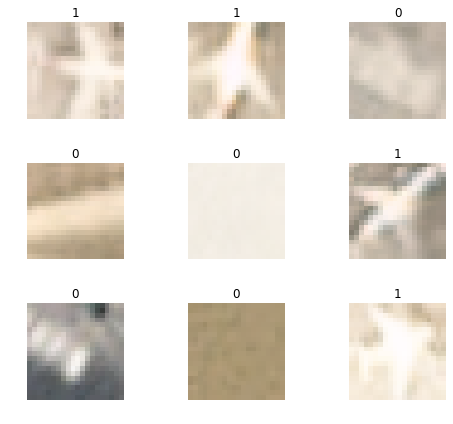

In [39]:
data.show_batch(rows=3, figsize=(7,6))

In [31]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [42]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [43]:
learn.fit_one_cycle(5)

In [44]:
learn.save('stage-1') 

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

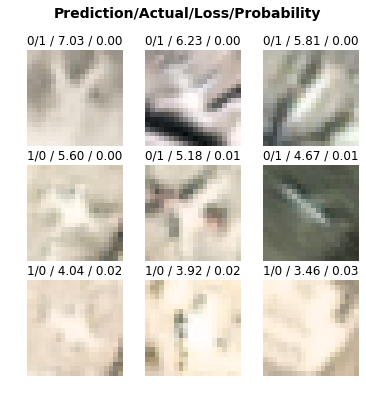

In [46]:
interp.plot_top_losses(9, figsize=(6,6))

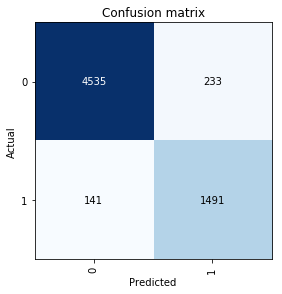

In [47]:
interp.plot_confusion_matrix()

In [48]:
learn.unfreeze()

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


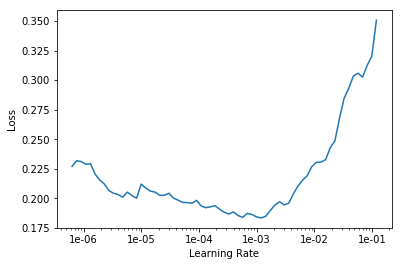

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


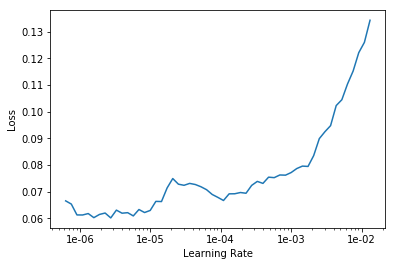

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [54]:
learn.save('stage-2')

In [56]:
learn.fit_one_cycle(6)

In [57]:
learn.save('stage-3')

AttributeError: 'Learner' object has no attribute 'losses'

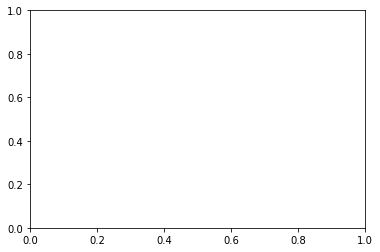

In [64]:
learn.recorder.plot_losses()

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

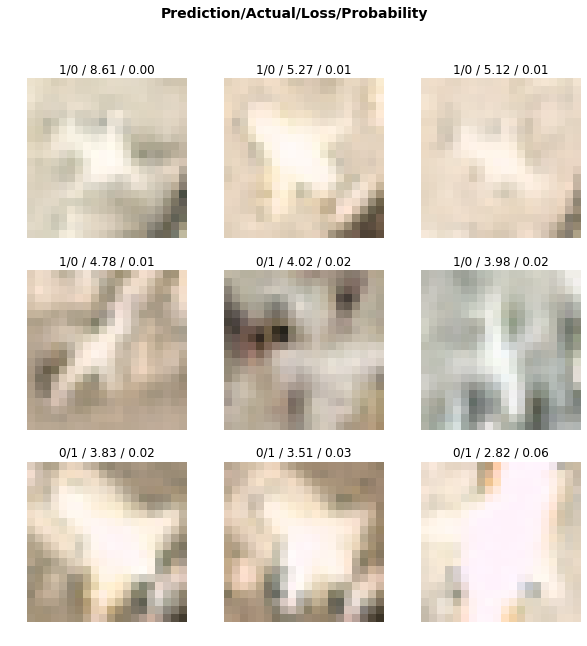

In [59]:
interp.plot_top_losses(9, figsize=(10,10))

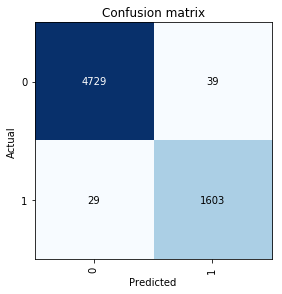

In [60]:
interp.plot_confusion_matrix()

In [68]:
learn.export('trained_res18_planesnet_20pix.pkl')

In [69]:
path = learn.path
path

PosixPath('/tmp/temp_images')

In [71]:
!ls {'/tmp/temp_images/*.pkl'}

/tmp/temp_images/trained_res18_planesnet_20pix.pkl


In [72]:
# copy to s3
!aws s3 cp /tmp/temp_images/trained_res18_planesnet_20pix.pkl s3://planesnet-sagemaker/data/ 

upload: ../../../tmp/temp_images/trained_res18_planesnet_20pix.pkl to s3://planesnet-sagemaker/data/trained_res18_planesnet_20pix.pkl


In [66]:
!ls

1.  Explore Data.ipynb	lost+found  planesnet_dict.pkl


In [36]:
img = learn.data.train_ds[0][0]
learn.predict(img)

(Category 0, tensor(0), tensor([0.9573, 0.0428]))

In [ ]:
## TODO
Sliding Window Across image / bounding box
Idea? Can all of the images from a bigger image be batched together?
